# CMIP6 data downscaling for Virginia

In [5]:
!pip install netCDF4
!pip install geopandas xarray
!pip install dbfread
!pip install pysal
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.3/347.3 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.

In [6]:
!pip install dbf
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 6.4 MB/s eta 0:00:00


In [7]:
!pip install cartopy

In [8]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
from google.colab import drive
import geopandas as gpd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Information:
xarray.Dataset {
dimensions:
	lon = 703 ;
	lat = 427 ;
	time = 1825 ;

variables:
	float64 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
	float64 lat(lat) ;
		lat:units = degrees_north ;
		lat:long_name = Latitude ;
	timedelta64[ns] time(time) ;
		time:long_name = days since19810101 ;
	float64 pr(time, lat, lon) ;
		pr:units = kg.m-2.s-1 ;
		pr:long_name = Daily Precipittaion ;

// global attributes:
	:Name = prism NetCDF ;
	:Version = NA ;
	:Author = Andre Geraldo de Lima Moraes ;
	:Institution = Utah State University, Watershed Sciences Department ;
	:Adress = 5210 Old Main Hill, NR 210, Logan, UT 84322 ;
	:email = andre.moraes@usu.edu ;
	:Description = This is the same as the prism data, but in NetCDF format and expanded NA data ;
	:lineage = Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/) ;
	:License = Same as PRISM ;
	:fees = This data set is free ;
	:Disclaimer = Whi

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


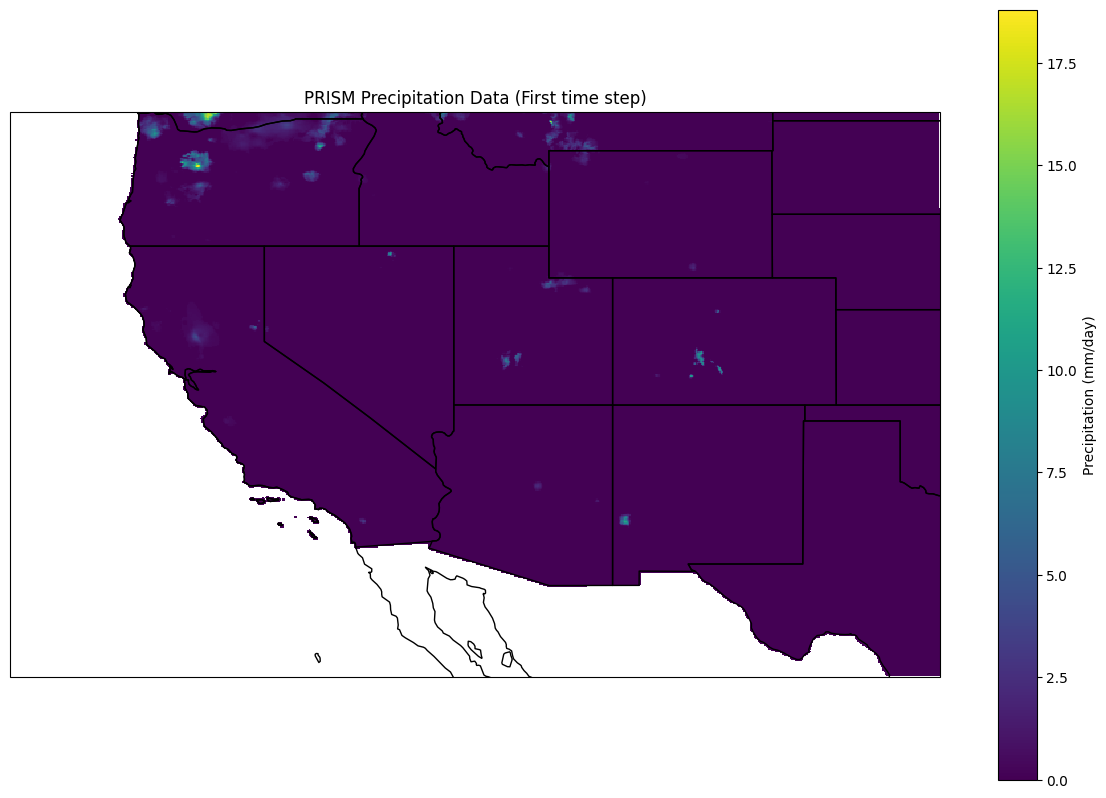


Coverage Analysis:
The data does not cover the entire continental USA.
Covered regions:
- West Coast
- Central USA
- Northern USA
- Southern USA

Precipitation Data Statistics:
Minimum value: 0.0 mm/day
Maximum value: 325.8 mm/day
Mean value: 1.4666105926031345 mm/day

Spatial Resolution:
Latitude resolution: 0.041667 degrees
Longitude resolution: 0.041667 degrees
Approximate Latitude resolution: 4.63 km
Approximate Longitude resolution: 3.68 km
Latitude resolution is not uniform.
Longitude resolution is not uniform.


In [9]:
# Import necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from google.colab import drive
import numpy as np

# Mount Google Drive
# drive.mount('/content/drive')

# Path to the NetCDF file
file_path = '/content/drive/My Drive/VCC/prism_pr_day_19810101-19851231.nc'

# Open the NetCDF file
ds = xr.open_dataset(file_path)

# Print dataset information
print("Dataset Information:")
print(ds.info())

# Get latitude and longitude ranges
lat_min, lat_max = ds.lat.min().item(), ds.lat.max().item()
lon_min, lon_max = ds.lon.min().item(), ds.lon.max().item()

print(f"\nLatitude range: {lat_min} to {lat_max}")
print(f"Longitude range: {lon_min} to {lon_max}")

# Create a map using Cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and state boundaries
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

# Set map extent to cover the data range
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the precipitation data
print("\nPlotting precipitation data...")
pr_data = ds.pr.isel(time=0)  # Select the first time step
im = ax.pcolormesh(ds.lon, ds.lat, pr_data, transform=ccrs.PlateCarree(),
                   cmap='viridis', vmin=pr_data.min(), vmax=pr_data.max())

# Add colorbar
plt.colorbar(im, ax=ax, label='Precipitation (mm/day)')

# Add title
plt.title('PRISM Precipitation Data (First time step)')

# Show the plot
plt.show()

# Analyze coverage
usa_bounds = {
    'lon': (-125, -66.5),
    'lat': (24, 49)
}

covers_usa = (
    lon_min <= usa_bounds['lon'][0] and
    lon_max >= usa_bounds['lon'][1] and
    lat_min <= usa_bounds['lat'][0] and
    lat_max >= usa_bounds['lat'][1]
)

print("\nCoverage Analysis:")
if covers_usa:
    print("The data covers the entire continental USA.")
else:
    print("The data does not cover the entire continental USA.")
    print("Covered regions:")
    if lon_min < -125 and lon_max > -125:
        print("- West Coast")
    if lon_min < -100 and lon_max > -100:
        print("- Central USA")
    if lon_max > -66.5:
        print("- East Coast")
    if lat_max > 40:
        print("- Northern USA")
    if lat_min < 30:
        print("- Southern USA")

# Print some statistics about the precipitation data
print("\nPrecipitation Data Statistics:")
print(f"Minimum value: {ds.pr.min().values} mm/day")
print(f"Maximum value: {ds.pr.max().values} mm/day")
print(f"Mean value: {ds.pr.mean().values} mm/day")


# Calculate spatial resolution
lat_res = np.abs(np.diff(ds.lat)).mean()
lon_res = np.abs(np.diff(ds.lon)).mean()

print("\nSpatial Resolution:")
print(f"Latitude resolution: {lat_res:.6f} degrees")
print(f"Longitude resolution: {lon_res:.6f} degrees")

# Convert to approximate distance in kilometers (assuming 1 degree is about 111 km)
lat_res_km = lat_res * 111
lon_res_km = lon_res * 111 * np.cos(np.deg2rad(ds.lat.mean()))

print(f"Approximate Latitude resolution: {lat_res_km:.2f} km")
print(f"Approximate Longitude resolution: {lon_res_km:.2f} km")

# Check if resolution is uniform
lat_uniform = np.allclose(np.diff(ds.lat), lat_res, rtol=1e-5)
lon_uniform = np.allclose(np.diff(ds.lon), lon_res, rtol=1e-5)

if lat_uniform and lon_uniform:
    print("The spatial resolution is uniform across the dataset.")
else:
    print("Warning: The spatial resolution may vary across the dataset.")
    if not lat_uniform:
        print("Latitude resolution is not uniform.")
    if not lon_uniform:
        print("Longitude resolution is not uniform.")

Dataset Information:
xarray.Dataset {
dimensions:
	lon = 538 ;
	lat = 295 ;
	time = 1825 ;

variables:
	float64 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
	float64 lat(lat) ;
		lat:units = degrees_north ;
		lat:long_name = Latitude ;
	timedelta64[ns] time(time) ;
		time:long_name = days since 19810101 ;
	float64 pr(time, lat, lon) ;
		pr:units = mm ;
		pr:long_name = Daily Precipittaion ;

// global attributes:
	:Name = Clinate data for Adaptation and Vulnerability Assesments - SouthWest (ClimAVA-SW) ;
	:Version = 01 ;
	:Author = Andre Geraldo de Lima Moraes ;
	:Institution = Utah State University, Watershed Sciences Department ;
	:Adress = 5210 Old Main Hill, NR 210, Logan, UT 84322 ;
	:email = andre.moraes@usu.edu ;
	:Description = The ClimAVA-SW dataset provides a high-resolution (4km) bias-corrected, downscaled future climate projection based on seventeen CMIP6 GCMs. The dataset includes three variables (pr, tasmin, tasmax) and three Shared Socio-economic

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


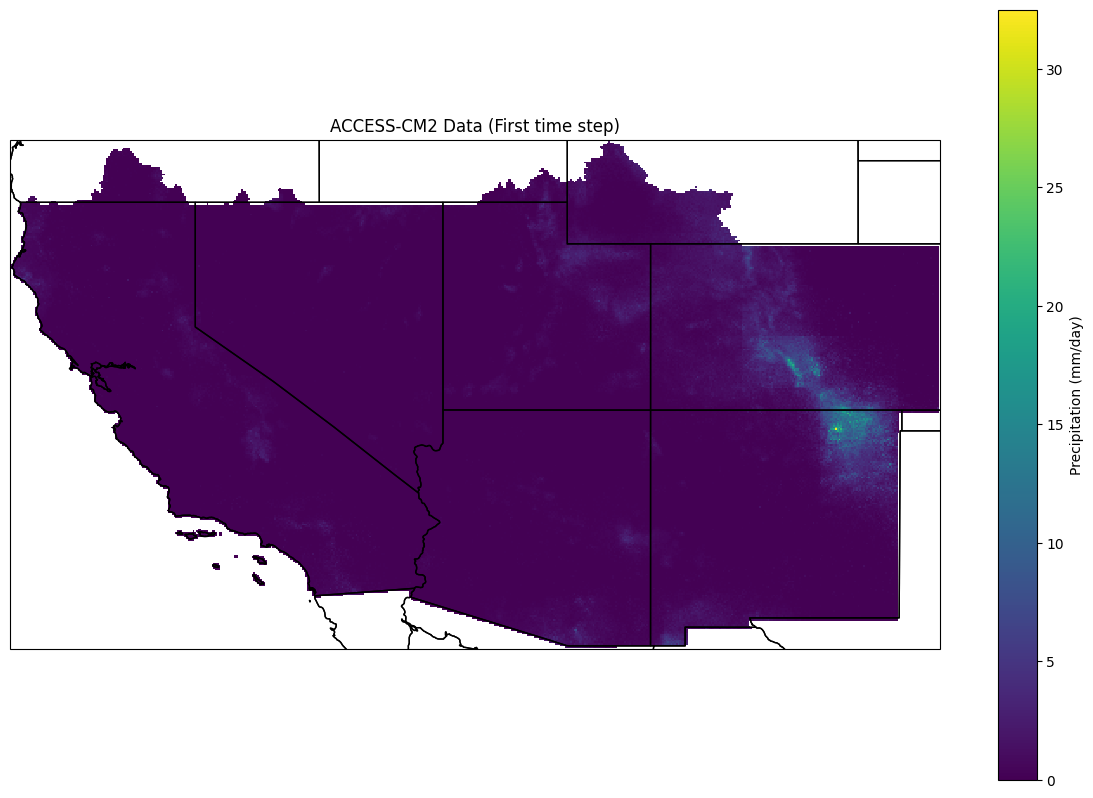


Coverage Analysis:
The data does not cover the entire continental USA.
Covered regions:
- Northern USA

Precipitation Data Statistics:
Minimum value: 0.0 mm/day
Maximum value: 229.4 mm/day
Mean value: 1.177111505158177 mm/day


In [10]:
# Import necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from google.colab import drive
import numpy as np

# Mount Google Drive
# drive.mount('/content/drive')

# Path to the NetCDF file
file_path = '/content/drive/My Drive/VCC/ClimAVA-SW_ACCESS-CM2_historical_pr_r1i1p1f1_19810101-19851231.nc'

# Open the NetCDF file
ds = xr.open_dataset(file_path)

# Print dataset information
print("Dataset Information:")
print(ds.info())

# Get latitude and longitude ranges
lat_min, lat_max = ds.lat.min().item(), ds.lat.max().item()
lon_min, lon_max = ds.lon.min().item(), ds.lon.max().item()

print(f"\nLatitude range: {lat_min} to {lat_max}")
print(f"Longitude range: {lon_min} to {lon_max}")

# Calculate spatial resolution
lat_res = np.abs(np.diff(ds.lat)).mean()
lon_res = np.abs(np.diff(ds.lon)).mean()

print("\nSpatial Resolution:")
print(f"Latitude resolution: {lat_res:.6f} degrees")
print(f"Longitude resolution: {lon_res:.6f} degrees")

# Convert to approximate distance in kilometers (assuming 1 degree is about 111 km)
lat_res_km = lat_res * 111
lon_res_km = lon_res * 111 * np.cos(np.deg2rad(ds.lat.mean()))

print(f"Approximate Latitude resolution: {lat_res_km:.2f} km")
print(f"Approximate Longitude resolution: {lon_res_km:.2f} km")

# Check if resolution is uniform
lat_uniform = np.allclose(np.diff(ds.lat), lat_res, rtol=1e-5)
lon_uniform = np.allclose(np.diff(ds.lon), lon_res, rtol=1e-5)

if lat_uniform and lon_uniform:
    print("The spatial resolution is uniform across the dataset.")
else:
    print("Warning: The spatial resolution may vary across the dataset.")
    if not lat_uniform:
        print("Latitude resolution is not uniform.")
    if not lon_uniform:
        print("Longitude resolution is not uniform.")

# Create a map using Cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and state boundaries
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

# Set map extent to cover the data range
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the precipitation data
print("\nPlotting precipitation data...")
pr_data = ds.pr.isel(time=0)  # Select the first time step
im = ax.pcolormesh(ds.lon, ds.lat, pr_data, transform=ccrs.PlateCarree(),
                   cmap='viridis', vmin=pr_data.min(), vmax=pr_data.max())

# Add colorbar
plt.colorbar(im, ax=ax, label='Precipitation (mm/day)')

# Add title
plt.title('ACCESS-CM2 Data (First time step)')

# Show the plot
plt.show()

# Analyze coverage
usa_bounds = {
    'lon': (-125, -66.5),
    'lat': (24, 49)
}

covers_usa = (
    lon_min <= usa_bounds['lon'][0] and
    lon_max >= usa_bounds['lon'][1] and
    lat_min <= usa_bounds['lat'][0] and
    lat_max >= usa_bounds['lat'][1]
)

print("\nCoverage Analysis:")
if covers_usa:
    print("The data covers the entire continental USA.")
else:
    print("The data does not cover the entire continental USA.")
    print("Covered regions:")
    if lon_min < -125 and lon_max > -125:
        print("- West Coast")
    if lon_min < -100 and lon_max > -100:
        print("- Central USA")
    if lon_max > -66.5:
        print("- East Coast")
    if lat_max > 40:
        print("- Northern USA")
    if lat_min < 30:
        print("- Southern USA")

# Print some statistics about the precipitation data
print("\nPrecipitation Data Statistics:")
print(f"Minimum value: {ds.pr.min().values} mm/day")
print(f"Maximum value: {ds.pr.max().values} mm/day")
print(f"Mean value: {ds.pr.mean().values} mm/day")

Shapefile Information:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 158710 entries, 0 to 158709
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   Field1    158710 non-null  int64   
 1   lon       158710 non-null  float64 
 2   lat       158710 non-null  float64 
 3   guide     158710 non-null  int64   
 4   in_out    158710 non-null  float64 
 5   geometry  158710 non-null  geometry
dtypes: float64(3), geometry(1), int64(2)
memory usage: 7.3 MB
None

Resolution:
X Resolution: 0.041667 degrees
Y Resolution: 0.041667 degrees


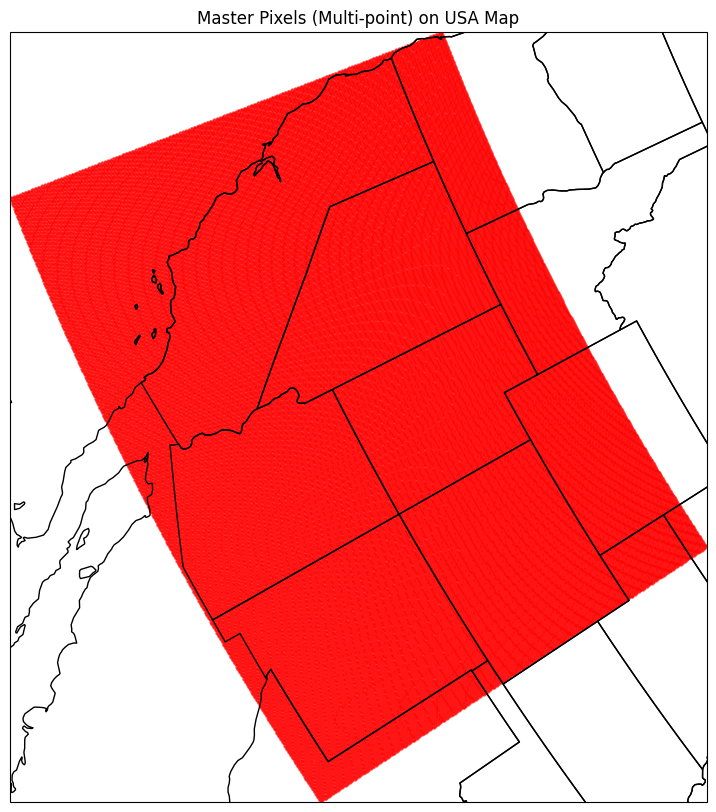


Shapefile Statistics:
Number of features: 158710
Number of unique points: 158710
Coordinate Reference System (CRS): None

Bounding Box:
Min X: -124.4583, Min Y: 31.2500
Max X: -102.0833, Max Y: 43.5000

Approximate area covered: 274.09 square degrees


In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import MultiPoint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from google.colab import drive

# Mount Google Drive (if not already mounted)
# drive.mount('/content/drive')

# Path to the shapefile
shapefile_path = '/content/drive/My Drive/VCC/guides/master_pixels.shp'

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

print("Shapefile Information:")
print(gdf.info())

# Function to extract unique coordinates
def extract_unique_coords(geom):
    if isinstance(geom, MultiPoint):
        return set((p.x, p.y) for p in geom.geoms)
    else:  # Single Point
        return {(geom.x, geom.y)}

# Extract unique coordinates
unique_coords = set()
for geom in gdf.geometry:
    unique_coords.update(extract_unique_coords(geom))

# Convert to numpy array for analysis
points_array = np.array(list(unique_coords))

# Calculate resolution
x_coords = points_array[:, 0]
y_coords = points_array[:, 1]
x_diff = np.diff(np.unique(x_coords))
y_diff = np.diff(np.unique(y_coords))

x_resolution = np.min(x_diff[x_diff > 0]) if len(x_diff) > 0 else None
y_resolution = np.min(y_diff[y_diff > 0]) if len(y_diff) > 0 else None

print("\nResolution:")
print(f"X Resolution: {x_resolution:.6f} degrees" if x_resolution else "X Resolution: Unable to determine")
print(f"Y Resolution: {y_resolution:.6f} degrees" if y_resolution else "Y Resolution: Unable to determine")

# Create a map using Cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.AlbersEqualArea()})

# Add coastlines and state boundaries
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

# Plot the points
ax.scatter(points_array[:, 0], points_array[:, 1], transform=ccrs.PlateCarree(),
           s=1, alpha=0.5, c='red')

# Set map extent based on data bounds
bounds = gdf.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]], crs=ccrs.PlateCarree())

# Add title
plt.title('Master Pixels (Multi-point) on USA Map')

# Show the plot
plt.show()

# Print some statistics about the shapefile
print("\nShapefile Statistics:")
print(f"Number of features: {len(gdf)}")
print(f"Number of unique points: {len(unique_coords)}")
print(f"Coordinate Reference System (CRS): {gdf.crs}")

# Print the bounding box of the shapefile
print(f"\nBounding Box:")
print(f"Min X: {bounds[0]:.4f}, Min Y: {bounds[1]:.4f}")
print(f"Max X: {bounds[2]:.4f}, Max Y: {bounds[3]:.4f}")

# Calculate approximate area covered
width = bounds[2] - bounds[0]
height = bounds[3] - bounds[1]
area_degrees = width * height
print(f"\nApproximate area covered: {area_degrees:.2f} square degrees")

Shapefile Information:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Field1    270 non-null    int64   
 1   lat       270 non-null    float64 
 2   lon       270 non-null    float64 
 3   lon_flip  270 non-null    float64 
 4   geometry  270 non-null    geometry
dtypes: float64(3), geometry(1), int64(1)
memory usage: 10.7 KB
None

Resolution:
X Resolution: 1.250000 degrees
Y Resolution: 0.942408 degrees


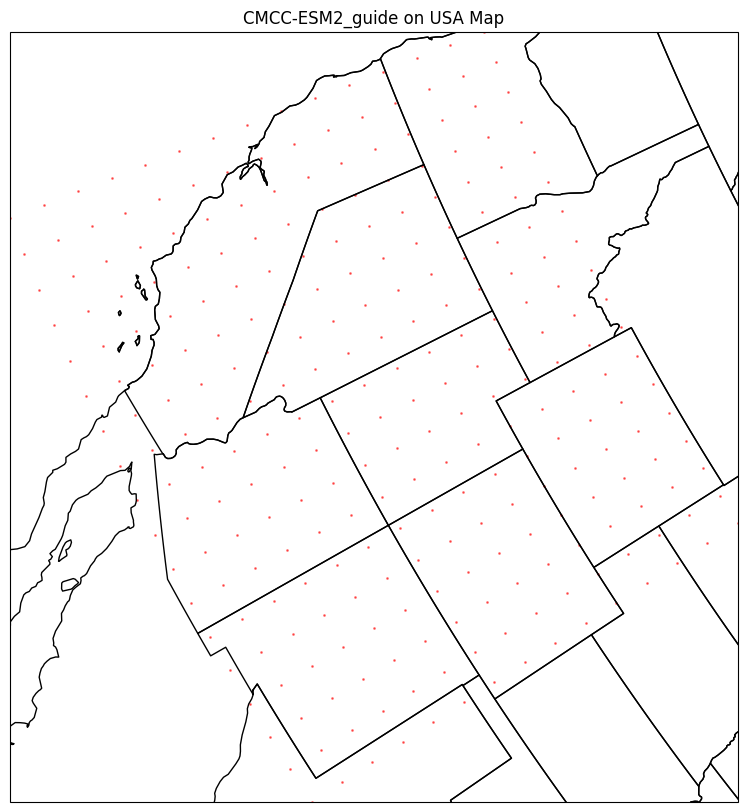


Shapefile Statistics:
Number of features: 270
Number of unique points: 270
Coordinate Reference System (CRS): None

Bounding Box:
Min X: -123.7500, Min Y: 31.5707
Max X: -102.5000, Max Y: 44.7644

Approximate area covered: 280.37 square degrees


In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import MultiPoint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from google.colab import drive

# Mount Google Drive (if not already mounted)
# drive.mount('/content/drive')

# Path to the shapefile
shapefile_path = '/content/drive/My Drive/VCC/guides/GCM_guides/CMCC-ESM2_guide.shp'

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

print("Shapefile Information:")
print(gdf.info())

# Function to extract unique coordinates
def extract_unique_coords(geom):
    if isinstance(geom, MultiPoint):
        return set((p.x, p.y) for p in geom.geoms)
    else:  # Single Point
        return {(geom.x, geom.y)}

# Extract unique coordinates
unique_coords = set()
for geom in gdf.geometry:
    unique_coords.update(extract_unique_coords(geom))

# Convert to numpy array for analysis
points_array = np.array(list(unique_coords))

# Calculate resolution
x_coords = points_array[:, 0]
y_coords = points_array[:, 1]
x_diff = np.diff(np.unique(x_coords))
y_diff = np.diff(np.unique(y_coords))

x_resolution = np.min(x_diff[x_diff > 0]) if len(x_diff) > 0 else None
y_resolution = np.min(y_diff[y_diff > 0]) if len(y_diff) > 0 else None

print("\nResolution:")
print(f"X Resolution: {x_resolution:.6f} degrees" if x_resolution else "X Resolution: Unable to determine")
print(f"Y Resolution: {y_resolution:.6f} degrees" if y_resolution else "Y Resolution: Unable to determine")

# Create a map using Cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.AlbersEqualArea()})

# Add coastlines and state boundaries
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

# Plot the points
ax.scatter(points_array[:, 0], points_array[:, 1], transform=ccrs.PlateCarree(),
           s=1, alpha=0.5, c='red')

# Set map extent based on data bounds
bounds = gdf.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]], crs=ccrs.PlateCarree())

# Add title
plt.title('CMCC-ESM2_guide on USA Map')

# Show the plot
plt.show()

# Print some statistics about the shapefile
print("\nShapefile Statistics:")
print(f"Number of features: {len(gdf)}")
print(f"Number of unique points: {len(unique_coords)}")
print(f"Coordinate Reference System (CRS): {gdf.crs}")

# Print the bounding box of the shapefile
print(f"\nBounding Box:")
print(f"Min X: {bounds[0]:.4f}, Min Y: {bounds[1]:.4f}")
print(f"Max X: {bounds[2]:.4f}, Max Y: {bounds[3]:.4f}")

# Calculate approximate area covered
width = bounds[2] - bounds[0]
height = bounds[3] - bounds[1]
area_degrees = width * height
print(f"\nApproximate area covered: {area_degrees:.2f} square degrees")

## Subset CMCC-ESM2

In [4]:
# Set the base path for your project in Google Drive
base_path = '/content/drive/My Drive/VCC'  # Replace with your actual folder path

# Read input files
future_dates = pd.read_csv(f'{base_path}/future_dates_2023.csv')
historical_dates = pd.read_csv(f'{base_path}/historical_dates_2023.csv')
models = pd.read_csv(f'{base_path}/models_2023.csv')
variables = pd.read_csv(f'{base_path}/Variables.csv')
ssps = ["historical", "ssp245", "ssp370", "ssp585"]

# Adjust historical_days to start from 1981 and end at 2014
historical_days = np.arange(1, 12411)  # 34 years * 365 days = 12410 days
# Adjust ssp_days to start from 2015 and end at 2100
ssp_days = np.arange(12411, 43801)  # 86 years * 365 days = 31390 days, starting from 12411

# Model specific information
m = 1  # Model index
model = models.iloc[m-1, 0]
realization = models.iloc[m-1, 3]
grid = models.iloc[m-1, 4]
guide = gpd.read_file(f'{base_path}/grids/subsets/{model}_guide.shp')
lon_res = models.iloc[m-1, 24]  # pixel resolutions
lat_res = models.iloc[m-1, 23]

In [ ]:
def process_historical(var, ssp, dates):
    total_days = 12410
    pixels = np.full((total_days, len(guide)), -999999, dtype=np.float32)

    start_index = 0
    for d in range(7):  # 7 chunks of 5 years each
        date = dates[d]
        print(f"Processing {date}")
        nc_name = f'{base_path}/cmip6/{var}/{model}/{ssp}/ClimAVA-SW_{model}_{ssp}_{var}_{realization}_{date}.nc'
        # nc_name = f'{base_path}/cmip6/{var}/{model}/{ssp}/{var}_day_{model}_{ssp}_{realization}_{date}.nc'

        with xr.open_dataset(nc_name) as nc:
            array = nc[var].values
            chunk_days = array.shape[2]  # Get the number of days in this chunk

            for p, (lat, lon) in enumerate(zip(guide['lat'], guide['lon'])):
                Y = int(((lat + 90) / lat_res) + 1)
                X = int((lon / lon_res) + 1)
                pixels[start_index:start_index+chunk_days, p] = array[X, Y, :]

        start_index += chunk_days

    return pixels

def process_future(var, ssp, dates):
    total_days = 31390
    pixels = np.full((total_days, len(guide)), -999999, dtype=np.float32)

    start_index = 0
    for d in range(18):  # 18 chunks of 5 years each (17 full chunks + 1 partial for 2100)
        date = dates[d]
        print(f"Processing {date}")

        nc_name = f'{base_path}/cmip6/{var}/{model}/{ssp}/ClimAVA-SW_{model}_{ssp}_{var}_{realization}_{date}.nc'
        # nc_name = f'{base_path}/cmip6/{var}/{model}/{ssp}/{var}_day_{model}_{ssp}_{realization}_{grid}_{date}.nc'

        with xr.open_dataset(nc_name) as nc:
            array = nc[var].values
            chunk_days = array.shape[2]  # Get the number of days in this chunk

            for p, (lat, lon) in enumerate(zip(guide['lat'], guide['lon'])):
                Y = int(((lat + 90) / lat_res) + 1)
                X = int((lon / lon_res) + 1)
                pixels[start_index:start_index+chunk_days, p] = array[X, Y, :]

        start_index += chunk_days

    return pixels

def create_netcdf(data, var, ssp, days):
    output_dir = f'{base_path}/cmip6/cmip6_subset/{model}/{ssp}/{var}'
    os.makedirs(output_dir, exist_ok=True)
    nc_name = f'{output_dir}/{var}_day_{model}_{realization}_{ssp}_subset.nc'

    dim_name = variables.iloc[var-1, 2]
    dim_long_name = variables.iloc[var-1, 4]
    dim_units = variables.iloc[var-1, 6]

    LON_n = len(guide['lon'].unique())
    LAT_n = len(guide['lat'].unique())
    TIME_n = len(days)

    with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
        nc_out.createDimension('lon', LON_n)
        nc_out.createDimension('lat', LAT_n)
        nc_out.createDimension('time', TIME_n)

        lons = nc_out.createVariable('lon', 'f4', ('lon',))
        lats = nc_out.createVariable('lat', 'f4', ('lat',))
        times = nc_out.createVariable('time', 'i4', ('time',))
        var_out = nc_out.createVariable(dim_name, 'f8', ('lon', 'lat', 'time'), fill_value=-9999)

        lons.units = 'degrees_east'
        lons.long_name = 'Longitude'
        lats.units = 'degrees_north'
        lats.long_name = 'Latitude'
        times.units = 'days since 1981-01-01' if ssp == 'historical' else 'days since 2015-01-01'
        times.long_name = 'days since 19810101' if ssp == 'historical' else 'days since 20150101'
        var_out.units = dim_units
        var_out.long_name = dim_long_name

        lons[:] = guide['lon'].unique()
        lats[:] = guide['lat'].unique()
        times[:] = days
        var_out[:, :, :] = data.reshape(LON_n, LAT_n, TIME_n)

    print(f"Created {nc_name}")

for s, ssp in enumerate(ssps):
    print(f"Processing {ssp}")

    dates = ["19810101-19851231", "19860101-19901231", "19910101-19951231", "19960101-20001231", "20010101-20051231", "20060101-20101231", "20110101-20141231"] if ssp == "historical" else ["20150101-20151231", "20160101-20201231", "20210101-20251231", "20260101-20301231", "20310101-20351231", "20360101-20401231", "20410101-20451231", "20460101-20501231", "20510101-20551231", "20560101-20601231", "20610101-20651231", "20660101-20701231", "20710101-20751231", "20760101-20801231", "20810101-20851231", "20860101-20901231", "20910101-20951231", "20960101-21001231"]

    for v in range(1, 2):
        var = variables.iloc[v-1, 2]
        print(f"Processing {var}")

        if ssp == "historical":
            data = process_historical(var, ssp, dates)
            create_netcdf(data, v, ssp, historical_days)
        else:
            data = process_future(var, ssp, dates)
            create_netcdf(data, v, ssp, ssp_days)

print("Processing complete.")

Processing historical
Processing pr
Processing 19810101-19851231
Processing 19860101-19901231
Processing 19910101-19951231
Processing 19960101-20001231
Processing 20010101-20051231
Processing 20060101-20101231
Processing 20110101-20141231
Created /content/drive/My Drive/VCC/cmip6/cmip6_subset/CMCC-ESM2/historical/1/1_day_CMCC-ESM2_r1i1p1f1_historical_subset.nc
Processing ssp245
Processing pr
Processing 20150101-20151231
Processing 20160101-20201231
Processing 20210101-20251231
Processing 20260101-20301231
Processing 20310101-20351231
Processing 20360101-20401231
Processing 20410101-20451231
Processing 20460101-20501231
Processing 20510101-20551231
Processing 20560101-20601231
Processing 20610101-20651231
Processing 20660101-20701231
Processing 20710101-20751231
Processing 20760101-20801231
Processing 20810101-20851231
Processing 20860101-20901231
Processing 20910101-20951231
Processing 20960101-21001231
Created /content/drive/My Drive/VCC/cmip6/cmip6_subset/CMCC-ESM2/ssp245/1/1_day_CMC

## Resample CMCC-ESM2

In [ ]:
!pip install netCDF4
#!pip install multiprocessing tqdm
!pip install tqdm

In [ ]:
!pip install pandas numpy dbfread google-colab

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import multiprocessing as mp
from dbfread import DBF
import time
from google.colab import drive
from tqdm import tqdm

# Mount Google Drive
# drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC'  # Adjust this path as needed

# Load necessary files to guide the loops
models = pd.read_csv(os.path.join(base_dir, 'models_2023.csv'))
variables = pd.read_csv(os.path.join(base_dir, 'Variables.csv'))

# Function to process pixels (equivalent to the inner foreach loop in R)
def process_pixel(args):
    X_, Y_, arrays = args
    pixel = []
    for array in arrays:
        pixel.extend(array[X_, Y_, :1825])
    return pixel

# Function to process a single variable and model
def process_var_model(var, model, arrays, guide, lon, lat, lon_res, lat_res):
    print(f"Processing {var} for model {model}")

    guide_lat_res = models.loc[models.iloc[:, 0] == model, 23].values[0]
    guide_lon_res = models.loc[models.iloc[:, 0] == model, 24].values[0]
    lat_length = len(lat)

    corse_pixel = np.full(14600, -9999)

    for p in tqdm(range(len(guide)), desc=f"{var} - {model}"):
        guide_lon = guide.records[p]['lon_flip']
        guide_lat = guide.records[p]['lat']

        X = round((guide_lon - lon[0]) / lon_res) + 1
        Y = int(round(lat_length - (guide_lat - lat[-1])/lat_res))

        X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
        Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

        X_Y_list = [(round((x - lon[0]) / lon_res) + 1,
                     int(round(lat_length - (y - lat[-1])/lat_res)))
                    for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

        # Process pixels
        pixels = [process_pixel((X_, Y_, arrays)) for X_, Y_ in X_Y_list]

        # Average values
        pixel = np.mean(pixels, axis=0)
        corse_pixel = np.column_stack((corse_pixel, pixel))

    return corse_pixel

# Main processing function
def main():
    # Set up multiprocessing
    num_cores = mp.cpu_count()
    pool = mp.Pool(processes=num_cores)

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        # Load all ncs per variable
        ncs = [Dataset(os.path.join(base_dir, f"prism/prism_{var}_day_{year}0101-{year}1231.nc"))
               for year in range(1981, 2021, 5)]

        # Extract lat, lon dimensions and resolution from ncs
        lon = np.unique(ncs[0].variables['lon'][:])
        lon_res = abs(lon[1] - lon[0])
        lat = np.unique(ncs[0].variables['lat'][:])
        lat_res = abs(lat[1] - lat[0])

        # Create arrays
        arrays = [nc.variables[var][:] for nc in ncs]

        # Close ncs
        for nc in ncs:
            nc.close()

        # Process only the 1st and 11th models
        selected_models = [1, 11]
        model_results = []

        for m in selected_models:
            model = models.iloc[m-1, 0]  # Subtract 1 because Python uses 0-based indexing
            guide = DBF(os.path.join(base_dir, f"grids/subsets/{model}_guide.dbf"))
            model_results.append(pool.apply_async(process_var_model, (var, model, arrays, guide, lon, lat, lon_res, lat_res)))

        # Collect results
        for i, result in enumerate(model_results):
            m = selected_models[i]
            model = models.iloc[m-1, 0]  # Subtract 1 because Python uses 0-based indexing
            corse_pixel = result.get()

            print(f"Creating NetCDF for {var} - {model}")

            # Organize data to fit in array
            data = corse_pixel[:, 1:]
            data = data.T

            # Define dimensions for the array
            guide = DBF(os.path.join(base_dir, f"grids/subsets/{model}_guide.dbf"))
            LON_n = len(np.unique([rec['lon_flip'] for rec in guide]))
            LAT_n = len(np.unique([rec['lat'] for rec in guide]))
            TIME_n = 14600

            # Create the Array
            data_array = data.reshape((LON_n, LAT_n, TIME_n))

            # Create NetCDF file
            nc_name = os.path.join(base_dir, 'resampled', f"prism_{var}_day_{model}_resampled.nc")
            nc_out = Dataset(nc_name, 'w', format='NETCDF4')

            # Define dimensions
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            # Create variables
            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            # Add data
            lon_var[:] = np.unique([rec['lon_flip'] for rec in guide])
            lat_var[:] = np.unique([rec['lat'] for rec in guide])
            time_var[:] = np.arange(1, 14601)
            data_var[:] = data_array

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.iloc[v, 6]
            data_var.long_name = variables.iloc[v, 4]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason UNiversity"
            nc_out.Address = "5210 Old Main Hill, NR 210, Logan, UT 84322"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it. The creators of this dataset make no warranties, express or implied, regarding the dataset's accuracy, reliability, or fitness for a particular purpose. In no event shall the creators be liable for any damages, including but not limited to direct, indirect, incidental, special, or consequential damages, arising out of the use or inability to use the dataset. Users of this dataset are encouraged to properly cite the dataset in any publications or works that make use of the data. By using this dataset, you agree to these terms and conditions. If you do not agree with these terms, please do not use the dataset."

            # Close NetCDF
            nc_out.close()

    # Close the multiprocessing pool
    pool.close()
    pool.join()

if __name__ == "__main__":
    main()
    print("Finished")


Processing variable: pr


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/VCC/prism/prism_pr_day_19810101-19811231.nc'

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import multiprocessing as mp
from dbfread import DBF
import time
from google.colab import drive
from tqdm import tqdm

# Mount Google Drive
# drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC'  # Adjust this path as needed

# Load necessary files to guide the loops
models = pd.read_csv(os.path.join(base_dir, 'models_2023.csv'))
variables = pd.read_csv(os.path.join(base_dir, 'Variables.csv'))

# Function to process pixels (equivalent to the inner foreach loop in R)
def process_pixel(args):
    X_, Y_, arrays = args
    pixel = []
    for array in arrays:
        pixel.extend(array[X_, Y_, :1825])
    return pixel

# Function to process a single variable and model
def process_var_model(var, model, arrays, guide, lon, lat, lon_res, lat_res):
    print(f"Processing {var} for model {model}")

    guide_lat_res = models.loc[models.iloc[:, 0] == model, 23].values[0]
    guide_lon_res = models.loc[models.iloc[:, 0] == model, 24].values[0]
    lat_length = len(lat)

    corse_pixel = np.full(14600, -9999)

    for p in tqdm(range(len(guide)), desc=f"{var} - {model}"):
        guide_lon = guide.records[p]['lon_flip']
        guide_lat = guide.records[p]['lat']

        X = round((guide_lon - lon[0]) / lon_res) + 1
        Y = int(round(lat_length - (guide_lat - lat[-1])/lat_res))

        X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
        Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

        X_Y_list = [(round((x - lon[0]) / lon_res) + 1,
                     int(round(lat_length - (y - lat[-1])/lat_res)))
                    for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

        # Process pixels
        pixels = [process_pixel((X_, Y_, arrays)) for X_, Y_ in X_Y_list]

        # Average values
        pixel = np.mean(pixels, axis=0)
        corse_pixel = np.column_stack((corse_pixel, pixel))

    return corse_pixel

# Main processing function
def main():
    print(f"Base directory: {base_dir}")
    print("Contents of prism directory:")
    print(os.listdir(os.path.join(base_dir, 'prism')))

    # Set up multiprocessing
    num_cores = mp.cpu_count()
    pool = mp.Pool(processes=num_cores)

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        # Load all ncs per variable, now up to 2015
        ncs = []
        for year in range(1981, 2016, 5):  # Changed end year to 2016 to include 2015
            file_path = os.path.join(base_dir, f"prism/prism_{var}_day_{year}0101-{year+4}1231.nc")
            print(f"Processing file: {file_path}")
            if os.path.exists(file_path):
                ncs.append(Dataset(file_path))
            else:
                print(f"Warning: File not found - {file_path}")

        print(f"Loaded {len(ncs)} files for variable {var}")

        if not ncs:
            print(f"No files found for variable {var}. Skipping.")
            continue

        # Extract lat, lon dimensions and resolution from ncs
        lon = np.unique(ncs[0].variables['lon'][:])
        lon_res = abs(lon[1] - lon[0])
        lat = np.unique(ncs[0].variables['lat'][:])
        lat_res = abs(lat[1] - lat[0])

        # Create arrays
        arrays = [nc.variables[var][:] for nc in ncs]

        # Close ncs
        for nc in ncs:
            nc.close()

        # Process only the 1st and 11th models
        selected_models = [1, 11]
        model_results = []

        for m in selected_models:
            model = models.iloc[m-1, 0]  # Subtract 1 because Python uses 0-based indexing
            guide_path = os.path.join(base_dir, f"grids/subsets/{model}_guide.dbf")
            if not os.path.exists(guide_path):
                print(f"Warning: Guide file not found - {guide_path}")
                continue
            guide = DBF(guide_path)
            model_results.append(pool.apply_async(process_var_model, (var, model, arrays, guide, lon, lat, lon_res, lat_res)))

        # Collect results
        for i, result in enumerate(model_results):
            m = selected_models[i]
            model = models.iloc[m-1, 0]  # Subtract 1 because Python uses 0-based indexing
            corse_pixel = result.get()

            print(f"Creating NetCDF for {var} - {model}")

            # Organize data to fit in array
            data = corse_pixel[:, 1:]
            data = data.T

            # Define dimensions for the array
            guide = DBF(os.path.join(base_dir, f"grids/subsets/{model}_guide.dbf"))
            LON_n = len(np.unique([rec['lon_flip'] for rec in guide]))
            LAT_n = len(np.unique([rec['lat'] for rec in guide]))
            TIME_n = 14600

            # Create the Array
            data_array = data.reshape((LON_n, LAT_n, TIME_n))

            # Create NetCDF file
            nc_name = os.path.join(base_dir, 'resampled', f"prism_{var}_day_{model}_resampled.nc")
            nc_out = Dataset(nc_name, 'w', format='NETCDF4')

            # Define dimensions
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            # Create variables
            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            # Add data
            lon_var[:] = np.unique([rec['lon_flip'] for rec in guide])
            lat_var[:] = np.unique([rec['lat'] for rec in guide])
            time_var[:] = np.arange(1, 14601)
            data_var[:] = data_array

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.iloc[v, 6]
            data_var.long_name = variables.iloc[v, 4]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it. The creators of this dataset make no warranties, express or implied, regarding the dataset's accuracy, reliability, or fitness for a particular purpose. In no event shall the creators be liable for any damages, including but not limited to direct, indirect, incidental, special, or consequential damages, arising out of the use or inability to use the dataset. Users of this dataset are encouraged to properly cite the dataset in any publications or works that make use of the data. By using this dataset, you agree to these terms and conditions. If you do not agree with these terms, please do not use the dataset."

            # Close NetCDF
            nc_out.close()

    # Close the multiprocessing pool
    pool.close()
    pool.join()

if __name__ == "__main__":
    main()
    print("Finished")

Base directory: /content/drive/My Drive/VCC
Contents of prism directory:
['Untitled8.ipynb', 'prism_pr_day_19860101-19901231.nc', 'prism_pr_day_19910101-19951231.nc', 'prism_pr_day_19960101-20001231.nc', 'prism_pr_day_19810101-19851231.nc', 'prism_pr_day_20060101-20101231.nc', 'prism_pr_day_20010101-20051231.nc', 'prism_pr_day_20160101-20201231.nc', 'prism_pr_day_20110101-20151231.nc', 'prism_tasmax_day_19910101-19951231.nc', 'prism_tasmax_day_19960101-20001231.nc', 'prism_tasmax_day_19810101-19851231.nc', 'prism_tasmax_day_19860101-19901231.nc', 'prism_tasmax_day_20060101-20101231.nc', 'prism_tasmax_day_20010101-20051231.nc', 'prism_tasmax_day_20110101-20151231.nc', 'prism_tasmin_day_19910101-19951231.nc', 'prism_tasmin_day_19810101-19851231.nc', 'prism_tasmin_day_19860101-19901231.nc', 'prism_tasmin_day_19960101-20001231.nc', 'prism_tasmin_day_20010101-20051231.nc', 'prism_tasmin_day_20110101-20151231.nc', 'prism_tasmin_day_20060101-20101231.nc', 'prism_tasmin_day_20160101-20201231.n

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import multiprocessing as mp
from dbfread import DBF
import time
from google.colab import drive
from tqdm import tqdm

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Function to process pixels (equivalent to the inner foreach loop in R)
def process_pixel(args):
    X_, Y_, arrays = args
    pixel = []
    for array in arrays:
        pixel.extend(array[X_, Y_, :1825])
    return pixel

# Function to process a single variable and model
def process_var_model(var, model, arrays, guide, lon, lat, lon_res, lat_res):
    print(f"Processing {var} for model {model}")

    guide_lat_res = models.loc[models.iloc[:, 0] == model, 23].values[0]
    guide_lon_res = models.loc[models.iloc[:, 0] == model, 24].values[0]
    lat_length = len(lat)

    corse_pixel = np.full(14600, -9999)

    for p in tqdm(range(len(guide)), desc=f"{var} - {model}"):
        guide_lon = guide.records[p]['lon_flip']
        guide_lat = guide.records[p]['lat']

        X = round((guide_lon - lon[0]) / lon_res) + 1
        Y = int(round(lat_length - (guide_lat - lat[-1])/lat_res))

        X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
        Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

        X_Y_list = [(round((x - lon[0]) / lon_res) + 1,
                     int(round(lat_length - (y - lat[-1])/lat_res)))
                    for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

        # Process pixels
        pixels = [process_pixel((X_, Y_, arrays)) for X_, Y_ in X_Y_list]

        # Average values
        pixel = np.mean(pixels, axis=0)
        corse_pixel = np.column_stack((corse_pixel, pixel))

    return corse_pixel

# Main processing function
def main():
    global models, variables  # Make these global so they can be accessed in process_var_model

    # Check if base_dir exists
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    print("Contents of base directory:")
    print(os.listdir(base_dir))

    # Define and create the resampled directory
    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        try:
            os.makedirs(resampled_dir)
            print(f"Created resampled directory: {resampled_dir}")
        except Exception as e:
            print(f"Error creating resampled directory: {str(e)}")
            return

    # Load necessary files to guide the loops
    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    if not os.path.exists(models_file):
        print(f"Error: Models file {models_file} does not exist.")
        return
    if not os.path.exists(variables_file):
        print(f"Error: Variables file {variables_file} does not exist.")
        return

    try:
        models = pd.read_csv(models_file)
        variables = pd.read_csv(variables_file)
    except Exception as e:
        print(f"Error loading CSV files: {str(e)}")
        return

    # Set up multiprocessing
    num_cores = mp.cpu_count()
    pool = mp.Pool(processes=num_cores)

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        # Load all ncs per variable, now up to 2015
        ncs = []
        for year in range(1981, 2016, 5):  # Changed end year to 2016 to include 2015
            file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
            print(f"Checking file: {file_path}")
            if os.path.exists(file_path):
                try:
                    ncs.append(Dataset(file_path))
                    print(f"Successfully loaded: {file_path}")
                except Exception as e:
                    print(f"Error loading file {file_path}: {str(e)}")
            else:
                print(f"Warning: File not found - {file_path}")

        print(f"Loaded {len(ncs)} files for variable {var}")

        if not ncs:
            print(f"No files found for variable {var}. Skipping.")
            continue

        # Extract lat, lon dimensions and resolution from ncs
        lon = np.unique(ncs[0].variables['lon'][:])
        lon_res = abs(lon[1] - lon[0])
        lat = np.unique(ncs[0].variables['lat'][:])
        lat_res = abs(lat[1] - lat[0])

        # Create arrays
        arrays = [nc.variables[var][:] for nc in ncs]

        # Close ncs
        for nc in ncs:
            nc.close()

        # Process only the 1st and 11th models
        selected_models = [1, 11]
        model_results = []

        for m in selected_models:
            model = models.iloc[m-1, 0]  # Subtract 1 because Python uses 0-based indexing
            guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
            if not os.path.exists(guide_path):
                print(f"Warning: Guide file not found - {guide_path}")
                continue
            guide = DBF(guide_path)
            model_results.append(pool.apply_async(process_var_model, (var, model, arrays, guide, lon, lat, lon_res, lat_res)))

        # Collect results
        for i, result in enumerate(model_results):
            m = selected_models[i]
            model = models.iloc[m-1, 0]  # Subtract 1 because Python uses 0-based indexing
            corse_pixel = result.get()

            print(f"Creating NetCDF for {var} - {model}")

            # Organize data to fit in array
            data = corse_pixel[:, 1:]
            data = data.T

            # Define dimensions for the array
            guide = DBF(os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf"))
            LON_n = len(np.unique([rec['lon_flip'] for rec in guide]))
            LAT_n = len(np.unique([rec['lat'] for rec in guide]))
            TIME_n = 14600

            # Create the Array
            data_array = data.reshape((LON_n, LAT_n, TIME_n))

            # Create NetCDF file
            nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
            try:
                nc_out = Dataset(nc_name, 'w', format='NETCDF4')
                print(f"Successfully created NetCDF file: {nc_name}")
            except Exception as e:
                print(f"Error creating NetCDF file {nc_name}: {str(e)}")
                continue

            # Define dimensions
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            # Create variables
            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            # Add data
            lon_var[:] = np.unique([rec['lon_flip'] for rec in guide])
            lat_var[:] = np.unique([rec['lat'] for rec in guide])
            time_var[:] = np.arange(1, 14601)
            data_var[:] = data_array

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.iloc[v, 6]
            data_var.long_name = variables.iloc[v, 4]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it. The creators of this dataset make no warranties, express or implied, regarding the dataset's accuracy, reliability, or fitness for a particular purpose. In no event shall the creators be liable for any damages, including but not limited to direct, indirect, incidental, special, or consequential damages, arising out of the use or inability to use the dataset. Users of this dataset are encouraged to properly cite the dataset in any publications or works that make use of the data. By using this dataset, you agree to these terms and conditions. If you do not agree with these terms, please do not use the dataset."

            # Close NetCDF
            nc_out.close()
            print(f"Successfully closed NetCDF file: {nc_name}")

    # Close the multiprocessing pool
    pool.close()
    pool.join()

if __name__ == "__main__":
    main()
    print("Finished")

Mounted at /content/drive
Base directory: /content/drive/My Drive/VCC/prism
Contents of base directory:
['Untitled8.ipynb', 'prism_pr_day_19860101-19901231.nc', 'prism_pr_day_19910101-19951231.nc', 'prism_pr_day_19960101-20001231.nc', 'prism_pr_day_19810101-19851231.nc', 'prism_pr_day_20060101-20101231.nc', 'prism_pr_day_20010101-20051231.nc', 'prism_pr_day_20160101-20201231.nc', 'prism_pr_day_20110101-20151231.nc', 'prism_tasmax_day_19910101-19951231.nc', 'prism_tasmax_day_19960101-20001231.nc', 'prism_tasmax_day_19810101-19851231.nc', 'prism_tasmax_day_19860101-19901231.nc', 'prism_tasmax_day_20060101-20101231.nc', 'prism_tasmax_day_20010101-20051231.nc', 'prism_tasmax_day_20110101-20151231.nc', 'prism_tasmin_day_19910101-19951231.nc', 'prism_tasmin_day_19810101-19851231.nc', 'prism_tasmin_day_19860101-19901231.nc', 'prism_tasmin_day_19960101-20001231.nc', 'prism_tasmin_day_20010101-20051231.nc', 'prism_tasmin_day_20110101-20151231.nc', 'prism_tasmin_day_20060101-20101231.nc', 'prism

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import multiprocessing as mp
from dbfread import DBF
from tqdm import tqdm
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        return Dataset(file_path)
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_pixel(X_, Y_, arrays):
    pixel = []
    for array in arrays:
        pixel.extend(array[X_, Y_, :1825])
    return pixel

def process_var_model(var, model, arrays, guide, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    guide_lat_res = models.loc[models.iloc[:, 0] == model, 23].values[0]
    guide_lon_res = models.loc[models.iloc[:, 0] == model, 24].values[0]
    lat_length = len(lat)

    corse_pixel = np.full(14600, -9999)

    for p in tqdm(range(len(guide)), desc=f"{var} - {model}"):
        guide_lon = guide.records[p]['lon_flip']
        guide_lat = guide.records[p]['lat']

        X = round((guide_lon - lon[0]) / lon_res) + 1
        Y = int(round(lat_length - (guide_lat - lat[-1])/lat_res))

        X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
        Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

        X_Y_list = [(round((x - lon[0]) / lon_res) + 1,
                     int(round(lat_length - (y - lat[-1])/lat_res)))
                    for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

        # Process pixels
        pixels = [process_pixel(X_, Y_, arrays) for X_, Y_ in X_Y_list]

        # Average values
        pixel = np.mean(pixels, axis=0)
        corse_pixel = np.column_stack((corse_pixel, pixel))

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    # Organize data to fit in array
    data = corse_pixel[:, 1:]
    data = data.T

    # Define dimensions for the array
    LON_n = len(np.unique([rec['lon_flip'] for rec in guide]))
    LAT_n = len(np.unique([rec['lat'] for rec in guide]))
    TIME_n = 14600

    # Create the Array
    data_array = data.reshape((LON_n, LAT_n, TIME_n))

    # Create NetCDF file
    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    try:
        nc_out = Dataset(nc_name, 'w', format='NETCDF4')
        print(f"Successfully created NetCDF file: {nc_name}")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        return

    # Define dimensions
    nc_out.createDimension('lon', LON_n)
    nc_out.createDimension('lat', LAT_n)
    nc_out.createDimension('time', TIME_n)

    # Create variables
    lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
    lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
    time_var = nc_out.createVariable('time', 'i4', ('time',))
    data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                     zlib=True, complevel=9, fill_value=-9999)

    # Add data
    lon_var[:] = np.unique([rec['lon_flip'] for rec in guide])
    lat_var[:] = np.unique([rec['lat'] for rec in guide])
    time_var[:] = np.arange(1, 14601)
    data_var[:] = data_array

    # Add attributes
    lon_var.units = 'degrees_east'
    lon_var.long_name = 'Longitude'
    lat_var.units = 'degrees_north'
    lat_var.long_name = 'Latitude'
    time_var.units = 'days'
    time_var.long_name = 'days since 19810101'
    data_var.units = variables.iloc[v, 6]
    data_var.long_name = variables.iloc[v, 4]

    # Add global attributes
    nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
    nc_out.Version = "NA"
    nc_out.Author = "Shammunul Islam"
    nc_out.Institution = "George Mason University"
    nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
    nc_out.email = "sislam27@gmu.edu"
    nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
    nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
    nc_out.License = "Same as PRISM"
    nc_out.fees = "This data set is free"
    nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it. The creators of this dataset make no warranties, express or implied, regarding the dataset's accuracy, reliability, or fitness for a particular purpose. In no event shall the creators be liable for any damages, including but not limited to direct, indirect, incidental, special, or consequential damages, arising out of the use or inability to use the dataset. Users of this dataset are encouraged to properly cite the dataset in any publications or works that make use of the data. By using this dataset, you agree to these terms and conditions. If you do not agree with these terms, please do not use the dataset."

    # Close NetCDF
    nc_out.close()
    print(f"Successfully closed NetCDF file: {nc_name}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    # Load all ncs per variable, now up to 2015
    ncs = []
    for year in range(1981, 2016, 5):  # Changed end year to 2016 to include 2015
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        print(f"Checking file: {file_path}")
        nc = load_nc_file(file_path)
        if nc:
            ncs.append(nc)
            print(f"Successfully loaded: {file_path}")

    print(f"Loaded {len(ncs)} files for variable {var}")

    if not ncs:
        print(f"No files found for variable {var}. Skipping.")
        return

    # Extract lat, lon dimensions and resolution from ncs
    lon = np.unique(ncs[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(ncs[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    # Create arrays
    arrays = [nc.variables[var][:] for nc in ncs]

    # Close ncs
    for nc in ncs:
        nc.close()

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    guide = DBF(guide_path)
    corse_pixel = process_var_model(var, model, arrays, guide, lon, lat, lon_res, lat_res, models)
    create_netcdf(var, model, corse_pixel, guide, resampled_dir, variables)

def main():
    # Check if base_dir exists
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    print("Contents of base directory:")
    print(os.listdir(base_dir))

    # Define and create the resampled directory
    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        try:
            os.makedirs(resampled_dir)
            print(f"Created resampled directory: {resampled_dir}")
        except Exception as e:
            print(f"Error creating resampled directory: {str(e)}")
            return

    # Load necessary files to guide the loops
    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    # Process only the 1st and 11th models
    selected_models = [1, 11]

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]  # Subtract 1 because Python uses 0-based indexing
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Contents of base directory:
['Untitled8.ipynb', 'prism_pr_day_19860101-19901231.nc', 'prism_pr_day_19910101-19951231.nc', 'prism_pr_day_19960101-20001231.nc', 'prism_pr_day_19810101-19851231.nc', 'prism_pr_day_20060101-20101231.nc', 'prism_pr_day_20010101-20051231.nc', 'prism_pr_day_20160101-20201231.nc', 'prism_pr_day_20110101-20151231.nc', 'prism_tasmax_day_19910101-19951231.nc', 'prism_tasmax_day_19960101-20001231.nc', 'prism_tasmax_day_19810101-19851231.nc', 'prism_tasmax_day_19860101-19901231.nc', 'prism_tasmax_day_20060101-20101231.nc', 'prism_tasmax_day_20010101-20051231.nc', 'prism_tasmax_day_20110101-20151231.nc', 'prism_tasmin_day_19910101-19951231.nc', 'prism_tasmin_day_19810101-19851231.nc', 'prism_tasmin_day_19860101-19901231.nc', 'prism_tasmin_day_19960101-20001231.nc', 'prism_tasmin_day_20010101

KeyError: 23

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import multiprocessing as mp
from dbfread import DBF
from tqdm import tqdm
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def print_models_info(models):
    print("Models DataFrame Info:")
    print(models.info())
    print("\nModels DataFrame Columns:")
    print(models.columns)
    print("\nFirst few rows of Models DataFrame:")
    print(models.head())

def load_csv(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        return Dataset(file_path)
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_pixel(X_, Y_, arrays):
    pixel = []
    for array in arrays:
        pixel.extend(array[X_, Y_, :1825])
    return pixel

def process_var_model(var, model, arrays, guide, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    print_models_info(models)  # Add this line to print information about the models DataFrame

    # Find the column indices for lat_res and lon_res
    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()

    if not lat_res_col or not lon_res_col:
        print("Error: Could not find latitude or longitude resolution columns in the models DataFrame")
        return None

    model_row = models[models.iloc[:, 0] == model]
    if model_row.empty:
        print(f"Error: Model {model} not found in the models DataFrame")
        return None

    guide_lat_res = model_row[lat_res_col[0]].values[0]
    guide_lon_res = model_row[lon_res_col[0]].values[0]
    lat_length = len(lat)

    corse_pixel = np.full(14600, -9999)

    for p in tqdm(range(len(guide)), desc=f"{var} - {model}"):
        guide_lon = guide.records[p]['lon_flip']
        guide_lat = guide.records[p]['lat']

        X = round((guide_lon - lon[0]) / lon_res) + 1
        Y = int(round(lat_length - (guide_lat - lat[-1])/lat_res))

        X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
        Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

        X_Y_list = [(round((x - lon[0]) / lon_res) + 1,
                     int(round(lat_length - (y - lat[-1])/lat_res)))
                    for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

        # Process pixels
        pixels = [process_pixel(X_, Y_, arrays) for X_, Y_ in X_Y_list]

        # Average values
        pixel = np.mean(pixels, axis=0)
        corse_pixel = np.column_stack((corse_pixel, pixel))

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    # Organize data to fit in array
    data = corse_pixel[:, 1:]
    data = data.T

    # Define dimensions for the array
    LON_n = len(np.unique([rec['lon_flip'] for rec in guide]))
    LAT_n = len(np.unique([rec['lat'] for rec in guide]))
    TIME_n = 14600

    # Create the Array
    data_array = data.reshape((LON_n, LAT_n, TIME_n))

    # Create NetCDF file
    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    try:
        nc_out = Dataset(nc_name, 'w', format='NETCDF4')
        print(f"Successfully created NetCDF file: {nc_name}")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        return

    # Define dimensions
    nc_out.createDimension('lon', LON_n)
    nc_out.createDimension('lat', LAT_n)
    nc_out.createDimension('time', TIME_n)

    # Create variables
    lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
    lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
    time_var = nc_out.createVariable('time', 'i4', ('time',))
    data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                     zlib=True, complevel=9, fill_value=-9999)

    # Add data
    lon_var[:] = np.unique([rec['lon_flip'] for rec in guide])
    lat_var[:] = np.unique([rec['lat'] for rec in guide])
    time_var[:] = np.arange(1, 14601)
    data_var[:] = data_array

    # Add attributes
    lon_var.units = 'degrees_east'
    lon_var.long_name = 'Longitude'
    lat_var.units = 'degrees_north'
    lat_var.long_name = 'Latitude'
    time_var.units = 'days'
    time_var.long_name = 'days since 19810101'
    data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
    data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

    # Add global attributes
    nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
    nc_out.Version = "NA"
    nc_out.Author = "Shammunul Islam"
    nc_out.Institution = "George Mason University"
    nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
    nc_out.email = "sislam27@gmu.edu"
    nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
    nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
    nc_out.License = "Same as PRISM"
    nc_out.fees = "This data set is free"
    nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it. The creators of this dataset make no warranties, express or implied, regarding the dataset's accuracy, reliability, or fitness for a particular purpose. In no event shall the creators be liable for any damages, including but not limited to direct, indirect, incidental, special, or consequential damages, arising out of the use or inability to use the dataset. Users of this dataset are encouraged to properly cite the dataset in any publications or works that make use of the data. By using this dataset, you agree to these terms and conditions. If you do not agree with these terms, please do not use the dataset."

    # Close NetCDF
    nc_out.close()
    print(f"Successfully closed NetCDF file: {nc_name}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    # Load all ncs per variable, now up to 2015
    ncs = []
    for year in range(1981, 2016, 5):  # Changed end year to 2016 to include 2015
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        print(f"Checking file: {file_path}")
        nc = load_nc_file(file_path)
        if nc:
            ncs.append(nc)
            print(f"Successfully loaded: {file_path}")

    print(f"Loaded {len(ncs)} files for variable {var}")

    if not ncs:
        print(f"No files found for variable {var}. Skipping.")
        return

    # Extract lat, lon dimensions and resolution from ncs
    lon = np.unique(ncs[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(ncs[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    # Create arrays
    arrays = [nc.variables[var][:] for nc in ncs]

    # Close ncs
    for nc in ncs:
        nc.close()

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    guide = DBF(guide_path)
    corse_pixel = process_var_model(var, model, arrays, guide, lon, lat, lon_res, lat_res, models)
    if corse_pixel is not None:
        create_netcdf(var, model, corse_pixel, guide, resampled_dir, variables)

def main():
    # Check if base_dir exists
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    print("Contents of base directory:")
    print(os.listdir(base_dir))

    # Define and create the resampled directory
    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        try:
            os.makedirs(resampled_dir)
            print(f"Created resampled directory: {resampled_dir}")
        except Exception as e:
            print(f"Error creating resampled directory: {str(e)}")
            return

    # Load necessary files to guide the loops
    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    print_models_info(models)  # Add this line to print information about the models DataFrame

    # Process only the 1st and 11th models
    selected_models = [1, 11]

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]  # Subtract 1 because Python uses 0-based indexing
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Contents of base directory:
['Untitled8.ipynb', 'prism_pr_day_19860101-19901231.nc', 'prism_pr_day_19910101-19951231.nc', 'prism_pr_day_19960101-20001231.nc', 'prism_pr_day_19810101-19851231.nc', 'prism_pr_day_20060101-20101231.nc', 'prism_pr_day_20010101-20051231.nc', 'prism_pr_day_20160101-20201231.nc', 'prism_pr_day_20110101-20151231.nc', 'prism_tasmax_day_19910101-19951231.nc', 'prism_tasmax_day_19960101-20001231.nc', 'prism_tasmax_day_19810101-19851231.nc', 'prism_tasmax_day_19860101-19901231.nc', 'prism_tasmax_day_20060101-20101231.nc', 'prism_tasmax_day_20010101-20051231.nc', 'prism_tasmax_day_20110101-20151231.nc', 'prism_tasmin_day_19910101-19951231.nc', 'prism_tasmin_day_19810101-19851231.nc', 'prism_tasmin_day_19860101-19901231.nc', 'prism_tasmin_day_19960101-20001231.nc', 'prism_tasmin_day_20010101

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        return Dataset(file_path)
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]
    lat_length = len(lat)

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        chunk_size = 1000  # Process 1000 pixels at a time
        corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(14600, total_pixels))

        for chunk_start in range(0, total_pixels, chunk_size):
            chunk_end = min(chunk_start + chunk_size, total_pixels)
            for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model} ({chunk_start}-{chunk_end})"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X = round((guide_lon - lon[0]) / lon_res) + 1
                Y = int(round(lat_length - (guide_lat - lat[-1])/lat_res))

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(round((x - lon[0]) / lon_res) + 1,
                             int(round(lat_length - (y - lat[-1])/lat_res)))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                for X_, Y_ in X_Y_list:
                    pixel = []
                    for nc in nc_files:
                        pixel.extend(nc.variables[var][X_, Y_, :1825])
                    pixels.append(pixel)

                pixel = np.mean(pixels, axis=0)
                corse_pixel[:, p] = pixel

            # Force memory cleanup
            gc.collect()

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    with dbf.Table(guide_path) as guide:
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
    TIME_n = 14600

    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
        nc_out.createDimension('lon', LON_n)
        nc_out.createDimension('lat', LAT_n)
        nc_out.createDimension('time', TIME_n)

        lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
        lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
        time_var = nc_out.createVariable('time', 'i4', ('time',))
        data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                         zlib=True, complevel=9, fill_value=-9999)

        with dbf.Table(guide_path) as guide:
            lon_var[:] = sorted(set(record.lon_flip for record in guide))
            lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
        time_var[:] = np.arange(1, 14601)

        # Write data in chunks
        chunk_size = 100
        for i in range(0, LON_n, chunk_size):
            end = min(i + chunk_size, LON_n)
            data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(end-i, LAT_n, TIME_n)

        # Add attributes
        lon_var.units = 'degrees_east'
        lon_var.long_name = 'Longitude'
        lat_var.units = 'degrees_north'
        lat_var.long_name = 'Latitude'
        time_var.units = 'days'
        time_var.long_name = 'days since 19810101'
        data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
        data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

        # Add global attributes
        nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
        nc_out.Version = "NA"
        nc_out.Author = "Shammunul Islam"
        nc_out.Institution = "George Mason University"
        nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
        nc_out.email = "sislam27@gmu.edu"
        nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
        nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
        nc_out.License = "Same as PRISM"
        nc_out.fees = "This data set is free"
        nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

    print(f"Successfully created and closed NetCDF file: {nc_name}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No files found for variable {var}. Skipping.")
        return

    lon = np.unique(nc_files[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(nc_files[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models)

    for nc in nc_files:
        nc.close()

    if corse_pixel is not None:
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)

    # Clean up temporary memmap file
    os.remove('temp_corse_pixel.dat')
    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Processing variable: pr for model: CMCC-ESM2
Processing pr for model CMCC-ESM2


pr - CMCC-ESM2 (0-270):   0%|          | 0/270 [00:00<?, ?it/s]


IndexError: index exceeds dimension bounds

In [ ]:
# Install required packages
!pip install dbf

import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]
    lat_length = len(lat)
    lon_length = len(lon)

    # Print shapes of variables for debugging
    for i, nc in enumerate(nc_files):
        print(f"Shape of {var} in nc_file {i}: {nc.variables[var].shape}")
    print(f"Shape of lon: {lon.shape}")
    print(f"Shape of lat: {lat.shape}")

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        chunk_size = 1000  # Process 1000 pixels at a time
        corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(14600, total_pixels))

        for chunk_start in range(0, total_pixels, chunk_size):
            chunk_end = min(chunk_start + chunk_size, total_pixels)
            for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model} ({chunk_start}-{chunk_end})"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X = min(max(round((guide_lon - lon[0]) / lon_res), 0), lon_length - 1)
                Y = min(max(int(round(lat_length - (guide_lat - lat[-1])/lat_res)), 0), lat_length - 1)

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), lon_length - 1),
                             min(max(int(round(lat_length - (y - lat[-1])/lat_res)), 0), lat_length - 1))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                for X_, Y_ in X_Y_list:
                    pixel = []
                    for nc in nc_files:
                        try:
                            pixel.extend(nc.variables[var][X_, Y_, :1825])
                        except IndexError:
                            print(f"IndexError at X_={X_}, Y_={Y_} for {var}")
                            pixel.extend([np.nan] * 1825)  # Fill with NaN values
                    pixels.append(pixel)

                pixel = np.nanmean(pixels, axis=0)  # Use nanmean to ignore NaN values
                corse_pixel[:, p] = pixel

            # Force memory cleanup
            gc.collect()

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    with dbf.Table(guide_path) as guide:
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
    TIME_n = 14600

    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
        nc_out.createDimension('lon', LON_n)
        nc_out.createDimension('lat', LAT_n)
        nc_out.createDimension('time', TIME_n)

        lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
        lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
        time_var = nc_out.createVariable('time', 'i4', ('time',))
        data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                         zlib=True, complevel=9, fill_value=-9999)

        with dbf.Table(guide_path) as guide:
            lon_var[:] = sorted(set(record.lon_flip for record in guide))
            lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
        time_var[:] = np.arange(1, 14601)

        # Write data in chunks
        chunk_size = 100
        for i in range(0, LON_n, chunk_size):
            end = min(i + chunk_size, LON_n)
            data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(end-i, LAT_n, TIME_n)

        # Add attributes
        lon_var.units = 'degrees_east'
        lon_var.long_name = 'Longitude'
        lat_var.units = 'degrees_north'
        lat_var.long_name = 'Latitude'
        time_var.units = 'days'
        time_var.long_name = 'days since 19810101'
        data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
        data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

        # Add global attributes
        nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
        nc_out.Version = "NA"
        nc_out.Author = "Shammunul Islam"
        nc_out.Institution = "George Mason University"
        nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
        nc_out.email = "sislam27@gmu.edu"
        nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
        nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
        nc_out.License = "Same as PRISM"
        nc_out.fees = "This data set is free"
        nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

    print(f"Successfully created and closed NetCDF file: {nc_name}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No files found for variable {var}. Skipping.")
        return

    lon = np.unique(nc_files[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(nc_files[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models)

    for nc in nc_files:
        nc.close()

    if corse_pixel is not None:
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)

    # Clean up temporary memmap file
    os.remove('temp_corse_pixel.dat')
    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
2  EC-Earth3-Veg  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
3      GFDL-ESM4  100            NOA

pr - CMCC-ESM2 (0-270):   0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
<ipython-input-6-73ba3188befb>:92: RuntimeWarning: Mean of empty slice
  pixel = np.nanmean(pixels, axis=0)  # Use nanmean to ignore NaN values
pr - CMCC-ESM2 (0-270):   0%|          | 0/270 [03:12<?, ?it/s]


ValueError: could not broadcast input array from shape (4921,) into shape (14600,)

In [ ]:
# Install required packages
!pip install dbf

import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]
    lat_length = len(lat)
    lon_length = len(lon)

    # Print shapes of variables for debugging
    for i, nc in enumerate(nc_files):
        print(f"Shape of {var} in nc_file {i}: {nc.variables[var].shape}")
    print(f"Shape of lon: {lon.shape}")
    print(f"Shape of lat: {lat.shape}")

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        chunk_size = 1000  # Process 1000 pixels at a time
        corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(14600, total_pixels))

        for chunk_start in range(0, total_pixels, chunk_size):
            chunk_end = min(chunk_start + chunk_size, total_pixels)
            for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model} ({chunk_start}-{chunk_end})"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X = min(max(round((guide_lon - lon[0]) / lon_res), 0), lon_length - 1)
                Y = min(max(int(round(lat_length - (guide_lat - lat[-1])/lat_res)), 0), lat_length - 1)

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), lon_length - 1),
                             min(max(int(round(lat_length - (y - lat[-1])/lat_res)), 0), lat_length - 1))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                for X_, Y_ in X_Y_list:
                    pixel = []
                    for nc in nc_files:
                        try:
                            pixel.extend(nc.variables[var][X_, Y_, :1825])
                        except IndexError:
                            print(f"IndexError at X_={X_}, Y_={Y_} for {var}")
                            pixel.extend([np.nan] * 1825)  # Fill with NaN values
                    pixels.append(pixel)

                pixel = np.nanmean(pixels, axis=0)  # Use nanmean to ignore NaN values
                corse_pixel[:, p] = pixel

            # Force memory cleanup
            gc.collect()

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    with dbf.Table(guide_path) as guide:
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
    TIME_n = 14600

    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
        nc_out.createDimension('lon', LON_n)
        nc_out.createDimension('lat', LAT_n)
        nc_out.createDimension('time', TIME_n)

        lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
        lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
        time_var = nc_out.createVariable('time', 'i4', ('time',))
        data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                         zlib=True, complevel=9, fill_value=-9999)

        with dbf.Table(guide_path) as guide:
            lon_var[:] = sorted(set(record.lon_flip for record in guide))
            lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
        time_var[:] = np.arange(1, 14601)

        # Write data in chunks
        chunk_size = 100
        for i in range(0, LON_n, chunk_size):
            end = min(i + chunk_size, LON_n)
            data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(end-i, LAT_n, TIME_n)

        # Add attributes
        lon_var.units = 'degrees_east'
        lon_var.long_name = 'Longitude'
        lat_var.units = 'degrees_north'
        lat_var.long_name = 'Latitude'
        time_var.units = 'days'
        time_var.long_name = 'days since 19810101'
        data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
        data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

        # Add global attributes
        nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
        nc_out.Version = "NA"
        nc_out.Author = "Shammunul Islam"
        nc_out.Institution = "George Mason University"
        nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
        nc_out.email = "sislam27@gmu.edu"
        nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
        nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
        nc_out.License = "Same as PRISM"
        nc_out.fees = "This data set is free"
        nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

    print(f"Successfully created and closed NetCDF file: {nc_name}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No files found for variable {var}. Skipping.")
        return

    lon = np.unique(nc_files[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(nc_files[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models)

    for nc in nc_files:
        nc.close()

    if corse_pixel is not None:
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)

    # Clean up temporary memmap file
    os.remove('temp_corse_pixel.dat')
    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
2  EC-Earth3-Veg  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
3      GFDL-ESM4  100            NOA

pr - CMCC-ESM2 (0-270):   0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
<ipython-input-7-73ba3188befb>:92: RuntimeWarning: Mean of empty slice
  pixel = np.nanmean(pixels, axis=0)  # Use nanmean to ignore NaN values
pr - CMCC-ESM2 (0-270):   0%|          | 0/270 [03:08<?, ?it/s]


ValueError: could not broadcast input array from shape (4921,) into shape (14600,)

In [ ]:
# Install required packages
!pip install dbf

import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]
    lat_length = len(lat)
    lon_length = len(lon)

    # Print shapes of variables for debugging
    for i, nc in enumerate(nc_files):
        print(f"Shape of {var} in nc_file {i}: {nc.variables[var].shape}")
    print(f"Shape of lon: {lon.shape}")
    print(f"Shape of lat: {lat.shape}")

    # Determine the actual time dimension from the data
    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        chunk_size = 1000  # Process 1000 pixels at a time
        corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

        for chunk_start in range(0, total_pixels, chunk_size):
            chunk_end = min(chunk_start + chunk_size, total_pixels)
            for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model} ({chunk_start}-{chunk_end})"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X = min(max(round((guide_lon - lon[0]) / lon_res), 0), lon_length - 1)
                Y = min(max(int(round(lat_length - (guide_lat - lat[-1])/lat_res)), 0), lat_length - 1)

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), lon_length - 1),
                             min(max(int(round(lat_length - (y - lat[-1])/lat_res)), 0), lat_length - 1))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                for X_, Y_ in X_Y_list:
                    pixel = []
                    for nc in nc_files:
                        try:
                            pixel.extend(nc.variables[var][X_, Y_, :])
                        except IndexError:
                            print(f"IndexError at X_={X_}, Y_={Y_} for {var}")
                            pixel.extend([np.nan] * nc.variables[var].shape[2])  # Fill with NaN values
                    pixels.append(pixel)

                pixel = np.nanmean(pixels, axis=0)  # Use nanmean to ignore NaN values
                if len(pixel) != time_dim:
                    print(f"Warning: Pixel length ({len(pixel)}) does not match expected time dimension ({time_dim})")
                    pixel = np.pad(pixel, (0, time_dim - len(pixel)), mode='constant', constant_values=np.nan)
                corse_pixel[:, p] = pixel

            # Force memory cleanup
            gc.collect()

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    with dbf.Table(guide_path) as guide:
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
    TIME_n = corse_pixel.shape[0]
    print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
        nc_out.createDimension('lon', LON_n)
        nc_out.createDimension('lat', LAT_n)
        nc_out.createDimension('time', TIME_n)

        lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
        lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
        time_var = nc_out.createVariable('time', 'i4', ('time',))
        data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                         zlib=True, complevel=9, fill_value=-9999)

        with dbf.Table(guide_path) as guide:
            lon_var[:] = sorted(set(record.lon_flip for record in guide))
            lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
        time_var[:] = np.arange(1, TIME_n + 1)

        # Write data in chunks
        chunk_size = 100
        for i in range(0, LON_n, chunk_size):
            end = min(i + chunk_size, LON_n)
            data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)

        # Add attributes
        lon_var.units = 'degrees_east'
        lon_var.long_name = 'Longitude'
        lat_var.units = 'degrees_north'
        lat_var.long_name = 'Latitude'
        time_var.units = 'days'
        time_var.long_name = 'days since 19810101'
        data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
        data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

        # Add global attributes
        nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
        nc_out.Version = "NA"
        nc_out.Author = "Shammunul Islam"
        nc_out.Institution = "George Mason University"
        nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
        nc_out.email = "sislam27@gmu.edu"
        nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
        nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
        nc_out.License = "Same as PRISM"
        nc_out.fees = "This data set is free"
        nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

    print(f"Successfully created and closed NetCDF file: {nc_name}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No files found for variable {var}. Skipping.")
        return

    lon = np.unique(nc_files[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(nc_files[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models)

    for nc in nc_files:
        nc.close()

    if corse_pixel is not None:
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)

    # Clean up temporary memmap file
    os.remove('temp_corse_pixel.dat')
    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
2  EC-Earth3-Veg  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
3      GFDL-ESM4  100            NOA

pr - CMCC-ESM2 (0-270):   0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
<ipython-input-8-71946cfc7948>:96: RuntimeWarning: Mean of empty slice
  pixel = np.nanmean(pixels, axis=0)  # Use nanmean to ignore NaN values
pr - CMCC-ESM2 (0-270):   0%|          | 1/270 [03:00<13:29:40, 180.59s/it]

pr - CMCC-ESM2 (0-270):   1%|          | 2/270 [06:05<13:36:55, 182.89s/it]

pr - CMCC-ESM2 (0-270):   1%|          | 3/270 [09:12<13:42:32, 184.84s/it]

pr - CMCC-ESM2 (0-270):   1%|▏         | 4/270 [12:20<13:46:03, 186.33s/it]

pr - CMCC-ESM2 (0-270):   2%|▏         | 5/270 [15:29<13:45:53, 186.99s/it]

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]
    lat_length = len(lat)
    lon_length = len(lon)

    # Print shapes of variables for debugging
    for i, nc in enumerate(nc_files):
        print(f"Shape of {var} in nc_file {i}: {nc.variables[var].shape}")
    print(f"Shape of lon: {lon.shape}")
    print(f"Shape of lat: {lat.shape}")

    # Calculate the actual time dimension from the data
    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        chunk_size = 1000  # Process 1000 pixels at a time
        corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

        for chunk_start in range(0, total_pixels, chunk_size):
            chunk_end = min(chunk_start + chunk_size, total_pixels)
            for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model} ({chunk_start}-{chunk_end})"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X = min(max(round((guide_lon - lon[0]) / lon_res), 0), lon_length - 1)
                Y = min(max(int(round(lat_length - (guide_lat - lat[-1])/lat_res)), 0), lat_length - 1)

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), lon_length - 1),
                             min(max(int(round(lat_length - (y - lat[-1])/lat_res)), 0), lat_length - 1))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                time_index = 0
                for nc in nc_files:
                    var_data = nc.variables[var]
                    for t in range(var_data.shape[0]):
                        pixel = []
                        for X_, Y_ in X_Y_list:
                            try:
                                pixel.append(var_data[t, Y_, X_])
                            except IndexError:
                                print(f"IndexError at X_={X_}, Y_={Y_} for {var}")
                                pixel.append(np.nan)
                        pixels.append(np.nanmean(pixel))
                        time_index += 1

                corse_pixel[:, p] = pixels

            # Force memory cleanup
            gc.collect()

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    with dbf.Table(guide_path) as guide:
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
    TIME_n = corse_pixel.shape[0]
    print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
        nc_out.createDimension('lon', LON_n)
        nc_out.createDimension('lat', LAT_n)
        nc_out.createDimension('time', TIME_n)

        lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
        lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
        time_var = nc_out.createVariable('time', 'i4', ('time',))
        data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                         zlib=True, complevel=9, fill_value=-9999)

        with dbf.Table(guide_path) as guide:
            lon_var[:] = sorted(set(record.lon_flip for record in guide))
            lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
        time_var[:] = np.arange(1, TIME_n + 1)

        # Write data in chunks
        chunk_size = 100
        for i in range(0, LON_n, chunk_size):
            end = min(i + chunk_size, LON_n)
            data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)

        # Add attributes
        lon_var.units = 'degrees_east'
        lon_var.long_name = 'Longitude'
        lat_var.units = 'degrees_north'
        lat_var.long_name = 'Latitude'
        time_var.units = 'days'
        time_var.long_name = 'days since 19810101'
        data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
        data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

        # Add global attributes
        nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
        nc_out.Version = "NA"
        nc_out.Author = "Shammunul Islam"
        nc_out.Institution = "George Mason University"
        nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
        nc_out.email = "sislam27@gmu.edu"
        nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
        nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
        nc_out.License = "Same as PRISM"
        nc_out.fees = "This data set is free"
        nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

    print(f"Successfully created and closed NetCDF file: {nc_name}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No files found for variable {var}. Skipping.")
        return

    lon = np.unique(nc_files[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(nc_files[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models)

    for nc in nc_files:
        nc.close()

    if corse_pixel is not None:
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)

    # Clean up temporary memmap file
    os.remove('temp_corse_pixel.dat')
    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
2  EC-Earth3-Veg  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
3      GFDL-ESM4  100            NOA

pr - CMCC-ESM2 (0-270):   0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
<ipython-input-2-c5c17e04fdd2>:94: RuntimeWarning: Mean of empty slice
  pixels.append(np.nanmean(pixel))
pr - CMCC-ESM2 (0-270):   0%|          | 0/270 [00:26<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_chunk(chunk_data):
    var, model, nc_files, guide_chunk, lon, lat, lon_res, lat_res, guide_lat_res, guide_lon_res = chunk_data
    chunk_results = []

    for record in guide_chunk:
        guide_lon = record.lon_flip
        guide_lat = record.lat

        X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
        Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

        X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                     min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                    for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

        pixels = []
        for nc in nc_files:
            var_data = nc.variables[var][:, :, :]  # Load all data at once
            for t in range(var_data.shape[0]):
                pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                pixels.append(np.nanmean(pixel))

        chunk_results.append(pixels)

    return np.array(chunk_results).T

def process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        chunk_size = 1000
        num_chunks = (total_pixels + chunk_size - 1) // chunk_size

        corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            futures = []
            for i in range(num_chunks):
                start = i * chunk_size
                end = min((i + 1) * chunk_size, total_pixels)
                chunk_data = (var, model, nc_files, guide[start:end], lon, lat, lon_res, lat_res, guide_lat_res, guide_lon_res)
                futures.append(executor.submit(process_chunk, chunk_data))

            for i, future in enumerate(tqdm(as_completed(futures), total=num_chunks, desc=f"{var} - {model}")):
                start = i * chunk_size
                end = min((i + 1) * chunk_size, total_pixels)
                corse_pixel[:, start:end] = future.result()

        gc.collect()

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    with dbf.Table(guide_path) as guide:
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
    TIME_n = corse_pixel.shape[0]
    print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
        nc_out.createDimension('lon', LON_n)
        nc_out.createDimension('lat', LAT_n)
        nc_out.createDimension('time', TIME_n)

        lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
        lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
        time_var = nc_out.createVariable('time', 'i4', ('time',))
        data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                         zlib=True, complevel=9, fill_value=-9999)

        with dbf.Table(guide_path) as guide:
            lon_var[:] = sorted(set(record.lon_flip for record in guide))
            lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
        time_var[:] = np.arange(1, TIME_n + 1)

        # Write data in chunks
        chunk_size = 100
        for i in range(0, LON_n, chunk_size):
            end = min(i + chunk_size, LON_n)
            data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)

        # Add attributes
        lon_var.units = 'degrees_east'
        lon_var.long_name = 'Longitude'
        lat_var.units = 'degrees_north'
        lat_var.long_name = 'Latitude'
        time_var.units = 'days'
        time_var.long_name = 'days since 19810101'
        data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
        data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

        # Add global attributes
        nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
        nc_out.Version = "NA"
        nc_out.Author = "Shammunul Islam"
        nc_out.Institution = "George Mason University"
        nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
        nc_out.email = "sislam27@gmu.edu"
        nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
        nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
        nc_out.License = "Same as PRISM"
        nc_out.fees = "This data set is free"
        nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

    print(f"Successfully created and closed NetCDF file: {nc_name}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No files found for variable {var}. Skipping.")
        return

    lon = np.unique(nc_files[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(nc_files[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models)

    for nc in nc_files:
        nc.close()

    if corse_pixel is not None:
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)

    # Clean up temporary memmap file
    os.remove('temp_corse_pixel.dat')
    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
2  EC-Earth3-Veg  100  EC-Earth-Consortium  r1i1p1f1   gr         35   
3      GFDL-ESM4  100            NOA

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: pr for model: ACCESS-CM2Processing variable: tasmax for model: CMCC-ESM2


Processing variable: tasmax for model: ACCESS-CM2
Processing variable: tasmin for model: CMCC-ESM2
Processing variable: tasmin for model: ACCESS-CM2
Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19810101-19851231.nc
Variables: dict_keys(['lon', 'lat', 'time', 'pr'])
Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19810101-19851231.nc
Variables: dict_keys(['lon', 'lat', 'time', 'pr'])
Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19860101-19901231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19860101-19901231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'pr'])Variables: dict_keys(['lon', 'lat', 'time', 'pr'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19910101-19951231.ncSuccessfully loaded NetCDF file: /content/drive

Overall Progress:  33%|███▎      | 2/6 [00:02<00:04,  1.06s/it]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19810101-19851231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19810101-19851231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_19860101-19901231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_19860101-19901231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19860101-19901231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19860101-19901231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])

Successfully loaded NetCDF file: /conten

Overall Progress:  50%|█████     | 3/6 [00:11<00:14,  4.71s/it]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Processing tasmax for model ACCESS-CM2Processing tasmax for model CMCC-ESM2

Total time dimension: 12775Total time dimension: 12775



Overall Progress: 100%|██████████| 6/6 [00:12<00:00,  2.07s/it]

Finished


In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_chunk(chunk_data):
    var, model, nc_files, guide_chunk, lon, lat, lon_res, lat_res, guide_lat_res, guide_lon_res = chunk_data
    chunk_results = []

    for record in guide_chunk:
        guide_lon = record.lon_flip
        guide_lat = record.lat

        X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
        Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

        X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                     min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                    for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

        pixels = []
        for nc in nc_files:
            var_data = nc.variables[var][:, :, :]  # Load all data at once
            for t in range(var_data.shape[0]):
                pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                pixels.append(np.nanmean(pixel))

        chunk_results.append(pixels)

    return np.array(chunk_results).T

def process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        chunk_size = 1000
        num_chunks = (total_pixels + chunk_size - 1) // chunk_size

        corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            futures = []
            for i in range(num_chunks):
                start = i * chunk_size
                end = min((i + 1) * chunk_size, total_pixels)
                chunk_data = (var, model, nc_files, guide[start:end], lon, lat, lon_res, lat_res, guide_lat_res, guide_lon_res)
                futures.append(executor.submit(process_chunk, chunk_data))

            for i, future in enumerate(tqdm(as_completed(futures), total=num_chunks, desc=f"{var} - {model}")):
                start = i * chunk_size
                end = min((i + 1) * chunk_size, total_pixels)
                corse_pixel[:, start:end] = future.result()

        gc.collect()

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    with dbf.Table(guide_path) as guide:
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
    TIME_n = corse_pixel.shape[0]
    print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

    nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
    print(f"Attempting to create file: {nc_name}")

    try:
        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data in chunks
            chunk_size = 100
            for i in range(0, LON_n, chunk_size):
                end = min(i + chunk_size, LON_n)
                data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No files found for variable {var}. Skipping.")
        return

    lon = np.unique(nc_files[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(nc_files[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models)

    for nc in nc_files:
        nc.close()

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

    # Clean up temporary memmap file
    if os.path.exists('temp_corse_pixel.dat'):
        os.remove('temp_corse_pixel.dat')
        print("Removed temporary memmap file")
    else:
        print("Temporary memmap file not found")

    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: pr for model: CMCC-ESM2
Processing variable: pr for model: ACCESS-CM2Processing variable: tasmax for model: CMCC-ESM2Processing variable: tasmax for model: ACCESS-CM2
Processing variable: tasmin for model: CMCC-ESM2
Processing variable: tasmin for model: ACCESS-CM2


Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_19810101-19851231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19810101-19851231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19810101-19851231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19810101-19851231.nc

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19810101-19851231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_19810101-19851231.ncVariables: dict_keys(['lon', 'lat', 'time', 'tasmax'])


Variables: dict_keys(['lon', 'lat', 

tasmin - CMCC-ESM2:   0%|          | 0/1 [00:00<?, ?it/s]


Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19910101-19951231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19910101-19951231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'pr'])Variables: dict_keys(['lon', 'lat', 'time', 'pr'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19960101-20001231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19960101-20001231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'pr'])Variables: dict_keys(['lon', 'lat', 'time', 'pr'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20010101-20051231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20010101-20051231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'pr'])Variables: dict_keys(['lon', 'lat', 'time', 'pr'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20060101

Overall Progress: 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_chunk(chunk_data):
    var, model, nc_files, guide_chunk, lon, lat, lon_res, lat_res, guide_lat_res, guide_lon_res = chunk_data
    chunk_results = []

    for record in guide_chunk:
        guide_lon = record.lon_flip
        guide_lat = record.lat

        X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
        Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

        X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                     min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                    for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

        pixels = []
        for nc in nc_files:
            var_data = nc.variables[var][:, :, :]  # Load all data at once
            for t in range(var_data.shape[0]):
                pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                pixels.append(np.nanmean(pixel))

        chunk_results.append(pixels)

    return np.array(chunk_results).T

def process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            chunk_size = 1000
            num_chunks = (total_pixels + chunk_size - 1) // chunk_size

            corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

            with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
                futures = []
                for i in range(num_chunks):
                    start = i * chunk_size
                    end = min((i + 1) * chunk_size, total_pixels)
                    chunk_data = (var, model, nc_files, guide[start:end], lon, lat, lon_res, lat_res, guide_lat_res, guide_lon_res)
                    futures.append(executor.submit(process_chunk, chunk_data))

                for i, future in enumerate(tqdm(as_completed(futures), total=num_chunks, desc=f"{var} - {model}")):
                    start = i * chunk_size
                    end = min((i + 1) * chunk_size, total_pixels)
                    corse_pixel[:, start:end] = future.result()

            gc.collect()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data in chunks
            chunk_size = 100
            for i in range(0, LON_n, chunk_size):
                end = min(i + chunk_size, LON_n)
                data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No files found for variable {var}. Skipping.")
        return

    lon = np.unique(nc_files[0].variables['lon'][:])
    lon_res = abs(lon[1] - lon[0])
    lat = np.unique(nc_files[0].variables['lat'][:])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, nc_files, guide_path, lon, lat, lon_res, lat_res, models)

    for nc in nc_files:
        nc.close()

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

    # Clean up temporary memmap file
    if os.path.exists('temp_corse_pixel.dat'):
        os.remove('temp_corse_pixel.dat')
        print("Removed temporary memmap file")
    else:
        print("Temporary memmap file not found")

    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: pr for model: CMCC-ESM2Processing variable: pr for model: ACCESS-CM2

Processing variable: tasmax for model: CMCC-ESM2Processing variable: tasmax for model: ACCESS-CM2

Processing variable: tasmin for model: CMCC-ESM2
Processing variable: tasmin for model: ACCESS-CM2
Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19810101-19851231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_19810101-19851231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_19810101-19851231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_19810101-19851231.nc
Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19810101-19851231.nc


Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19810101-19851231.nc
Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 

pr - CMCC-ESM2:   0%|          | 0/1 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc


Error in process_var_model for tasmin - ACCESS-CM2: Dataset is not picklableVariables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "src/netCDF4/_netCDF4.pyx", line 2637, in netCDF4._netCDF4.Dataset.__reduce__
NotImplementedError: Dataset is not picklable
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-5-96a9b76662f8>", line 98, in process_var_model
    corse_pixel[:, start:end] = future.result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 451, in result
    return self.__get_result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 403, in __get_result
    rai

tasmin - CMCC-ESM2:   0%|          | 0/1 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc
Error in process_var_model for pr - CMCC-ESM2: Dataset is not picklableProcessing tasmax for model CMCC-ESM2Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

pr - ACCESS-CM2:   0%|          | 0/1 [00:00<?, ?it/s]


Error: corse_pixel is None for tasmin - ACCESS-CM2


Removed temporary memmap fileconcurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "src/netCDF4/_netCDF4.pyx", line 2637, in netCDF4._netCDF4.Dataset.__reduce__
NotImplementedError: Dataset is not picklable
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-5-96a9b76662f8>", line 98, in process_var_model
    corse_pixel[:, start:end] = future.result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 451, in result
    return self.__get_result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 403, in __get_result
    raise self._exception
  File "/usr/lib/python3.10/mul

pr - ACCESS-CM2:   0%|          | 0/1 [00:00<?, ?it/s]

Total time dimension: 12775


Processing tasmax for model ACCESS-CM2Error: corse_pixel is None for pr - CMCC-ESM2

tasmin - CMCC-ESM2:   0%|          | 0/1 [00:00<?, ?it/s]


Temporary memmap file not foundTotal time dimension: 12775

Error in process_var_model for pr - ACCESS-CM2: Dataset is not picklable
Error in process_var_model for tasmin - CMCC-ESM2: Dataset is not picklableconcurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "src/netCDF4/_netCDF4.pyx", line 2637, in netCDF4._netCDF4.Dataset.__reduce__
NotImplementedError: Dataset is not picklable
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-5-96a9b76662f8>", line 98, in process_var_model
    corse_pixel[:, start:end] = future.result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 451, in result
    return self.__get_result()
  File "/usr/li

tasmax - ACCESS-CM2:   0%|          | 0/1 [00:00<?, ?it/s]


Error in process_var_model for tasmax - CMCC-ESM2: Dataset is not picklable
concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "src/netCDF4/_netCDF4.pyx", line 2637, in netCDF4._netCDF4.Dataset.__reduce__
NotImplementedError: Dataset is not picklable
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-5-96a9b76662f8>", line 98, in process_var_model
    corse_pixel[:, start:end] = future.result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 451, in result
    return self.__get_result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 403, in __get_result
    raise self._exception
  File "/usr/lib/python3.10/multiproce

Overall Progress:  17%|█▋        | 1/6 [00:05<00:29,  5.80s/it]

Error in process_var_model for tasmax - ACCESS-CM2: Dataset is not picklable

concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "src/netCDF4/_netCDF4.pyx", line 2637, in netCDF4._netCDF4.Dataset.__reduce__
NotImplementedError: Dataset is not picklable
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-5-96a9b76662f8>", line 98, in process_var_model
    corse_pixel[:, start:end] = future.result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 451, in result
    return self.__get_result()
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 403, in __get_result
    raise self._exception
  File "/usr/lib/python3.10/multipro

Overall Progress: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

            for p in tqdm(range(total_pixels), desc=f"{var} - {model}"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                             min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                for nc in nc_files:
                    var_data = nc.variables[var][:, :, :]
                    for t in range(var_data.shape[0]):
                        pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                        pixels.append(np.nanmean(pixel))

                corse_pixel[:, p] = pixels

        for nc in nc_files:
            nc.close()

        gc.collect()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data in chunks
            chunk_size = 100
            for i in range(0, LON_n, chunk_size):
                end = min(i + chunk_size, LON_n)
                data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    lon = np.loadtxt(os.path.join(base_dir, 'lon.txt'))
    lat = np.loadtxt(os.path.join(base_dir, 'lat.txt'))
    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

    # Clean up temporary memmap file
    if os.path.exists('temp_corse_pixel.dat'):
        os.remove('temp_corse_pixel.dat')
        print("Removed temporary memmap file")
    else:
        print("Temporary memmap file not found")

    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: pr for model: CMCC-ESM2
Processing variable: pr for model: ACCESS-CM2
Processing variable: tasmax for model: CMCC-ESM2
Processing variable: tasmax for model: ACCESS-CM2
Processing variable: tasmin for model: CMCC-ESM2Processing variable: tasmin for model: ACCESS-CM2



Overall Progress: 100%|██████████| 6/6 [00:00<00:00, 338.63it/s]

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")
            corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

            for p in tqdm(range(total_pixels), desc=f"{var} - {model}"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                             min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                for nc in nc_files:
                    var_data = nc.variables[var][:, :, :]
                    for t in range(var_data.shape[0]):
                        pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                        pixels.append(np.nanmean(pixel))

                corse_pixel[:, p] = pixels

        for nc in nc_files:
            nc.close()

        gc.collect()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data in chunks
            chunk_size = 100
            for i in range(0, LON_n, chunk_size):
                end = min(i + chunk_size, LON_n)
                data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"Error: lon.txt or lat.txt not found in {base_dir}")
        return

    lon = np.loadtxt(lon_file)
    lat = np.loadtxt(lat_file)
    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

    # Clean up temporary memmap file
    if os.path.exists('temp_corse_pixel.dat'):
        os.remove('temp_corse_pixel.dat')
        print("Removed temporary memmap file")
    else:
        print("Temporary memmap file not found")

    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: tasmax for model: CMCC-ESM2Processing variable: pr for model: CMCC-ESM2Processing variable: pr for model: ACCESS-CM2Processing variable: tasmax for model: ACCESS-CM2



Error: lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prismError: lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prismError: lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prismError: lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism



Processing variable: tasmin for model: ACCESS-CM2Processing variable: tasmin for model: CMCC-ESM2

Error: lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism
Error: lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism


Overall Progress: 100%|██████████| 6/6 [00:00<00:00, 296.06it/s]

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path, var):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        if var not in nc.variables:
            print(f"Error: Variable {var} not found in {file_path}")
            nc.close()
            return None
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path, var)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No valid NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")
            corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

            for p in tqdm(range(total_pixels), desc=f"{var} - {model}"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                             min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                for nc in nc_files:
                    var_data = nc.variables[var][:, :, :]
                    for t in range(var_data.shape[0]):
                        pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                        pixels.append(np.nanmean(pixel))

                corse_pixel[:, p] = pixels

        for nc in nc_files:
            nc.close()

        gc.collect()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data in chunks
            chunk_size = 100
            for i in range(0, LON_n, chunk_size):
                end = min(i + chunk_size, LON_n)
                data_var[i:end, :, :] = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

    # Clean up temporary memmap file
    if os.path.exists('temp_corse_pixel.dat'):
        os.remove('temp_corse_pixel.dat')
        print("Removed temporary memmap file")
    else:
        print("Temporary memmap file not found")

    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: pr for model: ACCESS-CM2Processing variable: tasmax for model: CMCC-ESM2

lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism. Attempting to create from NetCDF data.lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism. Attempting to create from NetCDF data.Processing variable: pr for model: CMCC-ESM2Processing variable: tasmax for model: ACCESS-CM2


lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism. Attempting to create from NetCDF data.

lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism. Attempting to create from NetCDF data.
Processing variable: tasmin for model: CMCC-ESM2Processing variable: tasmin for model: ACCESS-CM2

lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism. Attempting to create from NetCDF data.lon.txt or lat.txt not found in /content/drive/My Drive/VCC/prism. Attempting to create from NetCDF data.

Created lon.txt and lat.txt files in /content/drive/My Drive/VCC/prism
Lon 

tasmin - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20060101-20101231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20060101-20101231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'pr'])Variables: dict_keys(['lon', 'lat', 'time', 'pr'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20110101-20151231.nc
Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])
Total time dimension: 12775
Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])
Total time dimension: 12775

Total time dimension: 12775
Total pixels: 143


tasmin - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20110101-20151231.nc
Variables: dict_keys(['lon', 'lat', 'time', 'pr'])
Total time dimension: 12775
Total pixels: 270Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20110101-20151231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'pr'])

tasmax - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]


Total pixels: 143Total time dimension: 12775



tasmax - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Total pixels: 143
Total pixels: 270


pr - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
<ipython-input-8-cb7788e4e24d>:91: RuntimeWarning: Mean of empty slice
  pixels.append(np.nanmean(pixel))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
<ipython-input-8-cb7788e4e24d>:91: RuntimeWarning: Mean of empty slice
  pixels.append(np.nanmean(pixel))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
<ipython-input-8-cb7788e4e24d>:91: RuntimeWarning: Mean of empty slice
  pixels.append(np.nanmean(pixel))
<ipython-input-8-cb7788

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path, var):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        if var not in nc.variables:
            print(f"Error: Variable {var} not found in {file_path}")
            nc.close()
            return None
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path, var)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No valid NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")
            corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))

            for p in tqdm(range(total_pixels), desc=f"{var} - {model}"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                             min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                            for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                pixels = []
                for nc in nc_files:
                    var_data = nc.variables[var][:, :, :]
                    for t in range(var_data.shape[0]):
                        pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                        pixel_ma = ma.masked_invalid(pixel)
                        if pixel_ma.count() > 0:
                            pixels.append(pixel_ma.mean())
                        else:
                            pixels.append(np.nan)

                corse_pixel[:, p] = pixels

        for nc in nc_files:
            nc.close()

        gc.collect()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('lon', 'lat', 'time',),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data in chunks
            chunk_size = 100
            for i in range(0, LON_n, chunk_size):
                end = min(i + chunk_size, LON_n)
                data = corse_pixel[:, i*LAT_n:(end)*LAT_n].reshape(TIME_n, end-i, LAT_n).transpose(1, 2, 0)
                data_var[i:end, :, :] = np.where(np.isfinite(data), data, data_var._FillValue)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

    # Clean up temporary memmap file
    if os.path.exists('temp_corse_pixel.dat'):
        os.remove('temp_corse_pixel.dat')
        print("Removed temporary memmap file")
    else:
        print("Temporary memmap file not found")

    gc.collect()

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: pr for model: ACCESS-CM2Processing variable: tasmax for model: CMCC-ESM2Processing variable: pr for model: CMCC-ESM2Processing variable: tasmax for model: ACCESS-CM2

Processing variable: tasmin for model: ACCESS-CM2

Processing variable: tasmin for model: CMCC-ESM2

Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)
Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)



Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825
Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825




Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Processing tasmin for model CMCC-ESM2
Pr

tasmin - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]


Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20060101-20101231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20060101-20101231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Traceback (most recent call last):
  File "<ipython-input-9-18ac495c8d0c>", line 73, in process_var_model
    corse_pixel = np.memmap('temp_corse_pixel.dat', dtype='float32', mode='w+', shape=(time_dim, total_pixels))
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/memmap.py", line 268, in __new__
    mm = mmap.mmap(fid.fileno(), bytes, access=acc, offset=start)
ValueError: mmap length is greater than file size

Error: corse_pixel is None for tasmin - CMCC-ESM2Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_pr_day_20110101-20151231.nc




pr - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

pr - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])
Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])
Total time dimension: 12775Total time dimension: 12775

Total pixels: 270


tasmax - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Total pixels: 143


Overall Progress:  17%|█▋        | 1/6 [00:00<00:04,  1.12it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
Overall Progress: 100%|██████████| 6/6 [02:17<00:00, 22.92s/it]

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 1000
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in range(0, total_pixels, chunk_size):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                print(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model}"):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc in nc_files:
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data
            data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: tasmax for model: CMCC-ESM2Processing variable: pr for model: CMCC-ESM2Processing variable: tasmax for model: ACCESS-CM2Processing variable: tasmin for model: CMCC-ESM2
Processing variable: pr for model: ACCESS-CM2
Processing variable: tasmin for model: ACCESS-CM2



Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)

Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon shape: (703,), Lat shape: (427,)
Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)
Processing tasmax for model CMCC-ESM2

Lon shape: (703,), Lat shape: (427,)

Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825
Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Processing tasmax for model ACCESS-CM2Lon resolution: 0.041666699999993284, Lat

pr - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]


Processing chunk 0-143


pr - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19960101-20001231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19960101-20001231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20010101-20051231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20010101-20051231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20010101-20051231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20010101-20051231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])

Successfully loaded NetCDF file: /conten

tasmax - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Total pixels: 270Total pixels: 143

Processing chunk 0-270


tasmin - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Processing chunk 0-143


tasmin - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a 

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 1000
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in range(0, total_pixels, chunk_size):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                print(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model}"):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc in nc_files:
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data
            data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")
    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: pr for model: ACCESS-CM2Processing variable: pr for model: CMCC-ESM2Processing variable: tasmax for model: ACCESS-CM2Processing variable: tasmin for model: ACCESS-CM2Processing variable: tasmax for model: CMCC-ESM2Processing variable: tasmin for model: CMCC-ESM2





Lon shape: (703,), Lat shape: (427,)
Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825
Processing pr for model ACCESS-CM2
Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)


Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon shape: (703,), Lat shape: (427,)

Lon shape: (703,), Lat shape: (427,)Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825


Processing tasmin for model CMCC-ESM2Processing pr for model CMCC-ESM2Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825

Lon reso

pr - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20010101-20051231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20010101-20051231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20010101-20051231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20010101-20051231.nc
Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])
Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20060101-20101231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20060101-20101231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])

Successfully loaded NetCDF file: /conten

tasmin - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Processing chunk 0-143


tasmin - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc
Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Total time dimension: 12775

Total time dimension: 12775
Total pixels: 270
Processing chunk 0-270
Total pixels: 143

tasmax - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]


Processing chunk 0-143


tasmax - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a 

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback
import logging
import time

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
logging.info(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        logging.info(f"Successfully loaded CSV file: {file_path}")
        logging.info(f"Columns: {df.columns}")
        logging.info(df.head())
        return df
    except Exception as e:
        logging.error(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        logging.info(f"Successfully loaded NetCDF file: {file_path}")
        logging.info(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        logging.error(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    logging.info(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        logging.error(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    logging.info(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            logging.info(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 1000
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in range(0, total_pixels, chunk_size):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                logging.info(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model}"):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc in nc_files:
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        logging.info(f"Finished processing {var} for model {model}")
        logging.info(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        logging.error(f"Error in process_var_model for {var} - {model}: {str(e)}")
        logging.error(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    logging.info(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        logging.info(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        logging.info(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data
            data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        logging.info(f"Successfully created and closed NetCDF file: {nc_name}")
        logging.info(f"File saved in: {os.path.dirname(nc_name)}")
        logging.info(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

        # Add a delay to allow for Google Drive sync
        time.sleep(5)

        # Verify file creation
        if os.path.exists(nc_name):
            logging.info(f"File verification successful: {nc_name}")
        else:
            logging.error(f"File verification failed: {nc_name} not found")

    except Exception as e:
        logging.error(f"Error creating NetCDF file {nc_name}: {str(e)}")
        logging.error(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    logging.info(f"Processing variable: {var} for model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        logging.warning(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            logging.error(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            logging.info(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    logging.info(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    logging.info(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        logging.error(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        logging.info(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        logging.error(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        logging.error(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        logging.info(f"Created resampled directory: {resampled_dir}")
    else:
        logging.info(f"Resampled directory already exists: {resampled_dir}")

    logging.info(f"Contents of resampled directory before processing:")
    logging.info(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    logging.info(f"Contents of resampled directory after processing:")
    logging.info(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    logging.info("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


tasmin - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a =

In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback
import time

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 1000
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in range(0, total_pixels, chunk_size):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                print(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model}"):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc in nc_files:
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data
            data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

        # Add a delay to allow for Google Drive sync
        time.sleep(5)

        # Verify file creation
        if os.path.exists(nc_name):
            print(f"File verification successful: {nc_name}")
        else:
            print(f"File verification failed: {nc_name} not found")

    except Exception as e:
        print(f"Error creating NetCDF file {nc_name}: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Processing variable: {var} for model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-Earth3  100  EC-Earth-Consortium  r1

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Processing variable: pr for model: ACCESS-CM2Processing variable: tasmax for model: CMCC-ESM2Processing variable: tasmax for model: ACCESS-CM2Processing variable: pr for model: CMCC-ESM2Processing variable: tasmin for model: ACCESS-CM2Processing variable: tasmin for model: CMCC-ESM2





Lon shape: (703,), Lat shape: (427,)
Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825
Processing pr for model CMCC-ESM2
Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)
Lon shape: (703,), Lat shape: (427,)
Lon shape: (703,), Lat shape: (427,)
Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825


Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Processing pr for model ACCESS-CM2Lon resolution: 0.041666699999993284, Lat resolut

pr - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]


Processing chunk 0-143


pr - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20110101-20151231.nc

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.ncVariables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])


Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Total time dimension: 12775
Total time dimension: 12775Total time dimension: 12775Total time dimension: 12775



Total pixels: 143
Total pixels: 143
Total pixels: 270Processing chunk 0-143Processing chunk 0-143

Processing chunk 0-270


tasmin - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

tasmin - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Total pixels: 270


tasmax - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Processing chunk 0-270


tasmax - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a =

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback
import time

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Print current working directory
print(f"Current working directory: {os.getcwd()}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 1000
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in range(0, total_pixels, chunk_size):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                print(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model}"):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc in nc_files:
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        try:
            with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
                print(f"NetCDF file opened successfully: {nc_name}")

                nc_out.createDimension('lon', LON_n)
                nc_out.createDimension('lat', LAT_n)
                nc_out.createDimension('time', TIME_n)

                lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
                lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
                time_var = nc_out.createVariable('time', 'i4', ('time',))
                data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                                 zlib=True, complevel=9, fill_value=-9999)

                with dbf.Table(guide_path) as guide:
                    lon_var[:] = sorted(set(record.lon_flip for record in guide))
                    lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
                time_var[:] = np.arange(1, TIME_n + 1)

                # Write data
                print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
                data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

                # Add attributes
                lon_var.units = 'degrees_east'
                lon_var.long_name = 'Longitude'
                lat_var.units = 'degrees_north'
                lat_var.long_name = 'Latitude'
                time_var.units = 'days'
                time_var.long_name = 'days since 19810101'
                data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
                data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

                # Add global attributes
                nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
                nc_out.Version = "NA"
                nc_out.Author = "Shammunul Islam"
                nc_out.Institution = "George Mason University"
                nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
                nc_out.email = "sislam27@gmu.edu"
                nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
                nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
                nc_out.License = "Same as PRISM"
                nc_out.fees = "This data set is free"
                nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

            print(f"Successfully created and closed NetCDF file: {nc_name}")
            print(f"File saved in: {os.path.dirname(nc_name)}")
            print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

        except Exception as e:
            print(f"Error while creating NetCDF file: {str(e)}")
            print(traceback.format_exc())

        # Add a delay to allow for Google Drive sync
        time.sleep(5)

        # Verify file creation
        if os.path.exists(nc_name):
            print(f"File verification successful: {nc_name}")
        else:
            print(f"File verification failed: {nc_name} not found")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Current working directory: /content
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Starting process_single_var_model for variable: tasmax and model: ACCESS-CM2Starting process_single_var_model for variable: pr and model: CMCC-ESM2Starting process_single_var_model for variable: tasmin and model: CMCC-ESM2Starting process_single_var_model for variable: tasmin and model: ACCESS-CM2Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2Starting process_single_var_model for variable: pr and model: ACCESS-CM2





Lon shape: (703,), Lat shape: (427,)
Lon shape: (703,), Lat shape: (427,)Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825
Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825



Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825

Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.04166669999

pr - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Total time dimension: 12775Total time dimension: 12775

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20110101-20151231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])

Total time dimension: 12775Total time dimension: 12775

Total pixels: 270
Processing chunk 0-270


tasmax - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Total pixels: 143
Processing chunk 0-143
Total pixels: 270

tasmax - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Total pixels: 143
Processing chunk 0-270



tasmin - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Processing chunk 0-143


tasmin - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a 

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback
import time

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Print current working directory
print(f"Current working directory: {os.getcwd()}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 1000
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in range(0, total_pixels, chunk_size):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                print(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model}"):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc in nc_files:
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        try:
            # Check if the directory exists and is writable
            if not os.path.exists(os.path.dirname(nc_name)):
                print(f"Directory does not exist: {os.path.dirname(nc_name)}")
                try:
                    os.makedirs(os.path.dirname(nc_name))
                    print(f"Created directory: {os.path.dirname(nc_name)}")
                except Exception as e:
                    print(f"Failed to create directory: {str(e)}")
                    return
            elif not os.access(os.path.dirname(nc_name), os.W_OK):
                print(f"No write permission for directory: {os.path.dirname(nc_name)}")
                return

            with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
                print(f"NetCDF file opened successfully: {nc_name}")

                nc_out.createDimension('lon', LON_n)
                nc_out.createDimension('lat', LAT_n)
                nc_out.createDimension('time', TIME_n)

                lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
                lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
                time_var = nc_out.createVariable('time', 'i4', ('time',))
                data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                                 zlib=True, complevel=9, fill_value=-9999)

                with dbf.Table(guide_path) as guide:
                    lon_var[:] = sorted(set(record.lon_flip for record in guide))
                    lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
                time_var[:] = np.arange(1, TIME_n + 1)

                # Write data
                print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
                data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

                # Add attributes
                lon_var.units = 'degrees_east'
                lon_var.long_name = 'Longitude'
                lat_var.units = 'degrees_north'
                lat_var.long_name = 'Latitude'
                time_var.units = 'days'
                time_var.long_name = 'days since 19810101'
                data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
                data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

                # Add global attributes
                nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
                nc_out.Version = "NA"
                nc_out.Author = "Shammunul Islam"
                nc_out.Institution = "George Mason University"
                nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
                nc_out.email = "sislam27@gmu.edu"
                nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
                nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
                nc_out.License = "Same as PRISM"
                nc_out.fees = "This data set is free"
                nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

            print(f"Successfully created and closed NetCDF file: {nc_name}")
            print(f"File saved in: {os.path.dirname(nc_name)}")
            print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

        except Exception as e:
            print(f"Error while creating NetCDF file: {str(e)}")
            print(traceback.format_exc())

        # Add a delay to allow for Google Drive sync
        time.sleep(5)

        # Verify file creation
        if os.path.exists(nc_name):
            print(f"File verification successful: {nc_name}")
        else:
            print(f"File verification failed: {nc_name} not found")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(resampled_dir):
        try:
            os.makedirs(resampled_dir)
            print(f"Created resampled directory: {resampled_dir}")
        except Exception as e:
            print(f"Error creating resampled directory: {str(e)}")
            return
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    if not os.access(resampled_dir, os.W_OK):
        print(f"No write permission for resampled directory: {resampled_dir}")
        print("Attempting to use a local directory instead.")
        resampled_dir = os.path.join('/content', 'resampled_output')
        if not os.path.exists(resampled_dir):
            os.makedirs(resampled_dir)
        print(f"Using local directory for output: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Current working directory: /content
Resampled directory already exists: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn          2   
1      EC-

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Starting process_single_var_model for variable: tasmin and model: CMCC-ESM2Starting process_single_var_model for variable: tasmax and model: ACCESS-CM2Starting process_single_var_model for variable: pr and model: ACCESS-CM2Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2Starting process_single_var_model for variable: pr and model: CMCC-ESM2Starting process_single_var_model for variable: tasmin and model: ACCESS-CM2





Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)

Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon shape: (703,), Lat shape: (427,)


Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Processing tasmin for model CMCC-ESM2
Processing tasmin for model ACCESS-CM2

Processing pr for model ACCESS-CM2
Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)

Lon shape: (703,), Lat shap

pr - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]


Processing chunk 0-143


pr - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19960101-20001231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_19960101-20001231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])
Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])
Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_19960101-20001231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_19960101-20001231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20010101-20051231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20010101-20051231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])
Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])
Successfully loaded NetCDF file: /conten

tasmin - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

tasmin - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Total pixels: 143
Processing chunk 0-143
Total pixels: 270


tasmax - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Processing chunk 0-270


tasmax - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a =

Contents of resampled directory after processing:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback
import time
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

# Print current working directory
print(f"Current working directory: {os.getcwd()}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 1000
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in range(0, total_pixels, chunk_size):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                print(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model}"):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc in nc_files:
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        try:
            with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
                print(f"NetCDF file opened successfully: {nc_name}")

                nc_out.createDimension('lon', LON_n)
                nc_out.createDimension('lat', LAT_n)
                nc_out.createDimension('time', TIME_n)

                lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
                lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
                time_var = nc_out.createVariable('time', 'i4', ('time',))
                data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                                 zlib=True, complevel=9, fill_value=-9999)

                with dbf.Table(guide_path) as guide:
                    lon_var[:] = sorted(set(record.lon_flip for record in guide))
                    lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
                time_var[:] = np.arange(1, TIME_n + 1)

                # Write data
                print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
                data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

                # Add attributes
                lon_var.units = 'degrees_east'
                lon_var.long_name = 'Longitude'
                lat_var.units = 'degrees_north'
                lat_var.long_name = 'Latitude'
                time_var.units = 'days'
                time_var.long_name = 'days since 19810101'
                data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
                data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

                # Add global attributes
                nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
                nc_out.Version = "NA"
                nc_out.Author = "Shammunul Islam"
                nc_out.Institution = "George Mason University"
                nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
                nc_out.email = "sislam27@gmu.edu"
                nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
                nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
                nc_out.License = "Same as PRISM"
                nc_out.fees = "This data set is free"
                nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

            print(f"Successfully created and closed NetCDF file: {nc_name}")
            print(f"File saved in: {os.path.dirname(nc_name)}")
            print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

        except Exception as e:
            print(f"Error while creating NetCDF file: {str(e)}")
            print(traceback.format_exc())

        # Verify file creation
        if os.path.exists(nc_name):
            print(f"File verification successful: {nc_name}")
        else:
            print(f"File verification failed: {nc_name} not found")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models in parallel
    with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = []
        for v in range(len(variables)):
            var = variables.iloc[v, 2]
            for m in selected_models:
                model = models.iloc[m-1, 0]
                futures.append(executor.submit(process_single_var_model, var, model, base_dir, resampled_dir, models, variables))

        for future in tqdm(as_completed(futures), total=len(futures), desc="Overall Progress"):
            pass

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Current working directory: /content
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn 

Overall Progress:   0%|          | 0/6 [00:00<?, ?it/s]

Starting process_single_var_model for variable: pr and model: CMCC-ESM2Starting process_single_var_model for variable: pr and model: ACCESS-CM2Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2Starting process_single_var_model for variable: tasmax and model: ACCESS-CM2



Starting process_single_var_model for variable: tasmin and model: CMCC-ESM2Starting process_single_var_model for variable: tasmin and model: ACCESS-CM2

Lon shape: (703,), Lat shape: (427,)Lon shape: (703,), Lat shape: (427,)

Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon shape: (703,), Lat shape: (427,)
Lon shape: (703,), Lat shape: (427,)


Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Lon resolution: 0.041666699999993284, Lat resolution: 0.041666666666699825Processing tasmax for model ACCESS-CM2Processing pr for model ACCESS-CM2



Processing tasmax for model

pr - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]

Total pixels: 270
Processing chunk 0-270Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20010101-20051231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20010101-20051231.nc




pr - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20060101-20101231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20060101-20101231.nc



Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmax_day_20110101-20151231.nc

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20060101-20101231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20060101-20101231.ncVariables: dict_keys(['lon', 'lat', 'time', 'tasmax'])
Variables: dict_keys(['lon', 'lat', 'time', 'tasmax'])


Total time dimension: 12775Total time di

tasmax - CMCC-ESM2:   0%|          | 0/270 [00:00<?, ?it/s]

Successfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20110101-20151231.ncSuccessfully loaded NetCDF file: /content/drive/My Drive/VCC/prism/prism_tasmin_day_20110101-20151231.nc

Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])Variables: dict_keys(['lon', 'lat', 'time', 'tasmin'])

Total time dimension: 12775Total time dimension: 12775

Total pixels: 270Total pixels: 143

Processing chunk 0-143Processing chunk 0-270



tasmin - ACCESS-CM2:   0%|          | 0/143 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a 

Contents of resampled directory after processing:
[]
Contents of Google Drive resampled directory after copying:
[]
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
import traceback
import time
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

# Print current working directory
print(f"Current working directory: {os.getcwd()}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 1000
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in tqdm(range(0, total_pixels, chunk_size), desc=f"{var} - {model}"):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                print(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in range(chunk_start, chunk_end):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc in nc_files:
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        try:
            with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
                print(f"NetCDF file opened successfully: {nc_name}")

                nc_out.createDimension('lon', LON_n)
                nc_out.createDimension('lat', LAT_n)
                nc_out.createDimension('time', TIME_n)

                lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
                lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
                time_var = nc_out.createVariable('time', 'i4', ('time',))
                data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                                 zlib=True, complevel=9, fill_value=-9999)

                with dbf.Table(guide_path) as guide:
                    lon_var[:] = sorted(set(record.lon_flip for record in guide))
                    lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
                time_var[:] = np.arange(1, TIME_n + 1)

                # Write data
                print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
                data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

                # Add attributes
                lon_var.units = 'degrees_east'
                lon_var.long_name = 'Longitude'
                lat_var.units = 'degrees_north'
                lat_var.long_name = 'Latitude'
                time_var.units = 'days'
                time_var.long_name = 'days since 19810101'
                data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
                data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

                # Add global attributes
                nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
                nc_out.Version = "NA"
                nc_out.Author = "Shammunul Islam"
                nc_out.Institution = "George Mason University"
                nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
                nc_out.email = "sislam27@gmu.edu"
                nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
                nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
                nc_out.License = "Same as PRISM"
                nc_out.fees = "This data set is free"
                nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

            print(f"Successfully created and closed NetCDF file: {nc_name}")
            print(f"File saved in: {os.path.dirname(nc_name)}")
            print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

        except Exception as e:
            print(f"Error while creating NetCDF file: {str(e)}")
            print(traceback.format_exc())

        # Verify file creation
        if os.path.exists(nc_name):
            print(f"File verification successful: {nc_name}")
        else:
            print(f"File verification failed: {nc_name} not found")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            try:
                process_single_var_model(var, model, base_dir, resampled_dir, models, variables)
            except Exception as e:
                print(f"Error processing {var} for {model}: {str(e)}")
                print(traceback.format_exc())

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Current working directory: /content
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn 

pr - CMCC-ESM2:   0%|          | 0/1 [00:00<?, ?it/s]

Processing chunk 0-270


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)
pr - CMCC-ESM2:   0%|          | 0/1 [2:01:31<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
import traceback
import time
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

# Print current working directory
print(f"Current working directory: {os.getcwd()}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        print(f"Columns: {df.columns}")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def load_nc_file(file_path):
    try:
        nc = Dataset(file_path)
        print(f"Successfully loaded NetCDF file: {file_path}")
        print(f"Variables: {nc.variables.keys()}")
        return nc
    except Exception as e:
        print(f"Error loading NetCDF file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = []
    for year in range(1981, 2016, 5):
        file_path = os.path.join(base_dir, f"prism_{var}_day_{year}0101-{year+4}1231.nc")
        nc = load_nc_file(file_path)
        if nc:
            nc_files.append(nc)

    if not nc_files:
        print(f"No NetCDF files found for {var} - {model}")
        return None

    time_dim = sum(nc.variables[var].shape[0] for nc in nc_files)
    print(f"Total time dimension: {time_dim}")

    try:
        with dbf.Table(guide_path) as guide:
            total_pixels = len(guide)
            print(f"Total pixels: {total_pixels}")

            # Process in chunks to save memory
            chunk_size = 50  # Reduced chunk size for more frequent updates
            corse_pixel = np.zeros((time_dim, total_pixels), dtype='float32')

            for chunk_start in tqdm(range(0, total_pixels, chunk_size), desc=f"{var} - {model}"):
                chunk_end = min(chunk_start + chunk_size, total_pixels)
                print(f"Processing chunk {chunk_start}-{chunk_end}")

                for p in tqdm(range(chunk_start, chunk_end), desc=f"Pixels {chunk_start}-{chunk_end}"):
                    record = guide[p]
                    guide_lon = record.lon_flip
                    guide_lat = record.lat

                    X_list = np.arange(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res + lon_res, lon_res)
                    Y_list = np.arange(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res + lat_res, lat_res)

                    X_Y_list = [(min(max(round((x - lon[0]) / lon_res), 0), len(lon) - 1),
                                 min(max(int(round(len(lat) - (y - lat[-1])/lat_res)), 0), len(lat) - 1))
                                for x, y in np.array(np.meshgrid(X_list, Y_list)).T.reshape(-1, 2)]

                    pixels = []
                    for nc_index, nc in enumerate(nc_files):
                        var_data = nc.variables[var][:, :, :]
                        for t in range(var_data.shape[0]):
                            pixel = [var_data[t, Y_, X_] for X_, Y_ in X_Y_list]
                            pixel_ma = ma.masked_invalid(pixel)
                            if pixel_ma.count() > 0:
                                pixels.append(pixel_ma.mean())
                            else:
                                pixels.append(np.nan)
                        print(f"Processed file {nc_index + 1}/{len(nc_files)} for pixel {p}")

                    corse_pixel[:, p] = pixels

                # Force memory cleanup after each chunk
                gc.collect()

        for nc in nc_files:
            nc.close()

        print(f"Finished processing {var} for model {model}")
        print(f"corse_pixel shape: {corse_pixel.shape}")
        return corse_pixel
    except Exception as e:
        print(f"Error in process_var_model for {var} - {model}: {str(e)}")
        print(traceback.format_exc())
        return None

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        try:
            with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
                print(f"NetCDF file opened successfully: {nc_name}")

                nc_out.createDimension('lon', LON_n)
                nc_out.createDimension('lat', LAT_n)
                nc_out.createDimension('time', TIME_n)

                lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
                lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
                time_var = nc_out.createVariable('time', 'i4', ('time',))
                data_var = nc_out.createVariable(var, 'f8', ('time', 'lat', 'lon'),
                                                 zlib=True, complevel=9, fill_value=-9999)

                with dbf.Table(guide_path) as guide:
                    lon_var[:] = sorted(set(record.lon_flip for record in guide))
                    lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
                time_var[:] = np.arange(1, TIME_n + 1)

                # Write data
                print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
                data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

                # Add attributes
                lon_var.units = 'degrees_east'
                lon_var.long_name = 'Longitude'
                lat_var.units = 'degrees_north'
                lat_var.long_name = 'Latitude'
                time_var.units = 'days'
                time_var.long_name = 'days since 19810101'
                data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
                data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

                # Add global attributes
                nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
                nc_out.Version = "NA"
                nc_out.Author = "Shammunul Islam"
                nc_out.Institution = "George Mason University"
                nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
                nc_out.email = "sislam27@gmu.edu"
                nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
                nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
                nc_out.License = "Same as PRISM"
                nc_out.fees = "This data set is free"
                nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

            print(f"Successfully created and closed NetCDF file: {nc_name}")
            print(f"File saved in: {os.path.dirname(nc_name)}")
            print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

        except Exception as e:
            print(f"Error while creating NetCDF file: {str(e)}")
            print(traceback.format_exc())

        # Verify file creation
        if os.path.exists(nc_name):
            print(f"File verification successful: {nc_name}")
        else:
            print(f"File verification failed: {nc_name} not found")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    lon_file = os.path.join(base_dir, 'lon.txt')
    lat_file = os.path.join(base_dir, 'lat.txt')

    if not os.path.exists(lon_file) or not os.path.exists(lat_file):
        print(f"lon.txt or lat.txt not found in {base_dir}. Attempting to create from NetCDF data.")

        # Try to load a NetCDF file to extract lon and lat
        sample_file = os.path.join(base_dir, f"prism_{var}_day_19810101-19851231.nc")
        if not os.path.exists(sample_file):
            print(f"Error: No NetCDF file found for {var}. Skipping.")
            return

        with Dataset(sample_file, 'r') as nc:
            lon = nc.variables['lon'][:]
            lat = nc.variables['lat'][:]

            np.savetxt(lon_file, lon)
            np.savetxt(lat_file, lat)
            print(f"Created lon.txt and lat.txt files in {base_dir}")
    else:
        lon = np.loadtxt(lon_file)
        lat = np.loadtxt(lat_file)

    lon_res = abs(lon[1] - lon[0])
    lat_res = abs(lat[1] - lat[0])

    print(f"Lon shape: {lon.shape}, Lat shape: {lat.shape}")
    print(f"Lon resolution: {lon_res}, Lat resolution: {lat_res}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, lon, lat, lon_res, lat_res, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            try:
                process_single_var_model(var, model, base_dir, resampled_dir, models, variables)
            except Exception as e:
                print(f"Error processing {var} for {model}: {str(e)}")
                print(traceback.format_exc())

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    start_time = time.time()
    main()
    end_time = time.time()
    print(f"Total execution time: {end_time - start_time:.2f} seconds")
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Current working directory: /content
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Columns: Index(['models', 'res', 'inst_id', 'vl', 'gl', 'n_files_h', 'n_files_f',
       'pr_h', 'pr_ssp245', 'pr_ssp370', 'pr_ssp585', 'tasmax_h',
       'tasmax_ssp245', 'tasmax_ssp370', 'tasmax_ssp585', 'tasmin_h',
       'tasmin_ssp245', 'tasmin_ssp370', 'tasmin_ssp585', 'node', 'dataroot',
       'path_hist', 'path_ssp', 'lat_res', 'lon_res', 'lat_length',
       'lon_length', 'Unnamed: 27'],
      dtype='object')
          models  res              inst_id        vl   gl  n_files_h  \
0      CMCC-ESM2  100                 CMCC  r1i1p1f1   gn 

pr - CMCC-ESM2:   0%|          | 0/6 [00:00<?, ?it/s]

Processing chunk 0-50



Pixels 0-50:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2359: UserWarning: Warning: converting a masked element to nan.
  a = np.array(a, copy=False, subok=True)


Processed file 1/7 for pixel 0
Processed file 2/7 for pixel 0
Processed file 3/7 for pixel 0
Processed file 4/7 for pixel 0
Processed file 5/7 for pixel 0
Processed file 6/7 for pixel 0



Pixels 0-50:   2%|▏         | 1/50 [01:44<1:25:04, 104.18s/it]

Processed file 7/7 for pixel 0
Processed file 1/7 for pixel 1
Processed file 2/7 for pixel 1
Processed file 3/7 for pixel 1
Processed file 4/7 for pixel 1
Processed file 5/7 for pixel 1
Processed file 6/7 for pixel 1



Pixels 0-50:   4%|▍         | 2/50 [03:26<1:22:35, 103.24s/it]

Processed file 7/7 for pixel 1
Processed file 1/7 for pixel 2
Processed file 2/7 for pixel 2
Processed file 3/7 for pixel 2
Processed file 4/7 for pixel 2
Processed file 5/7 for pixel 2
Processed file 6/7 for pixel 2



Pixels 0-50:   6%|▌         | 3/50 [05:09<1:20:32, 102.82s/it]

Processed file 7/7 for pixel 2
Processed file 1/7 for pixel 3
Processed file 2/7 for pixel 3
Processed file 3/7 for pixel 3
Processed file 4/7 for pixel 3
Processed file 5/7 for pixel 3
Processed file 6/7 for pixel 3



Pixels 0-50:   8%|▊         | 4/50 [06:50<1:18:27, 102.33s/it]

Processed file 7/7 for pixel 3
Processed file 1/7 for pixel 4
Processed file 2/7 for pixel 4
Processed file 3/7 for pixel 4
Processed file 4/7 for pixel 4
Processed file 5/7 for pixel 4
Processed file 6/7 for pixel 4



Pixels 0-50:  10%|█         | 5/50 [08:31<1:16:27, 101.95s/it]

Processed file 7/7 for pixel 4
Processed file 1/7 for pixel 5
Processed file 2/7 for pixel 5
Processed file 3/7 for pixel 5
Processed file 4/7 for pixel 5
Processed file 5/7 for pixel 5
Processed file 6/7 for pixel 5



Pixels 0-50:  12%|█▏        | 6/50 [10:14<1:14:54, 102.15s/it]

Processed file 7/7 for pixel 5
Processed file 1/7 for pixel 6
Processed file 2/7 for pixel 6
Processed file 3/7 for pixel 6
Processed file 4/7 for pixel 6
Processed file 5/7 for pixel 6
Processed file 6/7 for pixel 6



Pixels 0-50:  14%|█▍        | 7/50 [11:56<1:13:05, 101.98s/it]

Processed file 7/7 for pixel 6
Processed file 1/7 for pixel 7
Processed file 2/7 for pixel 7
Processed file 3/7 for pixel 7
Processed file 4/7 for pixel 7
Processed file 5/7 for pixel 7
Processed file 6/7 for pixel 7



Pixels 0-50:  16%|█▌        | 8/50 [13:39<1:11:36, 102.29s/it]

Processed file 7/7 for pixel 7
Processed file 1/7 for pixel 8
Processed file 2/7 for pixel 8
Processed file 3/7 for pixel 8
Processed file 4/7 for pixel 8
Processed file 5/7 for pixel 8
Processed file 6/7 for pixel 8



Pixels 0-50:  18%|█▊        | 9/50 [15:21<1:09:50, 102.21s/it]

Processed file 7/7 for pixel 8
Processed file 1/7 for pixel 9
Processed file 2/7 for pixel 9
Processed file 3/7 for pixel 9
Processed file 4/7 for pixel 9
Processed file 5/7 for pixel 9
Processed file 6/7 for pixel 9



Pixels 0-50:  20%|██        | 10/50 [17:01<1:07:50, 101.77s/it]

Processed file 7/7 for pixel 9
Processed file 1/7 for pixel 10
Processed file 2/7 for pixel 10
Processed file 3/7 for pixel 10
Processed file 4/7 for pixel 10
Processed file 5/7 for pixel 10
Processed file 6/7 for pixel 10



Pixels 0-50:  22%|██▏       | 11/50 [18:38<1:05:07, 100.19s/it]

Processed file 7/7 for pixel 10
Processed file 1/7 for pixel 11
Processed file 2/7 for pixel 11
Processed file 3/7 for pixel 11
Processed file 4/7 for pixel 11
Processed file 5/7 for pixel 11
Processed file 6/7 for pixel 11



Pixels 0-50:  24%|██▍       | 12/50 [20:14<1:02:38, 98.90s/it] 

Processed file 7/7 for pixel 11
Processed file 1/7 for pixel 12
Processed file 2/7 for pixel 12
Processed file 3/7 for pixel 12
Processed file 4/7 for pixel 12
Processed file 5/7 for pixel 12
Processed file 6/7 for pixel 12



Pixels 0-50:  26%|██▌       | 13/50 [21:50<1:00:22, 97.90s/it]

Processed file 7/7 for pixel 12
Processed file 1/7 for pixel 13
Processed file 2/7 for pixel 13
Processed file 3/7 for pixel 13
Processed file 4/7 for pixel 13
Processed file 5/7 for pixel 13
Processed file 6/7 for pixel 13



Pixels 0-50:  28%|██▊       | 14/50 [23:30<59:07, 98.54s/it]  

Processed file 7/7 for pixel 13
Processed file 1/7 for pixel 14
Processed file 2/7 for pixel 14
Processed file 3/7 for pixel 14
Processed file 4/7 for pixel 14
Processed file 5/7 for pixel 14
Processed file 6/7 for pixel 14



Pixels 0-50:  30%|███       | 15/50 [25:08<57:27, 98.50s/it]

Processed file 7/7 for pixel 14
Processed file 1/7 for pixel 15
Processed file 2/7 for pixel 15
Processed file 3/7 for pixel 15
Processed file 4/7 for pixel 15
Processed file 5/7 for pixel 15
Processed file 6/7 for pixel 15



Pixels 0-50:  32%|███▏      | 16/50 [26:42<55:06, 97.25s/it]

Processed file 7/7 for pixel 15
Processed file 1/7 for pixel 16
Processed file 2/7 for pixel 16
Processed file 3/7 for pixel 16
Processed file 4/7 for pixel 16
Processed file 5/7 for pixel 16
Processed file 6/7 for pixel 16



Pixels 0-50:  34%|███▍      | 17/50 [28:16<52:53, 96.16s/it]

Processed file 7/7 for pixel 16
Processed file 1/7 for pixel 17
Processed file 2/7 for pixel 17
Processed file 3/7 for pixel 17
Processed file 4/7 for pixel 17
Processed file 5/7 for pixel 17
Processed file 6/7 for pixel 17



Pixels 0-50:  36%|███▌      | 18/50 [29:49<50:51, 95.37s/it]

Processed file 7/7 for pixel 17
Processed file 1/7 for pixel 18
Processed file 2/7 for pixel 18
Processed file 3/7 for pixel 18
Processed file 4/7 for pixel 18
Processed file 5/7 for pixel 18
Processed file 6/7 for pixel 18



Pixels 0-50:  38%|███▊      | 19/50 [31:31<50:12, 97.17s/it]

Processed file 7/7 for pixel 18
Processed file 1/7 for pixel 19
Processed file 2/7 for pixel 19
Processed file 3/7 for pixel 19
Processed file 4/7 for pixel 19
Processed file 5/7 for pixel 19
Processed file 6/7 for pixel 19



Pixels 0-50:  40%|████      | 20/50 [33:12<49:15, 98.51s/it]

Processed file 7/7 for pixel 19
Processed file 1/7 for pixel 20
Processed file 2/7 for pixel 20
Processed file 3/7 for pixel 20
Processed file 4/7 for pixel 20
Processed file 5/7 for pixel 20
Processed file 6/7 for pixel 20



Pixels 0-50:  42%|████▏     | 21/50 [34:54<48:04, 99.47s/it]

Processed file 7/7 for pixel 20
Processed file 1/7 for pixel 21
Processed file 2/7 for pixel 21
Processed file 3/7 for pixel 21
Processed file 4/7 for pixel 21
Processed file 5/7 for pixel 21
Processed file 6/7 for pixel 21



Pixels 0-50:  44%|████▍     | 22/50 [36:36<46:44, 100.16s/it]

Processed file 7/7 for pixel 21
Processed file 1/7 for pixel 22
Processed file 2/7 for pixel 22
Processed file 3/7 for pixel 22
Processed file 4/7 for pixel 22
Processed file 5/7 for pixel 22
Processed file 6/7 for pixel 22



Pixels 0-50:  46%|████▌     | 23/50 [38:18<45:20, 100.78s/it]

Processed file 7/7 for pixel 22
Processed file 1/7 for pixel 23
Processed file 2/7 for pixel 23
Processed file 3/7 for pixel 23
Processed file 4/7 for pixel 23
Processed file 5/7 for pixel 23
Processed file 6/7 for pixel 23



Pixels 0-50:  48%|████▊     | 24/50 [40:00<43:49, 101.13s/it]

Processed file 7/7 for pixel 23
Processed file 1/7 for pixel 24
Processed file 2/7 for pixel 24
Processed file 3/7 for pixel 24
Processed file 4/7 for pixel 24
Processed file 5/7 for pixel 24
Processed file 6/7 for pixel 24



Pixels 0-50:  50%|█████     | 25/50 [41:40<41:56, 100.67s/it]

Processed file 7/7 for pixel 24
Processed file 1/7 for pixel 25
Processed file 2/7 for pixel 25
Processed file 3/7 for pixel 25
Processed file 4/7 for pixel 25
Processed file 5/7 for pixel 25
Processed file 6/7 for pixel 25



Pixels 0-50:  52%|█████▏    | 26/50 [43:19<40:04, 100.18s/it]

Processed file 7/7 for pixel 25
Processed file 1/7 for pixel 26
Processed file 2/7 for pixel 26
Processed file 3/7 for pixel 26
Processed file 4/7 for pixel 26
Processed file 5/7 for pixel 26
Processed file 6/7 for pixel 26



Pixels 0-50:  54%|█████▍    | 27/50 [44:54<37:51, 98.78s/it] 

Processed file 7/7 for pixel 26
Processed file 1/7 for pixel 27
Processed file 2/7 for pixel 27
Processed file 3/7 for pixel 27
Processed file 4/7 for pixel 27
Processed file 5/7 for pixel 27
Processed file 6/7 for pixel 27



Pixels 0-50:  56%|█████▌    | 28/50 [46:27<35:34, 97.04s/it]

Processed file 7/7 for pixel 27
Processed file 1/7 for pixel 28
Processed file 2/7 for pixel 28
Processed file 3/7 for pixel 28
Processed file 4/7 for pixel 28
Processed file 5/7 for pixel 28
Processed file 6/7 for pixel 28



Pixels 0-50:  58%|█████▊    | 29/50 [48:02<33:41, 96.27s/it]

Processed file 7/7 for pixel 28
Processed file 1/7 for pixel 29
Processed file 2/7 for pixel 29
Processed file 3/7 for pixel 29
Processed file 4/7 for pixel 29
Processed file 5/7 for pixel 29
Processed file 6/7 for pixel 29



Pixels 0-50:  60%|██████    | 30/50 [49:35<31:47, 95.36s/it]

Processed file 7/7 for pixel 29
Processed file 1/7 for pixel 30
Processed file 2/7 for pixel 30
Processed file 3/7 for pixel 30
Processed file 4/7 for pixel 30
Processed file 5/7 for pixel 30
Processed file 6/7 for pixel 30



Pixels 0-50:  62%|██████▏   | 31/50 [51:08<29:57, 94.62s/it]

Processed file 7/7 for pixel 30
Processed file 1/7 for pixel 31
Processed file 2/7 for pixel 31
Processed file 3/7 for pixel 31
Processed file 4/7 for pixel 31
Processed file 5/7 for pixel 31
Processed file 6/7 for pixel 31



Pixels 0-50:  64%|██████▍   | 32/50 [52:42<28:18, 94.35s/it]

Processed file 7/7 for pixel 31
Processed file 1/7 for pixel 32
Processed file 2/7 for pixel 32
Processed file 3/7 for pixel 32
Processed file 4/7 for pixel 32
Processed file 5/7 for pixel 32
Processed file 6/7 for pixel 32



Pixels 0-50:  66%|██████▌   | 33/50 [54:15<26:41, 94.23s/it]

Processed file 7/7 for pixel 32
Processed file 1/7 for pixel 33
Processed file 2/7 for pixel 33
Processed file 3/7 for pixel 33
Processed file 4/7 for pixel 33
Processed file 5/7 for pixel 33
Processed file 6/7 for pixel 33



Pixels 0-50:  68%|██████▊   | 34/50 [55:49<25:05, 94.12s/it]

Processed file 7/7 for pixel 33
Processed file 1/7 for pixel 34
Processed file 2/7 for pixel 34
Processed file 3/7 for pixel 34
Processed file 4/7 for pixel 34
Processed file 5/7 for pixel 34
Processed file 6/7 for pixel 34



Pixels 0-50:  70%|███████   | 35/50 [57:23<23:28, 93.88s/it]

Processed file 7/7 for pixel 34
Processed file 1/7 for pixel 35
Processed file 2/7 for pixel 35
Processed file 3/7 for pixel 35
Processed file 4/7 for pixel 35
Processed file 5/7 for pixel 35
Processed file 6/7 for pixel 35



Pixels 0-50:  72%|███████▏  | 36/50 [58:56<21:51, 93.65s/it]

Processed file 7/7 for pixel 35
Processed file 1/7 for pixel 36
Processed file 2/7 for pixel 36
Processed file 3/7 for pixel 36
Processed file 4/7 for pixel 36
Processed file 5/7 for pixel 36
Processed file 6/7 for pixel 36



Pixels 0-50:  74%|███████▍  | 37/50 [1:00:37<20:48, 96.04s/it]

Processed file 7/7 for pixel 36
Processed file 1/7 for pixel 37
Processed file 2/7 for pixel 37
Processed file 3/7 for pixel 37
Processed file 4/7 for pixel 37
Processed file 5/7 for pixel 37
Processed file 6/7 for pixel 37



Pixels 0-50:  76%|███████▌  | 38/50 [1:02:20<19:35, 97.99s/it]

Processed file 7/7 for pixel 37
Processed file 1/7 for pixel 38
Processed file 2/7 for pixel 38
Processed file 3/7 for pixel 38
Processed file 4/7 for pixel 38
Processed file 5/7 for pixel 38
Processed file 6/7 for pixel 38



Pixels 0-50:  78%|███████▊  | 39/50 [1:04:02<18:10, 99.10s/it]

Processed file 7/7 for pixel 38
Processed file 1/7 for pixel 39
Processed file 2/7 for pixel 39
Processed file 3/7 for pixel 39
Processed file 4/7 for pixel 39
Processed file 5/7 for pixel 39
Processed file 6/7 for pixel 39



Pixels 0-50:  80%|████████  | 40/50 [1:05:43<16:37, 99.75s/it]

Processed file 7/7 for pixel 39
Processed file 1/7 for pixel 40
Processed file 2/7 for pixel 40
Processed file 3/7 for pixel 40
Processed file 4/7 for pixel 40
Processed file 5/7 for pixel 40
Processed file 6/7 for pixel 40



Pixels 0-50:  82%|████████▏ | 41/50 [1:07:23<14:58, 99.87s/it]

Processed file 7/7 for pixel 40
Processed file 1/7 for pixel 41
Processed file 2/7 for pixel 41
Processed file 3/7 for pixel 41
Processed file 4/7 for pixel 41
Processed file 5/7 for pixel 41
Processed file 6/7 for pixel 41



Pixels 0-50:  84%|████████▍ | 42/50 [1:08:59<13:08, 98.61s/it]

Processed file 7/7 for pixel 41
Processed file 1/7 for pixel 42
Processed file 2/7 for pixel 42
Processed file 3/7 for pixel 42
Processed file 4/7 for pixel 42
Processed file 5/7 for pixel 42
Processed file 6/7 for pixel 42



Pixels 0-50:  86%|████████▌ | 43/50 [1:10:32<11:18, 96.88s/it]

Processed file 7/7 for pixel 42
Processed file 1/7 for pixel 43
Processed file 2/7 for pixel 43
Processed file 3/7 for pixel 43
Processed file 4/7 for pixel 43
Processed file 5/7 for pixel 43
Processed file 6/7 for pixel 43



Pixels 0-50:  88%|████████▊ | 44/50 [1:12:05<09:35, 95.97s/it]

Processed file 7/7 for pixel 43
Processed file 1/7 for pixel 44
Processed file 2/7 for pixel 44
Processed file 3/7 for pixel 44
Processed file 4/7 for pixel 44
Processed file 5/7 for pixel 44
Processed file 6/7 for pixel 44



Pixels 0-50:  90%|█████████ | 45/50 [1:13:39<07:56, 95.30s/it]

Processed file 7/7 for pixel 44
Processed file 1/7 for pixel 45
Processed file 2/7 for pixel 45
Processed file 3/7 for pixel 45
Processed file 4/7 for pixel 45
Processed file 5/7 for pixel 45
Processed file 6/7 for pixel 45



Pixels 0-50:  92%|█████████▏| 46/50 [1:15:12<06:18, 94.70s/it]

Processed file 7/7 for pixel 45
Processed file 1/7 for pixel 46
Processed file 2/7 for pixel 46
Processed file 3/7 for pixel 46
Processed file 4/7 for pixel 46
Processed file 5/7 for pixel 46
Processed file 6/7 for pixel 46



Pixels 0-50:  94%|█████████▍| 47/50 [1:16:46<04:43, 94.40s/it]

Processed file 7/7 for pixel 46
Processed file 1/7 for pixel 47
Processed file 2/7 for pixel 47
Processed file 3/7 for pixel 47
Processed file 4/7 for pixel 47
Processed file 5/7 for pixel 47
Processed file 6/7 for pixel 47



Pixels 0-50:  96%|█████████▌| 48/50 [1:18:20<03:08, 94.17s/it]

Processed file 7/7 for pixel 47
Processed file 1/7 for pixel 48
Processed file 2/7 for pixel 48
Processed file 3/7 for pixel 48
Processed file 4/7 for pixel 48
Processed file 5/7 for pixel 48
Processed file 6/7 for pixel 48



Pixels 0-50:  98%|█████████▊| 49/50 [1:19:53<01:33, 93.94s/it]

Processed file 7/7 for pixel 48
Processed file 1/7 for pixel 49
Processed file 2/7 for pixel 49
Processed file 3/7 for pixel 49
Processed file 4/7 for pixel 49
Processed file 5/7 for pixel 49
Processed file 6/7 for pixel 49



pr - CMCC-ESM2:  17%|█▋        | 1/6 [1:21:27<6:47:15, 4887.20s/it]

Processed file 7/7 for pixel 49
Processing chunk 50-100



Pixels 50-100:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 50
Processed file 2/7 for pixel 50
Processed file 3/7 for pixel 50
Processed file 4/7 for pixel 50
Processed file 5/7 for pixel 50
Processed file 6/7 for pixel 50



Pixels 50-100:   2%|▏         | 1/50 [01:33<1:16:20, 93.48s/it]

Processed file 7/7 for pixel 50
Processed file 1/7 for pixel 51
Processed file 2/7 for pixel 51
Processed file 3/7 for pixel 51
Processed file 4/7 for pixel 51
Processed file 5/7 for pixel 51
Processed file 6/7 for pixel 51



Pixels 50-100:   4%|▍         | 2/50 [03:07<1:14:51, 93.57s/it]

Processed file 7/7 for pixel 51
Processed file 1/7 for pixel 52
Processed file 2/7 for pixel 52
Processed file 3/7 for pixel 52
Processed file 4/7 for pixel 52
Processed file 5/7 for pixel 52
Processed file 6/7 for pixel 52



Pixels 50-100:   6%|▌         | 3/50 [04:41<1:13:33, 93.89s/it]

Processed file 7/7 for pixel 52
Processed file 1/7 for pixel 53
Processed file 2/7 for pixel 53
Processed file 3/7 for pixel 53
Processed file 4/7 for pixel 53
Processed file 5/7 for pixel 53
Processed file 6/7 for pixel 53



Pixels 50-100:   8%|▊         | 4/50 [06:14<1:11:49, 93.67s/it]

Processed file 7/7 for pixel 53
Processed file 1/7 for pixel 54
Processed file 2/7 for pixel 54
Processed file 3/7 for pixel 54
Processed file 4/7 for pixel 54
Processed file 5/7 for pixel 54
Processed file 6/7 for pixel 54



Pixels 50-100:  10%|█         | 5/50 [07:56<1:12:30, 96.67s/it]

Processed file 7/7 for pixel 54
Processed file 1/7 for pixel 55
Processed file 2/7 for pixel 55
Processed file 3/7 for pixel 55
Processed file 4/7 for pixel 55
Processed file 5/7 for pixel 55
Processed file 6/7 for pixel 55



Pixels 50-100:  12%|█▏        | 6/50 [09:38<1:12:08, 98.38s/it]

Processed file 7/7 for pixel 55
Processed file 1/7 for pixel 56
Processed file 2/7 for pixel 56
Processed file 3/7 for pixel 56
Processed file 4/7 for pixel 56
Processed file 5/7 for pixel 56
Processed file 6/7 for pixel 56



Pixels 50-100:  14%|█▍        | 7/50 [11:20<1:11:25, 99.66s/it]

Processed file 7/7 for pixel 56
Processed file 1/7 for pixel 57
Processed file 2/7 for pixel 57
Processed file 3/7 for pixel 57
Processed file 4/7 for pixel 57
Processed file 5/7 for pixel 57
Processed file 6/7 for pixel 57



Pixels 50-100:  16%|█▌        | 8/50 [12:58<1:09:19, 99.05s/it]

Processed file 7/7 for pixel 57
Processed file 1/7 for pixel 58
Processed file 2/7 for pixel 58
Processed file 3/7 for pixel 58
Processed file 4/7 for pixel 58
Processed file 5/7 for pixel 58
Processed file 6/7 for pixel 58



Pixels 50-100:  18%|█▊        | 9/50 [14:33<1:06:45, 97.69s/it]

Processed file 7/7 for pixel 58
Processed file 1/7 for pixel 59
Processed file 2/7 for pixel 59
Processed file 3/7 for pixel 59
Processed file 4/7 for pixel 59
Processed file 5/7 for pixel 59
Processed file 6/7 for pixel 59



Pixels 50-100:  20%|██        | 10/50 [16:07<1:04:22, 96.56s/it]

Processed file 7/7 for pixel 59
Processed file 1/7 for pixel 60
Processed file 2/7 for pixel 60
Processed file 3/7 for pixel 60
Processed file 4/7 for pixel 60
Processed file 5/7 for pixel 60
Processed file 6/7 for pixel 60



Pixels 50-100:  22%|██▏       | 11/50 [17:40<1:02:10, 95.66s/it]

Processed file 7/7 for pixel 60
Processed file 1/7 for pixel 61
Processed file 2/7 for pixel 61
Processed file 3/7 for pixel 61
Processed file 4/7 for pixel 61
Processed file 5/7 for pixel 61
Processed file 6/7 for pixel 61



Pixels 50-100:  24%|██▍       | 12/50 [19:13<59:56, 94.65s/it]  

Processed file 7/7 for pixel 61
Processed file 1/7 for pixel 62
Processed file 2/7 for pixel 62
Processed file 3/7 for pixel 62
Processed file 4/7 for pixel 62
Processed file 5/7 for pixel 62
Processed file 6/7 for pixel 62



Pixels 50-100:  26%|██▌       | 13/50 [20:46<58:04, 94.18s/it]

Processed file 7/7 for pixel 62
Processed file 1/7 for pixel 63
Processed file 2/7 for pixel 63
Processed file 3/7 for pixel 63
Processed file 4/7 for pixel 63
Processed file 5/7 for pixel 63
Processed file 6/7 for pixel 63



Pixels 50-100:  28%|██▊       | 14/50 [22:19<56:23, 93.99s/it]

Processed file 7/7 for pixel 63
Processed file 1/7 for pixel 64
Processed file 2/7 for pixel 64
Processed file 3/7 for pixel 64
Processed file 4/7 for pixel 64
Processed file 5/7 for pixel 64
Processed file 6/7 for pixel 64



Pixels 50-100:  30%|███       | 15/50 [23:53<54:47, 93.93s/it]

Processed file 7/7 for pixel 64
Processed file 1/7 for pixel 65
Processed file 2/7 for pixel 65
Processed file 3/7 for pixel 65
Processed file 4/7 for pixel 65
Processed file 5/7 for pixel 65
Processed file 6/7 for pixel 65



Pixels 50-100:  32%|███▏      | 16/50 [25:27<53:11, 93.88s/it]

Processed file 7/7 for pixel 65
Processed file 1/7 for pixel 66
Processed file 2/7 for pixel 66
Processed file 3/7 for pixel 66
Processed file 4/7 for pixel 66
Processed file 5/7 for pixel 66
Processed file 6/7 for pixel 66



Pixels 50-100:  34%|███▍      | 17/50 [27:01<51:36, 93.83s/it]

Processed file 7/7 for pixel 66
Processed file 1/7 for pixel 67
Processed file 2/7 for pixel 67
Processed file 3/7 for pixel 67
Processed file 4/7 for pixel 67
Processed file 5/7 for pixel 67
Processed file 6/7 for pixel 67



Pixels 50-100:  36%|███▌      | 18/50 [28:35<50:10, 94.07s/it]

Processed file 7/7 for pixel 67
Processed file 1/7 for pixel 68
Processed file 2/7 for pixel 68
Processed file 3/7 for pixel 68
Processed file 4/7 for pixel 68
Processed file 5/7 for pixel 68
Processed file 6/7 for pixel 68



Pixels 50-100:  38%|███▊      | 19/50 [30:09<48:30, 93.89s/it]

Processed file 7/7 for pixel 68
Processed file 1/7 for pixel 69
Processed file 2/7 for pixel 69
Processed file 3/7 for pixel 69
Processed file 4/7 for pixel 69
Processed file 5/7 for pixel 69
Processed file 6/7 for pixel 69



Pixels 50-100:  40%|████      | 20/50 [31:42<46:47, 93.59s/it]

Processed file 7/7 for pixel 69
Processed file 1/7 for pixel 70
Processed file 2/7 for pixel 70
Processed file 3/7 for pixel 70
Processed file 4/7 for pixel 70
Processed file 5/7 for pixel 70
Processed file 6/7 for pixel 70



Pixels 50-100:  42%|████▏     | 21/50 [33:14<45:07, 93.37s/it]

Processed file 7/7 for pixel 70
Processed file 1/7 for pixel 71
Processed file 2/7 for pixel 71
Processed file 3/7 for pixel 71
Processed file 4/7 for pixel 71
Processed file 5/7 for pixel 71
Processed file 6/7 for pixel 71



Pixels 50-100:  44%|████▍     | 22/50 [34:47<43:30, 93.22s/it]

Processed file 7/7 for pixel 71
Processed file 1/7 for pixel 72
Processed file 2/7 for pixel 72
Processed file 3/7 for pixel 72
Processed file 4/7 for pixel 72
Processed file 5/7 for pixel 72
Processed file 6/7 for pixel 72



Pixels 50-100:  46%|████▌     | 23/50 [36:28<43:01, 95.61s/it]

Processed file 7/7 for pixel 72
Processed file 1/7 for pixel 73
Processed file 2/7 for pixel 73
Processed file 3/7 for pixel 73
Processed file 4/7 for pixel 73
Processed file 5/7 for pixel 73
Processed file 6/7 for pixel 73



Pixels 50-100:  48%|████▊     | 24/50 [38:10<42:11, 97.36s/it]

Processed file 7/7 for pixel 73
Processed file 1/7 for pixel 74
Processed file 2/7 for pixel 74
Processed file 3/7 for pixel 74
Processed file 4/7 for pixel 74
Processed file 5/7 for pixel 74
Processed file 6/7 for pixel 74



Pixels 50-100:  50%|█████     | 25/50 [39:49<40:50, 98.02s/it]

Processed file 7/7 for pixel 74
Processed file 1/7 for pixel 75
Processed file 2/7 for pixel 75
Processed file 3/7 for pixel 75
Processed file 4/7 for pixel 75
Processed file 5/7 for pixel 75
Processed file 6/7 for pixel 75



Pixels 50-100:  52%|█████▏    | 26/50 [41:23<38:39, 96.64s/it]

Processed file 7/7 for pixel 75
Processed file 1/7 for pixel 76
Processed file 2/7 for pixel 76
Processed file 3/7 for pixel 76
Processed file 4/7 for pixel 76
Processed file 5/7 for pixel 76
Processed file 6/7 for pixel 76



Pixels 50-100:  54%|█████▍    | 27/50 [42:57<36:44, 95.86s/it]

Processed file 7/7 for pixel 76
Processed file 1/7 for pixel 77
Processed file 2/7 for pixel 77
Processed file 3/7 for pixel 77
Processed file 4/7 for pixel 77
Processed file 5/7 for pixel 77
Processed file 6/7 for pixel 77



Pixels 50-100:  56%|█████▌    | 28/50 [44:31<34:58, 95.40s/it]

Processed file 7/7 for pixel 77
Processed file 1/7 for pixel 78
Processed file 2/7 for pixel 78
Processed file 3/7 for pixel 78
Processed file 4/7 for pixel 78
Processed file 5/7 for pixel 78
Processed file 6/7 for pixel 78



Pixels 50-100:  58%|█████▊    | 29/50 [46:05<33:15, 95.03s/it]

Processed file 7/7 for pixel 78
Processed file 1/7 for pixel 79
Processed file 2/7 for pixel 79
Processed file 3/7 for pixel 79
Processed file 4/7 for pixel 79
Processed file 5/7 for pixel 79
Processed file 6/7 for pixel 79



Pixels 50-100:  60%|██████    | 30/50 [47:38<31:27, 94.36s/it]

Processed file 7/7 for pixel 79
Processed file 1/7 for pixel 80
Processed file 2/7 for pixel 80
Processed file 3/7 for pixel 80
Processed file 4/7 for pixel 80
Processed file 5/7 for pixel 80
Processed file 6/7 for pixel 80



Pixels 50-100:  62%|██████▏   | 31/50 [49:11<29:46, 94.02s/it]

Processed file 7/7 for pixel 80
Processed file 1/7 for pixel 81
Processed file 2/7 for pixel 81
Processed file 3/7 for pixel 81
Processed file 4/7 for pixel 81
Processed file 5/7 for pixel 81
Processed file 6/7 for pixel 81



Pixels 50-100:  64%|██████▍   | 32/50 [50:45<28:11, 93.95s/it]

Processed file 7/7 for pixel 81
Processed file 1/7 for pixel 82
Processed file 2/7 for pixel 82
Processed file 3/7 for pixel 82
Processed file 4/7 for pixel 82
Processed file 5/7 for pixel 82
Processed file 6/7 for pixel 82



Pixels 50-100:  66%|██████▌   | 33/50 [52:19<26:36, 93.90s/it]

Processed file 7/7 for pixel 82
Processed file 1/7 for pixel 83
Processed file 2/7 for pixel 83
Processed file 3/7 for pixel 83
Processed file 4/7 for pixel 83
Processed file 5/7 for pixel 83
Processed file 6/7 for pixel 83



Pixels 50-100:  68%|██████▊   | 34/50 [53:52<24:59, 93.74s/it]

Processed file 7/7 for pixel 83
Processed file 1/7 for pixel 84
Processed file 2/7 for pixel 84
Processed file 3/7 for pixel 84
Processed file 4/7 for pixel 84
Processed file 5/7 for pixel 84
Processed file 6/7 for pixel 84



Pixels 50-100:  70%|███████   | 35/50 [55:27<23:28, 93.90s/it]

Processed file 7/7 for pixel 84
Processed file 1/7 for pixel 85
Processed file 2/7 for pixel 85
Processed file 3/7 for pixel 85
Processed file 4/7 for pixel 85
Processed file 5/7 for pixel 85
Processed file 6/7 for pixel 85



Pixels 50-100:  72%|███████▏  | 36/50 [57:00<21:51, 93.66s/it]

Processed file 7/7 for pixel 85
Processed file 1/7 for pixel 86
Processed file 2/7 for pixel 86
Processed file 3/7 for pixel 86
Processed file 4/7 for pixel 86
Processed file 5/7 for pixel 86
Processed file 6/7 for pixel 86



Pixels 50-100:  74%|███████▍  | 37/50 [58:33<20:17, 93.65s/it]

Processed file 7/7 for pixel 86
Processed file 1/7 for pixel 87
Processed file 2/7 for pixel 87
Processed file 3/7 for pixel 87
Processed file 4/7 for pixel 87
Processed file 5/7 for pixel 87
Processed file 6/7 for pixel 87



Pixels 50-100:  76%|███████▌  | 38/50 [1:00:07<18:44, 93.73s/it]

Processed file 7/7 for pixel 87
Processed file 1/7 for pixel 88
Processed file 2/7 for pixel 88
Processed file 3/7 for pixel 88
Processed file 4/7 for pixel 88
Processed file 5/7 for pixel 88
Processed file 6/7 for pixel 88



Pixels 50-100:  78%|███████▊  | 39/50 [1:01:41<17:10, 93.72s/it]

Processed file 7/7 for pixel 88
Processed file 1/7 for pixel 89
Processed file 2/7 for pixel 89
Processed file 3/7 for pixel 89
Processed file 4/7 for pixel 89
Processed file 5/7 for pixel 89
Processed file 6/7 for pixel 89



Pixels 50-100:  80%|████████  | 40/50 [1:03:14<15:36, 93.67s/it]

Processed file 7/7 for pixel 89
Processed file 1/7 for pixel 90
Processed file 2/7 for pixel 90
Processed file 3/7 for pixel 90
Processed file 4/7 for pixel 90
Processed file 5/7 for pixel 90
Processed file 6/7 for pixel 90



Pixels 50-100:  82%|████████▏ | 41/50 [1:04:56<14:22, 95.87s/it]

Processed file 7/7 for pixel 90
Processed file 1/7 for pixel 91
Processed file 2/7 for pixel 91
Processed file 3/7 for pixel 91
Processed file 4/7 for pixel 91
Processed file 5/7 for pixel 91
Processed file 6/7 for pixel 91



Pixels 50-100:  84%|████████▍ | 42/50 [1:06:37<12:59, 97.43s/it]

Processed file 7/7 for pixel 91
Processed file 1/7 for pixel 92
Processed file 2/7 for pixel 92
Processed file 3/7 for pixel 92
Processed file 4/7 for pixel 92
Processed file 5/7 for pixel 92
Processed file 6/7 for pixel 92



Pixels 50-100:  86%|████████▌ | 43/50 [1:08:10<11:14, 96.36s/it]

Processed file 7/7 for pixel 92
Processed file 1/7 for pixel 93
Processed file 2/7 for pixel 93
Processed file 3/7 for pixel 93
Processed file 4/7 for pixel 93
Processed file 5/7 for pixel 93
Processed file 6/7 for pixel 93



Pixels 50-100:  88%|████████▊ | 44/50 [1:09:43<09:31, 95.21s/it]

Processed file 7/7 for pixel 93
Processed file 1/7 for pixel 94
Processed file 2/7 for pixel 94
Processed file 3/7 for pixel 94
Processed file 4/7 for pixel 94
Processed file 5/7 for pixel 94
Processed file 6/7 for pixel 94



Pixels 50-100:  90%|█████████ | 45/50 [1:11:16<07:53, 94.65s/it]

Processed file 7/7 for pixel 94
Processed file 1/7 for pixel 95
Processed file 2/7 for pixel 95
Processed file 3/7 for pixel 95
Processed file 4/7 for pixel 95
Processed file 5/7 for pixel 95
Processed file 6/7 for pixel 95



Pixels 50-100:  92%|█████████▏| 46/50 [1:12:50<06:16, 94.24s/it]

Processed file 7/7 for pixel 95
Processed file 1/7 for pixel 96
Processed file 2/7 for pixel 96
Processed file 3/7 for pixel 96
Processed file 4/7 for pixel 96
Processed file 5/7 for pixel 96
Processed file 6/7 for pixel 96



Pixels 50-100:  94%|█████████▍| 47/50 [1:14:23<04:41, 93.89s/it]

Processed file 7/7 for pixel 96
Processed file 1/7 for pixel 97
Processed file 2/7 for pixel 97
Processed file 3/7 for pixel 97
Processed file 4/7 for pixel 97
Processed file 5/7 for pixel 97
Processed file 6/7 for pixel 97



Pixels 50-100:  96%|█████████▌| 48/50 [1:15:56<03:07, 93.73s/it]

Processed file 7/7 for pixel 97
Processed file 1/7 for pixel 98
Processed file 2/7 for pixel 98
Processed file 3/7 for pixel 98
Processed file 4/7 for pixel 98
Processed file 5/7 for pixel 98
Processed file 6/7 for pixel 98



Pixels 50-100:  98%|█████████▊| 49/50 [1:17:29<01:33, 93.64s/it]

Processed file 7/7 for pixel 98
Processed file 1/7 for pixel 99
Processed file 2/7 for pixel 99
Processed file 3/7 for pixel 99
Processed file 4/7 for pixel 99
Processed file 5/7 for pixel 99
Processed file 6/7 for pixel 99



pr - CMCC-ESM2:  33%|███▎      | 2/6 [2:40:31<5:20:11, 4802.89s/it]

Processed file 7/7 for pixel 99
Processing chunk 100-150



Pixels 100-150:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 100
Processed file 2/7 for pixel 100
Processed file 3/7 for pixel 100
Processed file 4/7 for pixel 100
Processed file 5/7 for pixel 100
Processed file 6/7 for pixel 100



Pixels 100-150:   2%|▏         | 1/50 [01:33<1:16:42, 93.93s/it]

Processed file 7/7 for pixel 100
Processed file 1/7 for pixel 101
Processed file 2/7 for pixel 101
Processed file 3/7 for pixel 101
Processed file 4/7 for pixel 101
Processed file 5/7 for pixel 101
Processed file 6/7 for pixel 101



Pixels 100-150:   4%|▍         | 2/50 [03:07<1:14:56, 93.67s/it]

Processed file 7/7 for pixel 101
Processed file 1/7 for pixel 102
Processed file 2/7 for pixel 102
Processed file 3/7 for pixel 102
Processed file 4/7 for pixel 102
Processed file 5/7 for pixel 102
Processed file 6/7 for pixel 102



Pixels 100-150:   6%|▌         | 3/50 [04:40<1:13:12, 93.46s/it]

Processed file 7/7 for pixel 102
Processed file 1/7 for pixel 103
Processed file 2/7 for pixel 103
Processed file 3/7 for pixel 103
Processed file 4/7 for pixel 103
Processed file 5/7 for pixel 103
Processed file 6/7 for pixel 103



Pixels 100-150:   8%|▊         | 4/50 [06:14<1:11:41, 93.51s/it]

Processed file 7/7 for pixel 103
Processed file 1/7 for pixel 104
Processed file 2/7 for pixel 104
Processed file 3/7 for pixel 104
Processed file 4/7 for pixel 104
Processed file 5/7 for pixel 104
Processed file 6/7 for pixel 104



Pixels 100-150:  10%|█         | 5/50 [07:48<1:10:15, 93.67s/it]

Processed file 7/7 for pixel 104
Processed file 1/7 for pixel 105
Processed file 2/7 for pixel 105
Processed file 3/7 for pixel 105
Processed file 4/7 for pixel 105
Processed file 5/7 for pixel 105
Processed file 6/7 for pixel 105



Pixels 100-150:  12%|█▏        | 6/50 [09:21<1:08:43, 93.72s/it]

Processed file 7/7 for pixel 105
Processed file 1/7 for pixel 106
Processed file 2/7 for pixel 106
Processed file 3/7 for pixel 106
Processed file 4/7 for pixel 106
Processed file 5/7 for pixel 106
Processed file 6/7 for pixel 106



Pixels 100-150:  14%|█▍        | 7/50 [10:55<1:07:06, 93.63s/it]

Processed file 7/7 for pixel 106
Processed file 1/7 for pixel 107
Processed file 2/7 for pixel 107
Processed file 3/7 for pixel 107
Processed file 4/7 for pixel 107
Processed file 5/7 for pixel 107
Processed file 6/7 for pixel 107



Pixels 100-150:  16%|█▌        | 8/50 [12:28<1:05:25, 93.46s/it]

Processed file 7/7 for pixel 107
Processed file 1/7 for pixel 108
Processed file 2/7 for pixel 108
Processed file 3/7 for pixel 108
Processed file 4/7 for pixel 108
Processed file 5/7 for pixel 108
Processed file 6/7 for pixel 108



Pixels 100-150:  18%|█▊        | 9/50 [14:10<1:05:36, 96.02s/it]

Processed file 7/7 for pixel 108
Processed file 1/7 for pixel 109
Processed file 2/7 for pixel 109
Processed file 3/7 for pixel 109
Processed file 4/7 for pixel 109
Processed file 5/7 for pixel 109
Processed file 6/7 for pixel 109



Pixels 100-150:  20%|██        | 10/50 [15:49<1:04:47, 97.18s/it]

Processed file 7/7 for pixel 109
Processed file 1/7 for pixel 110
Processed file 2/7 for pixel 110
Processed file 3/7 for pixel 110
Processed file 4/7 for pixel 110
Processed file 5/7 for pixel 110
Processed file 6/7 for pixel 110



Pixels 100-150:  22%|██▏       | 11/50 [17:24<1:02:34, 96.28s/it]

Processed file 7/7 for pixel 110
Processed file 1/7 for pixel 111
Processed file 2/7 for pixel 111
Processed file 3/7 for pixel 111
Processed file 4/7 for pixel 111
Processed file 5/7 for pixel 111
Processed file 6/7 for pixel 111



Pixels 100-150:  24%|██▍       | 12/50 [18:58<1:00:34, 95.64s/it]

Processed file 7/7 for pixel 111
Processed file 1/7 for pixel 112
Processed file 2/7 for pixel 112
Processed file 3/7 for pixel 112
Processed file 4/7 for pixel 112
Processed file 5/7 for pixel 112
Processed file 6/7 for pixel 112



Pixels 100-150:  26%|██▌       | 13/50 [20:31<58:35, 95.02s/it]  

Processed file 7/7 for pixel 112
Processed file 1/7 for pixel 113
Processed file 2/7 for pixel 113
Processed file 3/7 for pixel 113
Processed file 4/7 for pixel 113
Processed file 5/7 for pixel 113
Processed file 6/7 for pixel 113



Pixels 100-150:  28%|██▊       | 14/50 [22:06<56:50, 94.73s/it]

Processed file 7/7 for pixel 113
Processed file 1/7 for pixel 114
Processed file 2/7 for pixel 114
Processed file 3/7 for pixel 114
Processed file 4/7 for pixel 114
Processed file 5/7 for pixel 114
Processed file 6/7 for pixel 114



Pixels 100-150:  30%|███       | 15/50 [23:39<55:03, 94.37s/it]

Processed file 7/7 for pixel 114
Processed file 1/7 for pixel 115
Processed file 2/7 for pixel 115
Processed file 3/7 for pixel 115
Processed file 4/7 for pixel 115
Processed file 5/7 for pixel 115
Processed file 6/7 for pixel 115



Pixels 100-150:  32%|███▏      | 16/50 [25:13<53:21, 94.16s/it]

Processed file 7/7 for pixel 115
Processed file 1/7 for pixel 116
Processed file 2/7 for pixel 116
Processed file 3/7 for pixel 116
Processed file 4/7 for pixel 116
Processed file 5/7 for pixel 116
Processed file 6/7 for pixel 116



Pixels 100-150:  34%|███▍      | 17/50 [26:48<51:58, 94.51s/it]

Processed file 7/7 for pixel 116
Processed file 1/7 for pixel 117
Processed file 2/7 for pixel 117
Processed file 3/7 for pixel 117
Processed file 4/7 for pixel 117
Processed file 5/7 for pixel 117
Processed file 6/7 for pixel 117



Pixels 100-150:  36%|███▌      | 18/50 [28:22<50:14, 94.19s/it]

Processed file 7/7 for pixel 117
Processed file 1/7 for pixel 118
Processed file 2/7 for pixel 118
Processed file 3/7 for pixel 118
Processed file 4/7 for pixel 118
Processed file 5/7 for pixel 118
Processed file 6/7 for pixel 118



Pixels 100-150:  38%|███▊      | 19/50 [29:56<48:41, 94.25s/it]

Processed file 7/7 for pixel 118
Processed file 1/7 for pixel 119
Processed file 2/7 for pixel 119
Processed file 3/7 for pixel 119
Processed file 4/7 for pixel 119
Processed file 5/7 for pixel 119
Processed file 6/7 for pixel 119



Pixels 100-150:  40%|████      | 20/50 [31:30<47:08, 94.29s/it]

Processed file 7/7 for pixel 119
Processed file 1/7 for pixel 120
Processed file 2/7 for pixel 120
Processed file 3/7 for pixel 120
Processed file 4/7 for pixel 120
Processed file 5/7 for pixel 120
Processed file 6/7 for pixel 120



Pixels 100-150:  42%|████▏     | 21/50 [33:04<45:32, 94.21s/it]

Processed file 7/7 for pixel 120
Processed file 1/7 for pixel 121
Processed file 2/7 for pixel 121
Processed file 3/7 for pixel 121
Processed file 4/7 for pixel 121
Processed file 5/7 for pixel 121
Processed file 6/7 for pixel 121



Pixels 100-150:  44%|████▍     | 22/50 [34:38<43:56, 94.16s/it]

Processed file 7/7 for pixel 121
Processed file 1/7 for pixel 122
Processed file 2/7 for pixel 122
Processed file 3/7 for pixel 122
Processed file 4/7 for pixel 122
Processed file 5/7 for pixel 122
Processed file 6/7 for pixel 122



Pixels 100-150:  46%|████▌     | 23/50 [36:12<42:16, 93.94s/it]

Processed file 7/7 for pixel 122
Processed file 1/7 for pixel 123
Processed file 2/7 for pixel 123
Processed file 3/7 for pixel 123
Processed file 4/7 for pixel 123
Processed file 5/7 for pixel 123
Processed file 6/7 for pixel 123



Pixels 100-150:  48%|████▊     | 24/50 [37:44<40:32, 93.57s/it]

Processed file 7/7 for pixel 123
Processed file 1/7 for pixel 124
Processed file 2/7 for pixel 124
Processed file 3/7 for pixel 124
Processed file 4/7 for pixel 124
Processed file 5/7 for pixel 124
Processed file 6/7 for pixel 124



Pixels 100-150:  50%|█████     | 25/50 [39:18<38:58, 93.54s/it]

Processed file 7/7 for pixel 124
Processed file 1/7 for pixel 125
Processed file 2/7 for pixel 125
Processed file 3/7 for pixel 125
Processed file 4/7 for pixel 125
Processed file 5/7 for pixel 125
Processed file 6/7 for pixel 125



Pixels 100-150:  52%|█████▏    | 26/50 [40:51<37:21, 93.39s/it]

Processed file 7/7 for pixel 125
Processed file 1/7 for pixel 126
Processed file 2/7 for pixel 126
Processed file 3/7 for pixel 126
Processed file 4/7 for pixel 126
Processed file 5/7 for pixel 126
Processed file 6/7 for pixel 126



Pixels 100-150:  54%|█████▍    | 27/50 [42:33<36:47, 95.98s/it]

Processed file 7/7 for pixel 126
Processed file 1/7 for pixel 127
Processed file 2/7 for pixel 127
Processed file 3/7 for pixel 127
Processed file 4/7 for pixel 127
Processed file 5/7 for pixel 127
Processed file 6/7 for pixel 127



Pixels 100-150:  56%|█████▌    | 28/50 [44:08<35:06, 95.76s/it]

Processed file 7/7 for pixel 127
Processed file 1/7 for pixel 128
Processed file 2/7 for pixel 128
Processed file 3/7 for pixel 128
Processed file 4/7 for pixel 128
Processed file 5/7 for pixel 128
Processed file 6/7 for pixel 128



Pixels 100-150:  58%|█████▊    | 29/50 [45:43<33:21, 95.33s/it]

Processed file 7/7 for pixel 128
Processed file 1/7 for pixel 129
Processed file 2/7 for pixel 129
Processed file 3/7 for pixel 129
Processed file 4/7 for pixel 129
Processed file 5/7 for pixel 129
Processed file 6/7 for pixel 129



Pixels 100-150:  60%|██████    | 30/50 [47:17<31:38, 94.92s/it]

Processed file 7/7 for pixel 129
Processed file 1/7 for pixel 130
Processed file 2/7 for pixel 130
Processed file 3/7 for pixel 130
Processed file 4/7 for pixel 130
Processed file 5/7 for pixel 130
Processed file 6/7 for pixel 130



Pixels 100-150:  62%|██████▏   | 31/50 [48:50<29:57, 94.61s/it]

Processed file 7/7 for pixel 130
Processed file 1/7 for pixel 131
Processed file 2/7 for pixel 131
Processed file 3/7 for pixel 131
Processed file 4/7 for pixel 131
Processed file 5/7 for pixel 131
Processed file 6/7 for pixel 131



Pixels 100-150:  64%|██████▍   | 32/50 [50:24<28:18, 94.34s/it]

Processed file 7/7 for pixel 131
Processed file 1/7 for pixel 132
Processed file 2/7 for pixel 132
Processed file 3/7 for pixel 132
Processed file 4/7 for pixel 132
Processed file 5/7 for pixel 132
Processed file 6/7 for pixel 132



Pixels 100-150:  66%|██████▌   | 33/50 [51:58<26:38, 94.04s/it]

Processed file 7/7 for pixel 132
Processed file 1/7 for pixel 133
Processed file 2/7 for pixel 133
Processed file 3/7 for pixel 133
Processed file 4/7 for pixel 133
Processed file 5/7 for pixel 133
Processed file 6/7 for pixel 133



Pixels 100-150:  68%|██████▊   | 34/50 [53:33<25:09, 94.33s/it]

Processed file 7/7 for pixel 133
Processed file 1/7 for pixel 134
Processed file 2/7 for pixel 134
Processed file 3/7 for pixel 134
Processed file 4/7 for pixel 134
Processed file 5/7 for pixel 134
Processed file 6/7 for pixel 134



Pixels 100-150:  70%|███████   | 35/50 [55:06<23:31, 94.08s/it]

Processed file 7/7 for pixel 134
Processed file 1/7 for pixel 135
Processed file 2/7 for pixel 135
Processed file 3/7 for pixel 135
Processed file 4/7 for pixel 135
Processed file 5/7 for pixel 135
Processed file 6/7 for pixel 135



Pixels 100-150:  72%|███████▏  | 36/50 [56:39<21:52, 93.75s/it]

Processed file 7/7 for pixel 135
Processed file 1/7 for pixel 136
Processed file 2/7 for pixel 136
Processed file 3/7 for pixel 136
Processed file 4/7 for pixel 136
Processed file 5/7 for pixel 136
Processed file 6/7 for pixel 136



Pixels 100-150:  74%|███████▍  | 37/50 [58:13<20:18, 93.74s/it]

Processed file 7/7 for pixel 136
Processed file 1/7 for pixel 137
Processed file 2/7 for pixel 137
Processed file 3/7 for pixel 137
Processed file 4/7 for pixel 137
Processed file 5/7 for pixel 137
Processed file 6/7 for pixel 137



Pixels 100-150:  76%|███████▌  | 38/50 [59:46<18:44, 93.70s/it]

Processed file 7/7 for pixel 137
Processed file 1/7 for pixel 138
Processed file 2/7 for pixel 138
Processed file 3/7 for pixel 138
Processed file 4/7 for pixel 138
Processed file 5/7 for pixel 138
Processed file 6/7 for pixel 138



Pixels 100-150:  78%|███████▊  | 39/50 [1:01:20<17:12, 93.85s/it]

Processed file 7/7 for pixel 138
Processed file 1/7 for pixel 139
Processed file 2/7 for pixel 139
Processed file 3/7 for pixel 139
Processed file 4/7 for pixel 139
Processed file 5/7 for pixel 139
Processed file 6/7 for pixel 139



Pixels 100-150:  80%|████████  | 40/50 [1:02:54<15:37, 93.78s/it]

Processed file 7/7 for pixel 139
Processed file 1/7 for pixel 140
Processed file 2/7 for pixel 140
Processed file 3/7 for pixel 140
Processed file 4/7 for pixel 140
Processed file 5/7 for pixel 140
Processed file 6/7 for pixel 140



Pixels 100-150:  82%|████████▏ | 41/50 [1:04:27<14:02, 93.64s/it]

Processed file 7/7 for pixel 140
Processed file 1/7 for pixel 141
Processed file 2/7 for pixel 141
Processed file 3/7 for pixel 141
Processed file 4/7 for pixel 141
Processed file 5/7 for pixel 141
Processed file 6/7 for pixel 141



Pixels 100-150:  84%|████████▍ | 42/50 [1:06:01<12:28, 93.53s/it]

Processed file 7/7 for pixel 141
Processed file 1/7 for pixel 142
Processed file 2/7 for pixel 142
Processed file 3/7 for pixel 142
Processed file 4/7 for pixel 142
Processed file 5/7 for pixel 142
Processed file 6/7 for pixel 142



Pixels 100-150:  86%|████████▌ | 43/50 [1:07:34<10:54, 93.53s/it]

Processed file 7/7 for pixel 142
Processed file 1/7 for pixel 143
Processed file 2/7 for pixel 143
Processed file 3/7 for pixel 143
Processed file 4/7 for pixel 143
Processed file 5/7 for pixel 143
Processed file 6/7 for pixel 143



Pixels 100-150:  88%|████████▊ | 44/50 [1:09:08<09:20, 93.47s/it]

Processed file 7/7 for pixel 143
Processed file 1/7 for pixel 144
Processed file 2/7 for pixel 144
Processed file 3/7 for pixel 144
Processed file 4/7 for pixel 144
Processed file 5/7 for pixel 144
Processed file 6/7 for pixel 144



Pixels 100-150:  90%|█████████ | 45/50 [1:10:45<07:53, 94.69s/it]

Processed file 7/7 for pixel 144
Processed file 1/7 for pixel 145
Processed file 2/7 for pixel 145
Processed file 3/7 for pixel 145
Processed file 4/7 for pixel 145
Processed file 5/7 for pixel 145
Processed file 6/7 for pixel 145



Pixels 100-150:  92%|█████████▏| 46/50 [1:12:18<06:16, 94.18s/it]

Processed file 7/7 for pixel 145
Processed file 1/7 for pixel 146
Processed file 2/7 for pixel 146
Processed file 3/7 for pixel 146
Processed file 4/7 for pixel 146
Processed file 5/7 for pixel 146
Processed file 6/7 for pixel 146



Pixels 100-150:  94%|█████████▍| 47/50 [1:13:51<04:41, 93.72s/it]

Processed file 7/7 for pixel 146
Processed file 1/7 for pixel 147
Processed file 2/7 for pixel 147
Processed file 3/7 for pixel 147
Processed file 4/7 for pixel 147
Processed file 5/7 for pixel 147
Processed file 6/7 for pixel 147



Pixels 100-150:  96%|█████████▌| 48/50 [1:15:24<03:07, 93.63s/it]

Processed file 7/7 for pixel 147
Processed file 1/7 for pixel 148
Processed file 2/7 for pixel 148
Processed file 3/7 for pixel 148
Processed file 4/7 for pixel 148
Processed file 5/7 for pixel 148
Processed file 6/7 for pixel 148



Pixels 100-150:  98%|█████████▊| 49/50 [1:16:57<01:33, 93.40s/it]

Processed file 7/7 for pixel 148
Processed file 1/7 for pixel 149
Processed file 2/7 for pixel 149
Processed file 3/7 for pixel 149
Processed file 4/7 for pixel 149
Processed file 5/7 for pixel 149
Processed file 6/7 for pixel 149



pr - CMCC-ESM2:  50%|█████     | 3/6 [3:59:02<3:58:02, 4760.90s/it]

Processed file 7/7 for pixel 149
Processing chunk 150-200



Pixels 150-200:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 150
Processed file 2/7 for pixel 150
Processed file 3/7 for pixel 150
Processed file 4/7 for pixel 150
Processed file 5/7 for pixel 150
Processed file 6/7 for pixel 150



Pixels 150-200:   2%|▏         | 1/50 [01:34<1:16:46, 94.01s/it]

Processed file 7/7 for pixel 150
Processed file 1/7 for pixel 151
Processed file 2/7 for pixel 151
Processed file 3/7 for pixel 151
Processed file 4/7 for pixel 151
Processed file 5/7 for pixel 151
Processed file 6/7 for pixel 151



Pixels 150-200:   4%|▍         | 2/50 [03:07<1:15:04, 93.83s/it]

Processed file 7/7 for pixel 151
Processed file 1/7 for pixel 152
Processed file 2/7 for pixel 152
Processed file 3/7 for pixel 152
Processed file 4/7 for pixel 152
Processed file 5/7 for pixel 152
Processed file 6/7 for pixel 152



Pixels 150-200:   6%|▌         | 3/50 [04:41<1:13:22, 93.66s/it]

Processed file 7/7 for pixel 152
Processed file 1/7 for pixel 153
Processed file 2/7 for pixel 153
Processed file 3/7 for pixel 153
Processed file 4/7 for pixel 153
Processed file 5/7 for pixel 153
Processed file 6/7 for pixel 153



Pixels 150-200:   8%|▊         | 4/50 [06:14<1:11:45, 93.60s/it]

Processed file 7/7 for pixel 153
Processed file 1/7 for pixel 154
Processed file 2/7 for pixel 154
Processed file 3/7 for pixel 154
Processed file 4/7 for pixel 154
Processed file 5/7 for pixel 154
Processed file 6/7 for pixel 154



Pixels 150-200:  10%|█         | 5/50 [07:48<1:10:15, 93.67s/it]

Processed file 7/7 for pixel 154
Processed file 1/7 for pixel 155
Processed file 2/7 for pixel 155
Processed file 3/7 for pixel 155
Processed file 4/7 for pixel 155
Processed file 5/7 for pixel 155
Processed file 6/7 for pixel 155



Pixels 150-200:  12%|█▏        | 6/50 [09:21<1:08:31, 93.45s/it]

Processed file 7/7 for pixel 155
Processed file 1/7 for pixel 156
Processed file 2/7 for pixel 156
Processed file 3/7 for pixel 156
Processed file 4/7 for pixel 156
Processed file 5/7 for pixel 156
Processed file 6/7 for pixel 156



Pixels 150-200:  14%|█▍        | 7/50 [10:55<1:06:59, 93.49s/it]

Processed file 7/7 for pixel 156
Processed file 1/7 for pixel 157
Processed file 2/7 for pixel 157
Processed file 3/7 for pixel 157
Processed file 4/7 for pixel 157
Processed file 5/7 for pixel 157
Processed file 6/7 for pixel 157



Pixels 150-200:  16%|█▌        | 8/50 [12:29<1:05:33, 93.66s/it]

Processed file 7/7 for pixel 157
Processed file 1/7 for pixel 158
Processed file 2/7 for pixel 158
Processed file 3/7 for pixel 158
Processed file 4/7 for pixel 158
Processed file 5/7 for pixel 158
Processed file 6/7 for pixel 158



Pixels 150-200:  18%|█▊        | 9/50 [14:03<1:04:04, 93.76s/it]

Processed file 7/7 for pixel 158
Processed file 1/7 for pixel 159
Processed file 2/7 for pixel 159
Processed file 3/7 for pixel 159
Processed file 4/7 for pixel 159
Processed file 5/7 for pixel 159
Processed file 6/7 for pixel 159



Pixels 150-200:  20%|██        | 10/50 [15:36<1:02:26, 93.66s/it]

Processed file 7/7 for pixel 159
Processed file 1/7 for pixel 160
Processed file 2/7 for pixel 160
Processed file 3/7 for pixel 160
Processed file 4/7 for pixel 160
Processed file 5/7 for pixel 160
Processed file 6/7 for pixel 160



Pixels 150-200:  22%|██▏       | 11/50 [17:10<1:00:56, 93.75s/it]

Processed file 7/7 for pixel 160
Processed file 1/7 for pixel 161
Processed file 2/7 for pixel 161
Processed file 3/7 for pixel 161
Processed file 4/7 for pixel 161
Processed file 5/7 for pixel 161
Processed file 6/7 for pixel 161



Pixels 150-200:  24%|██▍       | 12/50 [18:43<59:13, 93.51s/it]  

Processed file 7/7 for pixel 161
Processed file 1/7 for pixel 162
Processed file 2/7 for pixel 162
Processed file 3/7 for pixel 162
Processed file 4/7 for pixel 162
Processed file 5/7 for pixel 162
Processed file 6/7 for pixel 162



Pixels 150-200:  26%|██▌       | 13/50 [20:18<57:59, 94.05s/it]

Processed file 7/7 for pixel 162
Processed file 1/7 for pixel 163
Processed file 2/7 for pixel 163
Processed file 3/7 for pixel 163
Processed file 4/7 for pixel 163
Processed file 5/7 for pixel 163
Processed file 6/7 for pixel 163



Pixels 150-200:  28%|██▊       | 14/50 [21:52<56:24, 94.01s/it]

Processed file 7/7 for pixel 163
Processed file 1/7 for pixel 164
Processed file 2/7 for pixel 164
Processed file 3/7 for pixel 164
Processed file 4/7 for pixel 164
Processed file 5/7 for pixel 164
Processed file 6/7 for pixel 164



Pixels 150-200:  30%|███       | 15/50 [23:26<54:52, 94.06s/it]

Processed file 7/7 for pixel 164
Processed file 1/7 for pixel 165
Processed file 2/7 for pixel 165
Processed file 3/7 for pixel 165
Processed file 4/7 for pixel 165
Processed file 5/7 for pixel 165
Processed file 6/7 for pixel 165



Pixels 150-200:  32%|███▏      | 16/50 [25:01<53:20, 94.13s/it]

Processed file 7/7 for pixel 165
Processed file 1/7 for pixel 166
Processed file 2/7 for pixel 166
Processed file 3/7 for pixel 166
Processed file 4/7 for pixel 166
Processed file 5/7 for pixel 166
Processed file 6/7 for pixel 166



Pixels 150-200:  34%|███▍      | 17/50 [26:35<51:50, 94.26s/it]

Processed file 7/7 for pixel 166
Processed file 1/7 for pixel 167
Processed file 2/7 for pixel 167
Processed file 3/7 for pixel 167
Processed file 4/7 for pixel 167
Processed file 5/7 for pixel 167
Processed file 6/7 for pixel 167



Pixels 150-200:  36%|███▌      | 18/50 [28:10<50:20, 94.38s/it]

Processed file 7/7 for pixel 167
Processed file 1/7 for pixel 168
Processed file 2/7 for pixel 168
Processed file 3/7 for pixel 168
Processed file 4/7 for pixel 168
Processed file 5/7 for pixel 168
Processed file 6/7 for pixel 168



Pixels 150-200:  38%|███▊      | 19/50 [29:44<48:45, 94.37s/it]

Processed file 7/7 for pixel 168
Processed file 1/7 for pixel 169
Processed file 2/7 for pixel 169
Processed file 3/7 for pixel 169
Processed file 4/7 for pixel 169
Processed file 5/7 for pixel 169
Processed file 6/7 for pixel 169



Pixels 150-200:  40%|████      | 20/50 [31:17<47:00, 94.00s/it]

Processed file 7/7 for pixel 169
Processed file 1/7 for pixel 170
Processed file 2/7 for pixel 170
Processed file 3/7 for pixel 170
Processed file 4/7 for pixel 170
Processed file 5/7 for pixel 170
Processed file 6/7 for pixel 170



Pixels 150-200:  42%|████▏     | 21/50 [32:51<45:23, 93.91s/it]

Processed file 7/7 for pixel 170
Processed file 1/7 for pixel 171
Processed file 2/7 for pixel 171
Processed file 3/7 for pixel 171
Processed file 4/7 for pixel 171
Processed file 5/7 for pixel 171
Processed file 6/7 for pixel 171



Pixels 150-200:  44%|████▍     | 22/50 [34:24<43:41, 93.63s/it]

Processed file 7/7 for pixel 171
Processed file 1/7 for pixel 172
Processed file 2/7 for pixel 172
Processed file 3/7 for pixel 172
Processed file 4/7 for pixel 172
Processed file 5/7 for pixel 172
Processed file 6/7 for pixel 172



Pixels 150-200:  46%|████▌     | 23/50 [35:57<41:59, 93.31s/it]

Processed file 7/7 for pixel 172
Processed file 1/7 for pixel 173
Processed file 2/7 for pixel 173
Processed file 3/7 for pixel 173
Processed file 4/7 for pixel 173
Processed file 5/7 for pixel 173
Processed file 6/7 for pixel 173



Pixels 150-200:  48%|████▊     | 24/50 [37:31<40:31, 93.54s/it]

Processed file 7/7 for pixel 173
Processed file 1/7 for pixel 174
Processed file 2/7 for pixel 174
Processed file 3/7 for pixel 174
Processed file 4/7 for pixel 174
Processed file 5/7 for pixel 174
Processed file 6/7 for pixel 174



Pixels 150-200:  50%|█████     | 25/50 [39:04<38:54, 93.38s/it]

Processed file 7/7 for pixel 174
Processed file 1/7 for pixel 175
Processed file 2/7 for pixel 175
Processed file 3/7 for pixel 175
Processed file 4/7 for pixel 175
Processed file 5/7 for pixel 175
Processed file 6/7 for pixel 175



Pixels 150-200:  52%|█████▏    | 26/50 [40:37<37:19, 93.31s/it]

Processed file 7/7 for pixel 175
Processed file 1/7 for pixel 176
Processed file 2/7 for pixel 176
Processed file 3/7 for pixel 176
Processed file 4/7 for pixel 176
Processed file 5/7 for pixel 176
Processed file 6/7 for pixel 176



Pixels 150-200:  54%|█████▍    | 27/50 [42:10<35:46, 93.31s/it]

Processed file 7/7 for pixel 176
Processed file 1/7 for pixel 177
Processed file 2/7 for pixel 177
Processed file 3/7 for pixel 177
Processed file 4/7 for pixel 177
Processed file 5/7 for pixel 177
Processed file 6/7 for pixel 177



Pixels 150-200:  56%|█████▌    | 28/50 [43:44<34:18, 93.56s/it]

Processed file 7/7 for pixel 177
Processed file 1/7 for pixel 178
Processed file 2/7 for pixel 178
Processed file 3/7 for pixel 178
Processed file 4/7 for pixel 178
Processed file 5/7 for pixel 178
Processed file 6/7 for pixel 178



Pixels 150-200:  58%|█████▊    | 29/50 [45:18<32:44, 93.54s/it]

Processed file 7/7 for pixel 178
Processed file 1/7 for pixel 179
Processed file 2/7 for pixel 179
Processed file 3/7 for pixel 179
Processed file 4/7 for pixel 179
Processed file 5/7 for pixel 179
Processed file 6/7 for pixel 179



Pixels 150-200:  60%|██████    | 30/50 [46:52<31:14, 93.72s/it]

Processed file 7/7 for pixel 179
Processed file 1/7 for pixel 180
Processed file 2/7 for pixel 180
Processed file 3/7 for pixel 180
Processed file 4/7 for pixel 180
Processed file 5/7 for pixel 180
Processed file 6/7 for pixel 180



Pixels 150-200:  62%|██████▏   | 31/50 [48:26<29:45, 93.95s/it]

Processed file 7/7 for pixel 180
Processed file 1/7 for pixel 181
Processed file 2/7 for pixel 181
Processed file 3/7 for pixel 181
Processed file 4/7 for pixel 181
Processed file 5/7 for pixel 181
Processed file 6/7 for pixel 181



Pixels 150-200:  64%|██████▍   | 32/50 [50:00<28:08, 93.81s/it]

Processed file 7/7 for pixel 181
Processed file 1/7 for pixel 182
Processed file 2/7 for pixel 182
Processed file 3/7 for pixel 182
Processed file 4/7 for pixel 182
Processed file 5/7 for pixel 182
Processed file 6/7 for pixel 182



Pixels 150-200:  66%|██████▌   | 33/50 [51:33<26:30, 93.57s/it]

Processed file 7/7 for pixel 182
Processed file 1/7 for pixel 183
Processed file 2/7 for pixel 183
Processed file 3/7 for pixel 183
Processed file 4/7 for pixel 183
Processed file 5/7 for pixel 183
Processed file 6/7 for pixel 183



Pixels 150-200:  68%|██████▊   | 34/50 [53:06<24:56, 93.50s/it]

Processed file 7/7 for pixel 183
Processed file 1/7 for pixel 184
Processed file 2/7 for pixel 184
Processed file 3/7 for pixel 184
Processed file 4/7 for pixel 184
Processed file 5/7 for pixel 184
Processed file 6/7 for pixel 184



Pixels 150-200:  70%|███████   | 35/50 [54:40<23:23, 93.60s/it]

Processed file 7/7 for pixel 184
Processed file 1/7 for pixel 185
Processed file 2/7 for pixel 185
Processed file 3/7 for pixel 185
Processed file 4/7 for pixel 185
Processed file 5/7 for pixel 185
Processed file 6/7 for pixel 185



Pixels 150-200:  72%|███████▏  | 36/50 [56:14<21:50, 93.59s/it]

Processed file 7/7 for pixel 185
Processed file 1/7 for pixel 186
Processed file 2/7 for pixel 186
Processed file 3/7 for pixel 186
Processed file 4/7 for pixel 186
Processed file 5/7 for pixel 186
Processed file 6/7 for pixel 186



Pixels 150-200:  74%|███████▍  | 37/50 [57:46<20:13, 93.33s/it]

Processed file 7/7 for pixel 186
Processed file 1/7 for pixel 187
Processed file 2/7 for pixel 187
Processed file 3/7 for pixel 187
Processed file 4/7 for pixel 187
Processed file 5/7 for pixel 187
Processed file 6/7 for pixel 187



Pixels 150-200:  76%|███████▌  | 38/50 [59:20<18:40, 93.37s/it]

Processed file 7/7 for pixel 187
Processed file 1/7 for pixel 188
Processed file 2/7 for pixel 188
Processed file 3/7 for pixel 188
Processed file 4/7 for pixel 188
Processed file 5/7 for pixel 188
Processed file 6/7 for pixel 188



Pixels 150-200:  78%|███████▊  | 39/50 [1:00:53<17:07, 93.38s/it]

Processed file 7/7 for pixel 188
Processed file 1/7 for pixel 189
Processed file 2/7 for pixel 189
Processed file 3/7 for pixel 189
Processed file 4/7 for pixel 189
Processed file 5/7 for pixel 189
Processed file 6/7 for pixel 189



Pixels 150-200:  80%|████████  | 40/50 [1:02:27<15:35, 93.55s/it]

Processed file 7/7 for pixel 189
Processed file 1/7 for pixel 190
Processed file 2/7 for pixel 190
Processed file 3/7 for pixel 190
Processed file 4/7 for pixel 190
Processed file 5/7 for pixel 190
Processed file 6/7 for pixel 190



Pixels 150-200:  82%|████████▏ | 41/50 [1:04:01<14:02, 93.58s/it]

Processed file 7/7 for pixel 190
Processed file 1/7 for pixel 191
Processed file 2/7 for pixel 191
Processed file 3/7 for pixel 191
Processed file 4/7 for pixel 191
Processed file 5/7 for pixel 191
Processed file 6/7 for pixel 191



Pixels 150-200:  84%|████████▍ | 42/50 [1:05:34<12:28, 93.60s/it]

Processed file 7/7 for pixel 191
Processed file 1/7 for pixel 192
Processed file 2/7 for pixel 192
Processed file 3/7 for pixel 192
Processed file 4/7 for pixel 192
Processed file 5/7 for pixel 192
Processed file 6/7 for pixel 192



Pixels 150-200:  86%|████████▌ | 43/50 [1:07:08<10:55, 93.68s/it]

Processed file 7/7 for pixel 192
Processed file 1/7 for pixel 193
Processed file 2/7 for pixel 193
Processed file 3/7 for pixel 193
Processed file 4/7 for pixel 193
Processed file 5/7 for pixel 193
Processed file 6/7 for pixel 193



Pixels 150-200:  88%|████████▊ | 44/50 [1:08:42<09:22, 93.70s/it]

Processed file 7/7 for pixel 193
Processed file 1/7 for pixel 194
Processed file 2/7 for pixel 194
Processed file 3/7 for pixel 194
Processed file 4/7 for pixel 194
Processed file 5/7 for pixel 194
Processed file 6/7 for pixel 194



Pixels 150-200:  90%|█████████ | 45/50 [1:10:15<07:47, 93.52s/it]

Processed file 7/7 for pixel 194
Processed file 1/7 for pixel 195
Processed file 2/7 for pixel 195
Processed file 3/7 for pixel 195
Processed file 4/7 for pixel 195
Processed file 5/7 for pixel 195
Processed file 6/7 for pixel 195



Pixels 150-200:  92%|█████████▏| 46/50 [1:11:48<06:13, 93.27s/it]

Processed file 7/7 for pixel 195
Processed file 1/7 for pixel 196
Processed file 2/7 for pixel 196
Processed file 3/7 for pixel 196
Processed file 4/7 for pixel 196
Processed file 5/7 for pixel 196
Processed file 6/7 for pixel 196



Pixels 150-200:  94%|█████████▍| 47/50 [1:13:21<04:40, 93.38s/it]

Processed file 7/7 for pixel 196
Processed file 1/7 for pixel 197
Processed file 2/7 for pixel 197
Processed file 3/7 for pixel 197
Processed file 4/7 for pixel 197
Processed file 5/7 for pixel 197
Processed file 6/7 for pixel 197



Pixels 150-200:  96%|█████████▌| 48/50 [1:14:55<03:06, 93.38s/it]

Processed file 7/7 for pixel 197
Processed file 1/7 for pixel 198
Processed file 2/7 for pixel 198
Processed file 3/7 for pixel 198
Processed file 4/7 for pixel 198
Processed file 5/7 for pixel 198
Processed file 6/7 for pixel 198



Pixels 150-200:  98%|█████████▊| 49/50 [1:16:29<01:33, 93.66s/it]

Processed file 7/7 for pixel 198
Processed file 1/7 for pixel 199
Processed file 2/7 for pixel 199
Processed file 3/7 for pixel 199
Processed file 4/7 for pixel 199
Processed file 5/7 for pixel 199
Processed file 6/7 for pixel 199



pr - CMCC-ESM2:  67%|██████▋   | 4/6 [5:17:05<2:37:40, 4730.35s/it]

Processed file 7/7 for pixel 199
Processing chunk 200-250



Pixels 200-250:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 200
Processed file 2/7 for pixel 200
Processed file 3/7 for pixel 200
Processed file 4/7 for pixel 200
Processed file 5/7 for pixel 200
Processed file 6/7 for pixel 200



Pixels 200-250:   2%|▏         | 1/50 [01:33<1:16:39, 93.87s/it]

Processed file 7/7 for pixel 200
Processed file 1/7 for pixel 201
Processed file 2/7 for pixel 201
Processed file 3/7 for pixel 201
Processed file 4/7 for pixel 201
Processed file 5/7 for pixel 201
Processed file 6/7 for pixel 201



Pixels 200-250:   4%|▍         | 2/50 [03:08<1:15:17, 94.12s/it]

Processed file 7/7 for pixel 201
Processed file 1/7 for pixel 202
Processed file 2/7 for pixel 202
Processed file 3/7 for pixel 202
Processed file 4/7 for pixel 202
Processed file 5/7 for pixel 202
Processed file 6/7 for pixel 202



Pixels 200-250:   6%|▌         | 3/50 [04:41<1:13:26, 93.76s/it]

Processed file 7/7 for pixel 202
Processed file 1/7 for pixel 203
Processed file 2/7 for pixel 203
Processed file 3/7 for pixel 203
Processed file 4/7 for pixel 203
Processed file 5/7 for pixel 203
Processed file 6/7 for pixel 203



Pixels 200-250:   8%|▊         | 4/50 [06:15<1:11:53, 93.78s/it]

Processed file 7/7 for pixel 203
Processed file 1/7 for pixel 204
Processed file 2/7 for pixel 204
Processed file 3/7 for pixel 204
Processed file 4/7 for pixel 204
Processed file 5/7 for pixel 204
Processed file 6/7 for pixel 204



Pixels 200-250:  10%|█         | 5/50 [07:49<1:10:21, 93.82s/it]

Processed file 7/7 for pixel 204
Processed file 1/7 for pixel 205
Processed file 2/7 for pixel 205
Processed file 3/7 for pixel 205
Processed file 4/7 for pixel 205
Processed file 5/7 for pixel 205
Processed file 6/7 for pixel 205



Pixels 200-250:  12%|█▏        | 6/50 [09:22<1:08:44, 93.74s/it]

Processed file 7/7 for pixel 205
Processed file 1/7 for pixel 206
Processed file 2/7 for pixel 206
Processed file 3/7 for pixel 206
Processed file 4/7 for pixel 206
Processed file 5/7 for pixel 206
Processed file 6/7 for pixel 206



Pixels 200-250:  14%|█▍        | 7/50 [10:56<1:07:11, 93.75s/it]

Processed file 7/7 for pixel 206
Processed file 1/7 for pixel 207
Processed file 2/7 for pixel 207
Processed file 3/7 for pixel 207
Processed file 4/7 for pixel 207
Processed file 5/7 for pixel 207
Processed file 6/7 for pixel 207



Pixels 200-250:  16%|█▌        | 8/50 [12:29<1:05:30, 93.57s/it]

Processed file 7/7 for pixel 207
Processed file 1/7 for pixel 208
Processed file 2/7 for pixel 208
Processed file 3/7 for pixel 208
Processed file 4/7 for pixel 208
Processed file 5/7 for pixel 208
Processed file 6/7 for pixel 208



Pixels 200-250:  18%|█▊        | 9/50 [14:03<1:03:57, 93.59s/it]

Processed file 7/7 for pixel 208
Processed file 1/7 for pixel 209
Processed file 2/7 for pixel 209
Processed file 3/7 for pixel 209
Processed file 4/7 for pixel 209
Processed file 5/7 for pixel 209
Processed file 6/7 for pixel 209



Pixels 200-250:  20%|██        | 10/50 [15:36<1:02:20, 93.52s/it]

Processed file 7/7 for pixel 209
Processed file 1/7 for pixel 210
Processed file 2/7 for pixel 210
Processed file 3/7 for pixel 210
Processed file 4/7 for pixel 210
Processed file 5/7 for pixel 210
Processed file 6/7 for pixel 210



Pixels 200-250:  22%|██▏       | 11/50 [17:10<1:00:48, 93.56s/it]

Processed file 7/7 for pixel 210
Processed file 1/7 for pixel 211
Processed file 2/7 for pixel 211
Processed file 3/7 for pixel 211
Processed file 4/7 for pixel 211
Processed file 5/7 for pixel 211
Processed file 6/7 for pixel 211



Pixels 200-250:  24%|██▍       | 12/50 [18:42<59:04, 93.27s/it]  

Processed file 7/7 for pixel 211
Processed file 1/7 for pixel 212
Processed file 2/7 for pixel 212
Processed file 3/7 for pixel 212
Processed file 4/7 for pixel 212
Processed file 5/7 for pixel 212
Processed file 6/7 for pixel 212



Pixels 200-250:  26%|██▌       | 13/50 [20:16<57:37, 93.44s/it]

Processed file 7/7 for pixel 212
Processed file 1/7 for pixel 213
Processed file 2/7 for pixel 213
Processed file 3/7 for pixel 213
Processed file 4/7 for pixel 213
Processed file 5/7 for pixel 213
Processed file 6/7 for pixel 213



Pixels 200-250:  28%|██▊       | 14/50 [21:50<56:07, 93.55s/it]

Processed file 7/7 for pixel 213
Processed file 1/7 for pixel 214
Processed file 2/7 for pixel 214
Processed file 3/7 for pixel 214
Processed file 4/7 for pixel 214
Processed file 5/7 for pixel 214
Processed file 6/7 for pixel 214



Pixels 200-250:  30%|███       | 15/50 [23:23<54:30, 93.44s/it]

Processed file 7/7 for pixel 214
Processed file 1/7 for pixel 215
Processed file 2/7 for pixel 215
Processed file 3/7 for pixel 215
Processed file 4/7 for pixel 215
Processed file 5/7 for pixel 215
Processed file 6/7 for pixel 215



Pixels 200-250:  32%|███▏      | 16/50 [24:57<52:54, 93.37s/it]

Processed file 7/7 for pixel 215
Processed file 1/7 for pixel 216
Processed file 2/7 for pixel 216
Processed file 3/7 for pixel 216
Processed file 4/7 for pixel 216
Processed file 5/7 for pixel 216
Processed file 6/7 for pixel 216



Pixels 200-250:  34%|███▍      | 17/50 [26:30<51:22, 93.40s/it]

Processed file 7/7 for pixel 216
Processed file 1/7 for pixel 217
Processed file 2/7 for pixel 217
Processed file 3/7 for pixel 217
Processed file 4/7 for pixel 217
Processed file 5/7 for pixel 217
Processed file 6/7 for pixel 217



Pixels 200-250:  36%|███▌      | 18/50 [28:04<49:56, 93.65s/it]

Processed file 7/7 for pixel 217
Processed file 1/7 for pixel 218
Processed file 2/7 for pixel 218
Processed file 3/7 for pixel 218
Processed file 4/7 for pixel 218
Processed file 5/7 for pixel 218
Processed file 6/7 for pixel 218



Pixels 200-250:  38%|███▊      | 19/50 [29:37<48:16, 93.43s/it]

Processed file 7/7 for pixel 218
Processed file 1/7 for pixel 219
Processed file 2/7 for pixel 219
Processed file 3/7 for pixel 219
Processed file 4/7 for pixel 219
Processed file 5/7 for pixel 219
Processed file 6/7 for pixel 219



Pixels 200-250:  40%|████      | 20/50 [31:12<46:53, 93.77s/it]

Processed file 7/7 for pixel 219
Processed file 1/7 for pixel 220
Processed file 2/7 for pixel 220
Processed file 3/7 for pixel 220
Processed file 4/7 for pixel 220
Processed file 5/7 for pixel 220
Processed file 6/7 for pixel 220



Pixels 200-250:  42%|████▏     | 21/50 [32:46<45:22, 93.88s/it]

Processed file 7/7 for pixel 220
Processed file 1/7 for pixel 221
Processed file 2/7 for pixel 221
Processed file 3/7 for pixel 221
Processed file 4/7 for pixel 221
Processed file 5/7 for pixel 221
Processed file 6/7 for pixel 221



Pixels 200-250:  44%|████▍     | 22/50 [34:19<43:43, 93.69s/it]

Processed file 7/7 for pixel 221
Processed file 1/7 for pixel 222
Processed file 2/7 for pixel 222
Processed file 3/7 for pixel 222
Processed file 4/7 for pixel 222
Processed file 5/7 for pixel 222
Processed file 6/7 for pixel 222



Pixels 200-250:  46%|████▌     | 23/50 [35:52<42:06, 93.56s/it]

Processed file 7/7 for pixel 222
Processed file 1/7 for pixel 223
Processed file 2/7 for pixel 223
Processed file 3/7 for pixel 223
Processed file 4/7 for pixel 223
Processed file 5/7 for pixel 223
Processed file 6/7 for pixel 223



Pixels 200-250:  48%|████▊     | 24/50 [37:26<40:31, 93.52s/it]

Processed file 7/7 for pixel 223
Processed file 1/7 for pixel 224
Processed file 2/7 for pixel 224
Processed file 3/7 for pixel 224
Processed file 4/7 for pixel 224
Processed file 5/7 for pixel 224
Processed file 6/7 for pixel 224



Pixels 200-250:  50%|█████     | 25/50 [38:59<38:52, 93.31s/it]

Processed file 7/7 for pixel 224
Processed file 1/7 for pixel 225
Processed file 2/7 for pixel 225
Processed file 3/7 for pixel 225
Processed file 4/7 for pixel 225
Processed file 5/7 for pixel 225
Processed file 6/7 for pixel 225



Pixels 200-250:  52%|█████▏    | 26/50 [40:32<37:21, 93.38s/it]

Processed file 7/7 for pixel 225
Processed file 1/7 for pixel 226
Processed file 2/7 for pixel 226
Processed file 3/7 for pixel 226
Processed file 4/7 for pixel 226
Processed file 5/7 for pixel 226
Processed file 6/7 for pixel 226



Pixels 200-250:  54%|█████▍    | 27/50 [42:08<36:02, 94.02s/it]

Processed file 7/7 for pixel 226
Processed file 1/7 for pixel 227
Processed file 2/7 for pixel 227
Processed file 3/7 for pixel 227
Processed file 4/7 for pixel 227
Processed file 5/7 for pixel 227
Processed file 6/7 for pixel 227



Pixels 200-250:  56%|█████▌    | 28/50 [43:42<34:27, 93.97s/it]

Processed file 7/7 for pixel 227
Processed file 1/7 for pixel 228
Processed file 2/7 for pixel 228
Processed file 3/7 for pixel 228
Processed file 4/7 for pixel 228
Processed file 5/7 for pixel 228
Processed file 6/7 for pixel 228



Pixels 200-250:  58%|█████▊    | 29/50 [45:15<32:52, 93.93s/it]

Processed file 7/7 for pixel 228
Processed file 1/7 for pixel 229
Processed file 2/7 for pixel 229
Processed file 3/7 for pixel 229
Processed file 4/7 for pixel 229
Processed file 5/7 for pixel 229
Processed file 6/7 for pixel 229



Pixels 200-250:  60%|██████    | 30/50 [46:50<31:23, 94.16s/it]

Processed file 7/7 for pixel 229
Processed file 1/7 for pixel 230
Processed file 2/7 for pixel 230
Processed file 3/7 for pixel 230
Processed file 4/7 for pixel 230
Processed file 5/7 for pixel 230
Processed file 6/7 for pixel 230



Pixels 200-250:  62%|██████▏   | 31/50 [48:23<29:43, 93.89s/it]

Processed file 7/7 for pixel 230
Processed file 1/7 for pixel 231
Processed file 2/7 for pixel 231
Processed file 3/7 for pixel 231
Processed file 4/7 for pixel 231
Processed file 5/7 for pixel 231
Processed file 6/7 for pixel 231



Pixels 200-250:  64%|██████▍   | 32/50 [49:57<28:07, 93.77s/it]

Processed file 7/7 for pixel 231
Processed file 1/7 for pixel 232
Processed file 2/7 for pixel 232
Processed file 3/7 for pixel 232
Processed file 4/7 for pixel 232
Processed file 5/7 for pixel 232
Processed file 6/7 for pixel 232



Pixels 200-250:  66%|██████▌   | 33/50 [51:30<26:33, 93.72s/it]

Processed file 7/7 for pixel 232
Processed file 1/7 for pixel 233
Processed file 2/7 for pixel 233
Processed file 3/7 for pixel 233
Processed file 4/7 for pixel 233
Processed file 5/7 for pixel 233
Processed file 6/7 for pixel 233



Pixels 200-250:  68%|██████▊   | 34/50 [53:05<25:02, 93.92s/it]

Processed file 7/7 for pixel 233
Processed file 1/7 for pixel 234
Processed file 2/7 for pixel 234
Processed file 3/7 for pixel 234
Processed file 4/7 for pixel 234
Processed file 5/7 for pixel 234
Processed file 6/7 for pixel 234



Pixels 200-250:  70%|███████   | 35/50 [54:39<23:32, 94.14s/it]

Processed file 7/7 for pixel 234
Processed file 1/7 for pixel 235
Processed file 2/7 for pixel 235
Processed file 3/7 for pixel 235
Processed file 4/7 for pixel 235
Processed file 5/7 for pixel 235
Processed file 6/7 for pixel 235



Pixels 200-250:  72%|███████▏  | 36/50 [56:13<21:56, 94.06s/it]

Processed file 7/7 for pixel 235
Processed file 1/7 for pixel 236
Processed file 2/7 for pixel 236
Processed file 3/7 for pixel 236
Processed file 4/7 for pixel 236
Processed file 5/7 for pixel 236
Processed file 6/7 for pixel 236



Pixels 200-250:  74%|███████▍  | 37/50 [57:47<20:23, 94.08s/it]

Processed file 7/7 for pixel 236
Processed file 1/7 for pixel 237
Processed file 2/7 for pixel 237
Processed file 3/7 for pixel 237
Processed file 4/7 for pixel 237
Processed file 5/7 for pixel 237
Processed file 6/7 for pixel 237



Pixels 200-250:  76%|███████▌  | 38/50 [59:21<18:46, 93.87s/it]

Processed file 7/7 for pixel 237
Processed file 1/7 for pixel 238
Processed file 2/7 for pixel 238
Processed file 3/7 for pixel 238
Processed file 4/7 for pixel 238
Processed file 5/7 for pixel 238
Processed file 6/7 for pixel 238



Pixels 200-250:  78%|███████▊  | 39/50 [1:00:55<17:12, 93.85s/it]

Processed file 7/7 for pixel 238
Processed file 1/7 for pixel 239
Processed file 2/7 for pixel 239
Processed file 3/7 for pixel 239
Processed file 4/7 for pixel 239
Processed file 5/7 for pixel 239
Processed file 6/7 for pixel 239



Pixels 200-250:  80%|████████  | 40/50 [1:02:28<15:37, 93.73s/it]

Processed file 7/7 for pixel 239
Processed file 1/7 for pixel 240
Processed file 2/7 for pixel 240
Processed file 3/7 for pixel 240
Processed file 4/7 for pixel 240
Processed file 5/7 for pixel 240
Processed file 6/7 for pixel 240



Pixels 200-250:  82%|████████▏ | 41/50 [1:04:02<14:04, 93.81s/it]

Processed file 7/7 for pixel 240
Processed file 1/7 for pixel 241
Processed file 2/7 for pixel 241
Processed file 3/7 for pixel 241
Processed file 4/7 for pixel 241
Processed file 5/7 for pixel 241
Processed file 6/7 for pixel 241



Pixels 200-250:  84%|████████▍ | 42/50 [1:05:35<12:27, 93.49s/it]

Processed file 7/7 for pixel 241
Processed file 1/7 for pixel 242
Processed file 2/7 for pixel 242
Processed file 3/7 for pixel 242
Processed file 4/7 for pixel 242
Processed file 5/7 for pixel 242
Processed file 6/7 for pixel 242



Pixels 200-250:  86%|████████▌ | 43/50 [1:07:09<10:55, 93.58s/it]

Processed file 7/7 for pixel 242
Processed file 1/7 for pixel 243
Processed file 2/7 for pixel 243
Processed file 3/7 for pixel 243
Processed file 4/7 for pixel 243
Processed file 5/7 for pixel 243
Processed file 6/7 for pixel 243



Pixels 200-250:  88%|████████▊ | 44/50 [1:08:42<09:21, 93.65s/it]

Processed file 7/7 for pixel 243
Processed file 1/7 for pixel 244
Processed file 2/7 for pixel 244
Processed file 3/7 for pixel 244
Processed file 4/7 for pixel 244
Processed file 5/7 for pixel 244
Processed file 6/7 for pixel 244



Pixels 200-250:  90%|█████████ | 45/50 [1:10:16<07:48, 93.67s/it]

Processed file 7/7 for pixel 244
Processed file 1/7 for pixel 245
Processed file 2/7 for pixel 245
Processed file 3/7 for pixel 245
Processed file 4/7 for pixel 245
Processed file 5/7 for pixel 245
Processed file 6/7 for pixel 245



Pixels 200-250:  92%|█████████▏| 46/50 [1:11:50<06:14, 93.64s/it]

Processed file 7/7 for pixel 245
Processed file 1/7 for pixel 246
Processed file 2/7 for pixel 246
Processed file 3/7 for pixel 246
Processed file 4/7 for pixel 246
Processed file 5/7 for pixel 246
Processed file 6/7 for pixel 246



Pixels 200-250:  94%|█████████▍| 47/50 [1:13:24<04:41, 93.81s/it]

Processed file 7/7 for pixel 246
Processed file 1/7 for pixel 247
Processed file 2/7 for pixel 247
Processed file 3/7 for pixel 247
Processed file 4/7 for pixel 247
Processed file 5/7 for pixel 247
Processed file 6/7 for pixel 247



Pixels 200-250:  96%|█████████▌| 48/50 [1:14:58<03:07, 93.81s/it]

Processed file 7/7 for pixel 247
Processed file 1/7 for pixel 248
Processed file 2/7 for pixel 248
Processed file 3/7 for pixel 248
Processed file 4/7 for pixel 248
Processed file 5/7 for pixel 248
Processed file 6/7 for pixel 248



Pixels 200-250:  98%|█████████▊| 49/50 [1:16:33<01:34, 94.21s/it]

Processed file 7/7 for pixel 248
Processed file 1/7 for pixel 249
Processed file 2/7 for pixel 249
Processed file 3/7 for pixel 249
Processed file 4/7 for pixel 249
Processed file 5/7 for pixel 249
Processed file 6/7 for pixel 249



pr - CMCC-ESM2:  83%|████████▎ | 5/6 [6:35:13<1:18:35, 4715.13s/it]

Processed file 7/7 for pixel 249
Processing chunk 250-270



Pixels 250-270:   0%|          | 0/20 [00:00<?, ?it/s]

Processed file 1/7 for pixel 250
Processed file 2/7 for pixel 250
Processed file 3/7 for pixel 250
Processed file 4/7 for pixel 250
Processed file 5/7 for pixel 250
Processed file 6/7 for pixel 250



Pixels 250-270:   5%|▌         | 1/20 [01:34<29:59, 94.71s/it]

Processed file 7/7 for pixel 250
Processed file 1/7 for pixel 251
Processed file 2/7 for pixel 251
Processed file 3/7 for pixel 251
Processed file 4/7 for pixel 251
Processed file 5/7 for pixel 251
Processed file 6/7 for pixel 251



Pixels 250-270:  10%|█         | 2/20 [03:08<28:14, 94.15s/it]

Processed file 7/7 for pixel 251
Processed file 1/7 for pixel 252
Processed file 2/7 for pixel 252
Processed file 3/7 for pixel 252
Processed file 4/7 for pixel 252
Processed file 5/7 for pixel 252
Processed file 6/7 for pixel 252



Pixels 250-270:  15%|█▌        | 3/20 [04:43<26:48, 94.59s/it]

Processed file 7/7 for pixel 252
Processed file 1/7 for pixel 253
Processed file 2/7 for pixel 253
Processed file 3/7 for pixel 253
Processed file 4/7 for pixel 253
Processed file 5/7 for pixel 253
Processed file 6/7 for pixel 253



Pixels 250-270:  20%|██        | 4/20 [06:16<25:00, 93.75s/it]

Processed file 7/7 for pixel 253
Processed file 1/7 for pixel 254
Processed file 2/7 for pixel 254
Processed file 3/7 for pixel 254
Processed file 4/7 for pixel 254
Processed file 5/7 for pixel 254
Processed file 6/7 for pixel 254



Pixels 250-270:  25%|██▌       | 5/20 [07:49<23:23, 93.55s/it]

Processed file 7/7 for pixel 254
Processed file 1/7 for pixel 255
Processed file 2/7 for pixel 255
Processed file 3/7 for pixel 255
Processed file 4/7 for pixel 255
Processed file 5/7 for pixel 255
Processed file 6/7 for pixel 255



Pixels 250-270:  30%|███       | 6/20 [09:22<21:48, 93.46s/it]

Processed file 7/7 for pixel 255
Processed file 1/7 for pixel 256
Processed file 2/7 for pixel 256
Processed file 3/7 for pixel 256
Processed file 4/7 for pixel 256
Processed file 5/7 for pixel 256
Processed file 6/7 for pixel 256



Pixels 250-270:  35%|███▌      | 7/20 [10:56<20:17, 93.63s/it]

Processed file 7/7 for pixel 256
Processed file 1/7 for pixel 257
Processed file 2/7 for pixel 257
Processed file 3/7 for pixel 257
Processed file 4/7 for pixel 257
Processed file 5/7 for pixel 257
Processed file 6/7 for pixel 257



Pixels 250-270:  40%|████      | 8/20 [12:30<18:45, 93.77s/it]

Processed file 7/7 for pixel 257
Processed file 1/7 for pixel 258
Processed file 2/7 for pixel 258
Processed file 3/7 for pixel 258
Processed file 4/7 for pixel 258
Processed file 5/7 for pixel 258
Processed file 6/7 for pixel 258



Pixels 250-270:  45%|████▌     | 9/20 [14:04<17:13, 93.95s/it]

Processed file 7/7 for pixel 258
Processed file 1/7 for pixel 259
Processed file 2/7 for pixel 259
Processed file 3/7 for pixel 259
Processed file 4/7 for pixel 259
Processed file 5/7 for pixel 259
Processed file 6/7 for pixel 259



Pixels 250-270:  50%|█████     | 10/20 [15:39<15:41, 94.20s/it]

Processed file 7/7 for pixel 259
Processed file 1/7 for pixel 260
Processed file 2/7 for pixel 260
Processed file 3/7 for pixel 260
Processed file 4/7 for pixel 260
Processed file 5/7 for pixel 260
Processed file 6/7 for pixel 260



Pixels 250-270:  55%|█████▌    | 11/20 [17:14<14:09, 94.43s/it]

Processed file 7/7 for pixel 260
Processed file 1/7 for pixel 261
Processed file 2/7 for pixel 261
Processed file 3/7 for pixel 261
Processed file 4/7 for pixel 261
Processed file 5/7 for pixel 261
Processed file 6/7 for pixel 261



Pixels 250-270:  60%|██████    | 12/20 [18:49<12:35, 94.46s/it]

Processed file 7/7 for pixel 261
Processed file 1/7 for pixel 262
Processed file 2/7 for pixel 262
Processed file 3/7 for pixel 262
Processed file 4/7 for pixel 262
Processed file 5/7 for pixel 262
Processed file 6/7 for pixel 262



Pixels 250-270:  65%|██████▌   | 13/20 [20:24<11:02, 94.60s/it]

Processed file 7/7 for pixel 262
Processed file 1/7 for pixel 263
Processed file 2/7 for pixel 263
Processed file 3/7 for pixel 263
Processed file 4/7 for pixel 263
Processed file 5/7 for pixel 263
Processed file 6/7 for pixel 263



Pixels 250-270:  70%|███████   | 14/20 [21:58<09:26, 94.45s/it]

Processed file 7/7 for pixel 263
Processed file 1/7 for pixel 264
Processed file 2/7 for pixel 264
Processed file 3/7 for pixel 264
Processed file 4/7 for pixel 264
Processed file 5/7 for pixel 264
Processed file 6/7 for pixel 264



Pixels 250-270:  75%|███████▌  | 15/20 [23:31<07:50, 94.14s/it]

Processed file 7/7 for pixel 264
Processed file 1/7 for pixel 265
Processed file 2/7 for pixel 265
Processed file 3/7 for pixel 265
Processed file 4/7 for pixel 265
Processed file 5/7 for pixel 265
Processed file 6/7 for pixel 265



Pixels 250-270:  80%|████████  | 16/20 [25:04<06:15, 93.85s/it]

Processed file 7/7 for pixel 265
Processed file 1/7 for pixel 266
Processed file 2/7 for pixel 266
Processed file 3/7 for pixel 266
Processed file 4/7 for pixel 266
Processed file 5/7 for pixel 266
Processed file 6/7 for pixel 266



Pixels 250-270:  85%|████████▌ | 17/20 [26:37<04:40, 93.60s/it]

Processed file 7/7 for pixel 266
Processed file 1/7 for pixel 267
Processed file 2/7 for pixel 267
Processed file 3/7 for pixel 267
Processed file 4/7 for pixel 267
Processed file 5/7 for pixel 267
Processed file 6/7 for pixel 267



Pixels 250-270:  90%|█████████ | 18/20 [28:11<03:07, 93.65s/it]

Processed file 7/7 for pixel 267
Processed file 1/7 for pixel 268
Processed file 2/7 for pixel 268
Processed file 3/7 for pixel 268
Processed file 4/7 for pixel 268
Processed file 5/7 for pixel 268
Processed file 6/7 for pixel 268



Pixels 250-270:  95%|█████████▌| 19/20 [29:45<01:33, 93.66s/it]

Processed file 7/7 for pixel 268
Processed file 1/7 for pixel 269
Processed file 2/7 for pixel 269
Processed file 3/7 for pixel 269
Processed file 4/7 for pixel 269
Processed file 5/7 for pixel 269
Processed file 6/7 for pixel 269



pr - CMCC-ESM2: 100%|██████████| 6/6 [7:06:33<00:00, 4265.54s/it]

Processed file 7/7 for pixel 269
Finished processing pr for model CMCC-ESM2
corse_pixel shape: (12775, 270)
corse_pixel shape: (12775, 270)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=12775
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
NetCDF file opened successfully: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file. Shape: (12775, 15, 18)


Error while creating NetCDF file: 6
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 6

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-1-d7d8136984bd>", line 171, in create_netcdf
    data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py", line 1147, in __getitem__
    return self._getitem_tuple(key)
  File "/usr/l

pr - ACCESS-CM2:   0%|          | 0/3 [00:00<?, ?it/s]

Processing chunk 0-50



Pixels 0-50:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 0
Processed file 2/7 for pixel 0
Processed file 3/7 for pixel 0
Processed file 4/7 for pixel 0
Processed file 5/7 for pixel 0
Processed file 6/7 for pixel 0



Pixels 0-50:   2%|▏         | 1/50 [02:02<1:40:04, 122.55s/it]

Processed file 7/7 for pixel 0
Processed file 1/7 for pixel 1
Processed file 2/7 for pixel 1
Processed file 3/7 for pixel 1
Processed file 4/7 for pixel 1
Processed file 5/7 for pixel 1
Processed file 6/7 for pixel 1



Pixels 0-50:   4%|▍         | 2/50 [04:04<1:37:46, 122.22s/it]

Processed file 7/7 for pixel 1
Processed file 1/7 for pixel 2
Processed file 2/7 for pixel 2
Processed file 3/7 for pixel 2
Processed file 4/7 for pixel 2
Processed file 5/7 for pixel 2
Processed file 6/7 for pixel 2



Pixels 0-50:   6%|▌         | 3/50 [06:06<1:35:32, 121.96s/it]

Processed file 7/7 for pixel 2
Processed file 1/7 for pixel 3
Processed file 2/7 for pixel 3
Processed file 3/7 for pixel 3
Processed file 4/7 for pixel 3
Processed file 5/7 for pixel 3
Processed file 6/7 for pixel 3



Pixels 0-50:   8%|▊         | 4/50 [08:07<1:33:17, 121.69s/it]

Processed file 7/7 for pixel 3
Processed file 1/7 for pixel 4
Processed file 2/7 for pixel 4
Processed file 3/7 for pixel 4
Processed file 4/7 for pixel 4
Processed file 5/7 for pixel 4
Processed file 6/7 for pixel 4



Pixels 0-50:  10%|█         | 5/50 [10:10<1:31:34, 122.10s/it]

Processed file 7/7 for pixel 4
Processed file 1/7 for pixel 5
Processed file 2/7 for pixel 5
Processed file 3/7 for pixel 5
Processed file 4/7 for pixel 5
Processed file 5/7 for pixel 5
Processed file 6/7 for pixel 5



Pixels 0-50:  12%|█▏        | 6/50 [12:12<1:29:34, 122.15s/it]

Processed file 7/7 for pixel 5
Processed file 1/7 for pixel 6
Processed file 2/7 for pixel 6
Processed file 3/7 for pixel 6
Processed file 4/7 for pixel 6
Processed file 5/7 for pixel 6
Processed file 6/7 for pixel 6



Pixels 0-50:  14%|█▍        | 7/50 [14:09<1:26:19, 120.46s/it]

Processed file 7/7 for pixel 6
Processed file 1/7 for pixel 7
Processed file 2/7 for pixel 7
Processed file 3/7 for pixel 7
Processed file 4/7 for pixel 7
Processed file 5/7 for pixel 7
Processed file 6/7 for pixel 7



Pixels 0-50:  16%|█▌        | 8/50 [16:00<1:22:10, 117.39s/it]

Processed file 7/7 for pixel 7
Processed file 1/7 for pixel 8
Processed file 2/7 for pixel 8
Processed file 3/7 for pixel 8
Processed file 4/7 for pixel 8
Processed file 5/7 for pixel 8
Processed file 6/7 for pixel 8



Pixels 0-50:  18%|█▊        | 9/50 [17:49<1:18:23, 114.71s/it]

Processed file 7/7 for pixel 8
Processed file 1/7 for pixel 9
Processed file 2/7 for pixel 9
Processed file 3/7 for pixel 9
Processed file 4/7 for pixel 9
Processed file 5/7 for pixel 9
Processed file 6/7 for pixel 9



Pixels 0-50:  20%|██        | 10/50 [19:41<1:15:57, 113.94s/it]

Processed file 7/7 for pixel 9
Processed file 1/7 for pixel 10
Processed file 2/7 for pixel 10
Processed file 3/7 for pixel 10
Processed file 4/7 for pixel 10
Processed file 5/7 for pixel 10
Processed file 6/7 for pixel 10



Pixels 0-50:  22%|██▏       | 11/50 [21:30<1:13:10, 112.57s/it]

Processed file 7/7 for pixel 10
Processed file 1/7 for pixel 11
Processed file 2/7 for pixel 11
Processed file 3/7 for pixel 11
Processed file 4/7 for pixel 11
Processed file 5/7 for pixel 11
Processed file 6/7 for pixel 11



Pixels 0-50:  24%|██▍       | 12/50 [23:17<1:10:04, 110.63s/it]

Processed file 7/7 for pixel 11
Processed file 1/7 for pixel 12
Processed file 2/7 for pixel 12
Processed file 3/7 for pixel 12
Processed file 4/7 for pixel 12
Processed file 5/7 for pixel 12
Processed file 6/7 for pixel 12



Pixels 0-50:  26%|██▌       | 13/50 [25:03<1:07:28, 109.41s/it]

Processed file 7/7 for pixel 12
Processed file 1/7 for pixel 13
Processed file 2/7 for pixel 13
Processed file 3/7 for pixel 13
Processed file 4/7 for pixel 13
Processed file 5/7 for pixel 13
Processed file 6/7 for pixel 13



Pixels 0-50:  28%|██▊       | 14/50 [27:05<1:07:49, 113.03s/it]

Processed file 7/7 for pixel 13
Processed file 1/7 for pixel 14
Processed file 2/7 for pixel 14
Processed file 3/7 for pixel 14
Processed file 4/7 for pixel 14
Processed file 5/7 for pixel 14
Processed file 6/7 for pixel 14



Pixels 0-50:  30%|███       | 15/50 [29:07<1:07:36, 115.90s/it]

Processed file 7/7 for pixel 14
Processed file 1/7 for pixel 15
Processed file 2/7 for pixel 15
Processed file 3/7 for pixel 15
Processed file 4/7 for pixel 15
Processed file 5/7 for pixel 15
Processed file 6/7 for pixel 15



Pixels 0-50:  32%|███▏      | 16/50 [31:10<1:06:50, 117.96s/it]

Processed file 7/7 for pixel 15
Processed file 1/7 for pixel 16
Processed file 2/7 for pixel 16
Processed file 3/7 for pixel 16
Processed file 4/7 for pixel 16
Processed file 5/7 for pixel 16
Processed file 6/7 for pixel 16



Pixels 0-50:  34%|███▍      | 17/50 [33:11<1:05:22, 118.86s/it]

Processed file 7/7 for pixel 16
Processed file 1/7 for pixel 17
Processed file 2/7 for pixel 17
Processed file 3/7 for pixel 17
Processed file 4/7 for pixel 17
Processed file 5/7 for pixel 17
Processed file 6/7 for pixel 17



Pixels 0-50:  36%|███▌      | 18/50 [35:03<1:02:17, 116.79s/it]

Processed file 7/7 for pixel 17
Processed file 1/7 for pixel 18
Processed file 2/7 for pixel 18
Processed file 3/7 for pixel 18
Processed file 4/7 for pixel 18
Processed file 5/7 for pixel 18
Processed file 6/7 for pixel 18



Pixels 0-50:  38%|███▊      | 19/50 [36:51<58:59, 114.18s/it]  

Processed file 7/7 for pixel 18
Processed file 1/7 for pixel 19
Processed file 2/7 for pixel 19
Processed file 3/7 for pixel 19
Processed file 4/7 for pixel 19
Processed file 5/7 for pixel 19
Processed file 6/7 for pixel 19



Pixels 0-50:  40%|████      | 20/50 [38:37<55:55, 111.84s/it]

Processed file 7/7 for pixel 19
Processed file 1/7 for pixel 20
Processed file 2/7 for pixel 20
Processed file 3/7 for pixel 20
Processed file 4/7 for pixel 20
Processed file 5/7 for pixel 20
Processed file 6/7 for pixel 20



Pixels 0-50:  42%|████▏     | 21/50 [40:25<53:25, 110.53s/it]

Processed file 7/7 for pixel 20
Processed file 1/7 for pixel 21
Processed file 2/7 for pixel 21
Processed file 3/7 for pixel 21
Processed file 4/7 for pixel 21
Processed file 5/7 for pixel 21
Processed file 6/7 for pixel 21



Pixels 0-50:  44%|████▍     | 22/50 [42:11<51:02, 109.38s/it]

Processed file 7/7 for pixel 21
Processed file 1/7 for pixel 22
Processed file 2/7 for pixel 22
Processed file 3/7 for pixel 22
Processed file 4/7 for pixel 22
Processed file 5/7 for pixel 22
Processed file 6/7 for pixel 22



Pixels 0-50:  46%|████▌     | 23/50 [44:00<49:03, 109.02s/it]

Processed file 7/7 for pixel 22
Processed file 1/7 for pixel 23
Processed file 2/7 for pixel 23
Processed file 3/7 for pixel 23
Processed file 4/7 for pixel 23
Processed file 5/7 for pixel 23
Processed file 6/7 for pixel 23



Pixels 0-50:  48%|████▊     | 24/50 [45:48<47:06, 108.71s/it]

Processed file 7/7 for pixel 23
Processed file 1/7 for pixel 24
Processed file 2/7 for pixel 24
Processed file 3/7 for pixel 24
Processed file 4/7 for pixel 24
Processed file 5/7 for pixel 24
Processed file 6/7 for pixel 24



Pixels 0-50:  50%|█████     | 25/50 [47:35<45:10, 108.40s/it]

Processed file 7/7 for pixel 24
Processed file 1/7 for pixel 25
Processed file 2/7 for pixel 25
Processed file 3/7 for pixel 25
Processed file 4/7 for pixel 25
Processed file 5/7 for pixel 25
Processed file 6/7 for pixel 25



Pixels 0-50:  52%|█████▏    | 26/50 [49:22<43:13, 108.05s/it]

Processed file 7/7 for pixel 25
Processed file 1/7 for pixel 26
Processed file 2/7 for pixel 26
Processed file 3/7 for pixel 26
Processed file 4/7 for pixel 26
Processed file 5/7 for pixel 26
Processed file 6/7 for pixel 26



Pixels 0-50:  54%|█████▍    | 27/50 [51:24<42:58, 112.12s/it]

Processed file 7/7 for pixel 26
Processed file 1/7 for pixel 27
Processed file 2/7 for pixel 27
Processed file 3/7 for pixel 27
Processed file 4/7 for pixel 27
Processed file 5/7 for pixel 27
Processed file 6/7 for pixel 27



Pixels 0-50:  56%|█████▌    | 28/50 [53:26<42:13, 115.16s/it]

Processed file 7/7 for pixel 27
Processed file 1/7 for pixel 28
Processed file 2/7 for pixel 28
Processed file 3/7 for pixel 28
Processed file 4/7 for pixel 28
Processed file 5/7 for pixel 28
Processed file 6/7 for pixel 28



Pixels 0-50:  58%|█████▊    | 29/50 [55:27<40:51, 116.73s/it]

Processed file 7/7 for pixel 28
Processed file 1/7 for pixel 29
Processed file 2/7 for pixel 29
Processed file 3/7 for pixel 29
Processed file 4/7 for pixel 29
Processed file 5/7 for pixel 29
Processed file 6/7 for pixel 29



Pixels 0-50:  60%|██████    | 30/50 [57:18<38:21, 115.09s/it]

Processed file 7/7 for pixel 29
Processed file 1/7 for pixel 30
Processed file 2/7 for pixel 30
Processed file 3/7 for pixel 30
Processed file 4/7 for pixel 30
Processed file 5/7 for pixel 30
Processed file 6/7 for pixel 30



Pixels 0-50:  62%|██████▏   | 31/50 [59:06<35:45, 112.94s/it]

Processed file 7/7 for pixel 30
Processed file 1/7 for pixel 31
Processed file 2/7 for pixel 31
Processed file 3/7 for pixel 31
Processed file 4/7 for pixel 31
Processed file 5/7 for pixel 31
Processed file 6/7 for pixel 31



Pixels 0-50:  64%|██████▍   | 32/50 [1:00:54<33:24, 111.37s/it]

Processed file 7/7 for pixel 31
Processed file 1/7 for pixel 32
Processed file 2/7 for pixel 32
Processed file 3/7 for pixel 32
Processed file 4/7 for pixel 32
Processed file 5/7 for pixel 32
Processed file 6/7 for pixel 32



Pixels 0-50:  66%|██████▌   | 33/50 [1:02:42<31:17, 110.42s/it]

Processed file 7/7 for pixel 32
Processed file 1/7 for pixel 33
Processed file 2/7 for pixel 33
Processed file 3/7 for pixel 33
Processed file 4/7 for pixel 33
Processed file 5/7 for pixel 33
Processed file 6/7 for pixel 33



Pixels 0-50:  68%|██████▊   | 34/50 [1:04:28<29:06, 109.18s/it]

Processed file 7/7 for pixel 33
Processed file 1/7 for pixel 34
Processed file 2/7 for pixel 34
Processed file 3/7 for pixel 34
Processed file 4/7 for pixel 34
Processed file 5/7 for pixel 34
Processed file 6/7 for pixel 34



Pixels 0-50:  70%|███████   | 35/50 [1:06:15<27:05, 108.37s/it]

Processed file 7/7 for pixel 34
Processed file 1/7 for pixel 35
Processed file 2/7 for pixel 35
Processed file 3/7 for pixel 35
Processed file 4/7 for pixel 35
Processed file 5/7 for pixel 35
Processed file 6/7 for pixel 35



Pixels 0-50:  72%|███████▏  | 36/50 [1:08:01<25:09, 107.82s/it]

Processed file 7/7 for pixel 35
Processed file 1/7 for pixel 36
Processed file 2/7 for pixel 36
Processed file 3/7 for pixel 36
Processed file 4/7 for pixel 36
Processed file 5/7 for pixel 36
Processed file 6/7 for pixel 36



Pixels 0-50:  74%|███████▍  | 37/50 [1:09:49<23:20, 107.69s/it]

Processed file 7/7 for pixel 36
Processed file 1/7 for pixel 37
Processed file 2/7 for pixel 37
Processed file 3/7 for pixel 37
Processed file 4/7 for pixel 37
Processed file 5/7 for pixel 37
Processed file 6/7 for pixel 37



Pixels 0-50:  76%|███████▌  | 38/50 [1:11:36<21:30, 107.52s/it]

Processed file 7/7 for pixel 37
Processed file 1/7 for pixel 38
Processed file 2/7 for pixel 38
Processed file 3/7 for pixel 38
Processed file 4/7 for pixel 38
Processed file 5/7 for pixel 38
Processed file 6/7 for pixel 38



Pixels 0-50:  78%|███████▊  | 39/50 [1:13:23<19:40, 107.33s/it]

Processed file 7/7 for pixel 38
Processed file 1/7 for pixel 39
Processed file 2/7 for pixel 39
Processed file 3/7 for pixel 39
Processed file 4/7 for pixel 39
Processed file 5/7 for pixel 39
Processed file 6/7 for pixel 39



Pixels 0-50:  80%|████████  | 40/50 [1:15:24<18:36, 111.70s/it]

Processed file 7/7 for pixel 39
Processed file 1/7 for pixel 40
Processed file 2/7 for pixel 40
Processed file 3/7 for pixel 40
Processed file 4/7 for pixel 40
Processed file 5/7 for pixel 40
Processed file 6/7 for pixel 40



Pixels 0-50:  82%|████████▏ | 41/50 [1:17:26<17:12, 114.71s/it]

Processed file 7/7 for pixel 40
Processed file 1/7 for pixel 41
Processed file 2/7 for pixel 41
Processed file 3/7 for pixel 41
Processed file 4/7 for pixel 41
Processed file 5/7 for pixel 41
Processed file 6/7 for pixel 41



Pixels 0-50:  84%|████████▍ | 42/50 [1:19:20<15:15, 114.45s/it]

Processed file 7/7 for pixel 41
Processed file 1/7 for pixel 42
Processed file 2/7 for pixel 42
Processed file 3/7 for pixel 42
Processed file 4/7 for pixel 42
Processed file 5/7 for pixel 42
Processed file 6/7 for pixel 42



Pixels 0-50:  86%|████████▌ | 43/50 [1:21:07<13:04, 112.11s/it]

Processed file 7/7 for pixel 42
Processed file 1/7 for pixel 43
Processed file 2/7 for pixel 43
Processed file 3/7 for pixel 43
Processed file 4/7 for pixel 43
Processed file 5/7 for pixel 43
Processed file 6/7 for pixel 43



Pixels 0-50:  88%|████████▊ | 44/50 [1:22:53<11:02, 110.40s/it]

Processed file 7/7 for pixel 43
Processed file 1/7 for pixel 44
Processed file 2/7 for pixel 44
Processed file 3/7 for pixel 44
Processed file 4/7 for pixel 44
Processed file 5/7 for pixel 44
Processed file 6/7 for pixel 44



Pixels 0-50:  90%|█████████ | 45/50 [1:24:40<09:06, 109.23s/it]

Processed file 7/7 for pixel 44
Processed file 1/7 for pixel 45
Processed file 2/7 for pixel 45
Processed file 3/7 for pixel 45
Processed file 4/7 for pixel 45
Processed file 5/7 for pixel 45
Processed file 6/7 for pixel 45



Pixels 0-50:  92%|█████████▏| 46/50 [1:26:26<07:14, 108.50s/it]

Processed file 7/7 for pixel 45
Processed file 1/7 for pixel 46
Processed file 2/7 for pixel 46
Processed file 3/7 for pixel 46
Processed file 4/7 for pixel 46
Processed file 5/7 for pixel 46
Processed file 6/7 for pixel 46



Pixels 0-50:  94%|█████████▍| 47/50 [1:28:13<05:23, 107.86s/it]

Processed file 7/7 for pixel 46
Processed file 1/7 for pixel 47
Processed file 2/7 for pixel 47
Processed file 3/7 for pixel 47
Processed file 4/7 for pixel 47
Processed file 5/7 for pixel 47
Processed file 6/7 for pixel 47



Pixels 0-50:  96%|█████████▌| 48/50 [1:29:59<03:35, 107.51s/it]

Processed file 7/7 for pixel 47
Processed file 1/7 for pixel 48
Processed file 2/7 for pixel 48
Processed file 3/7 for pixel 48
Processed file 4/7 for pixel 48
Processed file 5/7 for pixel 48
Processed file 6/7 for pixel 48



Pixels 0-50:  98%|█████████▊| 49/50 [1:31:46<01:47, 107.34s/it]

Processed file 7/7 for pixel 48
Processed file 1/7 for pixel 49
Processed file 2/7 for pixel 49
Processed file 3/7 for pixel 49
Processed file 4/7 for pixel 49
Processed file 5/7 for pixel 49
Processed file 6/7 for pixel 49



pr - ACCESS-CM2:  33%|███▎      | 1/3 [1:33:34<3:07:08, 5614.22s/it]

Processed file 7/7 for pixel 49
Processing chunk 50-100



Pixels 50-100:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 50
Processed file 2/7 for pixel 50
Processed file 3/7 for pixel 50
Processed file 4/7 for pixel 50
Processed file 5/7 for pixel 50
Processed file 6/7 for pixel 50



Pixels 50-100:   2%|▏         | 1/50 [01:46<1:27:06, 106.66s/it]

Processed file 7/7 for pixel 50
Processed file 1/7 for pixel 51
Processed file 2/7 for pixel 51
Processed file 3/7 for pixel 51
Processed file 4/7 for pixel 51
Processed file 5/7 for pixel 51
Processed file 6/7 for pixel 51



Pixels 50-100:   4%|▍         | 2/50 [03:32<1:24:49, 106.04s/it]

Processed file 7/7 for pixel 51
Processed file 1/7 for pixel 52
Processed file 2/7 for pixel 52
Processed file 3/7 for pixel 52
Processed file 4/7 for pixel 52
Processed file 5/7 for pixel 52
Processed file 6/7 for pixel 52



Pixels 50-100:   6%|▌         | 3/50 [05:32<1:28:00, 112.35s/it]

Processed file 7/7 for pixel 52
Processed file 1/7 for pixel 53
Processed file 2/7 for pixel 53
Processed file 3/7 for pixel 53
Processed file 4/7 for pixel 53
Processed file 5/7 for pixel 53
Processed file 6/7 for pixel 53



Pixels 50-100:   8%|▊         | 4/50 [07:30<1:27:55, 114.68s/it]

Processed file 7/7 for pixel 53
Processed file 1/7 for pixel 54
Processed file 2/7 for pixel 54
Processed file 3/7 for pixel 54
Processed file 4/7 for pixel 54
Processed file 5/7 for pixel 54
Processed file 6/7 for pixel 54



Pixels 50-100:  10%|█         | 5/50 [09:15<1:23:33, 111.41s/it]

Processed file 7/7 for pixel 54
Processed file 1/7 for pixel 55
Processed file 2/7 for pixel 55
Processed file 3/7 for pixel 55
Processed file 4/7 for pixel 55
Processed file 5/7 for pixel 55
Processed file 6/7 for pixel 55



Pixels 50-100:  12%|█▏        | 6/50 [11:01<1:20:15, 109.43s/it]

Processed file 7/7 for pixel 55
Processed file 1/7 for pixel 56
Processed file 2/7 for pixel 56
Processed file 3/7 for pixel 56
Processed file 4/7 for pixel 56
Processed file 5/7 for pixel 56
Processed file 6/7 for pixel 56



Pixels 50-100:  14%|█▍        | 7/50 [12:48<1:17:46, 108.53s/it]

Processed file 7/7 for pixel 56
Processed file 1/7 for pixel 57
Processed file 2/7 for pixel 57
Processed file 3/7 for pixel 57
Processed file 4/7 for pixel 57
Processed file 5/7 for pixel 57
Processed file 6/7 for pixel 57



Pixels 50-100:  16%|█▌        | 8/50 [14:34<1:15:33, 107.95s/it]

Processed file 7/7 for pixel 57
Processed file 1/7 for pixel 58
Processed file 2/7 for pixel 58
Processed file 3/7 for pixel 58
Processed file 4/7 for pixel 58
Processed file 5/7 for pixel 58
Processed file 6/7 for pixel 58



Pixels 50-100:  18%|█▊        | 9/50 [16:20<1:13:20, 107.34s/it]

Processed file 7/7 for pixel 58
Processed file 1/7 for pixel 59
Processed file 2/7 for pixel 59
Processed file 3/7 for pixel 59
Processed file 4/7 for pixel 59
Processed file 5/7 for pixel 59
Processed file 6/7 for pixel 59



Pixels 50-100:  20%|██        | 10/50 [18:07<1:11:23, 107.09s/it]

Processed file 7/7 for pixel 59
Processed file 1/7 for pixel 60
Processed file 2/7 for pixel 60
Processed file 3/7 for pixel 60
Processed file 4/7 for pixel 60
Processed file 5/7 for pixel 60
Processed file 6/7 for pixel 60



Pixels 50-100:  22%|██▏       | 11/50 [19:54<1:09:41, 107.21s/it]

Processed file 7/7 for pixel 60
Processed file 1/7 for pixel 61
Processed file 2/7 for pixel 61
Processed file 3/7 for pixel 61
Processed file 4/7 for pixel 61
Processed file 5/7 for pixel 61
Processed file 6/7 for pixel 61



Pixels 50-100:  24%|██▍       | 12/50 [21:41<1:07:48, 107.06s/it]

Processed file 7/7 for pixel 61
Processed file 1/7 for pixel 62
Processed file 2/7 for pixel 62
Processed file 3/7 for pixel 62
Processed file 4/7 for pixel 62
Processed file 5/7 for pixel 62
Processed file 6/7 for pixel 62



Pixels 50-100:  26%|██▌       | 13/50 [23:28<1:05:55, 106.90s/it]

Processed file 7/7 for pixel 62
Processed file 1/7 for pixel 63
Processed file 2/7 for pixel 63
Processed file 3/7 for pixel 63
Processed file 4/7 for pixel 63
Processed file 5/7 for pixel 63
Processed file 6/7 for pixel 63



Pixels 50-100:  28%|██▊       | 14/50 [25:14<1:03:59, 106.67s/it]

Processed file 7/7 for pixel 63
Processed file 1/7 for pixel 64
Processed file 2/7 for pixel 64
Processed file 3/7 for pixel 64
Processed file 4/7 for pixel 64
Processed file 5/7 for pixel 64
Processed file 6/7 for pixel 64



Pixels 50-100:  30%|███       | 15/50 [27:02<1:02:24, 106.98s/it]

Processed file 7/7 for pixel 64
Processed file 1/7 for pixel 65
Processed file 2/7 for pixel 65
Processed file 3/7 for pixel 65
Processed file 4/7 for pixel 65
Processed file 5/7 for pixel 65
Processed file 6/7 for pixel 65



Pixels 50-100:  32%|███▏      | 16/50 [29:04<1:03:20, 111.79s/it]

Processed file 7/7 for pixel 65
Processed file 1/7 for pixel 66
Processed file 2/7 for pixel 66
Processed file 3/7 for pixel 66
Processed file 4/7 for pixel 66
Processed file 5/7 for pixel 66
Processed file 6/7 for pixel 66



Pixels 50-100:  34%|███▍      | 17/50 [30:59<1:01:57, 112.65s/it]

Processed file 7/7 for pixel 66
Processed file 1/7 for pixel 67
Processed file 2/7 for pixel 67
Processed file 3/7 for pixel 67
Processed file 4/7 for pixel 67
Processed file 5/7 for pixel 67
Processed file 6/7 for pixel 67



Pixels 50-100:  36%|███▌      | 18/50 [32:47<59:15, 111.12s/it]  

Processed file 7/7 for pixel 67
Processed file 1/7 for pixel 68
Processed file 2/7 for pixel 68
Processed file 3/7 for pixel 68
Processed file 4/7 for pixel 68
Processed file 5/7 for pixel 68
Processed file 6/7 for pixel 68



Pixels 50-100:  38%|███▊      | 19/50 [34:34<56:48, 109.94s/it]

Processed file 7/7 for pixel 68
Processed file 1/7 for pixel 69
Processed file 2/7 for pixel 69
Processed file 3/7 for pixel 69
Processed file 4/7 for pixel 69
Processed file 5/7 for pixel 69
Processed file 6/7 for pixel 69



Pixels 50-100:  40%|████      | 20/50 [36:21<54:33, 109.10s/it]

Processed file 7/7 for pixel 69
Processed file 1/7 for pixel 70
Processed file 2/7 for pixel 70
Processed file 3/7 for pixel 70
Processed file 4/7 for pixel 70
Processed file 5/7 for pixel 70
Processed file 6/7 for pixel 70



Pixels 50-100:  42%|████▏     | 21/50 [38:08<52:27, 108.55s/it]

Processed file 7/7 for pixel 70
Processed file 1/7 for pixel 71
Processed file 2/7 for pixel 71
Processed file 3/7 for pixel 71
Processed file 4/7 for pixel 71
Processed file 5/7 for pixel 71
Processed file 6/7 for pixel 71



Pixels 50-100:  44%|████▍     | 22/50 [39:55<50:26, 108.09s/it]

Processed file 7/7 for pixel 71
Processed file 1/7 for pixel 72
Processed file 2/7 for pixel 72
Processed file 3/7 for pixel 72
Processed file 4/7 for pixel 72
Processed file 5/7 for pixel 72
Processed file 6/7 for pixel 72



Pixels 50-100:  46%|████▌     | 23/50 [41:43<48:32, 107.88s/it]

Processed file 7/7 for pixel 72
Processed file 1/7 for pixel 73
Processed file 2/7 for pixel 73
Processed file 3/7 for pixel 73
Processed file 4/7 for pixel 73
Processed file 5/7 for pixel 73
Processed file 6/7 for pixel 73



Pixels 50-100:  48%|████▊     | 24/50 [43:30<46:41, 107.74s/it]

Processed file 7/7 for pixel 73
Processed file 1/7 for pixel 74
Processed file 2/7 for pixel 74
Processed file 3/7 for pixel 74
Processed file 4/7 for pixel 74
Processed file 5/7 for pixel 74
Processed file 6/7 for pixel 74



Pixels 50-100:  50%|█████     | 25/50 [45:18<44:54, 107.79s/it]

Processed file 7/7 for pixel 74
Processed file 1/7 for pixel 75
Processed file 2/7 for pixel 75
Processed file 3/7 for pixel 75
Processed file 4/7 for pixel 75
Processed file 5/7 for pixel 75
Processed file 6/7 for pixel 75



Pixels 50-100:  52%|█████▏    | 26/50 [47:05<43:02, 107.61s/it]

Processed file 7/7 for pixel 75
Processed file 1/7 for pixel 76
Processed file 2/7 for pixel 76
Processed file 3/7 for pixel 76
Processed file 4/7 for pixel 76
Processed file 5/7 for pixel 76
Processed file 6/7 for pixel 76



Pixels 50-100:  54%|█████▍    | 27/50 [48:51<41:02, 107.06s/it]

Processed file 7/7 for pixel 76
Processed file 1/7 for pixel 77
Processed file 2/7 for pixel 77
Processed file 3/7 for pixel 77
Processed file 4/7 for pixel 77
Processed file 5/7 for pixel 77
Processed file 6/7 for pixel 77



Pixels 50-100:  56%|█████▌    | 28/50 [50:37<39:09, 106.77s/it]

Processed file 7/7 for pixel 77
Processed file 1/7 for pixel 78
Processed file 2/7 for pixel 78
Processed file 3/7 for pixel 78
Processed file 4/7 for pixel 78
Processed file 5/7 for pixel 78
Processed file 6/7 for pixel 78



Pixels 50-100:  58%|█████▊    | 29/50 [52:38<38:49, 110.95s/it]

Processed file 7/7 for pixel 78
Processed file 1/7 for pixel 79
Processed file 2/7 for pixel 79
Processed file 3/7 for pixel 79
Processed file 4/7 for pixel 79
Processed file 5/7 for pixel 79
Processed file 6/7 for pixel 79



Pixels 50-100:  60%|██████    | 30/50 [54:26<36:40, 110.01s/it]

Processed file 7/7 for pixel 79
Processed file 1/7 for pixel 80
Processed file 2/7 for pixel 80
Processed file 3/7 for pixel 80
Processed file 4/7 for pixel 80
Processed file 5/7 for pixel 80
Processed file 6/7 for pixel 80



Pixels 50-100:  62%|██████▏   | 31/50 [56:13<34:34, 109.17s/it]

Processed file 7/7 for pixel 80
Processed file 1/7 for pixel 81
Processed file 2/7 for pixel 81
Processed file 3/7 for pixel 81
Processed file 4/7 for pixel 81
Processed file 5/7 for pixel 81
Processed file 6/7 for pixel 81



Pixels 50-100:  64%|██████▍   | 32/50 [58:00<32:36, 108.68s/it]

Processed file 7/7 for pixel 81
Processed file 1/7 for pixel 82
Processed file 2/7 for pixel 82
Processed file 3/7 for pixel 82
Processed file 4/7 for pixel 82
Processed file 5/7 for pixel 82
Processed file 6/7 for pixel 82



Pixels 50-100:  66%|██████▌   | 33/50 [59:48<30:40, 108.26s/it]

Processed file 7/7 for pixel 82
Processed file 1/7 for pixel 83
Processed file 2/7 for pixel 83
Processed file 3/7 for pixel 83
Processed file 4/7 for pixel 83
Processed file 5/7 for pixel 83
Processed file 6/7 for pixel 83



Pixels 50-100:  68%|██████▊   | 34/50 [1:01:35<28:46, 107.89s/it]

Processed file 7/7 for pixel 83
Processed file 1/7 for pixel 84
Processed file 2/7 for pixel 84
Processed file 3/7 for pixel 84
Processed file 4/7 for pixel 84
Processed file 5/7 for pixel 84
Processed file 6/7 for pixel 84



Pixels 50-100:  70%|███████   | 35/50 [1:03:23<26:59, 107.96s/it]

Processed file 7/7 for pixel 84
Processed file 1/7 for pixel 85
Processed file 2/7 for pixel 85
Processed file 3/7 for pixel 85
Processed file 4/7 for pixel 85
Processed file 5/7 for pixel 85
Processed file 6/7 for pixel 85



Pixels 50-100:  72%|███████▏  | 36/50 [1:05:10<25:06, 107.64s/it]

Processed file 7/7 for pixel 85
Processed file 1/7 for pixel 86
Processed file 2/7 for pixel 86
Processed file 3/7 for pixel 86
Processed file 4/7 for pixel 86
Processed file 5/7 for pixel 86
Processed file 6/7 for pixel 86



Pixels 50-100:  74%|███████▍  | 37/50 [1:06:56<23:15, 107.33s/it]

Processed file 7/7 for pixel 86
Processed file 1/7 for pixel 87
Processed file 2/7 for pixel 87
Processed file 3/7 for pixel 87
Processed file 4/7 for pixel 87
Processed file 5/7 for pixel 87
Processed file 6/7 for pixel 87



Pixels 50-100:  76%|███████▌  | 38/50 [1:08:43<21:25, 107.11s/it]

Processed file 7/7 for pixel 87
Processed file 1/7 for pixel 88
Processed file 2/7 for pixel 88
Processed file 3/7 for pixel 88
Processed file 4/7 for pixel 88
Processed file 5/7 for pixel 88
Processed file 6/7 for pixel 88



Pixels 50-100:  78%|███████▊  | 39/50 [1:10:30<19:37, 107.01s/it]

Processed file 7/7 for pixel 88
Processed file 1/7 for pixel 89
Processed file 2/7 for pixel 89
Processed file 3/7 for pixel 89
Processed file 4/7 for pixel 89
Processed file 5/7 for pixel 89
Processed file 6/7 for pixel 89



Pixels 50-100:  80%|████████  | 40/50 [1:12:17<17:51, 107.16s/it]

Processed file 7/7 for pixel 89
Processed file 1/7 for pixel 90
Processed file 2/7 for pixel 90
Processed file 3/7 for pixel 90
Processed file 4/7 for pixel 90
Processed file 5/7 for pixel 90
Processed file 6/7 for pixel 90



Pixels 50-100:  82%|████████▏ | 41/50 [1:14:05<16:07, 107.48s/it]

Processed file 7/7 for pixel 90
Processed file 1/7 for pixel 91
Processed file 2/7 for pixel 91
Processed file 3/7 for pixel 91
Processed file 4/7 for pixel 91
Processed file 5/7 for pixel 91
Processed file 6/7 for pixel 91



Pixels 50-100:  84%|████████▍ | 42/50 [1:16:03<14:44, 110.60s/it]

Processed file 7/7 for pixel 91
Processed file 1/7 for pixel 92
Processed file 2/7 for pixel 92
Processed file 3/7 for pixel 92
Processed file 4/7 for pixel 92
Processed file 5/7 for pixel 92
Processed file 6/7 for pixel 92



Pixels 50-100:  86%|████████▌ | 43/50 [1:17:51<12:48, 109.78s/it]

Processed file 7/7 for pixel 92
Processed file 1/7 for pixel 93
Processed file 2/7 for pixel 93
Processed file 3/7 for pixel 93
Processed file 4/7 for pixel 93
Processed file 5/7 for pixel 93
Processed file 6/7 for pixel 93



Pixels 50-100:  88%|████████▊ | 44/50 [1:19:39<10:55, 109.17s/it]

Processed file 7/7 for pixel 93
Processed file 1/7 for pixel 94
Processed file 2/7 for pixel 94
Processed file 3/7 for pixel 94
Processed file 4/7 for pixel 94
Processed file 5/7 for pixel 94
Processed file 6/7 for pixel 94



Pixels 50-100:  90%|█████████ | 45/50 [1:21:26<09:03, 108.65s/it]

Processed file 7/7 for pixel 94
Processed file 1/7 for pixel 95
Processed file 2/7 for pixel 95
Processed file 3/7 for pixel 95
Processed file 4/7 for pixel 95
Processed file 5/7 for pixel 95
Processed file 6/7 for pixel 95



Pixels 50-100:  92%|█████████▏| 46/50 [1:23:13<07:11, 107.92s/it]

Processed file 7/7 for pixel 95
Processed file 1/7 for pixel 96
Processed file 2/7 for pixel 96
Processed file 3/7 for pixel 96
Processed file 4/7 for pixel 96
Processed file 5/7 for pixel 96
Processed file 6/7 for pixel 96



Pixels 50-100:  94%|█████████▍| 47/50 [1:25:00<05:22, 107.66s/it]

Processed file 7/7 for pixel 96
Processed file 1/7 for pixel 97
Processed file 2/7 for pixel 97
Processed file 3/7 for pixel 97
Processed file 4/7 for pixel 97
Processed file 5/7 for pixel 97
Processed file 6/7 for pixel 97



Pixels 50-100:  96%|█████████▌| 48/50 [1:26:46<03:34, 107.35s/it]

Processed file 7/7 for pixel 97
Processed file 1/7 for pixel 98
Processed file 2/7 for pixel 98
Processed file 3/7 for pixel 98
Processed file 4/7 for pixel 98
Processed file 5/7 for pixel 98
Processed file 6/7 for pixel 98



Pixels 50-100:  98%|█████████▊| 49/50 [1:28:34<01:47, 107.41s/it]

Processed file 7/7 for pixel 98
Processed file 1/7 for pixel 99
Processed file 2/7 for pixel 99
Processed file 3/7 for pixel 99
Processed file 4/7 for pixel 99
Processed file 5/7 for pixel 99
Processed file 6/7 for pixel 99



pr - ACCESS-CM2:  67%|██████▋   | 2/3 [3:03:56<1:31:41, 5501.21s/it]

Processed file 7/7 for pixel 99
Processing chunk 100-143



Pixels 100-143:   0%|          | 0/43 [00:00<?, ?it/s]

Processed file 1/7 for pixel 100
Processed file 2/7 for pixel 100
Processed file 3/7 for pixel 100
Processed file 4/7 for pixel 100
Processed file 5/7 for pixel 100
Processed file 6/7 for pixel 100



Pixels 100-143:   2%|▏         | 1/43 [01:47<1:15:30, 107.87s/it]

Processed file 7/7 for pixel 100
Processed file 1/7 for pixel 101
Processed file 2/7 for pixel 101
Processed file 3/7 for pixel 101
Processed file 4/7 for pixel 101
Processed file 5/7 for pixel 101
Processed file 6/7 for pixel 101



Pixels 100-143:   5%|▍         | 2/43 [03:36<1:14:11, 108.58s/it]

Processed file 7/7 for pixel 101
Processed file 1/7 for pixel 102
Processed file 2/7 for pixel 102
Processed file 3/7 for pixel 102
Processed file 4/7 for pixel 102
Processed file 5/7 for pixel 102
Processed file 6/7 for pixel 102



Pixels 100-143:   7%|▋         | 3/43 [05:25<1:12:28, 108.70s/it]

Processed file 7/7 for pixel 102
Processed file 1/7 for pixel 103
Processed file 2/7 for pixel 103
Processed file 3/7 for pixel 103
Processed file 4/7 for pixel 103
Processed file 5/7 for pixel 103
Processed file 6/7 for pixel 103



Pixels 100-143:   9%|▉         | 4/43 [07:14<1:10:38, 108.68s/it]

Processed file 7/7 for pixel 103
Processed file 1/7 for pixel 104
Processed file 2/7 for pixel 104
Processed file 3/7 for pixel 104
Processed file 4/7 for pixel 104
Processed file 5/7 for pixel 104
Processed file 6/7 for pixel 104



Pixels 100-143:  12%|█▏        | 5/43 [09:13<1:11:13, 112.47s/it]

Processed file 7/7 for pixel 104
Processed file 1/7 for pixel 105
Processed file 2/7 for pixel 105
Processed file 3/7 for pixel 105
Processed file 4/7 for pixel 105
Processed file 5/7 for pixel 105
Processed file 6/7 for pixel 105



Pixels 100-143:  14%|█▍        | 6/43 [11:01<1:08:19, 110.81s/it]

Processed file 7/7 for pixel 105
Processed file 1/7 for pixel 106
Processed file 2/7 for pixel 106
Processed file 3/7 for pixel 106
Processed file 4/7 for pixel 106
Processed file 5/7 for pixel 106
Processed file 6/7 for pixel 106



Pixels 100-143:  16%|█▋        | 7/43 [12:48<1:05:44, 109.57s/it]

Processed file 7/7 for pixel 106
Processed file 1/7 for pixel 107
Processed file 2/7 for pixel 107
Processed file 3/7 for pixel 107
Processed file 4/7 for pixel 107
Processed file 5/7 for pixel 107
Processed file 6/7 for pixel 107



Pixels 100-143:  19%|█▊        | 8/43 [14:35<1:03:26, 108.75s/it]

Processed file 7/7 for pixel 107
Processed file 1/7 for pixel 108
Processed file 2/7 for pixel 108
Processed file 3/7 for pixel 108
Processed file 4/7 for pixel 108
Processed file 5/7 for pixel 108
Processed file 6/7 for pixel 108



Pixels 100-143:  21%|██        | 9/43 [16:22<1:01:20, 108.26s/it]

Processed file 7/7 for pixel 108
Processed file 1/7 for pixel 109
Processed file 2/7 for pixel 109
Processed file 3/7 for pixel 109
Processed file 4/7 for pixel 109
Processed file 5/7 for pixel 109
Processed file 6/7 for pixel 109



Pixels 100-143:  23%|██▎       | 10/43 [18:09<59:21, 107.92s/it] 

Processed file 7/7 for pixel 109
Processed file 1/7 for pixel 110
Processed file 2/7 for pixel 110
Processed file 3/7 for pixel 110
Processed file 4/7 for pixel 110
Processed file 5/7 for pixel 110
Processed file 6/7 for pixel 110



Pixels 100-143:  26%|██▌       | 11/43 [19:57<57:36, 108.01s/it]

Processed file 7/7 for pixel 110
Processed file 1/7 for pixel 111
Processed file 2/7 for pixel 111
Processed file 3/7 for pixel 111
Processed file 4/7 for pixel 111
Processed file 5/7 for pixel 111
Processed file 6/7 for pixel 111



Pixels 100-143:  28%|██▊       | 12/43 [21:44<55:38, 107.70s/it]

Processed file 7/7 for pixel 111
Processed file 1/7 for pixel 112
Processed file 2/7 for pixel 112
Processed file 3/7 for pixel 112
Processed file 4/7 for pixel 112
Processed file 5/7 for pixel 112
Processed file 6/7 for pixel 112



Pixels 100-143:  30%|███       | 13/43 [23:31<53:38, 107.28s/it]

Processed file 7/7 for pixel 112
Processed file 1/7 for pixel 113
Processed file 2/7 for pixel 113
Processed file 3/7 for pixel 113
Processed file 4/7 for pixel 113
Processed file 5/7 for pixel 113
Processed file 6/7 for pixel 113



Pixels 100-143:  33%|███▎      | 14/43 [25:17<51:44, 107.06s/it]

Processed file 7/7 for pixel 113
Processed file 1/7 for pixel 114
Processed file 2/7 for pixel 114
Processed file 3/7 for pixel 114
Processed file 4/7 for pixel 114
Processed file 5/7 for pixel 114
Processed file 6/7 for pixel 114



Pixels 100-143:  35%|███▍      | 15/43 [27:04<49:55, 106.97s/it]

Processed file 7/7 for pixel 114
Processed file 1/7 for pixel 115
Processed file 2/7 for pixel 115
Processed file 3/7 for pixel 115
Processed file 4/7 for pixel 115
Processed file 5/7 for pixel 115
Processed file 6/7 for pixel 115



Pixels 100-143:  37%|███▋      | 16/43 [28:50<48:03, 106.80s/it]

Processed file 7/7 for pixel 115
Processed file 1/7 for pixel 116
Processed file 2/7 for pixel 116
Processed file 3/7 for pixel 116
Processed file 4/7 for pixel 116
Processed file 5/7 for pixel 116
Processed file 6/7 for pixel 116



Pixels 100-143:  40%|███▉      | 17/43 [30:36<46:08, 106.48s/it]

Processed file 7/7 for pixel 116
Processed file 1/7 for pixel 117
Processed file 2/7 for pixel 117
Processed file 3/7 for pixel 117
Processed file 4/7 for pixel 117
Processed file 5/7 for pixel 117
Processed file 6/7 for pixel 117



Pixels 100-143:  42%|████▏     | 18/43 [32:33<45:41, 109.65s/it]

Processed file 7/7 for pixel 117
Processed file 1/7 for pixel 118
Processed file 2/7 for pixel 118
Processed file 3/7 for pixel 118
Processed file 4/7 for pixel 118
Processed file 5/7 for pixel 118
Processed file 6/7 for pixel 118



Pixels 100-143:  44%|████▍     | 19/43 [34:21<43:39, 109.15s/it]

Processed file 7/7 for pixel 118
Processed file 1/7 for pixel 119
Processed file 2/7 for pixel 119
Processed file 3/7 for pixel 119
Processed file 4/7 for pixel 119
Processed file 5/7 for pixel 119
Processed file 6/7 for pixel 119



Pixels 100-143:  47%|████▋     | 20/43 [36:08<41:36, 108.54s/it]

Processed file 7/7 for pixel 119
Processed file 1/7 for pixel 120
Processed file 2/7 for pixel 120
Processed file 3/7 for pixel 120
Processed file 4/7 for pixel 120
Processed file 5/7 for pixel 120
Processed file 6/7 for pixel 120



Pixels 100-143:  49%|████▉     | 21/43 [37:56<39:43, 108.35s/it]

Processed file 7/7 for pixel 120
Processed file 1/7 for pixel 121
Processed file 2/7 for pixel 121
Processed file 3/7 for pixel 121
Processed file 4/7 for pixel 121
Processed file 5/7 for pixel 121
Processed file 6/7 for pixel 121



Pixels 100-143:  51%|█████     | 22/43 [39:42<37:41, 107.70s/it]

Processed file 7/7 for pixel 121
Processed file 1/7 for pixel 122
Processed file 2/7 for pixel 122
Processed file 3/7 for pixel 122
Processed file 4/7 for pixel 122
Processed file 5/7 for pixel 122
Processed file 6/7 for pixel 122



Pixels 100-143:  53%|█████▎    | 23/43 [41:29<35:45, 107.26s/it]

Processed file 7/7 for pixel 122
Processed file 1/7 for pixel 123
Processed file 2/7 for pixel 123
Processed file 3/7 for pixel 123
Processed file 4/7 for pixel 123
Processed file 5/7 for pixel 123
Processed file 6/7 for pixel 123



Pixels 100-143:  56%|█████▌    | 24/43 [43:15<33:51, 106.93s/it]

Processed file 7/7 for pixel 123
Processed file 1/7 for pixel 124
Processed file 2/7 for pixel 124
Processed file 3/7 for pixel 124
Processed file 4/7 for pixel 124
Processed file 5/7 for pixel 124
Processed file 6/7 for pixel 124



Pixels 100-143:  58%|█████▊    | 25/43 [45:02<32:05, 107.00s/it]

Processed file 7/7 for pixel 124
Processed file 1/7 for pixel 125
Processed file 2/7 for pixel 125
Processed file 3/7 for pixel 125
Processed file 4/7 for pixel 125
Processed file 5/7 for pixel 125
Processed file 6/7 for pixel 125



Pixels 100-143:  60%|██████    | 26/43 [46:49<30:17, 106.93s/it]

Processed file 7/7 for pixel 125
Processed file 1/7 for pixel 126
Processed file 2/7 for pixel 126
Processed file 3/7 for pixel 126
Processed file 4/7 for pixel 126
Processed file 5/7 for pixel 126
Processed file 6/7 for pixel 126



Pixels 100-143:  63%|██████▎   | 27/43 [48:36<28:34, 107.13s/it]

Processed file 7/7 for pixel 126
Processed file 1/7 for pixel 127
Processed file 2/7 for pixel 127
Processed file 3/7 for pixel 127
Processed file 4/7 for pixel 127
Processed file 5/7 for pixel 127
Processed file 6/7 for pixel 127



Pixels 100-143:  65%|██████▌   | 28/43 [50:23<26:44, 106.94s/it]

Processed file 7/7 for pixel 127
Processed file 1/7 for pixel 128
Processed file 2/7 for pixel 128
Processed file 3/7 for pixel 128
Processed file 4/7 for pixel 128
Processed file 5/7 for pixel 128
Processed file 6/7 for pixel 128



Pixels 100-143:  67%|██████▋   | 29/43 [52:09<24:54, 106.79s/it]

Processed file 7/7 for pixel 128
Processed file 1/7 for pixel 129
Processed file 2/7 for pixel 129
Processed file 3/7 for pixel 129
Processed file 4/7 for pixel 129
Processed file 5/7 for pixel 129
Processed file 6/7 for pixel 129



Pixels 100-143:  70%|██████▉   | 30/43 [53:57<23:12, 107.14s/it]

Processed file 7/7 for pixel 129
Processed file 1/7 for pixel 130
Processed file 2/7 for pixel 130
Processed file 3/7 for pixel 130
Processed file 4/7 for pixel 130
Processed file 5/7 for pixel 130
Processed file 6/7 for pixel 130



Pixels 100-143:  72%|███████▏  | 31/43 [55:55<22:04, 110.37s/it]

Processed file 7/7 for pixel 130
Processed file 1/7 for pixel 131
Processed file 2/7 for pixel 131
Processed file 3/7 for pixel 131
Processed file 4/7 for pixel 131
Processed file 5/7 for pixel 131
Processed file 6/7 for pixel 131



Pixels 100-143:  74%|███████▍  | 32/43 [57:41<19:59, 109.02s/it]

Processed file 7/7 for pixel 131
Processed file 1/7 for pixel 132
Processed file 2/7 for pixel 132
Processed file 3/7 for pixel 132
Processed file 4/7 for pixel 132
Processed file 5/7 for pixel 132
Processed file 6/7 for pixel 132



Pixels 100-143:  77%|███████▋  | 33/43 [59:27<18:01, 108.10s/it]

Processed file 7/7 for pixel 132
Processed file 1/7 for pixel 133
Processed file 2/7 for pixel 133
Processed file 3/7 for pixel 133
Processed file 4/7 for pixel 133
Processed file 5/7 for pixel 133
Processed file 6/7 for pixel 133



Pixels 100-143:  79%|███████▉  | 34/43 [1:01:13<16:07, 107.50s/it]

Processed file 7/7 for pixel 133
Processed file 1/7 for pixel 134
Processed file 2/7 for pixel 134
Processed file 3/7 for pixel 134
Processed file 4/7 for pixel 134
Processed file 5/7 for pixel 134
Processed file 6/7 for pixel 134



Pixels 100-143:  81%|████████▏ | 35/43 [1:03:00<14:18, 107.36s/it]

Processed file 7/7 for pixel 134
Processed file 1/7 for pixel 135
Processed file 2/7 for pixel 135
Processed file 3/7 for pixel 135
Processed file 4/7 for pixel 135
Processed file 5/7 for pixel 135
Processed file 6/7 for pixel 135



Pixels 100-143:  84%|████████▎ | 36/43 [1:04:47<12:30, 107.24s/it]

Processed file 7/7 for pixel 135
Processed file 1/7 for pixel 136
Processed file 2/7 for pixel 136
Processed file 3/7 for pixel 136
Processed file 4/7 for pixel 136
Processed file 5/7 for pixel 136
Processed file 6/7 for pixel 136



Pixels 100-143:  86%|████████▌ | 37/43 [1:06:35<10:45, 107.55s/it]

Processed file 7/7 for pixel 136
Processed file 1/7 for pixel 137
Processed file 2/7 for pixel 137
Processed file 3/7 for pixel 137
Processed file 4/7 for pixel 137
Processed file 5/7 for pixel 137
Processed file 6/7 for pixel 137



Pixels 100-143:  88%|████████▊ | 38/43 [1:08:22<08:57, 107.41s/it]

Processed file 7/7 for pixel 137
Processed file 1/7 for pixel 138
Processed file 2/7 for pixel 138
Processed file 3/7 for pixel 138
Processed file 4/7 for pixel 138
Processed file 5/7 for pixel 138
Processed file 6/7 for pixel 138



Pixels 100-143:  91%|█████████ | 39/43 [1:10:09<07:08, 107.18s/it]

Processed file 7/7 for pixel 138
Processed file 1/7 for pixel 139
Processed file 2/7 for pixel 139
Processed file 3/7 for pixel 139
Processed file 4/7 for pixel 139
Processed file 5/7 for pixel 139
Processed file 6/7 for pixel 139



Pixels 100-143:  93%|█████████▎| 40/43 [1:11:56<05:21, 107.03s/it]

Processed file 7/7 for pixel 139
Processed file 1/7 for pixel 140
Processed file 2/7 for pixel 140
Processed file 3/7 for pixel 140
Processed file 4/7 for pixel 140
Processed file 5/7 for pixel 140
Processed file 6/7 for pixel 140



Pixels 100-143:  95%|█████████▌| 41/43 [1:13:42<03:33, 106.92s/it]

Processed file 7/7 for pixel 140
Processed file 1/7 for pixel 141
Processed file 2/7 for pixel 141
Processed file 3/7 for pixel 141
Processed file 4/7 for pixel 141
Processed file 5/7 for pixel 141
Processed file 6/7 for pixel 141



Pixels 100-143:  98%|█████████▊| 42/43 [1:15:28<01:46, 106.50s/it]

Processed file 7/7 for pixel 141
Processed file 1/7 for pixel 142
Processed file 2/7 for pixel 142
Processed file 3/7 for pixel 142
Processed file 4/7 for pixel 142
Processed file 5/7 for pixel 142
Processed file 6/7 for pixel 142



pr - ACCESS-CM2: 100%|██████████| 3/3 [4:21:11<00:00, 5223.73s/it]

Processed file 7/7 for pixel 142
Finished processing pr for model ACCESS-CM2
corse_pixel shape: (12775, 143)
corse_pixel shape: (12775, 143)
Creating NetCDF for pr - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=12775
Attempting to create file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
NetCDF file opened successfully: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file. Shape: (12775, 11, 13)


Error while creating NetCDF file: 6
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 6

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-1-d7d8136984bd>", line 171, in create_netcdf
    data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py", line 1147, in __getitem__
    return self._getitem_tuple(key)
  File "/usr/l

tasmax - CMCC-ESM2:   0%|          | 0/6 [00:00<?, ?it/s]

Processing chunk 0-50



Pixels 0-50:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 0
Processed file 2/7 for pixel 0
Processed file 3/7 for pixel 0
Processed file 4/7 for pixel 0
Processed file 5/7 for pixel 0
Processed file 6/7 for pixel 0



Pixels 0-50:   2%|▏         | 1/50 [02:00<1:38:48, 120.98s/it]

Processed file 7/7 for pixel 0
Processed file 1/7 for pixel 1
Processed file 2/7 for pixel 1
Processed file 3/7 for pixel 1
Processed file 4/7 for pixel 1
Processed file 5/7 for pixel 1
Processed file 6/7 for pixel 1



Pixels 0-50:   4%|▍         | 2/50 [03:50<1:31:29, 114.36s/it]

Processed file 7/7 for pixel 1
Processed file 1/7 for pixel 2
Processed file 2/7 for pixel 2
Processed file 3/7 for pixel 2
Processed file 4/7 for pixel 2
Processed file 5/7 for pixel 2
Processed file 6/7 for pixel 2



Pixels 0-50:   6%|▌         | 3/50 [05:40<1:28:03, 112.42s/it]

Processed file 7/7 for pixel 2
Processed file 1/7 for pixel 3
Processed file 2/7 for pixel 3
Processed file 3/7 for pixel 3
Processed file 4/7 for pixel 3
Processed file 5/7 for pixel 3
Processed file 6/7 for pixel 3



Pixels 0-50:   8%|▊         | 4/50 [07:30<1:25:25, 111.41s/it]

Processed file 7/7 for pixel 3
Processed file 1/7 for pixel 4
Processed file 2/7 for pixel 4
Processed file 3/7 for pixel 4
Processed file 4/7 for pixel 4
Processed file 5/7 for pixel 4
Processed file 6/7 for pixel 4



Pixels 0-50:  10%|█         | 5/50 [09:19<1:22:51, 110.48s/it]

Processed file 7/7 for pixel 4
Processed file 1/7 for pixel 5
Processed file 2/7 for pixel 5
Processed file 3/7 for pixel 5
Processed file 4/7 for pixel 5
Processed file 5/7 for pixel 5
Processed file 6/7 for pixel 5



Pixels 0-50:  12%|█▏        | 6/50 [11:08<1:20:36, 109.92s/it]

Processed file 7/7 for pixel 5
Processed file 1/7 for pixel 6
Processed file 2/7 for pixel 6
Processed file 3/7 for pixel 6
Processed file 4/7 for pixel 6
Processed file 5/7 for pixel 6
Processed file 6/7 for pixel 6



Pixels 0-50:  14%|█▍        | 7/50 [12:57<1:18:36, 109.69s/it]

Processed file 7/7 for pixel 6
Processed file 1/7 for pixel 7
Processed file 2/7 for pixel 7
Processed file 3/7 for pixel 7
Processed file 4/7 for pixel 7
Processed file 5/7 for pixel 7
Processed file 6/7 for pixel 7



Pixels 0-50:  16%|█▌        | 8/50 [14:46<1:16:35, 109.41s/it]

Processed file 7/7 for pixel 7
Processed file 1/7 for pixel 8
Processed file 2/7 for pixel 8
Processed file 3/7 for pixel 8
Processed file 4/7 for pixel 8
Processed file 5/7 for pixel 8
Processed file 6/7 for pixel 8



Pixels 0-50:  18%|█▊        | 9/50 [16:36<1:14:50, 109.51s/it]

Processed file 7/7 for pixel 8
Processed file 1/7 for pixel 9
Processed file 2/7 for pixel 9
Processed file 3/7 for pixel 9
Processed file 4/7 for pixel 9
Processed file 5/7 for pixel 9
Processed file 6/7 for pixel 9



Pixels 0-50:  20%|██        | 10/50 [18:23<1:12:32, 108.82s/it]

Processed file 7/7 for pixel 9
Processed file 1/7 for pixel 10
Processed file 2/7 for pixel 10
Processed file 3/7 for pixel 10
Processed file 4/7 for pixel 10
Processed file 5/7 for pixel 10
Processed file 6/7 for pixel 10



Pixels 0-50:  22%|██▏       | 11/50 [20:08<1:09:56, 107.60s/it]

Processed file 7/7 for pixel 10
Processed file 1/7 for pixel 11
Processed file 2/7 for pixel 11
Processed file 3/7 for pixel 11
Processed file 4/7 for pixel 11
Processed file 5/7 for pixel 11
Processed file 6/7 for pixel 11



Pixels 0-50:  24%|██▍       | 12/50 [21:51<1:07:23, 106.40s/it]

Processed file 7/7 for pixel 11
Processed file 1/7 for pixel 12
Processed file 2/7 for pixel 12
Processed file 3/7 for pixel 12
Processed file 4/7 for pixel 12
Processed file 5/7 for pixel 12
Processed file 6/7 for pixel 12



Pixels 0-50:  26%|██▌       | 13/50 [23:36<1:05:19, 105.94s/it]

Processed file 7/7 for pixel 12
Processed file 1/7 for pixel 13
Processed file 2/7 for pixel 13
Processed file 3/7 for pixel 13
Processed file 4/7 for pixel 13
Processed file 5/7 for pixel 13
Processed file 6/7 for pixel 13



Pixels 0-50:  28%|██▊       | 14/50 [25:24<1:03:54, 106.51s/it]

Processed file 7/7 for pixel 13
Processed file 1/7 for pixel 14
Processed file 2/7 for pixel 14
Processed file 3/7 for pixel 14
Processed file 4/7 for pixel 14
Processed file 5/7 for pixel 14
Processed file 6/7 for pixel 14



Pixels 0-50:  30%|███       | 15/50 [27:09<1:01:51, 106.05s/it]

Processed file 7/7 for pixel 14
Processed file 1/7 for pixel 15
Processed file 2/7 for pixel 15
Processed file 3/7 for pixel 15
Processed file 4/7 for pixel 15
Processed file 5/7 for pixel 15
Processed file 6/7 for pixel 15



Pixels 0-50:  32%|███▏      | 16/50 [28:50<59:16, 104.61s/it]  

Processed file 7/7 for pixel 15
Processed file 1/7 for pixel 16
Processed file 2/7 for pixel 16
Processed file 3/7 for pixel 16
Processed file 4/7 for pixel 16
Processed file 5/7 for pixel 16
Processed file 6/7 for pixel 16



Pixels 0-50:  34%|███▍      | 17/50 [30:32<57:03, 103.74s/it]

Processed file 7/7 for pixel 16
Processed file 1/7 for pixel 17
Processed file 2/7 for pixel 17
Processed file 3/7 for pixel 17
Processed file 4/7 for pixel 17
Processed file 5/7 for pixel 17
Processed file 6/7 for pixel 17



Pixels 0-50:  36%|███▌      | 18/50 [32:14<55:03, 103.24s/it]

Processed file 7/7 for pixel 17
Processed file 1/7 for pixel 18
Processed file 2/7 for pixel 18
Processed file 3/7 for pixel 18
Processed file 4/7 for pixel 18
Processed file 5/7 for pixel 18
Processed file 6/7 for pixel 18



Pixels 0-50:  38%|███▊      | 19/50 [34:04<54:19, 105.15s/it]

Processed file 7/7 for pixel 18
Processed file 1/7 for pixel 19
Processed file 2/7 for pixel 19
Processed file 3/7 for pixel 19
Processed file 4/7 for pixel 19
Processed file 5/7 for pixel 19
Processed file 6/7 for pixel 19



Pixels 0-50:  40%|████      | 20/50 [35:53<53:10, 106.36s/it]

Processed file 7/7 for pixel 19
Processed file 1/7 for pixel 20
Processed file 2/7 for pixel 20
Processed file 3/7 for pixel 20
Processed file 4/7 for pixel 20
Processed file 5/7 for pixel 20
Processed file 6/7 for pixel 20



Pixels 0-50:  42%|████▏     | 21/50 [37:43<51:54, 107.40s/it]

Processed file 7/7 for pixel 20
Processed file 1/7 for pixel 21
Processed file 2/7 for pixel 21
Processed file 3/7 for pixel 21
Processed file 4/7 for pixel 21
Processed file 5/7 for pixel 21
Processed file 6/7 for pixel 21



Pixels 0-50:  44%|████▍     | 22/50 [39:32<50:24, 108.00s/it]

Processed file 7/7 for pixel 21
Processed file 1/7 for pixel 22
Processed file 2/7 for pixel 22
Processed file 3/7 for pixel 22
Processed file 4/7 for pixel 22
Processed file 5/7 for pixel 22
Processed file 6/7 for pixel 22



Pixels 0-50:  46%|████▌     | 23/50 [41:20<48:38, 108.08s/it]

Processed file 7/7 for pixel 22
Processed file 1/7 for pixel 23
Processed file 2/7 for pixel 23
Processed file 3/7 for pixel 23
Processed file 4/7 for pixel 23
Processed file 5/7 for pixel 23
Processed file 6/7 for pixel 23



Pixels 0-50:  48%|████▊     | 24/50 [43:08<46:44, 107.86s/it]

Processed file 7/7 for pixel 23
Processed file 1/7 for pixel 24
Processed file 2/7 for pixel 24
Processed file 3/7 for pixel 24
Processed file 4/7 for pixel 24
Processed file 5/7 for pixel 24
Processed file 6/7 for pixel 24



Pixels 0-50:  50%|█████     | 25/50 [44:53<44:38, 107.13s/it]

Processed file 7/7 for pixel 24
Processed file 1/7 for pixel 25
Processed file 2/7 for pixel 25
Processed file 3/7 for pixel 25
Processed file 4/7 for pixel 25
Processed file 5/7 for pixel 25
Processed file 6/7 for pixel 25



Pixels 0-50:  52%|█████▏    | 26/50 [46:39<42:38, 106.61s/it]

Processed file 7/7 for pixel 25
Processed file 1/7 for pixel 26
Processed file 2/7 for pixel 26
Processed file 3/7 for pixel 26
Processed file 4/7 for pixel 26
Processed file 5/7 for pixel 26
Processed file 6/7 for pixel 26



Pixels 0-50:  54%|█████▍    | 27/50 [48:21<40:24, 105.43s/it]

Processed file 7/7 for pixel 26
Processed file 1/7 for pixel 27
Processed file 2/7 for pixel 27
Processed file 3/7 for pixel 27
Processed file 4/7 for pixel 27
Processed file 5/7 for pixel 27
Processed file 6/7 for pixel 27



Pixels 0-50:  56%|█████▌    | 28/50 [50:02<38:10, 104.12s/it]

Processed file 7/7 for pixel 27
Processed file 1/7 for pixel 28
Processed file 2/7 for pixel 28
Processed file 3/7 for pixel 28
Processed file 4/7 for pixel 28
Processed file 5/7 for pixel 28
Processed file 6/7 for pixel 28



Pixels 0-50:  58%|█████▊    | 29/50 [51:44<36:11, 103.39s/it]

Processed file 7/7 for pixel 28
Processed file 1/7 for pixel 29
Processed file 2/7 for pixel 29
Processed file 3/7 for pixel 29
Processed file 4/7 for pixel 29
Processed file 5/7 for pixel 29
Processed file 6/7 for pixel 29



Pixels 0-50:  60%|██████    | 30/50 [53:25<34:14, 102.72s/it]

Processed file 7/7 for pixel 29
Processed file 1/7 for pixel 30
Processed file 2/7 for pixel 30
Processed file 3/7 for pixel 30
Processed file 4/7 for pixel 30
Processed file 5/7 for pixel 30
Processed file 6/7 for pixel 30



Pixels 0-50:  62%|██████▏   | 31/50 [55:07<32:25, 102.38s/it]

Processed file 7/7 for pixel 30
Processed file 1/7 for pixel 31
Processed file 2/7 for pixel 31
Processed file 3/7 for pixel 31
Processed file 4/7 for pixel 31
Processed file 5/7 for pixel 31
Processed file 6/7 for pixel 31



Pixels 0-50:  64%|██████▍   | 32/50 [56:48<30:34, 101.92s/it]

Processed file 7/7 for pixel 31
Processed file 1/7 for pixel 32
Processed file 2/7 for pixel 32
Processed file 3/7 for pixel 32
Processed file 4/7 for pixel 32
Processed file 5/7 for pixel 32
Processed file 6/7 for pixel 32



Pixels 0-50:  66%|██████▌   | 33/50 [58:29<28:49, 101.76s/it]

Processed file 7/7 for pixel 32
Processed file 1/7 for pixel 33
Processed file 2/7 for pixel 33
Processed file 3/7 for pixel 33
Processed file 4/7 for pixel 33
Processed file 5/7 for pixel 33
Processed file 6/7 for pixel 33



Pixels 0-50:  68%|██████▊   | 34/50 [1:00:11<27:08, 101.79s/it]

Processed file 7/7 for pixel 33
Processed file 1/7 for pixel 34
Processed file 2/7 for pixel 34
Processed file 3/7 for pixel 34
Processed file 4/7 for pixel 34
Processed file 5/7 for pixel 34
Processed file 6/7 for pixel 34



Pixels 0-50:  70%|███████   | 35/50 [1:01:52<25:21, 101.46s/it]

Processed file 7/7 for pixel 34
Processed file 1/7 for pixel 35
Processed file 2/7 for pixel 35
Processed file 3/7 for pixel 35
Processed file 4/7 for pixel 35
Processed file 5/7 for pixel 35
Processed file 6/7 for pixel 35



Pixels 0-50:  72%|███████▏  | 36/50 [1:03:33<23:41, 101.54s/it]

Processed file 7/7 for pixel 35
Processed file 1/7 for pixel 36
Processed file 2/7 for pixel 36
Processed file 3/7 for pixel 36
Processed file 4/7 for pixel 36
Processed file 5/7 for pixel 36
Processed file 6/7 for pixel 36



Pixels 0-50:  74%|███████▍  | 37/50 [1:05:23<22:32, 104.04s/it]

Processed file 7/7 for pixel 36
Processed file 1/7 for pixel 37
Processed file 2/7 for pixel 37
Processed file 3/7 for pixel 37
Processed file 4/7 for pixel 37
Processed file 5/7 for pixel 37
Processed file 6/7 for pixel 37



Pixels 0-50:  76%|███████▌  | 38/50 [1:07:13<21:08, 105.72s/it]

Processed file 7/7 for pixel 37
Processed file 1/7 for pixel 38
Processed file 2/7 for pixel 38
Processed file 3/7 for pixel 38
Processed file 4/7 for pixel 38
Processed file 5/7 for pixel 38
Processed file 6/7 for pixel 38



Pixels 0-50:  78%|███████▊  | 39/50 [1:09:02<19:35, 106.86s/it]

Processed file 7/7 for pixel 38
Processed file 1/7 for pixel 39
Processed file 2/7 for pixel 39
Processed file 3/7 for pixel 39
Processed file 4/7 for pixel 39
Processed file 5/7 for pixel 39
Processed file 6/7 for pixel 39



Pixels 0-50:  80%|████████  | 40/50 [1:10:52<17:55, 107.59s/it]

Processed file 7/7 for pixel 39
Processed file 1/7 for pixel 40
Processed file 2/7 for pixel 40
Processed file 3/7 for pixel 40
Processed file 4/7 for pixel 40
Processed file 5/7 for pixel 40
Processed file 6/7 for pixel 40



Pixels 0-50:  82%|████████▏ | 41/50 [1:12:39<16:09, 107.67s/it]

Processed file 7/7 for pixel 40
Processed file 1/7 for pixel 41
Processed file 2/7 for pixel 41
Processed file 3/7 for pixel 41
Processed file 4/7 for pixel 41
Processed file 5/7 for pixel 41
Processed file 6/7 for pixel 41



Pixels 0-50:  84%|████████▍ | 42/50 [1:14:23<14:10, 106.29s/it]

Processed file 7/7 for pixel 41
Processed file 1/7 for pixel 42
Processed file 2/7 for pixel 42
Processed file 3/7 for pixel 42
Processed file 4/7 for pixel 42
Processed file 5/7 for pixel 42
Processed file 6/7 for pixel 42



Pixels 0-50:  86%|████████▌ | 43/50 [1:16:03<12:11, 104.54s/it]

Processed file 7/7 for pixel 42
Processed file 1/7 for pixel 43
Processed file 2/7 for pixel 43
Processed file 3/7 for pixel 43
Processed file 4/7 for pixel 43
Processed file 5/7 for pixel 43
Processed file 6/7 for pixel 43



Pixels 0-50:  88%|████████▊ | 44/50 [1:17:44<10:20, 103.43s/it]

Processed file 7/7 for pixel 43
Processed file 1/7 for pixel 44
Processed file 2/7 for pixel 44
Processed file 3/7 for pixel 44
Processed file 4/7 for pixel 44
Processed file 5/7 for pixel 44
Processed file 6/7 for pixel 44



Pixels 0-50:  90%|█████████ | 45/50 [1:19:26<08:34, 102.94s/it]

Processed file 7/7 for pixel 44
Processed file 1/7 for pixel 45
Processed file 2/7 for pixel 45
Processed file 3/7 for pixel 45
Processed file 4/7 for pixel 45
Processed file 5/7 for pixel 45
Processed file 6/7 for pixel 45



Pixels 0-50:  92%|█████████▏| 46/50 [1:21:07<06:50, 102.50s/it]

Processed file 7/7 for pixel 45
Processed file 1/7 for pixel 46
Processed file 2/7 for pixel 46
Processed file 3/7 for pixel 46
Processed file 4/7 for pixel 46
Processed file 5/7 for pixel 46
Processed file 6/7 for pixel 46



Pixels 0-50:  94%|█████████▍| 47/50 [1:22:49<05:06, 102.25s/it]

Processed file 7/7 for pixel 46
Processed file 1/7 for pixel 47
Processed file 2/7 for pixel 47
Processed file 3/7 for pixel 47
Processed file 4/7 for pixel 47
Processed file 5/7 for pixel 47
Processed file 6/7 for pixel 47



Pixels 0-50:  96%|█████████▌| 48/50 [1:24:30<03:23, 101.92s/it]

Processed file 7/7 for pixel 47
Processed file 1/7 for pixel 48
Processed file 2/7 for pixel 48
Processed file 3/7 for pixel 48
Processed file 4/7 for pixel 48
Processed file 5/7 for pixel 48
Processed file 6/7 for pixel 48



Pixels 0-50:  98%|█████████▊| 49/50 [1:26:12<01:42, 102.05s/it]

Processed file 7/7 for pixel 48
Processed file 1/7 for pixel 49
Processed file 2/7 for pixel 49
Processed file 3/7 for pixel 49
Processed file 4/7 for pixel 49
Processed file 5/7 for pixel 49
Processed file 6/7 for pixel 49



tasmax - CMCC-ESM2:  17%|█▋        | 1/6 [1:27:54<7:19:31, 5274.20s/it]

Processed file 7/7 for pixel 49
Processing chunk 50-100



Pixels 50-100:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 50
Processed file 2/7 for pixel 50
Processed file 3/7 for pixel 50
Processed file 4/7 for pixel 50
Processed file 5/7 for pixel 50
Processed file 6/7 for pixel 50



Pixels 50-100:   2%|▏         | 1/50 [01:41<1:22:41, 101.26s/it]

Processed file 7/7 for pixel 50
Processed file 1/7 for pixel 51
Processed file 2/7 for pixel 51
Processed file 3/7 for pixel 51
Processed file 4/7 for pixel 51
Processed file 5/7 for pixel 51
Processed file 6/7 for pixel 51



Pixels 50-100:   4%|▍         | 2/50 [03:22<1:20:55, 101.15s/it]

Processed file 7/7 for pixel 51
Processed file 1/7 for pixel 52
Processed file 2/7 for pixel 52
Processed file 3/7 for pixel 52
Processed file 4/7 for pixel 52
Processed file 5/7 for pixel 52
Processed file 6/7 for pixel 52



Pixels 50-100:   6%|▌         | 3/50 [05:04<1:19:34, 101.58s/it]

Processed file 7/7 for pixel 52
Processed file 1/7 for pixel 53
Processed file 2/7 for pixel 53
Processed file 3/7 for pixel 53
Processed file 4/7 for pixel 53
Processed file 5/7 for pixel 53
Processed file 6/7 for pixel 53



Pixels 50-100:   8%|▊         | 4/50 [06:46<1:18:04, 101.84s/it]

Processed file 7/7 for pixel 53
Processed file 1/7 for pixel 54
Processed file 2/7 for pixel 54
Processed file 3/7 for pixel 54
Processed file 4/7 for pixel 54
Processed file 5/7 for pixel 54
Processed file 6/7 for pixel 54



Pixels 50-100:  10%|█         | 5/50 [08:37<1:18:44, 104.99s/it]

Processed file 7/7 for pixel 54
Processed file 1/7 for pixel 55
Processed file 2/7 for pixel 55
Processed file 3/7 for pixel 55
Processed file 4/7 for pixel 55
Processed file 5/7 for pixel 55
Processed file 6/7 for pixel 55



Pixels 50-100:  12%|█▏        | 6/50 [10:26<1:18:02, 106.41s/it]

Processed file 7/7 for pixel 55
Processed file 1/7 for pixel 56
Processed file 2/7 for pixel 56
Processed file 3/7 for pixel 56
Processed file 4/7 for pixel 56
Processed file 5/7 for pixel 56
Processed file 6/7 for pixel 56



Pixels 50-100:  14%|█▍        | 7/50 [12:15<1:16:51, 107.25s/it]

Processed file 7/7 for pixel 56
Processed file 1/7 for pixel 57
Processed file 2/7 for pixel 57
Processed file 3/7 for pixel 57
Processed file 4/7 for pixel 57
Processed file 5/7 for pixel 57
Processed file 6/7 for pixel 57



Pixels 50-100:  16%|█▌        | 8/50 [13:59<1:14:27, 106.36s/it]

Processed file 7/7 for pixel 57
Processed file 1/7 for pixel 58
Processed file 2/7 for pixel 58
Processed file 3/7 for pixel 58
Processed file 4/7 for pixel 58
Processed file 5/7 for pixel 58
Processed file 6/7 for pixel 58



Pixels 50-100:  18%|█▊        | 9/50 [15:42<1:11:56, 105.29s/it]

Processed file 7/7 for pixel 58
Processed file 1/7 for pixel 59
Processed file 2/7 for pixel 59
Processed file 3/7 for pixel 59
Processed file 4/7 for pixel 59
Processed file 5/7 for pixel 59
Processed file 6/7 for pixel 59



Pixels 50-100:  20%|██        | 10/50 [17:24<1:09:22, 104.06s/it]

Processed file 7/7 for pixel 59
Processed file 1/7 for pixel 60
Processed file 2/7 for pixel 60
Processed file 3/7 for pixel 60
Processed file 4/7 for pixel 60
Processed file 5/7 for pixel 60
Processed file 6/7 for pixel 60



Pixels 50-100:  22%|██▏       | 11/50 [19:04<1:06:56, 102.98s/it]

Processed file 7/7 for pixel 60
Processed file 1/7 for pixel 61
Processed file 2/7 for pixel 61
Processed file 3/7 for pixel 61
Processed file 4/7 for pixel 61
Processed file 5/7 for pixel 61
Processed file 6/7 for pixel 61



Pixels 50-100:  24%|██▍       | 12/50 [20:45<1:04:54, 102.49s/it]

Processed file 7/7 for pixel 61
Processed file 1/7 for pixel 62
Processed file 2/7 for pixel 62
Processed file 3/7 for pixel 62
Processed file 4/7 for pixel 62
Processed file 5/7 for pixel 62
Processed file 6/7 for pixel 62



Pixels 50-100:  26%|██▌       | 13/50 [22:28<1:03:07, 102.37s/it]

Processed file 7/7 for pixel 62
Processed file 1/7 for pixel 63
Processed file 2/7 for pixel 63
Processed file 3/7 for pixel 63
Processed file 4/7 for pixel 63
Processed file 5/7 for pixel 63
Processed file 6/7 for pixel 63



Pixels 50-100:  28%|██▊       | 14/50 [24:09<1:01:11, 101.98s/it]

Processed file 7/7 for pixel 63
Processed file 1/7 for pixel 64
Processed file 2/7 for pixel 64
Processed file 3/7 for pixel 64
Processed file 4/7 for pixel 64
Processed file 5/7 for pixel 64
Processed file 6/7 for pixel 64



Pixels 50-100:  30%|███       | 15/50 [25:49<59:12, 101.51s/it]  

Processed file 7/7 for pixel 64
Processed file 1/7 for pixel 65
Processed file 2/7 for pixel 65
Processed file 3/7 for pixel 65
Processed file 4/7 for pixel 65
Processed file 5/7 for pixel 65
Processed file 6/7 for pixel 65



Pixels 50-100:  32%|███▏      | 16/50 [27:30<57:22, 101.26s/it]

Processed file 7/7 for pixel 65
Processed file 1/7 for pixel 66
Processed file 2/7 for pixel 66
Processed file 3/7 for pixel 66
Processed file 4/7 for pixel 66
Processed file 5/7 for pixel 66
Processed file 6/7 for pixel 66



Pixels 50-100:  34%|███▍      | 17/50 [29:12<55:47, 101.43s/it]

Processed file 7/7 for pixel 66
Processed file 1/7 for pixel 67
Processed file 2/7 for pixel 67
Processed file 3/7 for pixel 67
Processed file 4/7 for pixel 67
Processed file 5/7 for pixel 67
Processed file 6/7 for pixel 67



Pixels 50-100:  36%|███▌      | 18/50 [30:54<54:12, 101.64s/it]

Processed file 7/7 for pixel 67
Processed file 1/7 for pixel 68
Processed file 2/7 for pixel 68
Processed file 3/7 for pixel 68
Processed file 4/7 for pixel 68
Processed file 5/7 for pixel 68
Processed file 6/7 for pixel 68



Pixels 50-100:  38%|███▊      | 19/50 [32:34<52:22, 101.38s/it]

Processed file 7/7 for pixel 68
Processed file 1/7 for pixel 69
Processed file 2/7 for pixel 69
Processed file 3/7 for pixel 69
Processed file 4/7 for pixel 69
Processed file 5/7 for pixel 69
Processed file 6/7 for pixel 69



Pixels 50-100:  40%|████      | 20/50 [34:16<50:43, 101.46s/it]

Processed file 7/7 for pixel 69
Processed file 1/7 for pixel 70
Processed file 2/7 for pixel 70
Processed file 3/7 for pixel 70
Processed file 4/7 for pixel 70
Processed file 5/7 for pixel 70
Processed file 6/7 for pixel 70



Pixels 50-100:  42%|████▏     | 21/50 [35:57<48:53, 101.15s/it]

Processed file 7/7 for pixel 70
Processed file 1/7 for pixel 71
Processed file 2/7 for pixel 71
Processed file 3/7 for pixel 71
Processed file 4/7 for pixel 71
Processed file 5/7 for pixel 71
Processed file 6/7 for pixel 71



Pixels 50-100:  44%|████▍     | 22/50 [37:38<47:13, 101.21s/it]

Processed file 7/7 for pixel 71
Processed file 1/7 for pixel 72
Processed file 2/7 for pixel 72
Processed file 3/7 for pixel 72
Processed file 4/7 for pixel 72
Processed file 5/7 for pixel 72
Processed file 6/7 for pixel 72



Pixels 50-100:  46%|████▌     | 23/50 [39:28<46:44, 103.88s/it]

Processed file 7/7 for pixel 72
Processed file 1/7 for pixel 73
Processed file 2/7 for pixel 73
Processed file 3/7 for pixel 73
Processed file 4/7 for pixel 73
Processed file 5/7 for pixel 73
Processed file 6/7 for pixel 73



Pixels 50-100:  48%|████▊     | 24/50 [41:19<45:58, 106.09s/it]

Processed file 7/7 for pixel 73
Processed file 1/7 for pixel 74
Processed file 2/7 for pixel 74
Processed file 3/7 for pixel 74
Processed file 4/7 for pixel 74
Processed file 5/7 for pixel 74
Processed file 6/7 for pixel 74



Pixels 50-100:  50%|█████     | 25/50 [43:09<44:38, 107.13s/it]

Processed file 7/7 for pixel 74
Processed file 1/7 for pixel 75
Processed file 2/7 for pixel 75
Processed file 3/7 for pixel 75
Processed file 4/7 for pixel 75
Processed file 5/7 for pixel 75
Processed file 6/7 for pixel 75



Pixels 50-100:  52%|█████▏    | 26/50 [44:51<42:16, 105.70s/it]

Processed file 7/7 for pixel 75
Processed file 1/7 for pixel 76
Processed file 2/7 for pixel 76
Processed file 3/7 for pixel 76
Processed file 4/7 for pixel 76
Processed file 5/7 for pixel 76
Processed file 6/7 for pixel 76



Pixels 50-100:  54%|█████▍    | 27/50 [46:32<39:58, 104.30s/it]

Processed file 7/7 for pixel 76
Processed file 1/7 for pixel 77
Processed file 2/7 for pixel 77
Processed file 3/7 for pixel 77
Processed file 4/7 for pixel 77
Processed file 5/7 for pixel 77
Processed file 6/7 for pixel 77



Pixels 50-100:  56%|█████▌    | 28/50 [48:13<37:53, 103.36s/it]

Processed file 7/7 for pixel 77
Processed file 1/7 for pixel 78
Processed file 2/7 for pixel 78
Processed file 3/7 for pixel 78
Processed file 4/7 for pixel 78
Processed file 5/7 for pixel 78
Processed file 6/7 for pixel 78



Pixels 50-100:  58%|█████▊    | 29/50 [49:54<35:55, 102.65s/it]

Processed file 7/7 for pixel 78
Processed file 1/7 for pixel 79
Processed file 2/7 for pixel 79
Processed file 3/7 for pixel 79
Processed file 4/7 for pixel 79
Processed file 5/7 for pixel 79
Processed file 6/7 for pixel 79



Pixels 50-100:  60%|██████    | 30/50 [51:36<34:04, 102.20s/it]

Processed file 7/7 for pixel 79
Processed file 1/7 for pixel 80
Processed file 2/7 for pixel 80
Processed file 3/7 for pixel 80
Processed file 4/7 for pixel 80
Processed file 5/7 for pixel 80
Processed file 6/7 for pixel 80



Pixels 50-100:  62%|██████▏   | 31/50 [53:17<32:19, 102.05s/it]

Processed file 7/7 for pixel 80
Processed file 1/7 for pixel 81
Processed file 2/7 for pixel 81
Processed file 3/7 for pixel 81
Processed file 4/7 for pixel 81
Processed file 5/7 for pixel 81
Processed file 6/7 for pixel 81



Pixels 50-100:  64%|██████▍   | 32/50 [54:59<30:33, 101.87s/it]

Processed file 7/7 for pixel 81
Processed file 1/7 for pixel 82
Processed file 2/7 for pixel 82
Processed file 3/7 for pixel 82
Processed file 4/7 for pixel 82
Processed file 5/7 for pixel 82
Processed file 6/7 for pixel 82



Pixels 50-100:  66%|██████▌   | 33/50 [56:40<28:46, 101.56s/it]

Processed file 7/7 for pixel 82
Processed file 1/7 for pixel 83
Processed file 2/7 for pixel 83
Processed file 3/7 for pixel 83
Processed file 4/7 for pixel 83
Processed file 5/7 for pixel 83
Processed file 6/7 for pixel 83



Pixels 50-100:  68%|██████▊   | 34/50 [58:21<27:03, 101.44s/it]

Processed file 7/7 for pixel 83
Processed file 1/7 for pixel 84
Processed file 2/7 for pixel 84
Processed file 3/7 for pixel 84
Processed file 4/7 for pixel 84
Processed file 5/7 for pixel 84
Processed file 6/7 for pixel 84



Pixels 50-100:  70%|███████   | 35/50 [1:00:03<25:24, 101.61s/it]

Processed file 7/7 for pixel 84
Processed file 1/7 for pixel 85
Processed file 2/7 for pixel 85
Processed file 3/7 for pixel 85
Processed file 4/7 for pixel 85
Processed file 5/7 for pixel 85
Processed file 6/7 for pixel 85



Pixels 50-100:  72%|███████▏  | 36/50 [1:01:44<23:41, 101.55s/it]

Processed file 7/7 for pixel 85
Processed file 1/7 for pixel 86
Processed file 2/7 for pixel 86
Processed file 3/7 for pixel 86
Processed file 4/7 for pixel 86
Processed file 5/7 for pixel 86
Processed file 6/7 for pixel 86



Pixels 50-100:  74%|███████▍  | 37/50 [1:03:25<21:59, 101.50s/it]

Processed file 7/7 for pixel 86
Processed file 1/7 for pixel 87
Processed file 2/7 for pixel 87
Processed file 3/7 for pixel 87
Processed file 4/7 for pixel 87
Processed file 5/7 for pixel 87
Processed file 6/7 for pixel 87



Pixels 50-100:  76%|███████▌  | 38/50 [1:05:07<20:16, 101.36s/it]

Processed file 7/7 for pixel 87
Processed file 1/7 for pixel 88
Processed file 2/7 for pixel 88
Processed file 3/7 for pixel 88
Processed file 4/7 for pixel 88
Processed file 5/7 for pixel 88
Processed file 6/7 for pixel 88



Pixels 50-100:  78%|███████▊  | 39/50 [1:06:48<18:34, 101.32s/it]

Processed file 7/7 for pixel 88
Processed file 1/7 for pixel 89
Processed file 2/7 for pixel 89
Processed file 3/7 for pixel 89
Processed file 4/7 for pixel 89
Processed file 5/7 for pixel 89
Processed file 6/7 for pixel 89



Pixels 50-100:  80%|████████  | 40/50 [1:08:29<16:53, 101.32s/it]

Processed file 7/7 for pixel 89
Processed file 1/7 for pixel 90
Processed file 2/7 for pixel 90
Processed file 3/7 for pixel 90
Processed file 4/7 for pixel 90
Processed file 5/7 for pixel 90
Processed file 6/7 for pixel 90



Pixels 50-100:  82%|████████▏ | 41/50 [1:10:17<15:30, 103.39s/it]

Processed file 7/7 for pixel 90
Processed file 1/7 for pixel 91
Processed file 2/7 for pixel 91
Processed file 3/7 for pixel 91
Processed file 4/7 for pixel 91
Processed file 5/7 for pixel 91
Processed file 6/7 for pixel 91



Pixels 50-100:  84%|████████▍ | 42/50 [1:12:06<14:00, 105.12s/it]

Processed file 7/7 for pixel 91
Processed file 1/7 for pixel 92
Processed file 2/7 for pixel 92
Processed file 3/7 for pixel 92
Processed file 4/7 for pixel 92
Processed file 5/7 for pixel 92
Processed file 6/7 for pixel 92



Pixels 50-100:  86%|████████▌ | 43/50 [1:13:49<12:11, 104.43s/it]

Processed file 7/7 for pixel 92
Processed file 1/7 for pixel 93
Processed file 2/7 for pixel 93
Processed file 3/7 for pixel 93
Processed file 4/7 for pixel 93
Processed file 5/7 for pixel 93
Processed file 6/7 for pixel 93



Pixels 50-100:  88%|████████▊ | 44/50 [1:15:31<10:22, 103.77s/it]

Processed file 7/7 for pixel 93
Processed file 1/7 for pixel 94
Processed file 2/7 for pixel 94
Processed file 3/7 for pixel 94
Processed file 4/7 for pixel 94
Processed file 5/7 for pixel 94
Processed file 6/7 for pixel 94



Pixels 50-100:  90%|█████████ | 45/50 [1:17:13<08:35, 103.03s/it]

Processed file 7/7 for pixel 94
Processed file 1/7 for pixel 95
Processed file 2/7 for pixel 95
Processed file 3/7 for pixel 95
Processed file 4/7 for pixel 95
Processed file 5/7 for pixel 95
Processed file 6/7 for pixel 95



Pixels 50-100:  92%|█████████▏| 46/50 [1:18:55<06:50, 102.65s/it]

Processed file 7/7 for pixel 95
Processed file 1/7 for pixel 96
Processed file 2/7 for pixel 96
Processed file 3/7 for pixel 96
Processed file 4/7 for pixel 96
Processed file 5/7 for pixel 96
Processed file 6/7 for pixel 96



Pixels 50-100:  94%|█████████▍| 47/50 [1:20:36<05:06, 102.19s/it]

Processed file 7/7 for pixel 96
Processed file 1/7 for pixel 97
Processed file 2/7 for pixel 97
Processed file 3/7 for pixel 97
Processed file 4/7 for pixel 97
Processed file 5/7 for pixel 97
Processed file 6/7 for pixel 97



Pixels 50-100:  96%|█████████▌| 48/50 [1:22:16<03:23, 101.62s/it]

Processed file 7/7 for pixel 97
Processed file 1/7 for pixel 98
Processed file 2/7 for pixel 98
Processed file 3/7 for pixel 98
Processed file 4/7 for pixel 98
Processed file 5/7 for pixel 98
Processed file 6/7 for pixel 98



Pixels 50-100:  98%|█████████▊| 49/50 [1:23:57<01:41, 101.39s/it]

Processed file 7/7 for pixel 98
Processed file 1/7 for pixel 99
Processed file 2/7 for pixel 99
Processed file 3/7 for pixel 99
Processed file 4/7 for pixel 99
Processed file 5/7 for pixel 99
Processed file 6/7 for pixel 99



tasmax - CMCC-ESM2:  33%|███▎      | 2/6 [2:53:32<5:46:17, 5194.31s/it]

Processed file 7/7 for pixel 99
Processing chunk 100-150



Pixels 100-150:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 100
Processed file 2/7 for pixel 100
Processed file 3/7 for pixel 100
Processed file 4/7 for pixel 100
Processed file 5/7 for pixel 100
Processed file 6/7 for pixel 100



Pixels 100-150:   2%|▏         | 1/50 [01:41<1:22:47, 101.37s/it]

Processed file 7/7 for pixel 100
Processed file 1/7 for pixel 101
Processed file 2/7 for pixel 101
Processed file 3/7 for pixel 101
Processed file 4/7 for pixel 101
Processed file 5/7 for pixel 101
Processed file 6/7 for pixel 101



Pixels 100-150:   4%|▍         | 2/50 [03:23<1:21:20, 101.67s/it]

Processed file 7/7 for pixel 101
Processed file 1/7 for pixel 102
Processed file 2/7 for pixel 102
Processed file 3/7 for pixel 102
Processed file 4/7 for pixel 102
Processed file 5/7 for pixel 102
Processed file 6/7 for pixel 102



Pixels 100-150:   6%|▌         | 3/50 [05:04<1:19:36, 101.62s/it]

Processed file 7/7 for pixel 102
Processed file 1/7 for pixel 103
Processed file 2/7 for pixel 103
Processed file 3/7 for pixel 103
Processed file 4/7 for pixel 103
Processed file 5/7 for pixel 103
Processed file 6/7 for pixel 103



Pixels 100-150:   8%|▊         | 4/50 [06:47<1:18:14, 102.06s/it]

Processed file 7/7 for pixel 103
Processed file 1/7 for pixel 104
Processed file 2/7 for pixel 104
Processed file 3/7 for pixel 104
Processed file 4/7 for pixel 104
Processed file 5/7 for pixel 104
Processed file 6/7 for pixel 104



Pixels 100-150:  10%|█         | 5/50 [08:29<1:16:36, 102.14s/it]

Processed file 7/7 for pixel 104
Processed file 1/7 for pixel 105
Processed file 2/7 for pixel 105
Processed file 3/7 for pixel 105
Processed file 4/7 for pixel 105
Processed file 5/7 for pixel 105
Processed file 6/7 for pixel 105



Pixels 100-150:  12%|█▏        | 6/50 [10:11<1:14:48, 102.00s/it]

Processed file 7/7 for pixel 105
Processed file 1/7 for pixel 106
Processed file 2/7 for pixel 106
Processed file 3/7 for pixel 106
Processed file 4/7 for pixel 106
Processed file 5/7 for pixel 106
Processed file 6/7 for pixel 106



Pixels 100-150:  14%|█▍        | 7/50 [11:53<1:12:58, 101.83s/it]

Processed file 7/7 for pixel 106
Processed file 1/7 for pixel 107
Processed file 2/7 for pixel 107
Processed file 3/7 for pixel 107
Processed file 4/7 for pixel 107
Processed file 5/7 for pixel 107
Processed file 6/7 for pixel 107



Pixels 100-150:  16%|█▌        | 8/50 [13:34<1:11:12, 101.73s/it]

Processed file 7/7 for pixel 107
Processed file 1/7 for pixel 108
Processed file 2/7 for pixel 108
Processed file 3/7 for pixel 108
Processed file 4/7 for pixel 108
Processed file 5/7 for pixel 108
Processed file 6/7 for pixel 108



Pixels 100-150:  18%|█▊        | 9/50 [15:24<1:11:10, 104.17s/it]

Processed file 7/7 for pixel 108
Processed file 1/7 for pixel 109
Processed file 2/7 for pixel 109
Processed file 3/7 for pixel 109
Processed file 4/7 for pixel 109
Processed file 5/7 for pixel 109
Processed file 6/7 for pixel 109



Pixels 100-150:  20%|██        | 10/50 [17:11<1:10:04, 105.11s/it]

Processed file 7/7 for pixel 109
Processed file 1/7 for pixel 110
Processed file 2/7 for pixel 110
Processed file 3/7 for pixel 110
Processed file 4/7 for pixel 110
Processed file 5/7 for pixel 110
Processed file 6/7 for pixel 110



Pixels 100-150:  22%|██▏       | 11/50 [18:53<1:07:46, 104.27s/it]

Processed file 7/7 for pixel 110
Processed file 1/7 for pixel 111
Processed file 2/7 for pixel 111
Processed file 3/7 for pixel 111
Processed file 4/7 for pixel 111
Processed file 5/7 for pixel 111
Processed file 6/7 for pixel 111



Pixels 100-150:  24%|██▍       | 12/50 [20:35<1:05:32, 103.49s/it]

Processed file 7/7 for pixel 111
Processed file 1/7 for pixel 112
Processed file 2/7 for pixel 112
Processed file 3/7 for pixel 112
Processed file 4/7 for pixel 112
Processed file 5/7 for pixel 112
Processed file 6/7 for pixel 112



Pixels 100-150:  26%|██▌       | 13/50 [22:17<1:03:29, 102.97s/it]

Processed file 7/7 for pixel 112
Processed file 1/7 for pixel 113
Processed file 2/7 for pixel 113
Processed file 3/7 for pixel 113
Processed file 4/7 for pixel 113
Processed file 5/7 for pixel 113
Processed file 6/7 for pixel 113



Pixels 100-150:  28%|██▊       | 14/50 [23:58<1:01:34, 102.61s/it]

Processed file 7/7 for pixel 113
Processed file 1/7 for pixel 114
Processed file 2/7 for pixel 114
Processed file 3/7 for pixel 114
Processed file 4/7 for pixel 114
Processed file 5/7 for pixel 114
Processed file 6/7 for pixel 114



Pixels 100-150:  30%|███       | 15/50 [25:40<59:39, 102.28s/it]  

Processed file 7/7 for pixel 114
Processed file 1/7 for pixel 115
Processed file 2/7 for pixel 115
Processed file 3/7 for pixel 115
Processed file 4/7 for pixel 115
Processed file 5/7 for pixel 115
Processed file 6/7 for pixel 115



Pixels 100-150:  32%|███▏      | 16/50 [27:22<57:50, 102.06s/it]

Processed file 7/7 for pixel 115
Processed file 1/7 for pixel 116
Processed file 2/7 for pixel 116
Processed file 3/7 for pixel 116
Processed file 4/7 for pixel 116
Processed file 5/7 for pixel 116
Processed file 6/7 for pixel 116



Pixels 100-150:  34%|███▍      | 17/50 [29:03<56:03, 101.91s/it]

Processed file 7/7 for pixel 116
Processed file 1/7 for pixel 117
Processed file 2/7 for pixel 117
Processed file 3/7 for pixel 117
Processed file 4/7 for pixel 117
Processed file 5/7 for pixel 117
Processed file 6/7 for pixel 117



Pixels 100-150:  36%|███▌      | 18/50 [30:44<54:09, 101.55s/it]

Processed file 7/7 for pixel 117
Processed file 1/7 for pixel 118
Processed file 2/7 for pixel 118
Processed file 3/7 for pixel 118
Processed file 4/7 for pixel 118
Processed file 5/7 for pixel 118
Processed file 6/7 for pixel 118



Pixels 100-150:  38%|███▊      | 19/50 [32:25<52:27, 101.53s/it]

Processed file 7/7 for pixel 118
Processed file 1/7 for pixel 119
Processed file 2/7 for pixel 119
Processed file 3/7 for pixel 119
Processed file 4/7 for pixel 119
Processed file 5/7 for pixel 119
Processed file 6/7 for pixel 119



Pixels 100-150:  40%|████      | 20/50 [34:07<50:45, 101.51s/it]

Processed file 7/7 for pixel 119
Processed file 1/7 for pixel 120
Processed file 2/7 for pixel 120
Processed file 3/7 for pixel 120
Processed file 4/7 for pixel 120
Processed file 5/7 for pixel 120
Processed file 6/7 for pixel 120



Pixels 100-150:  42%|████▏     | 21/50 [35:47<48:51, 101.09s/it]

Processed file 7/7 for pixel 120
Processed file 1/7 for pixel 121
Processed file 2/7 for pixel 121
Processed file 3/7 for pixel 121
Processed file 4/7 for pixel 121
Processed file 5/7 for pixel 121
Processed file 6/7 for pixel 121



Pixels 100-150:  44%|████▍     | 22/50 [37:27<47:05, 100.89s/it]

Processed file 7/7 for pixel 121
Processed file 1/7 for pixel 122
Processed file 2/7 for pixel 122
Processed file 3/7 for pixel 122
Processed file 4/7 for pixel 122
Processed file 5/7 for pixel 122
Processed file 6/7 for pixel 122



Pixels 100-150:  46%|████▌     | 23/50 [39:08<45:25, 100.95s/it]

Processed file 7/7 for pixel 122
Processed file 1/7 for pixel 123
Processed file 2/7 for pixel 123
Processed file 3/7 for pixel 123
Processed file 4/7 for pixel 123
Processed file 5/7 for pixel 123
Processed file 6/7 for pixel 123



Pixels 100-150:  48%|████▊     | 24/50 [40:50<43:46, 101.03s/it]

Processed file 7/7 for pixel 123
Processed file 1/7 for pixel 124
Processed file 2/7 for pixel 124
Processed file 3/7 for pixel 124
Processed file 4/7 for pixel 124
Processed file 5/7 for pixel 124
Processed file 6/7 for pixel 124



Pixels 100-150:  50%|█████     | 25/50 [42:31<42:10, 101.22s/it]

Processed file 7/7 for pixel 124
Processed file 1/7 for pixel 125
Processed file 2/7 for pixel 125
Processed file 3/7 for pixel 125
Processed file 4/7 for pixel 125
Processed file 5/7 for pixel 125
Processed file 6/7 for pixel 125



Pixels 100-150:  52%|█████▏    | 26/50 [44:12<40:28, 101.21s/it]

Processed file 7/7 for pixel 125
Processed file 1/7 for pixel 126
Processed file 2/7 for pixel 126
Processed file 3/7 for pixel 126
Processed file 4/7 for pixel 126
Processed file 5/7 for pixel 126
Processed file 6/7 for pixel 126



Pixels 100-150:  54%|█████▍    | 27/50 [46:01<39:39, 103.47s/it]

Processed file 7/7 for pixel 126
Processed file 1/7 for pixel 127
Processed file 2/7 for pixel 127
Processed file 3/7 for pixel 127
Processed file 4/7 for pixel 127
Processed file 5/7 for pixel 127
Processed file 6/7 for pixel 127



Pixels 100-150:  56%|█████▌    | 28/50 [47:44<37:54, 103.38s/it]

Processed file 7/7 for pixel 127
Processed file 1/7 for pixel 128
Processed file 2/7 for pixel 128
Processed file 3/7 for pixel 128
Processed file 4/7 for pixel 128
Processed file 5/7 for pixel 128
Processed file 6/7 for pixel 128



Pixels 100-150:  58%|█████▊    | 29/50 [49:26<36:02, 103.00s/it]

Processed file 7/7 for pixel 128
Processed file 1/7 for pixel 129
Processed file 2/7 for pixel 129
Processed file 3/7 for pixel 129
Processed file 4/7 for pixel 129
Processed file 5/7 for pixel 129
Processed file 6/7 for pixel 129



Pixels 100-150:  60%|██████    | 30/50 [51:07<34:06, 102.31s/it]

Processed file 7/7 for pixel 129
Processed file 1/7 for pixel 130
Processed file 2/7 for pixel 130
Processed file 3/7 for pixel 130
Processed file 4/7 for pixel 130
Processed file 5/7 for pixel 130
Processed file 6/7 for pixel 130



Pixels 100-150:  62%|██████▏   | 31/50 [52:49<32:18, 102.05s/it]

Processed file 7/7 for pixel 130
Processed file 1/7 for pixel 131
Processed file 2/7 for pixel 131
Processed file 3/7 for pixel 131
Processed file 4/7 for pixel 131
Processed file 5/7 for pixel 131
Processed file 6/7 for pixel 131



Pixels 100-150:  64%|██████▍   | 32/50 [54:30<30:33, 101.88s/it]

Processed file 7/7 for pixel 131
Processed file 1/7 for pixel 132
Processed file 2/7 for pixel 132
Processed file 3/7 for pixel 132
Processed file 4/7 for pixel 132
Processed file 5/7 for pixel 132
Processed file 6/7 for pixel 132



Pixels 100-150:  66%|██████▌   | 33/50 [56:10<28:43, 101.41s/it]

Processed file 7/7 for pixel 132
Processed file 1/7 for pixel 133
Processed file 2/7 for pixel 133
Processed file 3/7 for pixel 133
Processed file 4/7 for pixel 133
Processed file 5/7 for pixel 133
Processed file 6/7 for pixel 133



Pixels 100-150:  68%|██████▊   | 34/50 [57:51<26:58, 101.14s/it]

Processed file 7/7 for pixel 133
Processed file 1/7 for pixel 134
Processed file 2/7 for pixel 134
Processed file 3/7 for pixel 134
Processed file 4/7 for pixel 134
Processed file 5/7 for pixel 134
Processed file 6/7 for pixel 134



Pixels 100-150:  70%|███████   | 35/50 [59:32<25:18, 101.22s/it]

Processed file 7/7 for pixel 134
Processed file 1/7 for pixel 135
Processed file 2/7 for pixel 135
Processed file 3/7 for pixel 135
Processed file 4/7 for pixel 135
Processed file 5/7 for pixel 135
Processed file 6/7 for pixel 135



Pixels 100-150:  72%|███████▏  | 36/50 [1:01:13<23:35, 101.12s/it]

Processed file 7/7 for pixel 135
Processed file 1/7 for pixel 136
Processed file 2/7 for pixel 136
Processed file 3/7 for pixel 136
Processed file 4/7 for pixel 136
Processed file 5/7 for pixel 136
Processed file 6/7 for pixel 136



Pixels 100-150:  74%|███████▍  | 37/50 [1:02:54<21:53, 101.04s/it]

Processed file 7/7 for pixel 136
Processed file 1/7 for pixel 137
Processed file 2/7 for pixel 137
Processed file 3/7 for pixel 137
Processed file 4/7 for pixel 137
Processed file 5/7 for pixel 137
Processed file 6/7 for pixel 137



Pixels 100-150:  76%|███████▌  | 38/50 [1:04:35<20:11, 100.98s/it]

Processed file 7/7 for pixel 137
Processed file 1/7 for pixel 138
Processed file 2/7 for pixel 138
Processed file 3/7 for pixel 138
Processed file 4/7 for pixel 138
Processed file 5/7 for pixel 138
Processed file 6/7 for pixel 138



Pixels 100-150:  78%|███████▊  | 39/50 [1:06:16<18:30, 100.93s/it]

Processed file 7/7 for pixel 138
Processed file 1/7 for pixel 139
Processed file 2/7 for pixel 139
Processed file 3/7 for pixel 139
Processed file 4/7 for pixel 139
Processed file 5/7 for pixel 139
Processed file 6/7 for pixel 139



Pixels 100-150:  80%|████████  | 40/50 [1:07:56<16:47, 100.76s/it]

Processed file 7/7 for pixel 139
Processed file 1/7 for pixel 140
Processed file 2/7 for pixel 140
Processed file 3/7 for pixel 140
Processed file 4/7 for pixel 140
Processed file 5/7 for pixel 140
Processed file 6/7 for pixel 140



Pixels 100-150:  82%|████████▏ | 41/50 [1:09:37<15:07, 100.87s/it]

Processed file 7/7 for pixel 140
Processed file 1/7 for pixel 141
Processed file 2/7 for pixel 141
Processed file 3/7 for pixel 141
Processed file 4/7 for pixel 141
Processed file 5/7 for pixel 141
Processed file 6/7 for pixel 141



Pixels 100-150:  84%|████████▍ | 42/50 [1:11:18<13:27, 100.95s/it]

Processed file 7/7 for pixel 141
Processed file 1/7 for pixel 142
Processed file 2/7 for pixel 142
Processed file 3/7 for pixel 142
Processed file 4/7 for pixel 142
Processed file 5/7 for pixel 142
Processed file 6/7 for pixel 142



Pixels 100-150:  86%|████████▌ | 43/50 [1:12:59<11:47, 101.00s/it]

Processed file 7/7 for pixel 142
Processed file 1/7 for pixel 143
Processed file 2/7 for pixel 143
Processed file 3/7 for pixel 143
Processed file 4/7 for pixel 143
Processed file 5/7 for pixel 143
Processed file 6/7 for pixel 143



Pixels 100-150:  88%|████████▊ | 44/50 [1:14:41<10:06, 101.15s/it]

Processed file 7/7 for pixel 143
Processed file 1/7 for pixel 144
Processed file 2/7 for pixel 144
Processed file 3/7 for pixel 144
Processed file 4/7 for pixel 144
Processed file 5/7 for pixel 144
Processed file 6/7 for pixel 144



Pixels 100-150:  90%|█████████ | 45/50 [1:16:27<08:32, 102.53s/it]

Processed file 7/7 for pixel 144
Processed file 1/7 for pixel 145
Processed file 2/7 for pixel 145
Processed file 3/7 for pixel 145
Processed file 4/7 for pixel 145
Processed file 5/7 for pixel 145
Processed file 6/7 for pixel 145



Pixels 100-150:  92%|█████████▏| 46/50 [1:18:08<06:48, 102.12s/it]

Processed file 7/7 for pixel 145
Processed file 1/7 for pixel 146
Processed file 2/7 for pixel 146
Processed file 3/7 for pixel 146
Processed file 4/7 for pixel 146
Processed file 5/7 for pixel 146
Processed file 6/7 for pixel 146



Pixels 100-150:  94%|█████████▍| 47/50 [1:19:49<05:05, 101.72s/it]

Processed file 7/7 for pixel 146
Processed file 1/7 for pixel 147
Processed file 2/7 for pixel 147
Processed file 3/7 for pixel 147
Processed file 4/7 for pixel 147
Processed file 5/7 for pixel 147
Processed file 6/7 for pixel 147



Pixels 100-150:  96%|█████████▌| 48/50 [1:21:30<03:23, 101.53s/it]

Processed file 7/7 for pixel 147
Processed file 1/7 for pixel 148
Processed file 2/7 for pixel 148
Processed file 3/7 for pixel 148
Processed file 4/7 for pixel 148
Processed file 5/7 for pixel 148
Processed file 6/7 for pixel 148



Pixels 100-150:  98%|█████████▊| 49/50 [1:23:11<01:41, 101.46s/it]

Processed file 7/7 for pixel 148
Processed file 1/7 for pixel 149
Processed file 2/7 for pixel 149
Processed file 3/7 for pixel 149
Processed file 4/7 for pixel 149
Processed file 5/7 for pixel 149
Processed file 6/7 for pixel 149



tasmax - CMCC-ESM2:  50%|█████     | 3/6 [4:18:25<4:17:24, 5148.16s/it]

Processed file 7/7 for pixel 149
Processing chunk 150-200



Pixels 150-200:   0%|          | 0/50 [00:00<?, ?it/s]

Processed file 1/7 for pixel 150
Processed file 2/7 for pixel 150
Processed file 3/7 for pixel 150
Processed file 4/7 for pixel 150
Processed file 5/7 for pixel 150
Processed file 6/7 for pixel 150



Pixels 150-200:   2%|▏         | 1/50 [01:41<1:22:56, 101.57s/it]

Processed file 7/7 for pixel 150


In [ ]:
import os
import pandas as pd
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from tqdm import tqdm
from google.colab import drive
import gc
import dbf
from concurrent.futures import ProcessPoolExecutor, as_completed
import traceback
import time

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    # Load all NetCDF files at once using xarray
    file_pattern = os.path.join(base_dir, f"prism_{var}_day_*.nc")
    ds = xr.open_mfdataset(file_pattern, combine='by_coords', parallel=True)

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        print(f"Total pixels: {total_pixels}")

        # Process in larger chunks to save memory and increase speed
        chunk_size = 1000
        corse_pixel = np.zeros((ds.time.size, total_pixels), dtype='float32')

        for chunk_start in range(0, total_pixels, chunk_size):
            chunk_end = min(chunk_start + chunk_size, total_pixels)
            print(f"Processing chunk {chunk_start}-{chunk_end}")

            chunk_data = []
            for p in tqdm(range(chunk_start, chunk_end), desc=f"{var} - {model}"):
                record = guide[p]
                guide_lon = record.lon_flip
                guide_lat = record.lat

                # Use xarray's sel method for efficient data selection
                data = ds[var].sel(lon=slice(guide_lon - 0.5 * guide_lon_res, guide_lon + 0.5 * guide_lon_res),
                                   lat=slice(guide_lat - 0.5 * guide_lat_res, guide_lat + 0.5 * guide_lat_res))

                chunk_data.append(data.mean(dim=('lat', 'lon')).values)

            corse_pixel[:, chunk_start:chunk_end] = np.array(chunk_data).T

            # Force memory cleanup after each chunk
            gc.collect()

    ds.close()

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")
    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data
            print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
            data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2


In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        print(f"Total pixels: {total_pixels}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    corse_pixel = np.array(processed_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")
    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data
            print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
            data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [03:01<00:00, 22.66s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [03:03<00:00, 22.94s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:47<00:00, 13.42s/it]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4320,) + inhomogeneous part.

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        print(f"Total pixels: {total_pixels}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]
                total_time_steps += time_size

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    # Ensure all processed data has the same length
    max_length = max(len(arr) for arr in processed_data)
    padded_data = [np.pad(arr, (0, max_length - len(arr)), 'constant', constant_values=np.nan) for arr in processed_data]

    corse_pixel = np.array(padded_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")
    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n = corse_pixel.shape[0]
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data
            print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
            data_var[:] = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [01:49<00:00, 13.65s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:18<00:00, 17.37s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:32<00:00, 11.57s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
corse_pixel shape: (1000, 4320)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Error in create_netcdf function: cannot reshape array of size 4320000 into shape (1000,15,18)
Traceback (most recent call last):
  File "<ipython-input-2-33a84c78b601>", line 138, in create_netcdf
    print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
ValueError: cannot reshape array of size 4320000 into shape (1000,15,18)

Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [03:08<00:00, 23.51s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 8/8 [01:32<00:00, 11.58s/it]


Finished processing pr for model ACCESS-CM2
corse_pixel shape: (1000, 2288)
corse_pixel shape: (1000, 2288)
Creating NetCDF for pr - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000
Attempting to create file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
Error in create_netcdf function: cannot reshape array of size 2288000 into shape (1000,11,13)
Traceback (most recent call last):
  File "<ipython-input-2-33a84c78b601>", line 138, in create_netcdf
    print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
ValueError: cannot reshape array of size 2288000 into shape (1000,11,13)

Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2
Processing tasmax for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 7/7 [03:45<00:00, 32.15s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 7/7 [03:19<00:00, 28.51s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 7/7 [01:48<00:00, 15.49s/it]


Finished processing tasmax for model CMCC-ESM2
corse_pixel shape: (1000, 3780)
corse_pixel shape: (1000, 3780)
Creating NetCDF for tasmax - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000
Attempting to create file: /content/local_output/prism_tasmax_day_CMCC-ESM2_resampled.nc
Error in create_netcdf function: cannot reshape array of size 3780000 into shape (1000,15,18)
Traceback (most recent call last):
  File "<ipython-input-2-33a84c78b601>", line 138, in create_netcdf
    print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
ValueError: cannot reshape array of size 3780000 into shape (1000,15,18)

Starting process_single_var_model for variable: tasmax and model: ACCESS-CM2
Processing tasmax for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 7/7 [03:08<00:00, 26.99s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 7/7 [01:34<00:00, 13.44s/it]


Finished processing tasmax for model ACCESS-CM2
corse_pixel shape: (1000, 2002)
corse_pixel shape: (1000, 2002)
Creating NetCDF for tasmax - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000
Attempting to create file: /content/local_output/prism_tasmax_day_ACCESS-CM2_resampled.nc
Error in create_netcdf function: cannot reshape array of size 2002000 into shape (1000,11,13)
Traceback (most recent call last):
  File "<ipython-input-2-33a84c78b601>", line 138, in create_netcdf
    print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
ValueError: cannot reshape array of size 2002000 into shape (1000,11,13)

Starting process_single_var_model for variable: tasmin and model: CMCC-ESM2
Processing tasmin for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [04:27<00:00, 33.43s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [03:24<00:00, 25.56s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [02:02<00:00, 15.32s/it]


Finished processing tasmin for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
corse_pixel shape: (1000, 4320)
Creating NetCDF for tasmin - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000
Attempting to create file: /content/local_output/prism_tasmin_day_CMCC-ESM2_resampled.nc
Error in create_netcdf function: cannot reshape array of size 4320000 into shape (1000,15,18)
Traceback (most recent call last):
  File "<ipython-input-2-33a84c78b601>", line 138, in create_netcdf
    print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
ValueError: cannot reshape array of size 4320000 into shape (1000,15,18)

Starting process_single_var_model for variable: tasmin and model: ACCESS-CM2
Processing tasmin for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [03:34<00:00, 26.85s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 8/8 [01:46<00:00, 13.27s/it]

Finished processing tasmin for model ACCESS-CM2
corse_pixel shape: (1000, 2288)
corse_pixel shape: (1000, 2288)
Creating NetCDF for tasmin - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000
Attempting to create file: /content/local_output/prism_tasmin_day_ACCESS-CM2_resampled.nc
Error in create_netcdf function: cannot reshape array of size 2288000 into shape (1000,11,13)
Traceback (most recent call last):
  File "<ipython-input-2-33a84c78b601>", line 138, in create_netcdf
    print(f"Writing data to NetCDF file. Shape: {corse_pixel.reshape(TIME_n, LAT_n, LON_n).shape}")
ValueError: cannot reshape array of size 2288000 into shape (1000,11,13)

Contents of resampled directory after processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Copied prism_pr_day_CMCC-ESM2_re

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        print(f"Total pixels: {total_pixels}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]
                total_time_steps += time_size

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    # Ensure all processed data has the same length
    max_length = max(len(arr) for arr in processed_data)
    padded_data = [np.pad(arr, (0, max_length - len(arr)), 'constant', constant_values=np.nan) for arr in processed_data]

    corse_pixel = np.array(padded_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")
    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n, PIXELS_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}, PIXELS_n={PIXELS_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Write data
            print(f"Writing data to NetCDF file. Shape: {corse_pixel.shape}")
            reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)
            data_var[:] = reshaped_data

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [01:49<00:00, 13.68s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:19<00:00, 17.46s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:32<00:00, 11.54s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
corse_pixel shape: (1000, 4320)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=4320
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file. Shape: (1000, 4320)
Error in create_netcdf function: cannot reshape array of size 4320000 into shape (1000,15,18)
Traceback (most recent call last):
  File "<ipython-input-3-3fd9b2520bd3>", line 139, in create_netcdf
    reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)
ValueError: cannot reshape array of size 4320000 into shape (1000,15,18)

Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [03:06<00:00, 23.31s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 8/8 [01:32<00:00, 11.57s/it]


Finished processing pr for model ACCESS-CM2
corse_pixel shape: (1000, 2288)
corse_pixel shape: (1000, 2288)
Creating NetCDF for pr - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000, PIXELS_n=2288
Attempting to create file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file. Shape: (1000, 2288)
Error in create_netcdf function: cannot reshape array of size 2288000 into shape (1000,11,13)
Traceback (most recent call last):
  File "<ipython-input-3-3fd9b2520bd3>", line 139, in create_netcdf
    reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)
ValueError: cannot reshape array of size 2288000 into shape (1000,11,13)

Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2
Processing tasmax for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 7/7 [01:49<00:00, 15.60s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 7/7 [02:24<00:00, 20.68s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 7/7 [01:35<00:00, 13.60s/it]


Finished processing tasmax for model CMCC-ESM2
corse_pixel shape: (1000, 3780)
corse_pixel shape: (1000, 3780)
Creating NetCDF for tasmax - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=3780
Attempting to create file: /content/local_output/prism_tasmax_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file. Shape: (1000, 3780)
Error in create_netcdf function: cannot reshape array of size 3780000 into shape (1000,15,18)
Traceback (most recent call last):
  File "<ipython-input-3-3fd9b2520bd3>", line 139, in create_netcdf
    reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)
ValueError: cannot reshape array of size 3780000 into shape (1000,15,18)

Starting process_single_var_model for variable: tasmax and model: ACCESS-CM2
Processing tasmax for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 7/7 [03:10<00:00, 27.23s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 7/7 [01:34<00:00, 13.56s/it]


Finished processing tasmax for model ACCESS-CM2
corse_pixel shape: (1000, 2002)
corse_pixel shape: (1000, 2002)
Creating NetCDF for tasmax - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000, PIXELS_n=2002
Attempting to create file: /content/local_output/prism_tasmax_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file. Shape: (1000, 2002)
Error in create_netcdf function: cannot reshape array of size 2002000 into shape (1000,11,13)
Traceback (most recent call last):
  File "<ipython-input-3-3fd9b2520bd3>", line 139, in create_netcdf
    reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)
ValueError: cannot reshape array of size 2002000 into shape (1000,11,13)

Starting process_single_var_model for variable: tasmin and model: CMCC-ESM2
Processing tasmin for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [02:03<00:00, 15.46s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:40<00:00, 20.06s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:45<00:00, 13.22s/it]


Finished processing tasmin for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
corse_pixel shape: (1000, 4320)
Creating NetCDF for tasmin - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=4320
Attempting to create file: /content/local_output/prism_tasmin_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file. Shape: (1000, 4320)
Error in create_netcdf function: cannot reshape array of size 4320000 into shape (1000,15,18)
Traceback (most recent call last):
  File "<ipython-input-3-3fd9b2520bd3>", line 139, in create_netcdf
    reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)
ValueError: cannot reshape array of size 4320000 into shape (1000,15,18)

Starting process_single_var_model for variable: tasmin and model: ACCESS-CM2
Processing tasmin for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [03:32<00:00, 26.53s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 8/8 [01:45<00:00, 13.22s/it]

Finished processing tasmin for model ACCESS-CM2
corse_pixel shape: (1000, 2288)
corse_pixel shape: (1000, 2288)
Creating NetCDF for tasmin - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000, PIXELS_n=2288
Attempting to create file: /content/local_output/prism_tasmin_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file. Shape: (1000, 2288)
Error in create_netcdf function: cannot reshape array of size 2288000 into shape (1000,11,13)
Traceback (most recent call last):
  File "<ipython-input-3-3fd9b2520bd3>", line 139, in create_netcdf
    reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)
ValueError: cannot reshape array of size 2288000 into shape (1000,11,13)

Contents of resampled directory after processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Copied

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        print(f"Total pixels: {total_pixels}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]
                total_time_steps += time_size

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    # Ensure all processed data has the same length
    max_length = max(len(arr) for arr in processed_data)
    padded_data = [np.pad(arr, (0, max_length - len(arr)), 'constant', constant_values=np.nan) for arr in processed_data]

    corse_pixel = np.array(padded_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")
    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n, PIXELS_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}, PIXELS_n={PIXELS_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Reshape data to match expected dimensions
            print(f"Reshaping data. Original shape: {corse_pixel.shape}")
            reshaped_data = np.zeros((TIME_n, LAT_n, LON_n))
            for t in range(TIME_n):
                reshaped_data[t] = corse_pixel[t].reshape(LAT_n, LON_n, order='F')
            print(f"Reshaped data shape: {reshaped_data.shape}")

            # Write data
            print(f"Writing data to NetCDF file.")
            data_var[:] = reshaped_data

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [01:50<00:00, 13.76s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:19<00:00, 17.47s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:32<00:00, 11.58s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
corse_pixel shape: (1000, 4320)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=4320
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Reshaping data. Original shape: (1000, 4320)
Error in create_netcdf function: cannot reshape array of size 4320 into shape (15,18)
Traceback (most recent call last):
  File "<ipython-input-4-2ec597e2074a>", line 141, in create_netcdf
    reshaped_data[t] = corse_pixel[t].reshape(LAT_n, LON_n, order='F')
ValueError: cannot reshape array of size 4320 into shape (15,18)

Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [03:06<00:00, 23.34s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 8/8 [01:33<00:00, 11.64s/it]


Finished processing pr for model ACCESS-CM2
corse_pixel shape: (1000, 2288)
corse_pixel shape: (1000, 2288)
Creating NetCDF for pr - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000, PIXELS_n=2288
Attempting to create file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
Reshaping data. Original shape: (1000, 2288)
Error in create_netcdf function: cannot reshape array of size 2288 into shape (11,13)
Traceback (most recent call last):
  File "<ipython-input-4-2ec597e2074a>", line 141, in create_netcdf
    reshaped_data[t] = corse_pixel[t].reshape(LAT_n, LON_n, order='F')
ValueError: cannot reshape array of size 2288 into shape (11,13)

Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2
Processing tasmax for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100:  14%|█▍        | 1/7 [00:15<01:33, 15.65s/it]

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        print(f"Total pixels: {total_pixels}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]
                total_time_steps += time_size

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    # Ensure all processed data has the same length
    max_length = max(len(arr) for arr in processed_data)
    padded_data = [np.pad(arr, (0, max_length - len(arr)), 'constant', constant_values=np.nan) for arr in processed_data]

    corse_pixel = np.array(padded_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")
    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n, PIXELS_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}, PIXELS_n={PIXELS_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Reshape data to match expected dimensions
            print(f"Reshaping data. Original shape: {corse_pixel.shape}")
            reshaped_data = np.zeros((TIME_n, LAT_n, LON_n))
            for t in range(TIME_n):
                reshaped_data[t] = corse_pixel[t].reshape(LAT_n, LON_n, order='F')
            print(f"Reshaped data shape: {reshaped_data.shape}")

            # Write data
            print(f"Writing data to NetCDF file.")
            data_var[:] = reshaped_data

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [01:48<00:00, 13.60s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:21<00:00, 17.63s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:33<00:00, 11.66s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
corse_pixel shape: (1000, 4320)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=4320
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Reshaping data. Original shape: (1000, 4320)
Error in create_netcdf function: cannot reshape array of size 4320 into shape (15,18)
Traceback (most recent call last):
  File "<ipython-input-5-2ec597e2074a>", line 141, in create_netcdf
    reshaped_data[t] = corse_pixel[t].reshape(LAT_n, LON_n, order='F')
ValueError: cannot reshape array of size 4320 into shape (15,18)

Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [03:08<00:00, 23.58s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 8/8 [01:34<00:00, 11.79s/it]


KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        print(f"Total pixels: {total_pixels}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]
                total_time_steps += time_size

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    # Ensure all processed data has the same length
    max_length = max(len(arr) for arr in processed_data)
    padded_data = [np.pad(arr, (0, max_length - len(arr)), 'constant', constant_values=np.nan) for arr in processed_data]

    corse_pixel = np.array(padded_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check if the number of processed pixels matches the expected count
    with dbf.Table(guide_path) as guide:
        expected_pixels = len(set(record.lon_flip for record in guide)) * len(set(record.lat for record in guide))
        if corse_pixel.shape[1] != expected_pixels:
            print(f"Warning: Number of processed pixels ({corse_pixel.shape[1]}) doesn't match expected count ({expected_pixels})")

        print(f"Expected dimensions: LON_n={len(set(record.lon_flip for record in guide))}, "
              f"LAT_n={len(set(record.lat for record in guide))}")

    # Additional checks
    print(f"Total time steps: {total_time_steps}")
    print(f"Actual time steps in corse_pixel: {corse_pixel.shape[0]}")
    if total_time_steps != corse_pixel.shape[0]:
        print(f"Warning: Mismatch in time steps. Expected {total_time_steps}, got {corse_pixel.shape[0]}")

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel

def create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        with dbf.Table(guide_path) as guide:
            LON_n = len(set(record.lon_flip for record in guide))
            LAT_n = len(set(record.lat for record in guide))
        TIME_n, PIXELS_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}, PIXELS_n={PIXELS_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            with dbf.Table(guide_path) as guide:
                lon_var[:] = sorted(set(record.lon_flip for record in guide))
                lat_var[:] = sorted(set(record.lat for record in guide), reverse=True)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Analyze and reshape data
            print(f"Analyzing and reshaping data. Original shape: {corse_pixel.shape}")

            if PIXELS_n != LAT_n * LON_n:
                print(f"Warning: Number of pixels ({PIXELS_n}) doesn't match LAT_n * LON_n ({LAT_n * LON_n})")
                print("Attempting to reshape data to best fit the expected dimensions")

                # Find the best fit for reshaping
                factors = [(i, PIXELS_n // i) for i in range(1, PIXELS_n + 1) if PIXELS_n % i == 0]
                best_fit = min(factors, key=lambda x: abs(x[0] - LAT_n) + abs(x[1] - LON_n))
                reshaped_lat, reshaped_lon = best_fit

                print(f"Reshaping to dimensions: ({reshaped_lat}, {reshaped_lon})")
                reshaped_data = corse_pixel.reshape(TIME_n, reshaped_lat, reshaped_lon)

                # If necessary, pad or trim the data to match LAT_n and LON_n
                final_data = np.zeros((TIME_n, LAT_n, LON_n))
                for t in range(TIME_n):
                    final_data[t, :min(LAT_n, reshaped_lat), :min(LON_n, reshaped_lon)] = \
                        reshaped_data[t, :min(LAT_n, reshaped_lat), :min(LON_n, reshaped_lon)]
            else:
                final_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            print(f"Final data shape: {final_data.shape}")

            # Write data
            print(f"Writing data to NetCDF file.")
            data_var[:] = final_data

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'
            data_var.units = variables.loc[variables.iloc[:, 2] == var, 6].values[0]
            data_var.long_name = variables.loc[variables.iloc[:, 2] == var, 4].values[0]

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, guide_path, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [01:47<00:00, 13.46s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:18<00:00, 17.27s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:32<00:00, 11.59s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
Expected dimensions: LON_n=18, LAT_n=15
Total time steps: 43800
Actual time steps in corse_pixel: 1000
corse_pixel shape: (1000, 4320)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=4320
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Analyzing and reshaping data. Original shape: (1000, 4320)
Attempting to reshape data to best fit the expected dimensions
Reshaping to dimensions: (60, 72)
Final data shape: (1000, 15, 18)
Writing data to NetCDF file.
Error in create_netcdf function: 6
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtab

Processing files for pixels 0-100: 100%|██████████| 8/8 [03:08<00:00, 23.52s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 8/8 [01:33<00:00, 11.71s/it]


Finished processing pr for model ACCESS-CM2
corse_pixel shape: (1000, 2288)
Expected dimensions: LON_n=13, LAT_n=11
Total time steps: 29200
Actual time steps in corse_pixel: 1000
corse_pixel shape: (1000, 2288)
Creating NetCDF for pr - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000, PIXELS_n=2288
Attempting to create file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
Analyzing and reshaping data. Original shape: (1000, 2288)
Attempting to reshape data to best fit the expected dimensions
Reshaping to dimensions: (44, 52)
Final data shape: (1000, 11, 13)
Writing data to NetCDF file.
Error in create_netcdf function: 6
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hash

Processing files for pixels 0-100: 100%|██████████| 7/7 [01:48<00:00, 15.50s/it]


Processing pixels 100-200


Processing files for pixels 100-200:  57%|█████▋    | 4/7 [01:24<01:03, 21.15s/it]

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        print(f"Total pixels: {total_pixels}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]
                total_time_steps += time_size

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    # Ensure all processed data has the same length
    max_length = max(len(arr) for arr in processed_data)
    padded_data = [np.pad(arr, (0, max_length - len(arr)), 'constant', constant_values=np.nan) for arr in processed_data]

    corse_pixel = np.array(padded_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check if the number of processed pixels matches the expected count
    with dbf.Table(guide_path) as guide:
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        expected_pixels = LON_n * LAT_n
        if corse_pixel.shape[1] != expected_pixels:
            print(f"Warning: Number of processed pixels ({corse_pixel.shape[1]}) doesn't match expected count ({expected_pixels})")

        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    # Additional checks
    print(f"Total time steps: {total_time_steps}")
    print(f"Actual time steps in corse_pixel: {corse_pixel.shape[0]}")
    if total_time_steps != corse_pixel.shape[0]:
        print(f"Warning: Mismatch in time steps. Expected {total_time_steps}, got {corse_pixel.shape[0]}")

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, PIXELS_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}, PIXELS_n={PIXELS_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', TIME_n)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, TIME_n + 1)

            # Analyze and reshape data
            print(f"Analyzing and reshaping data. Original shape: {corse_pixel.shape}")

            if PIXELS_n != LAT_n * LON_n:
                print(f"Warning: Number of pixels ({PIXELS_n}) doesn't match LAT_n * LON_n ({LAT_n * LON_n})")
                print("Attempting to reshape data to best fit the expected dimensions")

                # Find the best fit for reshaping
                factors = [(i, PIXELS_n // i) for i in range(1, PIXELS_n + 1) if PIXELS_n % i == 0]
                best_fit = min(factors, key=lambda x: abs(x[0] - LAT_n) + abs(x[1] - LON_n))
                reshaped_lat, reshaped_lon = best_fit

                print(f"Reshaping to dimensions: ({reshaped_lat}, {reshaped_lon})")
                reshaped_data = corse_pixel.reshape(TIME_n, reshaped_lat, reshaped_lon)

                # If necessary, pad or trim the data to match LAT_n and LON_n
                final_data = np.zeros((TIME_n, LAT_n, LON_n))
                for t in range(TIME_n):
                    final_data[t, :min(LAT_n, reshaped_lat), :min(LON_n, reshaped_lon)] = \
                        reshaped_data[t, :min(LAT_n, reshaped_lat), :min(LON_n, reshaped_lon)]
            else:
                final_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            print(f"Final data shape: {final_data.shape}")

            # Write data
            print(f"Writing data to NetCDF file.")
            data_var[:] = final_data

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel, LON_n, LAT_n = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [01:48<00:00, 13.55s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:19<00:00, 17.40s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:32<00:00, 11.55s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
Expected dimensions: LON_n=18, LAT_n=15
Total time steps: 43800
Actual time steps in corse_pixel: 1000
corse_pixel shape: (1000, 4320)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=4320
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Analyzing and reshaping data. Original shape: (1000, 4320)
Attempting to reshape data to best fit the expected dimensions
Reshaping to dimensions: (60, 72)
Final data shape: (1000, 15, 18)
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
File saved in: /content/local_output
File size: 0.37 MB
Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [03:09<00:00, 23.73s/it]


Processing pixels 100-143


Processing files for pixels 100-143: 100%|██████████| 8/8 [01:34<00:00, 11.75s/it]


Finished processing pr for model ACCESS-CM2
corse_pixel shape: (1000, 2288)
Expected dimensions: LON_n=13, LAT_n=11
Total time steps: 29200
Actual time steps in corse_pixel: 1000
corse_pixel shape: (1000, 2288)
Creating NetCDF for pr - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=1000, PIXELS_n=2288
Attempting to create file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
Analyzing and reshaping data. Original shape: (1000, 2288)
Attempting to reshape data to best fit the expected dimensions
Reshaping to dimensions: (44, 52)
Final data shape: (1000, 11, 13)
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
File saved in: /content/local_output
File size: 0.29 MB
Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2
Processing tasmax for model CMCC-ESM2
Total pixels: 270
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 7/7 [01:48<00:00, 15.51s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 7/7 [02:24<00:00, 20.66s/it]


Processing pixels 200-270


Processing files for pixels 200-270:  43%|████▎     | 3/7 [00:40<00:53, 13.45s/it]

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        print(f"Total pixels: {total_pixels}")
        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]
                total_time_steps += time_size

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    # Ensure all processed data has the same length
    max_length = max(len(arr) for arr in processed_data)
    padded_data = [np.pad(arr, (0, max_length - len(arr)), 'constant', constant_values=np.nan) for arr in processed_data]

    corse_pixel = np.array(padded_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check if the number of processed pixels matches the expected count
    if corse_pixel.shape[1] != total_pixels:
        print(f"Warning: Number of processed pixels ({corse_pixel.shape[1]}) doesn't match expected count ({total_pixels})")

    # Additional checks
    print(f"Total time steps: {total_time_steps}")
    print(f"Actual time steps in corse_pixel: {corse_pixel.shape[0]}")
    if total_time_steps != corse_pixel.shape[0]:
        print(f"Warning: Mismatch in time steps. Expected {total_time_steps}, got {corse_pixel.shape[0]}")
        print("Adjusting time steps to match the data...")
        corse_pixel = corse_pixel[:total_time_steps, :]

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n, total_time_steps

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, PIXELS_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}, PIXELS_n={PIXELS_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', total_time_steps)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, total_time_steps + 1)

            # Analyze and reshape data
            print(f"Analyzing and reshaping data. Original shape: {corse_pixel.shape}")

            if PIXELS_n != LAT_n * LON_n:
                print(f"Warning: Number of pixels ({PIXELS_n}) doesn't match LAT_n * LON_n ({LAT_n * LON_n})")
                print("Attempting to reshape data to best fit the expected dimensions")

                reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n, order='F')
            else:
                reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            print(f"Final data shape: {reshaped_data.shape}")

            # Write data
            print(f"Writing data to NetCDF file.")
            data_var[:TIME_n] = reshaped_data
            if TIME_n < total_time_steps:
                print(f"Padding remaining time steps with NaN values")
                data_var[TIME_n:] = np.nan

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel, LON_n, LAT_n, total_time_steps = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")


def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [01:49<00:00, 13.72s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:19<00:00, 17.40s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:32<00:00, 11.59s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
Total time steps: 43800
Actual time steps in corse_pixel: 1000
Adjusting time steps to match the data...
corse_pixel shape: (1000, 4320)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=4320
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Analyzing and reshaping data. Original shape: (1000, 4320)
Attempting to reshape data to best fit the expected dimensions
Error in create_netcdf function: cannot reshape array of size 4320000 into shape (1000,15,18)
Traceback (most recent call last):
  File "<ipython-input-4-1508d474f6a4>", line 161, in create_netcdf
    reshaped_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n, order='F')
ValueError: cannot reshape array of size 4320000 into shape (1000,15,18)

Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Expected d

Processing files for pixels 0-100:  38%|███▊      | 3/8 [01:10<01:58, 23.60s/it]

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        print(f"Total pixels: {total_pixels}")
        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    # Process in small chunks to save memory
    chunk_size = 100
    time_chunks = 1000

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for start_pixel in range(0, total_pixels, chunk_size):
        end_pixel = min(start_pixel + chunk_size, total_pixels)
        print(f"Processing pixels {start_pixel}-{end_pixel}")

        chunk_data = []

        for nc_file in tqdm(nc_files, desc=f"Processing files for pixels {start_pixel}-{end_pixel}"):
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var]
                time_size = var_data.shape[0]
                total_time_steps += time_size

                for time_start in range(0, time_size, time_chunks):
                    time_end = min(time_start + time_chunks, time_size)

                    with dbf.Table(guide_path) as guide:
                        for p in range(start_pixel, end_pixel):
                            record = guide[p]
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[time_start:time_end, lat_indices, lon_indices]
                                chunk_data.append(np.nanmean(pixel_data, axis=(1, 2)))
                            else:
                                chunk_data.append(np.full(time_end - time_start, np.nan))

        processed_data.extend(chunk_data)
        gc.collect()

    # Ensure all processed data has the same length
    max_length = max(len(arr) for arr in processed_data)
    padded_data = [np.pad(arr, (0, max_length - len(arr)), 'constant', constant_values=np.nan) for arr in processed_data]

    corse_pixel = np.array(padded_data).T

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check if the number of processed pixels matches the expected count
    if corse_pixel.shape[1] != total_pixels:
        print(f"Warning: Number of processed pixels ({corse_pixel.shape[1]}) doesn't match expected count ({total_pixels})")

    # Additional checks
    print(f"Total time steps: {total_time_steps}")
    print(f"Actual time steps in corse_pixel: {corse_pixel.shape[0]}")
    if total_time_steps != corse_pixel.shape[0]:
        print(f"Warning: Mismatch in time steps. Expected {total_time_steps}, got {corse_pixel.shape[0]}")
        print("Adjusting time steps to match the data...")
        corse_pixel = corse_pixel[:total_time_steps, :]

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n, total_time_steps

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, PIXELS_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}, PIXELS_n={PIXELS_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', total_time_steps)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, total_time_steps + 1)

            # Analyze and reshape data
            print(f"Analyzing and reshaping data. Original shape: {corse_pixel.shape}")

            if PIXELS_n != LAT_n * LON_n:
                print(f"Warning: Number of pixels ({PIXELS_n}) doesn't match LAT_n * LON_n ({LAT_n * LON_n})")
                print("Attempting to reshape data to best fit the expected dimensions")

                # Find the best fit for reshaping
                factors = [(i, PIXELS_n // i) for i in range(1, PIXELS_n + 1) if PIXELS_n % i == 0]
                best_fit = min(factors, key=lambda x: abs(x[0] - LAT_n) + abs(x[1] - LON_n))
                reshaped_lat, reshaped_lon = best_fit

                print(f"Reshaping to dimensions: ({TIME_n}, {reshaped_lat}, {reshaped_lon})")
                reshaped_data = corse_pixel.reshape(TIME_n, reshaped_lat, reshaped_lon)

                # If necessary, pad or trim the data to match LAT_n and LON_n
                final_data = np.full((TIME_n, LAT_n, LON_n), np.nan)
                final_data[:, :min(LAT_n, reshaped_lat), :min(LON_n, reshaped_lon)] = \
                    reshaped_data[:, :min(LAT_n, reshaped_lat), :min(LON_n, reshaped_lon)]
            else:
                final_data = corse_pixel.reshape(TIME_n, LAT_n, LON_n)

            print(f"Final data shape: {final_data.shape}")

            # Write data
            print(f"Writing data to NetCDF file.")
            data_var[:TIME_n] = final_data
            if TIME_n < total_time_steps:
                print(f"Padding remaining time steps with NaN values")
                data_var[TIME_n:] = np.nan

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel, LON_n, LAT_n, total_time_steps = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")


def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15
Processing pixels 0-100


Processing files for pixels 0-100: 100%|██████████| 8/8 [01:48<00:00, 13.55s/it]


Processing pixels 100-200


Processing files for pixels 100-200: 100%|██████████| 8/8 [02:20<00:00, 17.57s/it]


Processing pixels 200-270


Processing files for pixels 200-270: 100%|██████████| 8/8 [01:32<00:00, 11.61s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (1000, 4320)
Total time steps: 43800
Actual time steps in corse_pixel: 1000
Adjusting time steps to match the data...
corse_pixel shape: (1000, 4320)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=1000, PIXELS_n=4320
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Analyzing and reshaping data. Original shape: (1000, 4320)
Attempting to reshape data to best fit the expected dimensions
Reshaping to dimensions: (1000, 60, 72)
Final data shape: (1000, 15, 18)
Writing data to NetCDF file.
Padding remaining time steps with NaN values
Successfully created and closed NetCDF file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
File saved in: /content/local_output
File size: 0.70 MB
Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Expected dimensions: LON_n=13, LAT_n=11
Processi

Processing files for pixels 0-100:  12%|█▎        | 1/8 [00:23<02:45, 23.61s/it]

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        print(f"Total pixels: {total_pixels}")
        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for nc_file in tqdm(nc_files, desc=f"Processing files for {var}"):
        with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
            var_data = ds.variables[var]
            time_size = var_data.shape[0]
            total_time_steps += time_size

            for t in range(time_size):
                time_slice = np.full((LAT_n, LON_n), np.nan)
                with dbf.Table(guide_path) as guide:
                    for i, record in enumerate(guide):
                        lat_idx = i // LON_n
                        lon_idx = i % LON_n
                        guide_lon = record.lon_flip
                        guide_lat = record.lat

                        lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                               (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                        lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                               (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                        if len(lon_indices) > 0 and len(lat_indices) > 0:
                            pixel_data = var_data[t, lat_indices, lon_indices]
                            time_slice[lat_idx, lon_idx] = np.nanmean(pixel_data)

                processed_data.append(time_slice)

        gc.collect()

    corse_pixel = np.array(processed_data)

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n, total_time_steps

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, LAT_n, LON_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', total_time_steps)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, total_time_steps + 1)

            # Write data
            print(f"Writing data to NetCDF file.")
            data_var[:TIME_n] = corse_pixel
            if TIME_n < total_time_steps:
                print(f"Padding remaining time steps with NaN values")
                data_var[TIME_n:] = np.nan

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel, LON_n, LAT_n, total_time_steps = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")


def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for pr:   0%|          | 0/8 [00:00<?, ?it/s]


ValueError: output array is read-only

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        print(f"Total pixels: {total_pixels}")
        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for nc_file in tqdm(nc_files, desc=f"Processing files for {var}"):
        with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
            var_data = ds.variables[var][:]
            time_size = var_data.shape[0]
            total_time_steps += time_size

            for t in range(time_size):
                time_slice = np.full((LAT_n, LON_n), np.nan)
                with dbf.Table(guide_path) as guide:
                    for i, record in enumerate(guide):
                        lat_idx = i // LON_n
                        lon_idx = i % LON_n
                        guide_lon = record.lon_flip
                        guide_lat = record.lat

                        lon_indices = np.where((ds.variables['lon'][:] >= guide_lon - 0.5 * guide_lon_res) &
                                               (ds.variables['lon'][:] <= guide_lon + 0.5 * guide_lon_res))[0]
                        lat_indices = np.where((ds.variables['lat'][:] >= guide_lat - 0.5 * guide_lat_res) &
                                               (ds.variables['lat'][:] <= guide_lat + 0.5 * guide_lat_res))[0]

                        if len(lon_indices) > 0 and len(lat_indices) > 0:
                            pixel_data = var_data[t, lat_indices, lon_indices]
                            time_slice[lat_idx, lon_idx] = np.nanmean(pixel_data)

                processed_data.append(time_slice)

        gc.collect()

    corse_pixel = np.array(processed_data)

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n, total_time_steps

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, LAT_n, LON_n = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n}, LAT_n={LAT_n}, TIME_n={TIME_n}, total_time_steps={total_time_steps}")

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', total_time_steps)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, total_time_steps + 1)

            # Write data
            print(f"Writing data to NetCDF file.")
            if TIME_n < total_time_steps:
                print(f"Padding remaining time steps with NaN values")
                data_var[:TIME_n] = corse_pixel
                data_var[TIME_n:] = np.nan
            elif TIME_n > total_time_steps:
                print(f"Warning: More time steps in processed data than expected. Truncating.")
                data_var[:] = corse_pixel[:total_time_steps]
            else:
                data_var[:] = corse_pixel

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel, LON_n, LAT_n, total_time_steps = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")


def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for pr:   0%|          | 0/8 [00:11<?, ?it/s]


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (22,) (30,) 

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        print(f"Total pixels: {total_pixels}")
        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for nc_file in tqdm(nc_files, desc=f"Processing files for {var}"):
        with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
            var_data = ds.variables[var][:].copy()  # Create a copy of the data
            time_size = var_data.shape[0]
            total_time_steps += time_size

            ds_lons = ds.variables['lon'][:].copy()
            ds_lats = ds.variables['lat'][:].copy()

            for t in range(time_size):
                time_slice = np.full((LAT_n, LON_n), np.nan)
                with dbf.Table(guide_path) as guide:
                    for i, record in enumerate(guide):
                        lat_idx = i // LON_n
                        lon_idx = i % LON_n
                        guide_lon = record.lon_flip
                        guide_lat = record.lat

                        lon_indices = np.where((ds_lons >= guide_lon - 0.5 * guide_lon_res) &
                                               (ds_lons <= guide_lon + 0.5 * guide_lon_res))[0]
                        lat_indices = np.where((ds_lats >= guide_lat - 0.5 * guide_lat_res) &
                                               (ds_lats <= guide_lat + 0.5 * guide_lat_res))[0]

                        if len(lon_indices) > 0 and len(lat_indices) > 0:
                            pixel_data = var_data[t, lat_indices[0]:lat_indices[-1]+1, lon_indices[0]:lon_indices[-1]+1]
                            time_slice[lat_idx, lon_idx] = np.nanmean(pixel_data)

                processed_data.append(time_slice)

        gc.collect()

    corse_pixel = np.array(processed_data)

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n, total_time_steps

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, LAT_n_actual, LON_n_actual = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n_actual}, LAT_n={LAT_n_actual}, TIME_n={TIME_n}, total_time_steps={total_time_steps}")

        if LAT_n_actual != LAT_n or LON_n_actual != LON_n:
            print(f"Warning: Actual dimensions ({LAT_n_actual}, {LON_n_actual}) do not match expected dimensions ({LAT_n}, {LON_n})")
            print("Using actual dimensions for output file")
            LAT_n, LON_n = LAT_n_actual, LON_n_actual

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', total_time_steps)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, total_time_steps + 1)

            # Write data
            print(f"Writing data to NetCDF file.")
            if TIME_n < total_time_steps:
                print(f"Padding remaining time steps with NaN values")
                data_var[:TIME_n] = corse_pixel.astype(np.float32)
                data_var[TIME_n:] = np.float32(np.nan)
            elif TIME_n > total_time_steps:
                print(f"Warning: More time steps in processed data than expected. Truncating.")
                data_var[:] = corse_pixel[:total_time_steps].astype(np.float32)
            else:
                data_var[:] = corse_pixel.astype(np.float32)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel, LON_n, LAT_n, total_time_steps = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")


def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for pr:   0%|          | 0/8 [00:12<?, ?it/s]


ValueError: output array is read-only

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        print(f"Total pixels: {total_pixels}")
        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for nc_file in tqdm(nc_files, desc=f"Processing files for {var}"):
        with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
            var_data = ds.variables[var][:].copy()  # Create a copy of the data
            time_size = var_data.shape[0]
            total_time_steps += time_size

            ds_lons = ds.variables['lon'][:].copy()
            ds_lats = ds.variables['lat'][:].copy()

            for t in range(time_size):
                time_slice = np.full((LAT_n, LON_n), np.nan)
                with dbf.Table(guide_path) as guide:
                    for i, record in enumerate(guide):
                        lat_idx = i // LON_n
                        lon_idx = i % LON_n
                        guide_lon = record.lon_flip
                        guide_lat = record.lat

                        lon_indices = np.where((ds_lons >= guide_lon - 0.5 * guide_lon_res) &
                                               (ds_lons <= guide_lon + 0.5 * guide_lon_res))[0]
                        lat_indices = np.where((ds_lats >= guide_lat - 0.5 * guide_lat_res) &
                                               (ds_lats <= guide_lat + 0.5 * guide_lat_res))[0]

                        if len(lon_indices) > 0 and len(lat_indices) > 0:
                            pixel_data = var_data[t, lat_indices[0]:lat_indices[-1]+1, lon_indices[0]:lon_indices[-1]+1]
                            if np.isscalar(pixel_data):
                                time_slice[lat_idx, lon_idx] = pixel_data if not np.isnan(pixel_data) else np.nan
                            else:
                                valid_data = pixel_data[~np.isnan(pixel_data)]
                                if valid_data.size > 0:
                                    time_slice[lat_idx, lon_idx] = np.mean(valid_data)
                                else:
                                    time_slice[lat_idx, lon_idx] = np.nan

                processed_data.append(time_slice)

        gc.collect()

    corse_pixel = np.array(processed_data)

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n, total_time_steps

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, LAT_n_actual, LON_n_actual = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n_actual}, LAT_n={LAT_n_actual}, TIME_n={TIME_n}, total_time_steps={total_time_steps}")

        if LAT_n_actual != LAT_n or LON_n_actual != LON_n:
            print(f"Warning: Actual dimensions ({LAT_n_actual}, {LON_n_actual}) do not match expected dimensions ({LAT_n}, {LON_n})")
            print("Using actual dimensions for output file")
            LAT_n, LON_n = LAT_n_actual, LON_n_actual

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', total_time_steps)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, total_time_steps + 1)

            # Write data
            print(f"Writing data to NetCDF file.")
            if TIME_n < total_time_steps:
                print(f"Padding remaining time steps with NaN values")
                data_var[:TIME_n, :, :] = corse_pixel.astype(np.float32)
                data_var[TIME_n:, :, :] = np.float32(np.nan)
            elif TIME_n > total_time_steps:
                print(f"Warning: More time steps in processed data than expected. Truncating.")
                data_var[:, :, :] = corse_pixel[:total_time_steps, :, :].astype(np.float32)
            else:
                data_var[:, :, :] = corse_pixel.astype(np.float32)

            # Add attributes
            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            # Add global attributes
            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    corse_pixel, LON_n, LAT_n, total_time_steps = process_var_model(var, model, base_dir, guide_path, models)

    if corse_pixel is not None:
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: corse_pixel is None for {var} - {model}")


def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    resampled_dir = local_output_dir
    if not os.path.exists(resampled_dir):
        os.makedirs(resampled_dir)
        print(f"Created resampled directory: {resampled_dir}")
    else:
        print(f"Resampled directory already exists: {resampled_dir}")

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    # Process all variables and models sequentially
    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

    # Copy files from local directory to Google Drive
    drive_resampled_dir = os.path.join(base_dir, 'resampled')
    if not os.path.exists(drive_resampled_dir):
        os.makedirs(drive_resampled_dir)

    for file in os.listdir(resampled_dir):
        src = os.path.join(resampled_dir, file)
        dst = os.path.join(drive_resampled_dir, file)
        shutil.copy2(src, dst)
        print(f"Copied {file} to Google Drive")

    print(f"Contents of Google Drive resampled directory after copying:")
    print(os.listdir(drive_resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Local output directory: /content/local_output
Resampled directory already exists: /content/local_output
Contents of resampled directory before processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc']
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for pr:   0%|          | 0/8 [00:00<?, ?it/s]<ipython-input-11-c46794a044b2>:92: UserWarning: Warning: converting a masked element to nan.
  time_slice[lat_idx, lon_idx] = np.mean(valid_data)
Processing files for pr: 100%|██████████| 8/8 [24:24<00:00, 183.11s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (14600, 15, 18)
corse_pixel shape: (14600, 15, 18)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=14600, total_time_steps=14600
Attempting to create file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/local_output/prism_pr_day_CMCC-ESM2_resampled.nc
File saved in: /content/local_output
File size: 8.21 MB
Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Expected dimensions: LON_n=13, LAT_n=11


Processing files for pr: 100%|██████████| 8/8 [14:46<00:00, 110.76s/it]


Finished processing pr for model ACCESS-CM2
corse_pixel shape: (14600, 11, 13)
corse_pixel shape: (14600, 11, 13)
Creating NetCDF for pr - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=14600, total_time_steps=14600
Attempting to create file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/local_output/prism_pr_day_ACCESS-CM2_resampled.nc
File saved in: /content/local_output
File size: 4.89 MB
Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2
Processing tasmax for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for tasmax: 100%|██████████| 7/7 [21:25<00:00, 183.71s/it]


Finished processing tasmax for model CMCC-ESM2
corse_pixel shape: (12775, 15, 18)
corse_pixel shape: (12775, 15, 18)
Creating NetCDF for tasmax - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=12775, total_time_steps=12775
Attempting to create file: /content/local_output/prism_tasmax_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/local_output/prism_tasmax_day_CMCC-ESM2_resampled.nc
File saved in: /content/local_output
File size: 9.88 MB
Starting process_single_var_model for variable: tasmax and model: ACCESS-CM2
Processing tasmax for model ACCESS-CM2
Total pixels: 143
Expected dimensions: LON_n=13, LAT_n=11


Processing files for tasmax: 100%|██████████| 7/7 [13:16<00:00, 113.73s/it]


Finished processing tasmax for model ACCESS-CM2
corse_pixel shape: (12775, 11, 13)
corse_pixel shape: (12775, 11, 13)
Creating NetCDF for tasmax - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=12775, total_time_steps=12775
Attempting to create file: /content/local_output/prism_tasmax_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/local_output/prism_tasmax_day_ACCESS-CM2_resampled.nc
File saved in: /content/local_output
File size: 5.31 MB
Starting process_single_var_model for variable: tasmin and model: CMCC-ESM2
Processing tasmin for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for tasmin:  88%|████████▊ | 7/8 [22:10<03:11, 191.24s/it]

In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from tqdm import tqdm
import gc
import dbf
import traceback
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set the resampled directory directly in Google Drive
resampled_dir = os.path.join(base_dir, 'resampled')
if not os.path.exists(resampled_dir):
    os.makedirs(resampled_dir)
print(f"Resampled directory: {resampled_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        print(f"Total pixels: {total_pixels}")
        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    processed_data = []
    total_time_steps = 0

    for nc_file in tqdm(nc_files, desc=f"Processing files for {var}"):
        try:
            with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
                var_data = ds.variables[var][:].copy()
                time_size = var_data.shape[0]
                total_time_steps += time_size

                ds_lons = ds.variables['lon'][:].copy()
                ds_lats = ds.variables['lat'][:].copy()

                for t in range(time_size):
                    time_slice = np.full((LAT_n, LON_n), np.nan)
                    with dbf.Table(guide_path) as guide:
                        for i, record in enumerate(guide):
                            lat_idx = i // LON_n
                            lon_idx = i % LON_n
                            guide_lon = record.lon_flip
                            guide_lat = record.lat

                            lon_indices = np.where((ds_lons >= guide_lon - 0.5 * guide_lon_res) &
                                                   (ds_lons <= guide_lon + 0.5 * guide_lon_res))[0]
                            lat_indices = np.where((ds_lats >= guide_lat - 0.5 * guide_lat_res) &
                                                   (ds_lats <= guide_lat + 0.5 * guide_lat_res))[0]

                            if len(lon_indices) > 0 and len(lat_indices) > 0:
                                pixel_data = var_data[t, lat_indices[0]:lat_indices[-1]+1, lon_indices[0]:lon_indices[-1]+1]
                                if np.isscalar(pixel_data):
                                    time_slice[lat_idx, lon_idx] = pixel_data if not np.isnan(pixel_data) else np.nan
                                else:
                                    valid_data = pixel_data[~np.isnan(pixel_data)]
                                    if valid_data.size > 0:
                                        time_slice[lat_idx, lon_idx] = np.mean(valid_data)
                                    else:
                                        time_slice[lat_idx, lon_idx] = np.nan

                    processed_data.append(time_slice)

            gc.collect()
        except Exception as e:
            print(f"Error processing file {nc_file}: {str(e)}")
            print(traceback.format_exc())

    if not processed_data:
        print(f"No data processed for {var} - {model}")
        return None

    corse_pixel = np.array(processed_data)

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n, total_time_steps

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, LAT_n_actual, LON_n_actual = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n_actual}, LAT_n={LAT_n_actual}, TIME_n={TIME_n}, total_time_steps={total_time_steps}")

        if LAT_n_actual != LAT_n or LON_n_actual != LON_n:
            print(f"Warning: Actual dimensions ({LAT_n_actual}, {LON_n_actual}) do not match expected dimensions ({LAT_n}, {LON_n})")
            print("Using actual dimensions for output file")
            LAT_n, LON_n = LAT_n_actual, LON_n_actual

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', total_time_steps)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, total_time_steps + 1)

            print(f"Writing data to NetCDF file.")
            if TIME_n < total_time_steps:
                print(f"Padding remaining time steps with NaN values")
                data_var[:TIME_n, :, :] = corse_pixel.astype(np.float32)
                data_var[TIME_n:, :, :] = np.float32(np.nan)
            elif TIME_n > total_time_steps:
                print(f"Warning: More time steps in processed data than expected. Truncating.")
                data_var[:, :, :] = corse_pixel[:total_time_steps, :, :].astype(np.float32)
            else:
                data_var[:, :, :] = corse_pixel.astype(np.float32)

            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    result = process_var_model(var, model, base_dir, guide_path, models)
    if result is not None:
        corse_pixel, LON_n, LAT_n, total_time_steps = result
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: No data processed for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Resampled directory: /content/drive/My Drive/VCC/prism/resampled
Contents of resampled directory before processing:
[]
Successfully loaded CSV file: /content/drive/My Drive/VCC/models_2023.csv
Successfully loaded CSV file: /content/drive/My Drive/VCC/Variables.csv
Starting process_single_var_model for variable: pr and model: CMCC-ESM2
Processing pr for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for pr:   0%|          | 0/8 [00:00<?, ?it/s]<ipython-input-4-1fc5f03694eb>:90: UserWarning: Warning: converting a masked element to nan.
  time_slice[lat_idx, lon_idx] = np.mean(valid_data)
Processing files for pr: 100%|██████████| 8/8 [25:27<00:00, 190.89s/it]


Finished processing pr for model CMCC-ESM2
corse_pixel shape: (14600, 15, 18)
corse_pixel shape: (14600, 15, 18)
Creating NetCDF for pr - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=14600, total_time_steps=14600
Attempting to create file: /content/drive/My Drive/VCC/prism/resampled/prism_pr_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/drive/My Drive/VCC/prism/resampled/prism_pr_day_CMCC-ESM2_resampled.nc
File saved in: /content/drive/My Drive/VCC/prism/resampled
File size: 8.21 MB
Starting process_single_var_model for variable: pr and model: ACCESS-CM2
Processing pr for model ACCESS-CM2
Total pixels: 143
Expected dimensions: LON_n=13, LAT_n=11


Processing files for pr: 100%|██████████| 8/8 [15:18<00:00, 114.77s/it]


Finished processing pr for model ACCESS-CM2
corse_pixel shape: (14600, 11, 13)
corse_pixel shape: (14600, 11, 13)
Creating NetCDF for pr - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=14600, total_time_steps=14600
Attempting to create file: /content/drive/My Drive/VCC/prism/resampled/prism_pr_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/drive/My Drive/VCC/prism/resampled/prism_pr_day_ACCESS-CM2_resampled.nc
File saved in: /content/drive/My Drive/VCC/prism/resampled
File size: 4.89 MB
Starting process_single_var_model for variable: tasmax and model: CMCC-ESM2
Processing tasmax for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for tasmax: 100%|██████████| 7/7 [22:11<00:00, 190.17s/it]


Finished processing tasmax for model CMCC-ESM2
corse_pixel shape: (12775, 15, 18)
corse_pixel shape: (12775, 15, 18)
Creating NetCDF for tasmax - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=12775, total_time_steps=12775
Attempting to create file: /content/drive/My Drive/VCC/prism/resampled/prism_tasmax_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/drive/My Drive/VCC/prism/resampled/prism_tasmax_day_CMCC-ESM2_resampled.nc
File saved in: /content/drive/My Drive/VCC/prism/resampled
File size: 9.88 MB
Starting process_single_var_model for variable: tasmax and model: ACCESS-CM2
Processing tasmax for model ACCESS-CM2
Total pixels: 143
Expected dimensions: LON_n=13, LAT_n=11


Processing files for tasmax: 100%|██████████| 7/7 [13:33<00:00, 116.21s/it]


Finished processing tasmax for model ACCESS-CM2
corse_pixel shape: (12775, 11, 13)
corse_pixel shape: (12775, 11, 13)
Creating NetCDF for tasmax - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=12775, total_time_steps=12775
Attempting to create file: /content/drive/My Drive/VCC/prism/resampled/prism_tasmax_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/drive/My Drive/VCC/prism/resampled/prism_tasmax_day_ACCESS-CM2_resampled.nc
File saved in: /content/drive/My Drive/VCC/prism/resampled
File size: 5.31 MB
Starting process_single_var_model for variable: tasmin and model: CMCC-ESM2
Processing tasmin for model CMCC-ESM2
Total pixels: 270
Expected dimensions: LON_n=18, LAT_n=15


Processing files for tasmin: 100%|██████████| 8/8 [24:53<00:00, 186.69s/it]


Finished processing tasmin for model CMCC-ESM2
corse_pixel shape: (14600, 15, 18)
corse_pixel shape: (14600, 15, 18)
Creating NetCDF for tasmin - CMCC-ESM2
Output dimensions: LON_n=18, LAT_n=15, TIME_n=14600, total_time_steps=14600
Attempting to create file: /content/drive/My Drive/VCC/prism/resampled/prism_tasmin_day_CMCC-ESM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/drive/My Drive/VCC/prism/resampled/prism_tasmin_day_CMCC-ESM2_resampled.nc
File saved in: /content/drive/My Drive/VCC/prism/resampled
File size: 11.62 MB
Starting process_single_var_model for variable: tasmin and model: ACCESS-CM2
Processing tasmin for model ACCESS-CM2
Total pixels: 143
Expected dimensions: LON_n=13, LAT_n=11


Processing files for tasmin: 100%|██████████| 8/8 [15:44<00:00, 118.02s/it]


Finished processing tasmin for model ACCESS-CM2
corse_pixel shape: (14600, 11, 13)
corse_pixel shape: (14600, 11, 13)
Creating NetCDF for tasmin - ACCESS-CM2
Output dimensions: LON_n=13, LAT_n=11, TIME_n=14600, total_time_steps=14600
Attempting to create file: /content/drive/My Drive/VCC/prism/resampled/prism_tasmin_day_ACCESS-CM2_resampled.nc
Writing data to NetCDF file.
Successfully created and closed NetCDF file: /content/drive/My Drive/VCC/prism/resampled/prism_tasmin_day_ACCESS-CM2_resampled.nc
File saved in: /content/drive/My Drive/VCC/prism/resampled
File size: 6.27 MB
Contents of resampled directory after processing:
['prism_pr_day_CMCC-ESM2_resampled.nc', 'prism_pr_day_ACCESS-CM2_resampled.nc', 'prism_tasmax_day_CMCC-ESM2_resampled.nc', 'prism_tasmax_day_ACCESS-CM2_resampled.nc', 'prism_tasmin_day_CMCC-ESM2_resampled.nc', 'prism_tasmin_day_ACCESS-CM2_resampled.nc']
Finished


In [ ]:
import os
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from scipy.interpolate import griddata
from tqdm import tqdm
import gc
import dbf
import traceback
import time
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

# Set a local directory for output
local_output_dir = '/content/local_output'
if not os.path.exists(local_output_dir):
    os.makedirs(local_output_dir)
print(f"Local output directory: {local_output_dir}")

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV file: {file_path}")
        return df
    except Exception as e:
        print(f"Error loading CSV file {file_path}: {str(e)}")
        return None

def process_var_model(var, model, base_dir, guide_path, models):
    print(f"Processing {var} for model {model}")

    lat_res_col = models.columns[models.columns.str.contains('lat_res', case=False)].tolist()[0]
    lon_res_col = models.columns[models.columns.str.contains('lon_res', case=False)].tolist()[0]

    model_row = models[models.iloc[:, 0] == model]
    guide_lat_res = model_row[lat_res_col].values[0]
    guide_lon_res = model_row[lon_res_col].values[0]

    nc_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"prism_{var}_day_") and f.endswith(".nc")])

    if not nc_files:
        print(f"No NetCDF files found for {var}")
        return None

    with dbf.Table(guide_path) as guide:
        total_pixels = len(guide)
        LON_n = len(set(record.lon_flip for record in guide))
        LAT_n = len(set(record.lat for record in guide))
        print(f"Total pixels: {total_pixels}")
        print(f"Expected dimensions: LON_n={LON_n}, LAT_n={LAT_n}")

    # Initialize an empty list to store the processed data
    processed_data = []
    total_time_steps = 0

    for nc_file in tqdm(nc_files, desc=f"Processing files for {var}"):
        with Dataset(os.path.join(base_dir, nc_file), 'r') as ds:
            var_data = ds.variables[var][:].filled(np.nan)  # Replace masked values with NaN
            time_size = var_data.shape[0]
            total_time_steps += time_size

            ds_lons = ds.variables['lon'][:]
            ds_lats = ds.variables['lat'][:]

            # Create a meshgrid of the original coordinates
            lons, lats = np.meshgrid(ds_lons, ds_lats)

            # Create target grid
            with dbf.Table(guide_path) as guide:
                target_lons = np.array([record.lon_flip for record in guide]).reshape(LAT_n, LON_n)
                target_lats = np.array([record.lat for record in guide]).reshape(LAT_n, LON_n)

            for t in range(time_size):
                # Flatten the coordinates and data
                points = np.column_stack((lons.flatten(), lats.flatten()))
                values = var_data[t].flatten()

                # Remove NaN values
                valid = ~np.isnan(values)
                grid_z = griddata(points[valid], values[valid], (target_lons, target_lats), method='linear')

                processed_data.append(grid_z)

        gc.collect()

    corse_pixel = np.array(processed_data)

    print(f"Finished processing {var} for model {model}")
    print(f"corse_pixel shape: {corse_pixel.shape}")

    # Check for NaN values
    nan_count = np.isnan(corse_pixel).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values found in the processed data")

    return corse_pixel, LON_n, LAT_n, total_time_steps

def create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables):
    print(f"Creating NetCDF for {var} - {model}")

    try:
        TIME_n, LAT_n_actual, LON_n_actual = corse_pixel.shape
        print(f"Output dimensions: LON_n={LON_n_actual}, LAT_n={LAT_n_actual}, TIME_n={TIME_n}, total_time_steps={total_time_steps}")

        if LAT_n_actual != LAT_n or LON_n_actual != LON_n:
            print(f"Warning: Actual dimensions ({LAT_n_actual}, {LON_n_actual}) do not match expected dimensions ({LAT_n}, {LON_n})")
            print("Using actual dimensions for output file")
            LAT_n, LON_n = LAT_n_actual, LON_n_actual

        nc_name = os.path.join(resampled_dir, f"prism_{var}_day_{model}_resampled.nc")
        print(f"Attempting to create file: {nc_name}")

        with Dataset(nc_name, 'w', format='NETCDF4') as nc_out:
            nc_out.createDimension('lon', LON_n)
            nc_out.createDimension('lat', LAT_n)
            nc_out.createDimension('time', total_time_steps)

            lon_var = nc_out.createVariable('lon', 'f4', ('lon',))
            lat_var = nc_out.createVariable('lat', 'f4', ('lat',))
            time_var = nc_out.createVariable('time', 'i4', ('time',))
            data_var = nc_out.createVariable(var, 'f4', ('time', 'lat', 'lon'),
                                             zlib=True, complevel=9, fill_value=-9999)

            lon_var[:] = np.linspace(0, 360, LON_n, endpoint=False)
            lat_var[:] = np.linspace(-90, 90, LAT_n)
            time_var[:] = np.arange(1, total_time_steps + 1)

            print(f"Writing data to NetCDF file.")
            if TIME_n < total_time_steps:
                print(f"Padding remaining time steps with NaN values")
                data_var[:TIME_n, :, :] = corse_pixel.astype(np.float32)
                data_var[TIME_n:, :, :] = np.float32(np.nan)
            elif TIME_n > total_time_steps:
                print(f"Warning: More time steps in processed data than expected. Truncating.")
                data_var[:, :, :] = corse_pixel[:total_time_steps, :, :].astype(np.float32)
            else:
                data_var[:, :, :] = corse_pixel.astype(np.float32)

            lon_var.units = 'degrees_east'
            lon_var.long_name = 'Longitude'
            lat_var.units = 'degrees_north'
            lat_var.long_name = 'Latitude'
            time_var.units = 'days'
            time_var.long_name = 'days since 19810101'

            var_row = variables[variables['VAR2'] == var]
            if not var_row.empty:
                data_var.units = var_row['units2'].values[0]
                data_var.long_name = var_row['Long_name'].values[0]
            else:
                print(f"Warning: Variable {var} not found in the variables DataFrame")

            nc_out.Name = f"prism NetCDF resampled to {model} model resolution"
            nc_out.Version = "NA"
            nc_out.Author = "Shammunul Islam"
            nc_out.Institution = "George Mason University"
            nc_out.Address = "4400 University Dr, Fairfax, VA 22030"
            nc_out.email = "sislam27@gmu.edu"
            nc_out.Description = f"This is the same as the prism data, but in NetCDF format and resampled to {model} model resolution"
            nc_out.lineage = "Parameter-elevation Relationships on Independent The Slopes Model (PRISM 4K) project (https://prism.oregonstate.edu/)"
            nc_out.License = "Same as PRISM"
            nc_out.fees = "This data set is free"
            nc_out.Disclaimer = "While every effort has been made to ensure the accuracy and completeness of the data, no guarantee is given that the information provided is error-free or that the dataset will be suitable for any particular purpose. Users are advised to use this dataset with caution and to independently verify the data before making any decisions based on it."

        print(f"Successfully created and closed NetCDF file: {nc_name}")
        print(f"File saved in: {os.path.dirname(nc_name)}")
        print(f"File size: {os.path.getsize(nc_name) / (1024 * 1024):.2f} MB")

    except Exception as e:
        print(f"Error in create_netcdf function: {str(e)}")
        print(traceback.format_exc())

def process_single_var_model(var, model, base_dir, resampled_dir, models, variables):
    print(f"Starting process_single_var_model for variable: {var} and model: {model}")

    guide_path = os.path.join('/content/drive/My Drive/VCC', f"grids/subsets/{model}_guide.dbf")
    if not os.path.exists(guide_path):
        print(f"Warning: Guide file not found - {guide_path}")
        return

    result = process_var_model(var, model, base_dir, guide_path, models)
    if result is not None:
        corse_pixel, LON_n, LAT_n, total_time_steps = result
        print(f"corse_pixel shape: {corse_pixel.shape}")
        try:
            create_netcdf(var, model, corse_pixel, LON_n, LAT_n, total_time_steps, resampled_dir, variables)
        except Exception as e:
            print(f"Error in create_netcdf for {var} - {model}: {str(e)}")
            print(traceback.format_exc())
    else:
        print(f"Error: No data processed for {var} - {model}")

def main():
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist.")
        return

    print(f"Contents of resampled directory before processing:")
    print(os.listdir(resampled_dir))

    models_file = os.path.join('/content/drive/My Drive/VCC', 'models_2023.csv')
    variables_file = os.path.join('/content/drive/My Drive/VCC', 'Variables.csv')

    models = load_csv(models_file)
    variables = load_csv(variables_file)

    if models is None or variables is None:
        return

    selected_models = [1, 11]  # CMCC-ESM2 and ACCESS-CM2

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        for m in selected_models:
            model = models.iloc[m-1, 0]
            process_single_var_model(var, model, base_dir, resampled_dir, models, variables)

    print(f"Contents of resampled directory after processing:")
    print(os.listdir(resampled_dir))

if __name__ == "__main__":
    main()
    print("Finished")

In [ ]:
import os
from netCDF4 import Dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def check_variable_dimensions(file_path, variable_name):
    try:
        with Dataset(file_path, 'r') as ds:
            print(f"Analyzing file: {os.path.basename(file_path)}")

            if variable_name in ds.variables:
                var = ds.variables[variable_name]
                dimensions = var.dimensions
                shape = var.shape

                print(f"\nVariable: {variable_name}")
                print(f"Number of dimensions: {len(dimensions)}")
                print(f"Dimensions: {dimensions}")
                print(f"Shape: {shape}")

                # Print information about each dimension
                for i, (dim_name, size) in enumerate(zip(dimensions, shape)):
                    print(f"  Dimension {i+1}: {dim_name} (size: {size})")

                    # If the dimension has associated coordinate variable, print its range
                    if dim_name in ds.variables:
                        coord_var = ds.variables[dim_name]
                        if len(coord_var) > 0:
                            print(f"    Range: {coord_var[0]} to {coord_var[-1]} {coord_var.units if hasattr(coord_var, 'units') else ''}")

                # Print some additional metadata if available
                if hasattr(var, 'units'):
                    print(f"Units: {var.units}")
                if hasattr(var, 'long_name'):
                    print(f"Long name: {var.long_name}")

            else:
                print(f"Variable '{variable_name}' not found in the file.")
                print(f"Available variables: {list(ds.variables.keys())}")

    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")

# Specify the file name and variable you want to analyze
file_name = "prism_pr_day_19810101-19851231.nc"  # Change this to the file you want to check
variable_name = "pr"  # Change this to the variable you want to check

file_path = os.path.join(base_dir, file_name)
check_variable_dimensions(file_path, variable_name)

print("\nAnalysis complete")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Analyzing file: prism_pr_day_19810101-19851231.nc

Variable: pr
Number of dimensions: 3
Dimensions: ('time', 'lat', 'lon')
Shape: (1825, 427, 703)
  Dimension 1: time (size: 1825)
    Range: 1.0 to 1825.0 days
  Dimension 2: lat (size: 427)
    Range: 46.2083333333301 to 28.4583333333159 degrees_north
  Dimension 3: lon (size: 703)
    Range: -128.0 to -98.750000000179 degrees_east
Units: kg.m-2.s-1
Long name: Daily Precipittaion

Analysis complete


In [ ]:
import os
import numpy as np
from netCDF4 import Dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_dir = '/content/drive/My Drive/VCC/prism'
print(f"Base directory: {base_dir}")

def check_missing_values(file_path):
    try:
        with Dataset(file_path, 'r') as ds:
            print(f"Analyzing file: {os.path.basename(file_path)}")
            print(f"Variables in the file: {list(ds.variables.keys())}")

            for var_name, var in ds.variables.items():
                if var.ndim >= 3:  # Only analyze 3D or higher dimensional variables
                    var_data = var[:]
                    total_elements = var_data.size

                    if hasattr(var_data, 'mask'):
                        missing_count = np.count_nonzero(var_data.mask)
                    else:
                        missing_count = np.count_nonzero(np.isnan(var_data))

                    missing_percentage = (missing_count / total_elements) * 100

                    print(f"\nVariable: {var_name}")
                    print(f"  Shape: {var_data.shape}")
                    print(f"  Total elements: {total_elements}")
                    print(f"  Missing values: {missing_count}")
                    print(f"  Percentage of missing values: {missing_percentage:.2f}%")

                    # Check for infinite values
                    inf_count = np.count_nonzero(np.isinf(var_data))
                    inf_percentage = (inf_count / total_elements) * 100
                    print(f"  Infinite values: {inf_count}")
                    print(f"  Percentage of infinite values: {inf_percentage:.2f}%")

                    # Check for zero values
                    zero_count = np.count_nonzero(var_data == 0)
                    zero_percentage = (zero_count / total_elements) * 100
                    print(f"  Zero values: {zero_count}")
                    print(f"  Percentage of zero values: {zero_percentage:.2f}%")

                    # Basic statistics
                    valid_data = var_data[~np.isnan(var_data) & ~np.isinf(var_data)]
                    if len(valid_data) > 0:
                        print(f"  Minimum value: {np.min(valid_data)}")
                        print(f"  Maximum value: {np.max(valid_data)}")
                        print(f"  Mean value: {np.mean(valid_data)}")
                        print(f"  Median value: {np.median(valid_data)}")
                    else:
                        print("  No valid data to compute statistics")

    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")

# Specify the file name you want to analyze
file_name = "prism_pr_day_19810101-19851231.nc"  # Change this to the file you want to check

file_path = os.path.join(base_dir, file_name)
check_missing_values(file_path)

print("\nAnalysis complete")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory: /content/drive/My Drive/VCC/prism
Analyzing file: prism_pr_day_19810101-19851231.nc
Variables in the file: ['lon', 'lat', 'time', 'pr']

Variable: pr
  Shape: (1825, 427, 703)
  Total elements: 547830325
  Missing values: 171732500
  Percentage of missing values: 31.35%
  Infinite values: 0
  Percentage of infinite values: 0.00%
  Zero values: 270199648
  Percentage of zero values: 49.32%
  Minimum value: 0.0
  Maximum value: 325.8
  Mean value: 1.4666105926031345


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


  Median value: 0.0

Analysis complete


In [ ]:
import os
import numpy as np
import xarray as xr
import pandas as pd
from scipy import stats
from google.colab import drive
from multiprocessing import Pool, cpu_count
from dbfread import DBF  # New import for reading .dbf files

# Mount Google Drive
drive.mount('/content/drive')

# Set working directory
os.chdir("/content/drive/MyDrive/VCC/")
print(os.getcwd())

# Load guides (adjust paths as necessary)
models = pd.read_csv("models_2023.csv")
variables = pd.read_csv("Variables.csv")
ssps = ["historical", "ssp245", "ssp370", "ssp585"]
# vars = ["pr", "tasmax", "tasmin"]
vars = ["pr", "tasmax", "tasmin"]

def read_dbf(dbf_path):
    """Read a .dbf file and return a pandas DataFrame."""
    return pd.DataFrame(iter(DBF(dbf_path)))

def process_pixel(args):
    i, guide, lon, lat, lon_res, lat_res, lat_length, prism_array, hist_array, to_bc_array, ssp = args

    guide_lon = guide.iloc[i, 4]  # get central coordinates (lon flip)
    guide_lat = guide.iloc[i, 2]  # get central coordinates

    X = round((guide_lon - lon[0]) / lon_res) + 1
    Y = int(round(lat_length - abs((guide_lat - lat[-1]) / lat_res)))

    prism_vector = prism_array[X-1, Y-1, :12410]  # 1981 - 2014

    hist_vector = hist_array[X-1, Y-1, 365:12775]  # 1981 - 2014
    hist_vector = np.round(hist_vector * 86400, 1)

    if np.isnan(prism_vector[0]):
        return np.full(31390 if ssp != "historical" else 12410, -9999)

    to_bc_vector = to_bc_array[X-1, Y-1, 365:12775] if ssp == "historical" else to_bc_array[X-1, Y-1, :31390]
    to_bc_vector = np.round(to_bc_vector * 86400, 1)

    prism_cdf = stats.ecdf(prism_vector)
    hist_cdf = stats.ecdf(hist_vector)

    probability = hist_cdf(to_bc_vector)
    pixel = np.quantile(prism_vector, probability)

    return pixel

def process_chunk(chunk_data):
    chunk_start, chunk_end, guide, lon, lat, lon_res, lat_res, lat_length, prism_array, hist_array, to_bc_array, ssp = chunk_data

    chunk_results = []
    for i in range(chunk_start, chunk_end):
        result = process_pixel((i, guide, lon, lat, lon_res, lat_res, lat_length, prism_array, hist_array, to_bc_array, ssp))
        chunk_results.append(result)

    return chunk_results

def main():
    chunk_size = 500  # To utilize Colab Pro's higher RAM

    for v in range(1):  # only pr
        var = variables.iloc[v, 2]
        # var = vars[0]
        print(f"Processing variable: {var}")

        for m in [1, 11]:
        #for m in range(17):
            model = models.iloc[m-1, 0]
            print(f"Processing model: {model}")
            guide = read_dbf(f"grids/subsets/{model}_guide.dbf")  # Changed to read .dbf file
            realization = models.iloc[m, 3]

            with xr.open_dataset(f"prism/resampled/prism_{var}_day_{model}_resampled.nc") as nc1:
                lon = nc1.lon.values
                lon_res = abs(lon[1] - lon[0])
                lat = nc1.lat.values
                lat_res = abs(lat[1] - lat[0])
                lat_length = len(lat)
                prism_array = nc1[var].values

            with xr.open_dataset(f"cmip6/cmip6_subset/{model}/historical/{var}/{var}_day_{model}_{realization}_historical_subset.nc") as nc_hist:
                hist_array = nc_hist[var].values

            for s in range(1):
                ssp = ssps[s]
                print(f"Processing scenario: {ssp}")

                with xr.open_dataset(f"cmip6/cmip6_subset/{model}/{ssp}/{var}/{var}_day_{model}_{realization}_{ssp}_subset.nc") as nc:
                    to_bc_array = nc[var].values

                all_results = []

                total_chunks = len(guide) // chunk_size + (1 if len(guide) % chunk_size != 0 else 0)

                for chunk_index, chunk_start in enumerate(range(0, len(guide), chunk_size)):
                    chunk_end = min(chunk_start + chunk_size, len(guide))
                    chunk_data = (chunk_start, chunk_end, guide, lon, lat, lon_res, lat_res, lat_length, prism_array, hist_array, to_bc_array, ssp)

                    with Pool(cpu_count()) as pool:
                        chunk_results = pool.map(process_chunk, [chunk_data])

                    all_results.extend(chunk_results[0])

                    print(f"Processed chunk {chunk_index + 1}/{total_chunks} ({chunk_start} to {chunk_end})")

                    # Save intermediate results every 5 chunks
                    if (chunk_index + 1) % 5 == 0 or chunk_index == total_chunks - 1:
                        intermediate_data_array = np.array(all_results).T
                        intermediate_ds = xr.Dataset(
                            {var: (["lon", "lat", "time"], intermediate_data_array)},
                            coords={
                                "lon": ("lon", guide['lon_flip'].unique()),
                                "lat": ("lat", guide['lat'].unique()),
                                "time": ("time", np.arange(1, intermediate_data_array.shape[2] + 1))
                            }
                        )
                        intermediate_ds[var].attrs["units"] = variables.iloc[v, 7]
                        intermediate_ds[var].attrs["long_name"] = variables.iloc[v, 5]
                        intermediate_ds.to_netcdf(f"output/intermediate_{ssp}_{var}_day_{model}_BC_chunk{chunk_index + 1}.nc")
                        print(f"Saved intermediate results up to chunk {chunk_index + 1}")

                data_array = np.array(all_results).T

                # Create final xarray Dataset
                ds = xr.Dataset(
                    {var: (["lon", "lat", "time"], data_array)},
                    coords={
                        "lon": ("lon", guide['lon_flip'].unique()),
                        "lat": ("lat", guide['lat'].unique()),
                        "time": ("time", np.arange(1, data_array.shape[2] + 1))
                    }
                )

                # Set attributes
                ds[var].attrs["units"] = variables.iloc[v, 7]
                ds[var].attrs["long_name"] = variables.iloc[v, 5]

                # Save final NetCDF
                ds.to_netcdf(f"output/{ssp}_{var}_day_{model}_BC.nc")
                print(f"Saved final results for {ssp} {var} {model}")

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/VCC
Processing variable: pr
Processing model: CMCC-ESM2
Processing scenario: historical


IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
import os
import numpy as np
import xarray as xr
import pandas as pd
from scipy import stats
from google.colab import drive
from multiprocessing import Pool, cpu_count
from dbfread import DBF

# Mount Google Drive
drive.mount('/content/drive')

# Set working directory
os.chdir("/content/drive/MyDrive/VCC/")
print(os.getcwd())

# Load guides (adjust paths as necessary)
models = pd.read_csv("models_2023.csv")
variables = pd.read_csv("Variables.csv")
print("Variables DataFrame:")
print(variables)
print("\nVariables DataFrame shape:", variables.shape)
print("\nVariables DataFrame columns:", variables.columns)

ssps = ["historical", "ssp245", "ssp370", "ssp585"]
vars = ["pr", "tasmax", "tasmin"]

def read_dbf(dbf_path):
    """Read a .dbf file and return a pandas DataFrame."""
    return pd.DataFrame(iter(DBF(dbf_path)))

def custom_ecdf(x):
    """Custom ECDF function to mimic R's behavior"""
    x = np.sort(x)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

def process_pixel(args):
    i, guide, lon, lat, lon_res, lat_res, lat_length, prism_array, hist_array, to_bc_array, ssp = args

    guide_lon = guide.iloc[i]['lon_flip']  # get central coordinates (lon flip)
    guide_lat = guide.iloc[i]['lat']  # get central coordinates

    X = round((guide_lon - lon[0]) / lon_res) + 1
    Y = int(round(lat_length - abs((guide_lat - lat[-1]) / lat_res)))

    prism_vector = prism_array[X-1, Y-1, :12410]  # 1981 - 2014

    hist_vector = hist_array[X-1, Y-1, 365:12775]  # 1981 - 2014
    hist_vector = np.round(hist_vector * 86400, 1)

    if np.isnan(prism_vector[0]):
        return np.full(12410 if ssp == "historical" else 31390, -9999)

    to_bc_vector = to_bc_array[X-1, Y-1, 365:12775] if ssp == "historical" else to_bc_array[X-1, Y-1, :31390]
    to_bc_vector = np.round(to_bc_vector * 86400, 1)

    prism_x, prism_y = custom_ecdf(prism_vector)
    hist_x, hist_y = custom_ecdf(hist_vector)

    probability = np.interp(to_bc_vector, hist_x, hist_y)
    pixel = np.interp(probability, prism_y, prism_x)

    return pixel

def process_chunk(chunk_data):
    chunk_start, chunk_end, guide, lon, lat, lon_res, lat_res, lat_length, prism_array, hist_array, to_bc_array, ssp = chunk_data

    chunk_results = []
    for i in range(chunk_start, chunk_end):
        result = process_pixel((i, guide, lon, lat, lon_res, lat_res, lat_length, prism_array, hist_array, to_bc_array, ssp))
        chunk_results.append(result)

    return chunk_results

def main():
    chunk_size = 500  # To utilize Colab Pro's higher RAM

    for v in range(1):  # only pr
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        for m in [1]:  # Only processing the first model
            model = models.iloc[m-1, 0]
            print(f"Processing model: {model}")
            guide = read_dbf(f"grids/subsets/{model}_guide.dbf")
            realization = models.iloc[m-1, 3]

            with xr.open_dataset(f"prism/resampled/prism_{var}_day_{model}_resampled.nc") as nc1:
                lon = nc1.lon.values
                lon_res = abs(lon[1] - lon[0])
                lat = nc1.lat.values
                lat_res = abs(lat[1] - lat[0])
                lat_length = len(lat)
                prism_array = nc1[var].values

            with xr.open_dataset(f"cmip6/cmip6_subset/{model}/historical/{var}/{var}_day_{model}_{realization}_historical_subset.nc") as nc_hist:
                hist_array = nc_hist[var].values

            for s in range(1):  # Only processing historical
                ssp = ssps[s]
                print(f"Processing scenario: {ssp}")

                with xr.open_dataset(f"cmip6/cmip6_subset/{model}/{ssp}/{var}/{var}_day_{model}_{realization}_{ssp}_subset.nc") as nc:
                    to_bc_array = nc[var].values

                all_results = []

                total_chunks = len(guide) // chunk_size + (1 if len(guide) % chunk_size != 0 else 0)

                for chunk_index, chunk_start in enumerate(range(0, len(guide), chunk_size)):
                    chunk_end = min(chunk_start + chunk_size, len(guide))
                    chunk_data = (chunk_start, chunk_end, guide, lon, lat, lon_res, lat_res, lat_length, prism_array, hist_array, to_bc_array, ssp)

                    with Pool(cpu_count()) as pool:
                        chunk_results = pool.map(process_chunk, [chunk_data])

                    all_results.extend(chunk_results[0])

                    print(f"Processed chunk {chunk_index + 1}/{total_chunks} ({chunk_start} to {chunk_end})")
                    print(f"Shape of chunk_results: {np.array(chunk_results).shape}")
                    print(f"Shape of all_results: {np.array(all_results).shape}")

                    # Save intermediate results every 5 chunks
                    if (chunk_index + 1) % 5 == 0 or chunk_index == total_chunks - 1:
                        intermediate_data_array = np.array(all_results)
                        print(f"Shape of intermediate_data_array: {intermediate_data_array.shape}")

                        if len(intermediate_data_array.shape) < 3:
                            intermediate_data_array = intermediate_data_array.reshape(len(guide['lon_flip'].unique()), len(guide['lat'].unique()), -1)

                        intermediate_ds = xr.Dataset(
                            {var: (["lon", "lat", "time"], intermediate_data_array)},
                            coords={
                                "lon": ("lon", guide['lon_flip'].unique()),
                                "lat": ("lat", guide['lat'].unique()),
                                "time": ("time", np.arange(1, intermediate_data_array.shape[2] + 1))
                            }
                        )
                        # Use .get() method to safely access DataFrame columns
                        intermediate_ds[var].attrs["units"] = variables.get("unit", {}).get(v, "unknown")
                        intermediate_ds[var].attrs["long_name"] = variables.get("long_name", {}).get(v, "unknown")
                        intermediate_ds.to_netcdf(f"output/intermediate_{ssp}_{var}_day_{model}_BC_chunk{chunk_index + 1}.nc")
                        print(f"Saved intermediate results up to chunk {chunk_index + 1}")

                data_array = np.array(all_results)
                print(f"Final shape of data_array: {data_array.shape}")

                if len(data_array.shape) < 3:
                    data_array = data_array.reshape(len(guide['lon_flip'].unique()), len(guide['lat'].unique()), -1)

                # Create final xarray Dataset
                ds = xr.Dataset(
                    {var: (["lon", "lat", "time"], data_array)},
                    coords={
                        "lon": ("lon", guide['lon_flip'].unique()),
                        "lat": ("lat", guide['lat'].unique()),
                        "time": ("time", np.arange(1, data_array.shape[2] + 1))
                    }
                )

                # Set attributes
                ds[var].attrs["units"] = variables.get("unit", {}).get(v, "unknown")
                ds[var].attrs["long_name"] = variables.get("long_name", {}).get(v, "unknown")

                # Save final NetCDF
                ds.to_netcdf(f"output/{ssp}_{var}_day_{model}_BC.nc")
                print(f"Saved final results for {ssp} {var} {model}")

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/VCC
Variables DataFrame:
   ID   VAR    VAR2           Name                      Long_name  Units  \
0   1  prec      pr  Precipitation            Daily Precipittaion     mm   
1   2  tmax  tasmax    Temperature  Daily maximum air temperature  Deg_C   
2   3  tmin  tasmin    Temperature  Daily minimum air temperature  Deg_C   

       units2  
0  kg.m-2.s-1  
1           K  
2           K  

Variables DataFrame shape: (3, 7)

Variables DataFrame columns: Index(['ID', 'VAR', 'VAR2', 'Name', 'Long_name', 'Units', 'units2'], dtype='object')
Processing variable: pr
Processing model: CMCC-ESM2
Processing scenario: historical
Processed chunk 1/1 (0 to 270)
Shape of chunk_results: (1, 270, 12045)
Shape of all_results: (270, 12045)
Shape of intermediate_data_array: (270, 12045)
Saved intermediate results up to chunk 1
Final shape of data_array:

# Creating RF models

In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial.distance import cdist
import joblib
from google.colab import drive
from tqdm import tqdm
import multiprocessing as mp
from pysal.lib import io

# Mount Google Drive
# drive.mount('/content/drive')

# Set the base path for your data in Google Drive
BASE_PATH = "/content/drive/My Drive/VCC/"

# Load necessary data
models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
variables = pd.read_csv(f"{BASE_PATH}Variables.csv")

def load_dbf(file_path):
    """Load a DBF file and return as pandas DataFrame."""
    with io.open(file_path, 'r') as dbf:
        return pd.DataFrame(dbf)

# Load master_pixels.dbf
grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

def load_netcdf(file_path):
    """Load a NetCDF file and return as xarray dataset."""
    return xr.open_dataset(file_path)

def extract_predictor_data(row, guide, resampled_array):
    """Extract predictor data based on pixel location."""
    predictors = []
    for i in range(1, 10):  # Assuming up to 9 neighboring pixels
        x = round((row[f'X{i}'] - guide['lon_flip'].min()) / guide['lon_flip'].diff().min(), 0) + 1
        y = round(len(guide['lat'].unique()) - abs((row[f'Y{i}'] - guide['lat'].max()) / guide['lat'].diff().min()), 0)

        if 1 <= x <= resampled_array.shape[1] and 1 <= y <= resampled_array.shape[0]:
            predictors.append(resampled_array[int(y)-1, int(x)-1, :])

    return np.column_stack(predictors)

def extract_predictand_data(grid_lon, grid_lat, resampled_ds, var):
    """Extract predictand data from resampled PRISM array."""
    lon = resampled_ds.lon.values
    lat = resampled_ds.lat.values

    # Find the index of the closest lat and lon
    lon_idx = np.abs(lon - grid_lon).argmin()
    lat_idx = np.abs(lat - grid_lat).argmin()

    # Extract the time series for this location
    return resampled_ds[var].values[lat_idx, lon_idx, :]

def process_pixel(args):
    """Process a single pixel and create a Random Forest model."""
    i, model, var, guide, resampled_array, resampled_ds = args

    if grid.loc[i, 'IN_OUT'] == 0:
        return None

    model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"

    if os.path.exists(model_name):
        return None

    grid_lon, grid_lat = grid.loc[i, ['lon', 'lat']]

    # Find closest resampled pixel
    distances = cdist(np.array([[grid_lon, grid_lat]]), guide[['lon_flip', 'lat']])
    closest_idx = distances.argmin()
    row = guide.iloc[closest_idx]

    # Extract predictor and predictand data
    X = extract_predictor_data(row, guide, resampled_array)
    y = extract_predictand_data(grid_lon, grid_lat, resampled_ds, var)

    # Create and save Random Forest model
    rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
    rf.fit(X, y)

    joblib.dump(rf, model_name)

def create_folders(base_path):
    """Create necessary folders if they don't exist."""
    folders = [
        'grids/subsets',
        'prism/resampled',
        'rf_models'
    ]

    for folder in folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
            print(f"Created folder: {full_path}")

def main():
    create_folders(BASE_PATH)

    for v in range(len(variables)):
        var = variables.iloc[v, 3]
        print(f"Processing variable: {var}")

        # for m in range(len(models)):
        for m in range(1):
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            # Load guide file (.dbf instead of .csv)
            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")

            # Load resampled data
            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var].values

            # Prepare arguments for multiprocessing
            args = [(i, model, var, guide, resampled_array, resampled_ds) for i in range(len(grid))]

            # Use all available cores in Colab
            num_processes = mp.cpu_count()

            # Process pixels in parallel
            with mp.Pool(processes=num_processes) as pool:
                list(tqdm(pool.imap(process_pixel, args), total=len(args), desc="Processing pixels"))

if __name__ == "__main__":
    main()

AttributeError: __enter__

In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial.distance import cdist
import joblib
from google.colab import drive
from tqdm import tqdm
import multiprocessing as mp

# Mount Google Drive
# drive.mount('/content/drive')

# Set the base path for your data in Google Drive
BASE_PATH = "/content/drive/My Drive/VCC/"

# Load necessary data
models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
variables = pd.read_csv(f"{BASE_PATH}Variables.csv")

def load_dbf(file_path):
    """Load a DBF file and return as pandas DataFrame."""
    gdf = gpd.read_file(file_path)
    return gdf.drop('geometry', axis=1, errors='ignore')

# Load master_pixels.dbf
grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

def load_netcdf(file_path):
    """Load a NetCDF file and return as xarray dataset."""
    return xr.open_dataset(file_path)

def extract_predictor_data(row, guide, resampled_array):
    """Extract predictor data based on pixel location."""
    predictors = []
    for i in range(1, 10):  # Assuming up to 9 neighboring pixels
        x = round((row[f'X{i}'] - guide['lon_flip'].min()) / guide['lon_flip'].diff().min(), 0) + 1
        y = round(len(guide['lat'].unique()) - abs((row[f'Y{i}'] - guide['lat'].max()) / guide['lat'].diff().min()), 0)

        if 1 <= x <= resampled_array.shape[1] and 1 <= y <= resampled_array.shape[0]:
            predictors.append(resampled_array[int(y)-1, int(x)-1, :])

    return np.column_stack(predictors)

def extract_predictand_data(grid_lon, grid_lat, resampled_ds, var):
    """Extract predictand data from resampled PRISM array."""
    lon = resampled_ds.lon.values
    lat = resampled_ds.lat.values

    # Find the index of the closest lat and lon
    lon_idx = np.abs(lon - grid_lon).argmin()
    lat_idx = np.abs(lat - grid_lat).argmin()

    # Extract the time series for this location
    return resampled_ds[var].values[lat_idx, lon_idx, :]

def process_pixel(args):
    """Process a single pixel and create a Random Forest model."""
    i, model, var, guide, resampled_array, resampled_ds = args

    if grid.loc[i, 'IN_OUT'] == 0:
        return None

    model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"

    if os.path.exists(model_name):
        return None

    grid_lon, grid_lat = grid.loc[i, ['lon', 'lat']]

    # Find closest resampled pixel
    distances = cdist(np.array([[grid_lon, grid_lat]]), guide[['lon_flip', 'lat']])
    closest_idx = distances.argmin()
    row = guide.iloc[closest_idx]

    # Extract predictor and predictand data
    X = extract_predictor_data(row, guide, resampled_array)
    y = extract_predictand_data(grid_lon, grid_lat, resampled_ds, var)

    # Create and save Random Forest model
    rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
    rf.fit(X, y)

    joblib.dump(rf, model_name)

def create_folders(base_path):
    """Create necessary folders if they don't exist."""
    folders = [
        'grids/subsets',
        'prism/resampled',
        'rf_models'
    ]

    for folder in folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
            print(f"Created folder: {full_path}")

def main():
    create_folders(BASE_PATH)

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        # for m in range(len(models)):
        for m in range(1):
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            # Load guide file (.dbf instead of .csv)
            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")

            # Load resampled data
            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var].values

            # Prepare arguments for multiprocessing
            args = [(i, model, var, guide, resampled_array, resampled_ds) for i in range(len(grid))]

            # Use all available cores in Colab
            num_processes = mp.cpu_count()

            # Process pixels in parallel
            with mp.Pool(processes=num_processes) as pool:
                list(tqdm(pool.imap(process_pixel, args), total=len(args), desc="Processing pixels"))

if __name__ == "__main__":
    main()

Processing variable: pr
Processing model: CMCC-ESM2


Processing pixels:   0%|          | 0/158710 [00:00<?, ?it/s]


KeyError: 'IN_OUT'

In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial.distance import cdist
import joblib
from google.colab import drive
from tqdm import tqdm
import multiprocessing as mp

# Mount Google Drive
# drive.mount('/content/drive')

# Set the base path for your data in Google Drive
BASE_PATH = "/content/drive/My Drive/VCC/"

# Load necessary data
models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
variables = pd.read_csv(f"{BASE_PATH}Variables.csv")

def load_dbf(file_path):
    """Load a DBF file and return as pandas DataFrame."""
    gdf = gpd.read_file(file_path)
    return gdf.drop('geometry', axis=1, errors='ignore')

# Load master_pixels.dbf
grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

def load_netcdf(file_path):
    """Load a NetCDF file and return as xarray dataset."""
    return xr.open_dataset(file_path)

def extract_predictor_data(row, guide, resampled_array):
    """Extract predictor data based on pixel location."""
    predictors = []
    for i in range(1, 10):  # Assuming up to 9 neighboring pixels
        x = round((row[f'X{i}'] - guide['lon_flip'].min()) / guide['lon_flip'].diff().min(), 0) + 1
        y = round(len(guide['lat'].unique()) - abs((row[f'Y{i}'] - guide['lat'].max()) / guide['lat'].diff().min()), 0)

        if 1 <= x <= resampled_array.shape[1] and 1 <= y <= resampled_array.shape[0]:
            predictors.append(resampled_array[int(y)-1, int(x)-1, :])

    return np.column_stack(predictors)

def extract_predictand_data(grid_lon, grid_lat, resampled_ds, var):
    """Extract predictand data from resampled PRISM array."""
    lon = resampled_ds.lon.values
    lat = resampled_ds.lat.values

    # Find the index of the closest lat and lon
    lon_idx = np.abs(lon - grid_lon).argmin()
    lat_idx = np.abs(lat - grid_lat).argmin()

    # Extract the time series for this location
    return resampled_ds[var].values[lat_idx, lon_idx, :]

def process_pixel(args):
    """Process a single pixel and create a Random Forest model."""
    i, model, var, guide, resampled_array, resampled_ds = args

    # Extract IN_OUT value for this pixel
    IN_OUT = grid.iloc[i, 3]  # The fourth column in grid has a code to tell if what pixels are NA (out) or not.

    if IN_OUT == 0:  # if 0 (out/NA), do nothing
        return None

    model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"

    if os.path.exists(model_name):
        return None

    grid_lon, grid_lat = grid.iloc[i][['lon', 'lat']]

    # Find closest resampled pixel
    distances = cdist(np.array([[grid_lon, grid_lat]]), guide[['lon_flip', 'lat']])
    closest_idx = distances.argmin()
    row = guide.iloc[closest_idx]

    # Extract predictor and predictand data
    X = extract_predictor_data(row, guide, resampled_array)
    y = extract_predictand_data(grid_lon, grid_lat, resampled_ds, var)

    # Create and save Random Forest model
    rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
    rf.fit(X, y)

    joblib.dump(rf, model_name)

def create_folders(base_path):
    """Create necessary folders if they don't exist."""
    folders = [
        'grids/subsets',
        'prism/resampled',
        'rf_models'
    ]

    for folder in folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
            print(f"Created folder: {full_path}")

def main():
    create_folders(BASE_PATH)

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        # for m in range(len(models)):
        for m in range(1):
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            # Load guide file
            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")

            # Load resampled data
            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var].values

            # Prepare arguments for multiprocessing
            args = [(i, model, var, guide, resampled_array, resampled_ds) for i in range(len(grid))]

            # Use all available cores in Colab
            num_processes = mp.cpu_count()

            # Process pixels in parallel
            with mp.Pool(processes=num_processes) as pool:
                list(tqdm(pool.imap(process_pixel, args), total=len(args), desc="Processing pixels"))

if __name__ == "__main__":
    main()

Processing variable: pr
Processing model: CMCC-ESM2


Processing pixels:   1%|          | 884/158710 [03:07<9:19:21,  4.70it/s]


KeyError: 'X1'

In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial.distance import cdist
import joblib
from google.colab import drive
from tqdm import tqdm
import multiprocessing as mp

# Mount Google Drive
# drive.mount('/content/drive')

# Set the base path for your data in Google Drive
BASE_PATH = "/content/drive/My Drive/VCC/"

# Load necessary data
models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
variables = pd.read_csv(f"{BASE_PATH}Variables.csv")

def load_dbf(file_path):
    """Load a DBF file and return as pandas DataFrame."""
    gdf = gpd.read_file(file_path)
    return gdf.drop('geometry', axis=1, errors='ignore')

# Load master_pixels.dbf
grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

def load_netcdf(file_path):
    """Load a NetCDF file and return as xarray dataset."""
    return xr.open_dataset(file_path)

def extract_predictor_data(X1, Y1, X2, Y2, X3, Y3, X4, Y4, X5, Y5, X6, Y6, X7, Y7, X8, Y8, X9, Y9, guide, resampled_array, left, guide_lon_res, guide_lat_length):
    """Extract predictor data based on pixel locations."""
    predictors = []
    for X, Y in [(X1, Y1), (X2, Y2), (X3, Y3), (X4, Y4), (X5, Y5), (X6, Y6), (X7, Y7), (X8, Y8), (X9, Y9)]:
        X_i = round((X - left) / guide_lon_res, 0) + 1
        Y_i = round(guide_lat_length - abs((Y - guide['lat'].iloc[-1]) / (guide['lat'].iloc[1] - guide['lat'].iloc[0])))

        if 1 <= X_i <= resampled_array.shape[1] and 1 <= Y_i <= resampled_array.shape[0]:
            predictors.append(resampled_array[int(Y_i)-1, int(X_i)-1, :])

    return np.column_stack(predictors)

def extract_predictand_data(X_var, Y_var, arrays):
    """Extract predictand data from original PRISM arrays."""
    return np.concatenate([arr[int(X_var)-1, int(Y_var)-1, :1825] for arr in arrays])

def process_pixel(args):
    """Process a single pixel and create a Random Forest model."""
    i, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down = args

    # Extract IN_OUT value for this pixel
    IN_OUT = grid.iloc[i, 3]  # The fourth column in grid has a code to tell if what pixels are NA (out) or not.

    if IN_OUT == 0:  # if 0 (out/NA), do nothing
        return None

    model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"

    if os.path.exists(model_name):
        return None

    grid_lon, grid_lat = grid.iloc[i][['lon', 'lat']]

    # Find closest resampled pixel
    dist = np.sqrt((guide['lon_flip']-grid_lon)**2 + (guide['lat']-grid_lat)**2)
    row = guide.iloc[dist.argmin()]

    # Define coordinates for all predictors
    X1, Y1 = row['lon_flip'], row['lat']
    X2, Y2 = X1, Y1 - guide_lat_res
    X3, Y3 = X1 + guide_lon_res, Y1 - guide_lat_res
    X4, Y4 = X1 + guide_lon_res, Y1
    X5, Y5 = X1 + guide_lon_res, Y1 + guide_lat_res
    X6, Y6 = X1, Y1 + guide_lat_res
    X7, Y7 = X1 - guide_lon_res, Y1 + guide_lat_res
    X8, Y8 = X1 - guide_lon_res, Y1
    X9, Y9 = X1 - guide_lon_res, Y1 - guide_lat_res

    guide_lat_length = len(guide['lat'].unique())

    # Extract predictor data
    X = extract_predictor_data(X1, Y1, X2, Y2, X3, Y3, X4, Y4, X5, Y5, X6, Y6, X7, Y7, X8, Y8, X9, Y9,
                               guide, resampled_array, left, guide_lon_res, guide_lat_length)

    # Extract predictand data
    X_var = round((grid_lon - lon[0]) / (lon[1] - lon[0])) + 1
    Y_var = round(len(lat) - (grid_lat - lat[-1]) / (lat[0] - lat[1]))
    y = extract_predictand_data(X_var, Y_var, arrays)

    # Create and save Random Forest model
    rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
    rf.fit(X, y)

    joblib.dump(rf, model_name)

def create_folders(base_path):
    """Create necessary folders if they don't exist."""
    folders = [
        'grids/subsets',
        'prism/resampled',
        'rf_models'
    ]

    for folder in folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
            print(f"Created folder: {full_path}")

def main():
    create_folders(BASE_PATH)

    for v in range(len(variables)):
        #var = variables.iloc[v, 3]
        var = variables.iloc[v, 2]

        print(f"Processing variable: {var}")

        for m in range(1):  # Change back to range(len(models)) when ready
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            # Load guide file
            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")

            guide_lat_res = models.iloc[m, 23]
            guide_lon_res = models.iloc[m, 24]

            # Load resampled data
            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var].values

            # Load original PRISM data
            arrays = []
            for year in range(1981, 2021, 5):
                nc = load_netcdf(f"{BASE_PATH}prism/AOI/prism_sw_{var}_{year}0101_{year+4}1231.nc")
                arrays.append(nc[var].values)

            lon = nc.lon.values
            lat = nc.lat.values

            # Define boundaries
            up = guide['lat'].max()
            down = guide['lat'].min()
            left = guide['lon_flip'].min()
            right = guide['lon_flip'].max()

            # Prepare arguments for multiprocessing
            args = [(i, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down)
                    for i in range(len(grid))]

            # Use all available cores in Colab
            num_processes = mp.cpu_count()

            # Process pixels in parallel
            with mp.Pool(processes=num_processes) as pool:
                list(tqdm(pool.imap(process_pixel, args), total=len(args), desc="Processing pixels"))

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing variable: pr
Processing model: CMCC-ESM2


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/VCC/prism/AOI/prism_sw_pr_19810101_19851231.nc'

In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial.distance import cdist
import joblib
from google.colab import drive
from tqdm import tqdm
import multiprocessing as mp

# Mount Google Drive
# drive.mount('/content/drive')

# Set the base path for your data in Google Drive
BASE_PATH = "/content/drive/My Drive/VCC/"

# Load necessary data
models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
variables = pd.read_csv(f"{BASE_PATH}Variables.csv")

def load_dbf(file_path):
    """Load a DBF file and return as pandas DataFrame."""
    gdf = gpd.read_file(file_path)
    return gdf.drop('geometry', axis=1, errors='ignore')

# Load master_pixels.dbf
grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

def load_netcdf(file_path):
    """Load a NetCDF file and return as xarray dataset."""
    return xr.open_dataset(file_path)

def extract_predictor_data(X1, Y1, X2, Y2, X3, Y3, X4, Y4, X5, Y5, X6, Y6, X7, Y7, X8, Y8, X9, Y9, guide, resampled_array, left, guide_lon_res, guide_lat_length):
    """Extract predictor data based on pixel locations."""
    predictors = []
    for X, Y in [(X1, Y1), (X2, Y2), (X3, Y3), (X4, Y4), (X5, Y5), (X6, Y6), (X7, Y7), (X8, Y8), (X9, Y9)]:
        X_i = round((X - left) / guide_lon_res, 0) + 1
        Y_i = round(guide_lat_length - abs((Y - guide['lat'].iloc[-1]) / (guide['lat'].iloc[1] - guide['lat'].iloc[0])))

        if 1 <= X_i <= resampled_array.shape[1] and 1 <= Y_i <= resampled_array.shape[0]:
            predictors.append(resampled_array[int(Y_i)-1, int(X_i)-1, :])

    return np.column_stack(predictors)

def extract_predictand_data(X_var, Y_var, arrays):
    """Extract predictand data from original PRISM arrays."""
    return np.concatenate([arr[int(X_var)-1, int(Y_var)-1, :1825] for arr in arrays])

def process_pixel(args):
    """Process a single pixel and create a Random Forest model."""
    i, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down = args

    # Extract IN_OUT value for this pixel
    IN_OUT = grid.iloc[i, 3]  # The fourth column in grid has a code to tell if what pixels are NA (out) or not.

    if IN_OUT == 0:  # if 0 (out/NA), do nothing
        return None

    model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"

    if os.path.exists(model_name):
        return None

    grid_lon, grid_lat = grid.iloc[i][['lon', 'lat']]

    # Find closest resampled pixel
    dist = np.sqrt((guide['lon_flip']-grid_lon)**2 + (guide['lat']-grid_lat)**2)
    row = guide.iloc[dist.argmin()]

    # Define coordinates for all predictors
    X1, Y1 = row['lon_flip'], row['lat']
    X2, Y2 = X1, Y1 - guide_lat_res
    X3, Y3 = X1 + guide_lon_res, Y1 - guide_lat_res
    X4, Y4 = X1 + guide_lon_res, Y1
    X5, Y5 = X1 + guide_lon_res, Y1 + guide_lat_res
    X6, Y6 = X1, Y1 + guide_lat_res
    X7, Y7 = X1 - guide_lon_res, Y1 + guide_lat_res
    X8, Y8 = X1 - guide_lon_res, Y1
    X9, Y9 = X1 - guide_lon_res, Y1 - guide_lat_res

    guide_lat_length = len(guide['lat'].unique())

    # Extract predictor data
    X = extract_predictor_data(X1, Y1, X2, Y2, X3, Y3, X4, Y4, X5, Y5, X6, Y6, X7, Y7, X8, Y8, X9, Y9,
                               guide, resampled_array, left, guide_lon_res, guide_lat_length)

    # Extract predictand data
    X_var = round((grid_lon - lon[0]) / (lon[1] - lon[0])) + 1
    Y_var = round(len(lat) - (grid_lat - lat[-1]) / (lat[0] - lat[1]))
    y = extract_predictand_data(X_var, Y_var, arrays)

    # Create and save Random Forest model
    rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
    rf.fit(X, y)

    joblib.dump(rf, model_name)

def create_folders(base_path):
    """Create necessary folders if they don't exist."""
    folders = [
        'grids/subsets',
        'prism/resampled',
        'rf_models'
    ]

    for folder in folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
            print(f"Created folder: {full_path}")

def main():
    create_folders(BASE_PATH)

    for v in range(len(variables)):
        #var = variables.iloc[v, 3] # For R
        var = variables.iloc[v, 2]

        print(f"Processing variable: {var}")

        for m in range(1):  # Change back to range(len(models)) for working with all models
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            # Load guide file
            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")

            guide_lat_res = models.iloc[m, 23]
            guide_lon_res = models.iloc[m, 24]

            # Load resampled data
            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var].values

            # Load original PRISM data
            arrays = []
            for year in range(1981, 2021, 5):
                # nc = load_netcdf(f"{BASE_PATH}prism/AOI/prism_sw_{var}_{year}0101_{year+4}1231.nc")
                # nc = load_netcdf(f"{BASE_PATH}prism/prism_{var}_{year}0101_{year+4}1231.nc")
                nc = load_netcdf(f"{BASE_PATH}prism/prism_{var}_day_{year}0101-{year+4}1231.nc")
                arrays.append(nc[var].values)

            lon = nc.lon.values
            lat = nc.lat.values

            # Define boundaries
            up = guide['lat'].max()
            down = guide['lat'].min()
            left = guide['lon_flip'].min()
            right = guide['lon_flip'].max()

            # Prepare arguments for multiprocessing
            args = [(i, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down)
                    for i in range(len(grid))]

            # Use all available cores in Colab
            num_processes = mp.cpu_count()

            # Process pixels in parallel
            with mp.Pool(processes=num_processes) as pool:
                list(tqdm(pool.imap(process_pixel, args), total=len(args), desc="Processing pixels"))

if __name__ == "__main__":
    main()

Processing variable: pr
Processing model: CMCC-ESM2


In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
import joblib
from tqdm import tqdm
import multiprocessing as mp

BASE_PATH = "/content/drive/My Drive/VCC/"

def load_dbf(file_path):
    gdf = gpd.read_file(file_path)
    return gdf.drop('geometry', axis=1, errors='ignore')

def load_netcdf(file_path):
    return xr.open_dataset(file_path, chunks={'time': 1000})

def extract_predictor_data(row, guide, resampled_array, left, guide_lon_res, guide_lat_length):
    predictors = []
    X1, Y1 = row['lon_flip'], row['lat']
    for dx, dy in [(0,0), (0,-1), (1,-1), (1,0), (1,1), (0,1), (-1,1), (-1,0), (-1,-1)]:
        X, Y = X1 + dx * guide_lon_res, Y1 + dy * guide_lat_res
        X_i = round((X - left) / guide_lon_res, 0) + 1
        Y_i = round(guide_lat_length - abs((Y - guide['lat'].iloc[-1]) / (guide['lat'].iloc[1] - guide['lat'].iloc[0])))

        if 1 <= X_i <= resampled_array.shape[1] and 1 <= Y_i <= resampled_array.shape[0]:
            predictors.append(resampled_array[int(Y_i)-1, int(X_i)-1, :])

    return np.column_stack(predictors)

def extract_predictand_data(X_var, Y_var, arrays):
    return np.concatenate([arr[int(X_var)-1, int(Y_var)-1, :1825] for arr in arrays])

def process_pixel_chunk(args):
    chunk, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, grid = args
    results = []
    for i in chunk:
        if grid.iloc[i, 3] == 0:
            continue

        model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"
        if os.path.exists(model_name):
            continue

        grid_lon, grid_lat = grid.iloc[i][['lon', 'lat']]
        dist = np.sqrt((guide['lon_flip']-grid_lon)**2 + (guide['lat']-grid_lat)**2)
        row = guide.iloc[dist.argmin()]

        guide_lat_length = len(guide['lat'].unique())
        X = extract_predictor_data(row, guide, resampled_array, left, guide_lon_res, guide_lat_length)

        X_var = round((grid_lon - lon[0]) / (lon[1] - lon[0])) + 1
        Y_var = round(len(lat) - (grid_lat - lat[-1]) / (lat[0] - lat[1]))
        y = extract_predictand_data(X_var, Y_var, arrays)

        rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
        rf.fit(X, y)
        results.append((model_name, rf))

    return results

def main():
    models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
    variables = pd.read_csv(f"{BASE_PATH}Variables.csv")
    grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        for m in range(1):  # Change back to range(len(models)) for all models
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")
            guide_lat_res = models.iloc[m, 23]
            guide_lon_res = models.iloc[m, 24]

            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var].values

            arrays = []
            for year in range(1981, 2021, 5):
                nc = load_netcdf(f"{BASE_PATH}prism/prism_{var}_day_{year}0101-{year+4}1231.nc")
                arrays.append(nc[var].values)

            lon, lat = nc.lon.values, nc.lat.values
            left = guide['lon_flip'].min()

            chunk_size = 1000
            chunks = [range(i, min(i + chunk_size, len(grid))) for i in range(0, len(grid), chunk_size)]

            with mp.Pool(processes=mp.cpu_count()) as pool:
                chunk_args = [(chunk, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, grid) for chunk in chunks]
                results = list(tqdm(pool.imap(process_pixel_chunk, chunk_args), total=len(chunks), desc="Processing chunks"))

            for chunk_results in results:
                for model_name, rf in chunk_results:
                    joblib.dump(rf, model_name)

            del resampled_ds, resampled_array, arrays, nc
            xr.set_options(keep_attrs=True)

if __name__ == "__main__":
    main()

Processing variable: pr
Processing model: CMCC-ESM2


/usr/local/lib/python3.10/dist-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1000. This could degrad

In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
import joblib
from tqdm import tqdm
import multiprocessing as mp

# Set the base path for your data in Google Drive
BASE_PATH = "/content/drive/My Drive/VCC/"

def load_dbf(file_path):
    """Load a DBF file and return as pandas DataFrame."""
    gdf = gpd.read_file(file_path)
    return gdf.drop('geometry', axis=1, errors='ignore')

def load_netcdf(file_path):
    """Load a NetCDF file and return as xarray dataset."""
    return xr.open_dataset(file_path, chunks={'time': 1000})

def extract_predictor_data(row, guide, resampled_array, left, guide_lon_res, guide_lat_res, guide_lat_length):
    X1, Y1 = row['lon_flip'], row['lat']
    X2, Y2 = X1, Y1 - guide_lat_res
    X3, Y3 = X1 + guide_lon_res, Y1 - guide_lat_res
    X4, Y4 = X1 + guide_lon_res, Y1
    X5, Y5 = X1 + guide_lon_res, Y1 + guide_lat_res
    X6, Y6 = X1, Y1 + guide_lat_res
    X7, Y7 = X1 - guide_lon_res, Y1 + guide_lat_res
    X8, Y8 = X1 - guide_lon_res, Y1
    X9, Y9 = X1 - guide_lon_res, Y1 - guide_lat_res

    predictors = []
    for X, Y in [(X1, Y1), (X2, Y2), (X3, Y3), (X4, Y4), (X5, Y5), (X6, Y6), (X7, Y7), (X8, Y8), (X9, Y9)]:
        X_i = round((X - left) / guide_lon_res, 0) + 1
        Y_i = round(guide_lat_length - abs((Y - guide['lat'].iloc[-1]) / guide_lat_res))

        if 1 <= X_i <= resampled_array.shape[1] and 1 <= Y_i <= resampled_array.shape[0]:
            predictors.append(resampled_array[int(Y_i)-1, int(X_i)-1, :14600])  # Matching R code's 1:14600

    return np.column_stack(predictors)

def extract_predictand_data(X_var, Y_var, arrays):
    """Extract predictand data from original PRISM arrays."""
    return np.concatenate([arr[int(X_var)-1, int(Y_var)-1, :1825] for arr in arrays])

def process_pixel_chunk(args):
    chunk, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down, grid = args
    results = []
    for i in chunk:
        IN_OUT = grid.iloc[i, 3]
        if IN_OUT == 0:
            continue

        model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"
        if os.path.exists(model_name):
            continue

        grid_lon, grid_lat = grid.iloc[i][['lon', 'lat']]

        # Find closest resampled pixel
        dist = np.sqrt((guide['lon_flip']-grid_lon)**2 + (guide['lat']-grid_lat)**2)
        row = guide.iloc[dist.argmin()]

        guide_lat_length = len(guide['lat'].unique())

        # Extract predictor data
        X = extract_predictor_data(row, guide, resampled_array, left, guide_lon_res, guide_lat_res, guide_lat_length)

        # Extract predictand data
        X_var = round((grid_lon - lon[0]) / (lon[1] - lon[0])) + 1
        Y_var = round(len(lat) - (grid_lat - lat[-1]) / (lat[0] - lat[1]))
        y = extract_predictand_data(X_var, Y_var, arrays)

        # Create calibration data frame
        cal = pd.DataFrame({'VAR': y})
        for j in range(X.shape[1]):
            cal[f'cov_{j+1}'] = X[:, j]

        # Remove columns with NAs
        cal = cal.dropna(axis=1, how='any')

        # Train Random Forest model
        rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
        rf.fit(cal.drop('VAR', axis=1), cal['VAR'])

        results.append((model_name, rf))

    return results

def create_folders(base_path):
    """Create necessary folders if they don't exist."""
    folders = [
        'grids/subsets',
        'prism/resampled',
        'rf_models'
    ]

    for folder in folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
            print(f"Created folder: {full_path}")

def main():
    create_folders(BASE_PATH)

    models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
    variables = pd.read_csv(f"{BASE_PATH}Variables.csv")
    grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        for m in range(1):  # Change back to range(len(models)) for all models
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")
            guide_lat_res = models.iloc[m, 23]
            guide_lon_res = models.iloc[m, 24]

            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var].values

            arrays = []
            for year in range(1981, 2021, 5):
                nc = load_netcdf(f"{BASE_PATH}prism/prism_{var}_day_{year}0101-{year+4}1231.nc")
                arrays.append(nc[var].values)

            lon, lat = nc.lon.values, nc.lat.values

            # Define boundaries
            up = guide['lat'].max()
            down = guide['lat'].min()
            left = guide['lon_flip'].min()
            right = guide['lon_flip'].max()

            chunk_size = 1000
            chunks = [range(i, min(i + chunk_size, len(grid))) for i in range(0, len(grid), chunk_size)]

            with mp.Pool(processes=mp.cpu_count()) as pool:
                chunk_args = [(chunk, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down, grid) for chunk in chunks]
                results = list(tqdm(pool.imap(process_pixel_chunk, chunk_args), total=len(chunks), desc="Processing chunks"))

            for chunk_results in results:
                for model_name, rf in chunk_results:
                    joblib.dump(rf, model_name)

            del resampled_ds, resampled_array, arrays, nc
            xr.set_options(keep_attrs=True)

if __name__ == "__main__":
    main()

Processing variable: pr
Processing model: CMCC-ESM2


/usr/local/lib/python3.10/dist-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
import joblib
from tqdm import tqdm
import multiprocessing as mp

# Set the base path for your data in Google Drive
BASE_PATH = "/content/drive/My Drive/VCC/"

def load_dbf(file_path):
    """Load a DBF file and return as pandas DataFrame."""
    gdf = gpd.read_file(file_path)
    return gdf.drop('geometry', axis=1, errors='ignore')

def load_netcdf(file_path):
    """Load a NetCDF file and return as xarray dataset."""
    with xr.open_dataset(file_path) as ds:
        chunks = ds.chunks
        if chunks:
            return ds.chunk(chunks)
        else:
            return ds.chunk('auto')

def extract_predictor_data(row, guide, resampled_array, left, guide_lon_res, guide_lat_res, guide_lat_length):
    X1, Y1 = row['lon_flip'], row['lat']
    X2, Y2 = X1, Y1 - guide_lat_res
    X3, Y3 = X1 + guide_lon_res, Y1 - guide_lat_res
    X4, Y4 = X1 + guide_lon_res, Y1
    X5, Y5 = X1 + guide_lon_res, Y1 + guide_lat_res
    X6, Y6 = X1, Y1 + guide_lat_res
    X7, Y7 = X1 - guide_lon_res, Y1 + guide_lat_res
    X8, Y8 = X1 - guide_lon_res, Y1
    X9, Y9 = X1 - guide_lon_res, Y1 - guide_lat_res

    predictors = []
    for X, Y in [(X1, Y1), (X2, Y2), (X3, Y3), (X4, Y4), (X5, Y5), (X6, Y6), (X7, Y7), (X8, Y8), (X9, Y9)]:
        X_i = round((X - left) / guide_lon_res, 0) + 1
        Y_i = round(guide_lat_length - abs((Y - guide['lat'].iloc[-1]) / guide_lat_res))

        if 1 <= X_i <= resampled_array.shape[1] and 1 <= Y_i <= resampled_array.shape[0]:
            predictors.append(resampled_array[int(Y_i)-1, int(X_i)-1, :14600])  # Matching R code's 1:14600

    return np.column_stack(predictors)

def extract_predictand_data(X_var, Y_var, arrays):
    """Extract predictand data from original PRISM arrays."""
    return np.concatenate([arr[int(X_var)-1, int(Y_var)-1, :1825] for arr in arrays])

def process_pixel_chunk(args):
    chunk, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down, grid = args
    results = []
    for i in chunk:
        IN_OUT = grid.iloc[i, 3]
        if IN_OUT == 0:
            continue

        model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"
        if os.path.exists(model_name):
            continue

        grid_lon, grid_lat = grid.iloc[i][['lon', 'lat']]

        # Find closest resampled pixel
        dist = np.sqrt((guide['lon_flip']-grid_lon)**2 + (guide['lat']-grid_lat)**2)
        row = guide.iloc[dist.argmin()]

        guide_lat_length = len(guide['lat'].unique())

        # Extract predictor data
        X = extract_predictor_data(row, guide, resampled_array, left, guide_lon_res, guide_lat_res, guide_lat_length)

        # Extract predictand data
        X_var = round((grid_lon - lon[0]) / (lon[1] - lon[0])) + 1
        Y_var = round(len(lat) - (grid_lat - lat[-1]) / (lat[0] - lat[1]))
        y = extract_predictand_data(X_var, Y_var, arrays)

        # Create calibration data frame
        cal = pd.DataFrame({'VAR': y})
        for j in range(X.shape[1]):
            cal[f'cov_{j+1}'] = X[:, j]

        # Remove columns with NAs
        cal = cal.dropna(axis=1, how='any')

        # Train Random Forest model
        rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
        rf.fit(cal.drop('VAR', axis=1), cal['VAR'])

        results.append((model_name, rf))

    return results

def create_folders(base_path):
    """Create necessary folders if they don't exist."""
    folders = [
        'grids/subsets',
        'prism/resampled',
        'rf_models'
    ]

    for folder in folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
            print(f"Created folder: {full_path}")

def main():
    create_folders(BASE_PATH)

    models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
    variables = pd.read_csv(f"{BASE_PATH}Variables.csv")
    grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        for m in range(1):  # Change back to range(len(models)) for all models
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")
            guide_lat_res = models.iloc[m, 23]
            guide_lon_res = models.iloc[m, 24]

            # Load resampled data
            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var].values

            # Load original PRISM data
            arrays = []
            for year in range(1981, 2021, 5):
                nc = load_netcdf(f"{BASE_PATH}prism/prism_{var}_day_{year}0101-{year+4}1231.nc")
                arrays.append(nc[var].values)

            lon, lat = nc.lon.values, nc.lat.values

            # Define boundaries
            up = guide['lat'].max()
            down = guide['lat'].min()
            left = guide['lon_flip'].min()
            right = guide['lon_flip'].max()

            chunk_size = 1000
            chunks = [range(i, min(i + chunk_size, len(grid))) for i in range(0, len(grid), chunk_size)]

            with mp.Pool(processes=mp.cpu_count()) as pool:
                chunk_args = [(chunk, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down, grid) for chunk in chunks]
                results = list(tqdm(pool.imap(process_pixel_chunk, chunk_args), total=len(chunks), desc="Processing chunks"))

            for chunk_results in results:
                for model_name, rf in chunk_results:
                    joblib.dump(rf, model_name)

            # Clean up to free memory
            del resampled_ds, resampled_array, arrays, nc
            xr.set_options(keep_attrs=True)

if __name__ == "__main__":
    main()

Processing variable: pr
Processing model: CMCC-ESM2


In [ ]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial import cKDTree
import joblib
from google.colab import drive
from tqdm import tqdm
import multiprocessing as mp
import gc
import warnings

# Mount Google Drive
# drive.mount('/content/drive')

# Set the base path for your data in Google Drive
BASE_PATH = "/content/drive/My Drive/VCC/"

# Load necessary data
models = pd.read_csv(f"{BASE_PATH}models_2023.csv")
variables = pd.read_csv(f"{BASE_PATH}Variables.csv")

def load_dbf(file_path):
    """Load a DBF file and return as pandas DataFrame."""
    gdf = gpd.read_file(file_path)
    return gdf.drop('geometry', axis=1, errors='ignore')

# Load master_pixels.dbf
grid = load_dbf(f"{BASE_PATH}guides/master_pixels.dbf")

def load_netcdf(file_path):
    """Load a NetCDF file and return as xarray dataset."""
    with xr.open_dataset(file_path) as ds:
        # Get the chunk sizes of the stored data
        chunks = ds.chunks

        if chunks:
            # If the file has predefined chunks, use them
            return xr.open_dataset(file_path, chunks=chunks)
        else:
            # If no chunks are defined, chunk along the time dimension
            return xr.open_dataset(file_path, chunks={'time': 'auto'})

def extract_predictor_data(coords, guide, resampled_array, left, guide_lon_res, guide_lat_length):
    """Extract predictor data based on pixel locations."""
    predictors = []
    for X, Y in coords:
        try:
            X_i = round((X - left) / guide_lon_res, 0) + 1
            lat_diff = guide['lat'].iloc[1] - guide['lat'].iloc[0]
            if lat_diff == 0:
                raise ValueError("Latitude difference is zero")
            Y_i = round(guide_lat_length - abs((Y - guide['lat'].iloc[-1]) / lat_diff))

            if 1 <= X_i <= resampled_array.shape[1] and 1 <= Y_i <= resampled_array.shape[0]:
                predictors.append(resampled_array[int(Y_i)-1, int(X_i)-1, :].compute())
            else:
                warnings.warn(f"Coordinates out of bounds: X_i={X_i}, Y_i={Y_i}")
                return None
        except Exception as e:
            warnings.warn(f"Error in extract_predictor_data: {str(e)}")
            return None

    return np.column_stack(predictors) if predictors else None

def extract_predictand_data(X_var, Y_var, arrays):
    """Extract predictand data from original PRISM arrays."""
    try:
        return np.concatenate([arr[int(X_var)-1, int(Y_var)-1, :1825].compute() for arr in arrays])
    except Exception as e:
        warnings.warn(f"Error in extract_predictand_data: {str(e)}")
        return None

def process_pixel(args):
    """Process a single pixel and create a Random Forest model."""
    i, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down, tree = args

    try:
        IN_OUT = grid.iloc[i, 3]
        if IN_OUT == 0:
            return None

        model_name = f"{BASE_PATH}rf_models/{model}/{var}/_rf_{i}_{model}_{var}.joblib"
        if os.path.exists(model_name):
            return None

        grid_lon, grid_lat = grid.iloc[i][['lon', 'lat']]

        # Find closest resampled pixel using KD-tree
        _, idx = tree.query([grid_lon, grid_lat], k=1)
        row = guide.iloc[idx]

        # Define coordinates for all predictors
        X1, Y1 = row['lon_flip'], row['lat']
        coords = [
            (X1, Y1),
            (X1, Y1 - guide_lat_res),
            (X1 + guide_lon_res, Y1 - guide_lat_res),
            (X1 + guide_lon_res, Y1),
            (X1 + guide_lon_res, Y1 + guide_lat_res),
            (X1, Y1 + guide_lat_res),
            (X1 - guide_lon_res, Y1 + guide_lat_res),
            (X1 - guide_lon_res, Y1),
            (X1 - guide_lon_res, Y1 - guide_lat_res)
        ]

        guide_lat_length = len(guide['lat'].unique())

        # Extract predictor data
        X = extract_predictor_data(coords, guide, resampled_array, left, guide_lon_res, guide_lat_length)
        if X is None:
            return None

        # Extract predictand data
        X_var = round((grid_lon - lon[0]) / (lon[1] - lon[0])) + 1
        Y_var = round(len(lat) - (grid_lat - lat[-1]) / (lat[0] - lat[1]))
        y = extract_predictand_data(X_var, Y_var, arrays)
        if y is None:
            return None

        # Create and save Random Forest model
        rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
        rf.fit(X, y)

        joblib.dump(rf, model_name)

        # Clear some memory
        del X, y, rf
        gc.collect()

    except Exception as e:
        warnings.warn(f"Error processing pixel {i}: {str(e)}")
        return None

def create_folders(base_path):
    """Create necessary folders if they don't exist."""
    folders = [
        'grids/subsets',
        'prism/resampled',
        'rf_models'
    ]

    for folder in folders:
        full_path = os.path.join(base_path, folder)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
            print(f"Created folder: {full_path}")

def main():
    create_folders(BASE_PATH)

    for v in range(len(variables)):
        var = variables.iloc[v, 2]
        print(f"Processing variable: {var}")

        for m in range(1):  # Change back to range(len(models)) for working with all models
            model = models.iloc[m, 0]
            print(f"Processing model: {model}")

            # Load guide file
            guide = load_dbf(f"{BASE_PATH}grids/subsets/{model}_guide.dbf")

            guide_lat_res = models.iloc[m, 23]
            guide_lon_res = models.iloc[m, 24]

            # Load resampled data
            resampled_ds = load_netcdf(f"{BASE_PATH}prism/resampled/prism_{var}_day_{model}_resampled.nc")
            resampled_array = resampled_ds[var]

            # Load original PRISM data
            arrays = []
            for year in range(1981, 2021, 5):
                nc = load_netcdf(f"{BASE_PATH}prism/prism_{var}_day_{year}0101-{year+4}1231.nc")
                arrays.append(nc[var])

            lon = nc.lon.values
            lat = nc.lat.values

            # Define boundaries
            up = guide['lat'].max()
            down = guide['lat'].min()
            left = guide['lon_flip'].min()
            right = guide['lon_flip'].max()

            # Create KD-tree for faster nearest neighbor search
            tree = cKDTree(guide[['lon_flip', 'lat']])

            # Prepare arguments for multiprocessing
            args = [(i, model, var, guide, resampled_array, arrays, lon, lat, guide_lat_res, guide_lon_res, left, right, up, down, tree)
                    for i in range(len(grid))]

            # Use all available cores in Colab
            num_processes = mp.cpu_count()

            # Process pixels in parallel
            with mp.Pool(processes=num_processes) as pool:
                list(tqdm(pool.imap(process_pixel, args, chunksize=10), total=len(args), desc=f"Processing pixels for {model} - {var}"))

            # Clear memory after processing each model
            del resampled_ds, resampled_array, arrays, nc
            gc.collect()

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing variable: pr
Processing model: CMCC-ESM2


Streaming output truncated to the last 5000 lines.
<ipython-input-2-6c3bd11e06c1>:63: UserWarning: Error in extract_predictor_data: Latitude difference is zero
  warnings.warn(f"Error in extract_predictor_data: {str(e)}")
<ipython-input-2-6c3bd11e06c1>:63: UserWarning: Error in extract_predictor_data: Latitude difference is zero
  warnings.warn(f"Error in extract_predictor_data: {str(e)}")
<ipython-input-2-6c3bd11e06c1>:63: UserWarning: Error in extract_predictor_data: Latitude difference is zero
  warnings.warn(f"Error in extract_predictor_data: {str(e)}")
<ipython-input-2-6c3bd11e06c1>:63: UserWarning: Error in extract_predictor_data: Latitude difference is zero
  warnings.warn(f"Error in extract_predictor_data: {str(e)}")
<ipython-input-2-6c3bd11e06c1>:63: UserWarning: Error in extract_predictor_data: Latitude difference is zero
  warnings.warn(f"Error in extract_predictor_data: {str(e)}")
<ipython-input-2-6c3bd11e06c1>:63: UserWarning: Error in extract_predictor_data: Latitude diff